In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [3]:
test_df.head(20)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15          907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16          908       2                                  Keane, Mr. Daniel   
17          909       3                                  Assaf, Mr. Gerios   
18          910       3                       Ilmakangas, Miss. Ida Livija   
19          911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   

       Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0     male  34.5      0      0            330911   7.8292   NaN        Q  
1   female  47.0      1      0            363272   7.0000   NaN        S  
2     male  62.0      0      0            240276   9.6875   NaN        Q  
3     male  27.0      0      0            315154   8.6625   NaN        S  
4   female  22.0      1      1           3101298  12.2875   NaN        S  
5     male  14.0      0      0              7538   9.2250   NaN        S  
6   female  30.0      0      0            330972   7.6292   NaN        Q  
7     male  26.0      1      1            248738  29.0000   NaN        S  
8   female  18.0      0      0              2657   7.2292   NaN        C  
9     male  21.0      2      0         A/4 48871  24.1500   NaN        S  
10    male   NaN      0      0            349220   7.8958   NaN        S  
11    male  46.0      0      0               694  26.0000   NaN        S  
12  female  23.0      1      0             21228  82.2667   B45        S  
13    male  63.0      1      0             24065  26.0000   NaN        S  
14  female  47.0      1      0       W.E.P. 5734  61.1750   E31        S  
15  female  24.0      1      0     SC/PARIS 2167  27.7208   NaN        C  
16    male  35.0      0      0            233734  12.3500   NaN        Q  
17    male  21.0      0      0              2692   7.2250   NaN        C  
18  female  27.0      1      0  STON/O2. 3101270   7.9250   NaN        S  
19  female  45.0      0      0              2696   7.2250   NaN        C

In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0

In [6]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [8]:
# extracting and then removing the targets from the training data 
targets = train_df['Survived']
train_df.drop(['Survived'], 1, inplace=True)

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# merging train data and test data for future feature engineering
# we'll also remove the PassengerID since this is not an informative feature
combined = train_df.append(test_df)
combined.reset_index(inplace=True)
combined.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [10]:
#Now let's map the title can bin them
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [11]:
#Generate a new Title column
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
combined['Title'] = combined['Title'].map(Title_Dictionary)


In [12]:
#let's get the median age based on people's gender, Pclass and Title
fill_mean = lambda g: g.fillna(g.mean())
combined['Age'] = combined.groupby(['Sex', 'Title', 'Pclass'])['Age'].apply(fill_mean)

In [13]:
# Name can be dropped now
combined.drop('Name', axis=1, inplace=True)

In [14]:
# removing the title variable
combined.drop('Title', axis=1, inplace=True)

In [15]:
# removing the Cabin variable
combined.drop('Cabin', axis=1, inplace=True)

In [16]:
# removing the Ticket variable
combined.drop('Ticket', axis=1, inplace=True)

In [17]:
#Fill out the missing fare data
combined['Fare'].fillna(combined['Fare'].mean(), inplace=True)

In [18]:
# two missing embarked values - filling them with the most frequent one in the train set
combined['Embarked'].fillna('S', inplace=True)

In [19]:
# encoding in dummy variable
embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
combined = pd.concat([combined, embarked_dummies], axis=1)
combined.drop('Embarked', axis=1, inplace=True)

In [20]:
# mapping gender to numerical one 
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})


In [21]:
# introducing a new feature : the size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1


In [22]:
combined

Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
0          3    1  22.00000      1      0    7.2500           0           0   
1          1    0  38.00000      1      0   71.2833           1           0   
2          3    0  26.00000      0      0    7.9250           0           0   
3          1    0  35.00000      1      0   53.1000           0           0   
4          3    1  35.00000      0      0    8.0500           0           0   
...      ...  ...       ...    ...    ...       ...         ...         ...   
1304       3    1  28.31891      0      0    8.0500           0           0   
1305       1    0  39.00000      0      0  108.9000           1           0   
1306       3    1  38.50000      0      0    7.2500           0           0   
1307       3    1  28.31891      0      0    8.0500           0           0   
1308       3    1   6.09000      1      1   22.3583           1           0   

      Embarked_S  FamilySize  
0              1           2  
1              0           2  
2              1           1  
3              1           2  
4              1           1  
...          ...         ...  
1304           1           1  
1305           0           1  
1306           1           1  
1307           1           1  
1308           0           3  

[1309 rows x 10 columns]

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [24]:
X=combined.iloc[:891]

y=targets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [27]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [28]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [29]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.437394


In [30]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=123)

In [31]:
cv_results.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.633561       0.015162       0.589030      0.028189
1        0.750076       0.064116       0.670859      0.086399
2        0.776710       0.060664       0.711216      0.066163
3        0.811577       0.055587       0.754375      0.068807
4        0.833630       0.025786       0.794126      0.015030

In [32]:
print((cv_results["test-auc-mean"]).tail(1))

45    0.837942
Name: test-auc-mean, dtype: float64


In [33]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [34]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[20:25:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
# import matplotlib.pyplot as plt
# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

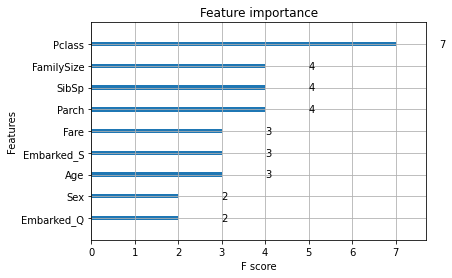

In [36]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [37]:
data_dmatrix_test = xgb.DMatrix(data=X_test)

In [38]:
y_pred=xg_reg.predict(data_dmatrix_test)

In [39]:
from sklearn.metrics import roc_curve, auc
[fpr, tpr, thr]= roc_curve(y_test,y_pred)
auc(fpr, tpr)

0.8697705802968962

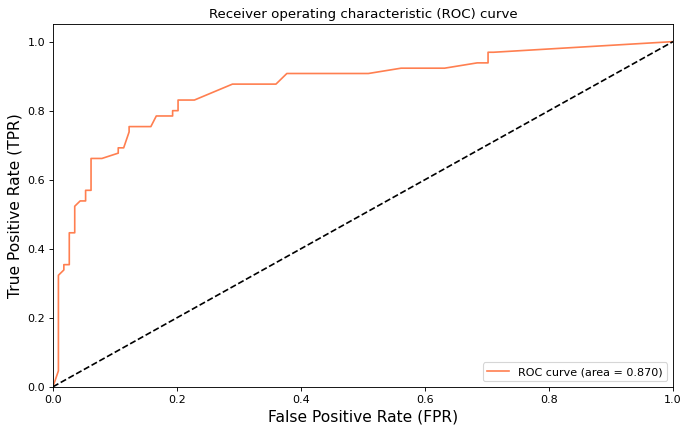

In [40]:
#plot ROC curve
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [41]:
def cross_validation(df,k=10):
    test=[]
    train=[]
    AUC=[]
    n= int(df.shape[0]/k)
    index=list(range(df.shape[0]))

    for kk in range(k):
        train_index=list(range(df.shape[0]))
        test_index=random.sample(index, n)
        for i in test_index:
            index.remove(i)
        for i in test_index:
            train_index.remove(i)
    
        test.append(df.iloc[test_index])
        train.append(df.iloc[train_index])
    for i in range(k):
        df_im_input=train[i].iloc[:,:-1]
        df_im_output=train[i].iloc[:,-1]

        model.fit(df_im_input,df_im_output)
        preds=model.predict(df_im_input)
        preds_probabilities = logreg.predict_proba(df_im_input)
        pred_probs = preds_probabilities[:, 1]
        [fpr, tpr, thr] = roc_curve(df_im_output, pred_probs)
        AUC.append(auc(fpr, tpr))
    return AUC

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
# X_train=df_im_input
# y_train=df_im_output

In [43]:
X

Pclass  Sex        Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         3    1  22.000000      1      0   7.2500           0           0   
1         1    0  38.000000      1      0  71.2833           1           0   
2         3    0  26.000000      0      0   7.9250           0           0   
3         1    0  35.000000      1      0  53.1000           0           0   
4         3    1  35.000000      0      0   8.0500           0           0   
..      ...  ...        ...    ...    ...      ...         ...         ...   
886       2    1  27.000000      0      0  13.0000           0           0   
887       1    0  19.000000      0      0  30.0000           0           0   
888       3    0  17.360874      1      2  23.4500           0           0   
889       1    1  26.000000      0      0  30.0000           1           0   
890       3    1  32.000000      0      0   7.7500           0           1   

     Embarked_S  FamilySize  
0             1           2  
1             0           2  
2             1           1  
3             1           2  
4             1           1  
..          ...         ...  
886           1           1  
887           1           1  
888           1           4  
889           0           1  
890           0           1  

[891 rows x 10 columns]

In [44]:
def cross_validation_split(dataset, folds):
        dataset_split = []
        fold_size = int(X_train.shape[0] / folds) #number of rows in each fold
        ini_index=[0] #start from index 0
        remains= fold_size % folds 
        
        
        # for loop to save each fold
        for i in range(1,remains):
            ini_index.append(i*fold_size+1)

        for j in range (remains, folds+1):
            ini_index.append(j*fold_size+remains)

            # save the fold     
        for n in range(len(ini_index)-1):
            dataset_split.append([ini_index[n], ini_index[n+1]])
            
        return dataset_split

In [45]:
cross_validation_split(X,5)

[[0, 143], [143, 286], [286, 428], [428, 570], [570, 712]]

In [46]:

def cross_validation(params, X_train, y_train, k):
    index=cross_validation_split(X_train,k)
    
    # train each sub-combination1111a
    auc = []
    for i in range(k):
        
        cv_xtest = X_train.iloc[index[i][0]:index[i][1],:]
        cv_ytest = y_train.iloc[index[i][0]:index[i][1],]
        
        # drop the test sub-set
        cv_xtrain = X_train.drop(X_train.index[index[i][0]:index[i][1]])
        cv_ytrain = y_train.drop(X_train.index[index[i][0]:index[i][1]])
        
        data_dmatrix_train = xgb.DMatrix(data=cv_xtrain,label=cv_ytrain)
        data_dmatrix_test = xgb.DMatrix(data=cv_xtest,label=cv_ytest)
        
        xg_reg = xgb.train(params=params, dtrain=data_dmatrix_train, num_boost_round=100,evals=[(data_dmatrix_train,'train'),(data_dmatrix_test, 'test')])
#         model.fit(cv_xtrain, cv_ytrain.values.reshape(-1))
        
        y_pred=xg_reg.predict(data_dmatrix_test)
        # calculate the auc as the evaluation metric
#         fpr, tpr, threshold = roc_curve(cv_ytest, model.predict_proba(cv_xtest)[:,1])
        [fpr, tpr, thr]= roc_curve(cv_ytest,y_pred)

        auc_roc = metrics.auc(fpr, tpr)
        auc.append(auc_roc)
    
    return np.mean(auc)

In [59]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10,'eval_metric' : 'auc'}

In [60]:
cross_validation(params, X, y, 5)

[0]	train-auc:0.67433	test-auc:0.52039
[1]	train-auc:0.76521	test-auc:0.57735
[2]	train-auc:0.76468	test-auc:0.57196
[3]	train-auc:0.85303	test-auc:0.75243
[4]	train-auc:0.85330	test-auc:0.72982
[5]	train-auc:0.84149	test-auc:0.71291
[6]	train-auc:0.83619	test-auc:0.70890
[7]	train-auc:0.85571	test-auc:0.75349
[8]	train-auc:0.85471	test-auc:0.74229
[9]	train-auc:0.85490	test-auc:0.74419
[10]	train-auc:0.85585	test-auc:0.73943
[11]	train-auc:0.85972	test-auc:0.76543
[12]	train-auc:0.86570	test-auc:0.79692
[13]	train-auc:0.86552	test-auc:0.79670
[14]	train-auc:0.86610	test-auc:0.79438
[15]	train-auc:0.86474	test-auc:0.79850
[16]	train-auc:0.86266	test-auc:0.78466
[17]	train-auc:0.86327	test-auc:0.79015
[18]	train-auc:0.86472	test-auc:0.78339
[19]	train-auc:0.86659	test-auc:0.78202
[20]	train-auc:0.86670	test-auc:0.78138
[21]	train-auc:0.86632	test-auc:0.78202
[22]	train-auc:0.86653	test-auc:0.77673
[23]	train-auc:0.86700	test-auc:0.77652
[24]	train-auc:0.86662	test-auc:0.77145
[25]	train

[6]	train-auc:0.82371	test-auc:0.82352
[7]	train-auc:0.84740	test-auc:0.85597
[8]	train-auc:0.84461	test-auc:0.85427
[9]	train-auc:0.84426	test-auc:0.85377
[10]	train-auc:0.84497	test-auc:0.85306
[11]	train-auc:0.85168	test-auc:0.86248
[12]	train-auc:0.85589	test-auc:0.86799
[13]	train-auc:0.85793	test-auc:0.86959
[14]	train-auc:0.85770	test-auc:0.86899
[15]	train-auc:0.85765	test-auc:0.87029
[16]	train-auc:0.85642	test-auc:0.86799
[17]	train-auc:0.85626	test-auc:0.86719
[18]	train-auc:0.85719	test-auc:0.86659
[19]	train-auc:0.85854	test-auc:0.86759
[20]	train-auc:0.85903	test-auc:0.86859
[21]	train-auc:0.85868	test-auc:0.86639
[22]	train-auc:0.85854	test-auc:0.86559
[23]	train-auc:0.85914	test-auc:0.86388
[24]	train-auc:0.86040	test-auc:0.86168
[25]	train-auc:0.86082	test-auc:0.86569
[26]	train-auc:0.86051	test-auc:0.86669
[27]	train-auc:0.85948	test-auc:0.86749
[28]	train-auc:0.86019	test-auc:0.86589
[29]	train-auc:0.86028	test-auc:0.86569
[30]	train-auc:0.86082	test-auc:0.86769
[31]

[12]	train-auc:0.85421	test-auc:0.85735
[13]	train-auc:0.85789	test-auc:0.86233
[14]	train-auc:0.85858	test-auc:0.86566
[15]	train-auc:0.85931	test-auc:0.86275
[16]	train-auc:0.85840	test-auc:0.86379
[17]	train-auc:0.85817	test-auc:0.85694
[18]	train-auc:0.85921	test-auc:0.85974
[19]	train-auc:0.85891	test-auc:0.85860
[20]	train-auc:0.85871	test-auc:0.86192
[21]	train-auc:0.85831	test-auc:0.86067
[22]	train-auc:0.85851	test-auc:0.86088
[23]	train-auc:0.85885	test-auc:0.86109
[24]	train-auc:0.85907	test-auc:0.86130
[25]	train-auc:0.85916	test-auc:0.86047
[26]	train-auc:0.85955	test-auc:0.85818
[27]	train-auc:0.85958	test-auc:0.85777
[28]	train-auc:0.85982	test-auc:0.85839
[29]	train-auc:0.85998	test-auc:0.86005
[30]	train-auc:0.86150	test-auc:0.85901
[31]	train-auc:0.86185	test-auc:0.86026
[32]	train-auc:0.86223	test-auc:0.86047
[33]	train-auc:0.86216	test-auc:0.85901
[34]	train-auc:0.86201	test-auc:0.85932
[35]	train-auc:0.86293	test-auc:0.85953
[36]	train-auc:0.86281	test-auc:0.85953


0.8433114376352651

No handles with labels found to put in legend.


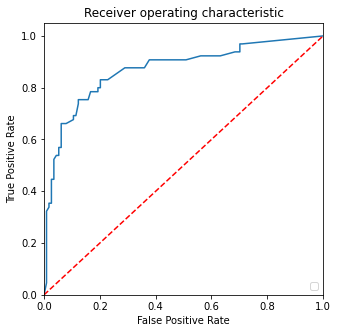

In [61]:
plt.figure()
# plt.plot(fpr, tpr, label='AUC value (area = %0.2f)' % auc(fpr, tpr))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [62]:
param_grid = {'colsample_bytree': [0.01, 0.1, 0.2,0.3,0.5],
              'learning_rate': [0,0.1,0.2,0.3],
              'max_depth': [2, 5, 10],
              'alpha': [5, 10,15],
             }

In [63]:
import itertools as it
parameters = it.product(*(param_grid[title] for title in list(param_grid)))
print(list(param_grid))

['colsample_bytree', 'learning_rate', 'max_depth', 'alpha']


In [64]:
auc_average=[]
optimal_param=[]
for i in list(parameters):
    params = {"objective":"binary:logistic",'colsample_bytree': i[0],'learning_rate': i[1],
                'max_depth': i[2], 'alpha': i[3],'eval_metric' : 'auc'}
#     rf = RandomForestClassifier(n_estimators = i[0], criterion=i[1], max_depth = i[2], max_features = i[3])

    auc = cross_validation(params, X, y, 5)
    auc_average.append(auc)
    optimal_param.append(i)


[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train

[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]

[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000


[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000


[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000


[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000


[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000


[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000


[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000


[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000


[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000


[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000


[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000


[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]

[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train

[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train

[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train

[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	tra

[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[3

[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000


[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000


[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000


[32]	train-auc:0.85409	test-auc:0.79205
[33]	train-auc:0.85414	test-auc:0.79290
[34]	train-auc:0.85389	test-auc:0.79269
[35]	train-auc:0.85381	test-auc:0.80030
[36]	train-auc:0.85298	test-auc:0.80579
[37]	train-auc:0.85296	test-auc:0.80600
[38]	train-auc:0.85270	test-auc:0.80495
[39]	train-auc:0.85418	test-auc:0.80516
[40]	train-auc:0.85410	test-auc:0.80473
[41]	train-auc:0.85410	test-auc:0.80473
[42]	train-auc:0.85316	test-auc:0.80642
[43]	train-auc:0.85252	test-auc:0.80748
[44]	train-auc:0.85411	test-auc:0.80854
[45]	train-auc:0.85411	test-auc:0.80854
[46]	train-auc:0.85411	test-auc:0.80854
[47]	train-auc:0.85489	test-auc:0.80981
[48]	train-auc:0.85618	test-auc:0.80981
[49]	train-auc:0.85613	test-auc:0.80959
[50]	train-auc:0.85613	test-auc:0.80959
[51]	train-auc:0.85654	test-auc:0.81044
[52]	train-auc:0.85582	test-auc:0.81107
[53]	train-auc:0.85531	test-auc:0.81129
[54]	train-auc:0.85531	test-auc:0.81129
[55]	train-auc:0.85560	test-auc:0.81234
[56]	train-auc:0.85665	test-auc:0.81382


[38]	train-auc:0.83889	test-auc:0.87009
[39]	train-auc:0.83999	test-auc:0.87179
[40]	train-auc:0.83974	test-auc:0.87199
[41]	train-auc:0.83974	test-auc:0.87199
[42]	train-auc:0.83948	test-auc:0.87099
[43]	train-auc:0.83926	test-auc:0.87059
[44]	train-auc:0.84319	test-auc:0.87300
[45]	train-auc:0.84319	test-auc:0.87300
[46]	train-auc:0.84319	test-auc:0.87300
[47]	train-auc:0.84401	test-auc:0.87320
[48]	train-auc:0.84667	test-auc:0.87440
[49]	train-auc:0.84609	test-auc:0.87260
[50]	train-auc:0.84609	test-auc:0.87260
[51]	train-auc:0.84649	test-auc:0.87320
[52]	train-auc:0.84621	test-auc:0.87199
[53]	train-auc:0.84610	test-auc:0.87199
[54]	train-auc:0.84610	test-auc:0.87199
[55]	train-auc:0.84637	test-auc:0.87220
[56]	train-auc:0.84810	test-auc:0.87240
[57]	train-auc:0.84886	test-auc:0.87400
[58]	train-auc:0.84889	test-auc:0.87320
[59]	train-auc:0.84897	test-auc:0.87360
[60]	train-auc:0.84897	test-auc:0.87360
[61]	train-auc:0.84890	test-auc:0.87320
[62]	train-auc:0.84986	test-auc:0.87340


[44]	train-auc:0.84735	test-auc:0.84147
[45]	train-auc:0.84735	test-auc:0.84147
[46]	train-auc:0.84735	test-auc:0.84147
[47]	train-auc:0.84820	test-auc:0.84188
[48]	train-auc:0.84987	test-auc:0.84583
[49]	train-auc:0.84992	test-auc:0.84562
[50]	train-auc:0.84992	test-auc:0.84562
[51]	train-auc:0.85033	test-auc:0.84603
[52]	train-auc:0.85017	test-auc:0.84603
[53]	train-auc:0.85012	test-auc:0.84645
[54]	train-auc:0.85012	test-auc:0.84645
[55]	train-auc:0.85039	test-auc:0.84666
[56]	train-auc:0.85112	test-auc:0.84977
[57]	train-auc:0.85208	test-auc:0.84977
[58]	train-auc:0.85213	test-auc:0.85174
[59]	train-auc:0.85220	test-auc:0.85320
[60]	train-auc:0.85220	test-auc:0.85320
[61]	train-auc:0.85200	test-auc:0.85320
[62]	train-auc:0.85325	test-auc:0.85455
[63]	train-auc:0.85395	test-auc:0.85559
[64]	train-auc:0.85384	test-auc:0.85496
[65]	train-auc:0.85418	test-auc:0.85642
[66]	train-auc:0.85403	test-auc:0.85642
[67]	train-auc:0.85403	test-auc:0.85642
[68]	train-auc:0.85398	test-auc:0.85621


[50]	train-auc:0.85371	test-auc:0.79668
[51]	train-auc:0.85380	test-auc:0.79679
[52]	train-auc:0.85375	test-auc:0.79700
[53]	train-auc:0.85377	test-auc:0.79700
[54]	train-auc:0.85377	test-auc:0.79700
[55]	train-auc:0.85377	test-auc:0.79766
[56]	train-auc:0.85344	test-auc:0.79874
[57]	train-auc:0.85541	test-auc:0.79917
[58]	train-auc:0.85454	test-auc:0.79896
[59]	train-auc:0.85416	test-auc:0.80004
[60]	train-auc:0.85416	test-auc:0.80004
[61]	train-auc:0.85414	test-auc:0.80026
[62]	train-auc:0.85453	test-auc:0.80026
[63]	train-auc:0.85440	test-auc:0.79874
[64]	train-auc:0.85468	test-auc:0.79874
[65]	train-auc:0.85477	test-auc:0.79874
[66]	train-auc:0.85476	test-auc:0.79896
[67]	train-auc:0.85473	test-auc:0.79896
[68]	train-auc:0.85471	test-auc:0.79896
[69]	train-auc:0.85466	test-auc:0.79896
[70]	train-auc:0.85466	test-auc:0.79896
[71]	train-auc:0.85466	test-auc:0.79896
[72]	train-auc:0.85466	test-auc:0.79896
[73]	train-auc:0.85464	test-auc:0.79874
[74]	train-auc:0.85502	test-auc:0.79766


[56]	train-auc:0.84859	test-auc:0.83767
[57]	train-auc:0.84977	test-auc:0.83767
[58]	train-auc:0.84925	test-auc:0.83757
[59]	train-auc:0.84886	test-auc:0.83715
[60]	train-auc:0.84886	test-auc:0.83715
[61]	train-auc:0.84886	test-auc:0.83715
[62]	train-auc:0.85039	test-auc:0.83798
[63]	train-auc:0.85030	test-auc:0.83839
[64]	train-auc:0.85028	test-auc:0.83880
[65]	train-auc:0.85025	test-auc:0.83880
[66]	train-auc:0.85025	test-auc:0.83880
[67]	train-auc:0.85025	test-auc:0.83880
[68]	train-auc:0.85025	test-auc:0.83880
[69]	train-auc:0.85046	test-auc:0.83674
[70]	train-auc:0.85046	test-auc:0.83674
[71]	train-auc:0.85056	test-auc:0.83674
[72]	train-auc:0.85056	test-auc:0.83674
[73]	train-auc:0.84972	test-auc:0.83633
[74]	train-auc:0.85005	test-auc:0.83839
[75]	train-auc:0.85040	test-auc:0.83860
[76]	train-auc:0.85093	test-auc:0.83839
[77]	train-auc:0.85092	test-auc:0.83818
[78]	train-auc:0.85062	test-auc:0.83777
[79]	train-auc:0.85065	test-auc:0.83839
[80]	train-auc:0.85071	test-auc:0.83839


[62]	train-auc:0.84871	test-auc:0.81382
[63]	train-auc:0.84837	test-auc:0.81488
[64]	train-auc:0.84837	test-auc:0.81488
[65]	train-auc:0.84837	test-auc:0.81488
[66]	train-auc:0.84837	test-auc:0.81488
[67]	train-auc:0.84838	test-auc:0.81488
[68]	train-auc:0.84839	test-auc:0.81488
[69]	train-auc:0.84844	test-auc:0.81488
[70]	train-auc:0.84844	test-auc:0.81488
[71]	train-auc:0.84844	test-auc:0.81488
[72]	train-auc:0.84844	test-auc:0.81488
[73]	train-auc:0.84871	test-auc:0.81488
[74]	train-auc:0.84866	test-auc:0.81720
[75]	train-auc:0.84901	test-auc:0.81763
[76]	train-auc:0.84901	test-auc:0.81763
[77]	train-auc:0.84887	test-auc:0.81805
[78]	train-auc:0.84863	test-auc:0.81784
[79]	train-auc:0.84873	test-auc:0.81889
[80]	train-auc:0.84876	test-auc:0.81763
[81]	train-auc:0.84870	test-auc:0.81826
[82]	train-auc:0.84870	test-auc:0.81826
[83]	train-auc:0.84870	test-auc:0.81826
[84]	train-auc:0.84870	test-auc:0.81826
[85]	train-auc:0.84885	test-auc:0.81868
[86]	train-auc:0.84885	test-auc:0.81868


[68]	train-auc:0.83846	test-auc:0.87160
[69]	train-auc:0.83834	test-auc:0.87139
[70]	train-auc:0.83834	test-auc:0.87139
[71]	train-auc:0.83834	test-auc:0.87139
[72]	train-auc:0.83834	test-auc:0.87139
[73]	train-auc:0.83790	test-auc:0.87139
[74]	train-auc:0.83835	test-auc:0.87160
[75]	train-auc:0.83808	test-auc:0.87160
[76]	train-auc:0.83808	test-auc:0.87160
[77]	train-auc:0.83808	test-auc:0.87160
[78]	train-auc:0.83769	test-auc:0.87119
[79]	train-auc:0.83769	test-auc:0.87119
[80]	train-auc:0.83779	test-auc:0.87139
[81]	train-auc:0.83779	test-auc:0.87139
[82]	train-auc:0.83779	test-auc:0.87139
[83]	train-auc:0.83779	test-auc:0.87139
[84]	train-auc:0.83779	test-auc:0.87139
[85]	train-auc:0.83732	test-auc:0.87139
[86]	train-auc:0.83732	test-auc:0.87139
[87]	train-auc:0.83782	test-auc:0.87139
[88]	train-auc:0.83782	test-auc:0.87139
[89]	train-auc:0.83782	test-auc:0.87139
[90]	train-auc:0.83777	test-auc:0.87179
[91]	train-auc:0.83850	test-auc:0.87179
[92]	train-auc:0.83850	test-auc:0.87179


[74]	train-auc:0.84259	test-auc:0.85507
[75]	train-auc:0.84250	test-auc:0.85527
[76]	train-auc:0.84250	test-auc:0.85527
[77]	train-auc:0.84250	test-auc:0.85527
[78]	train-auc:0.84241	test-auc:0.85486
[79]	train-auc:0.84234	test-auc:0.85444
[80]	train-auc:0.84236	test-auc:0.85444
[81]	train-auc:0.84236	test-auc:0.85444
[82]	train-auc:0.84236	test-auc:0.85444
[83]	train-auc:0.84236	test-auc:0.85444
[84]	train-auc:0.84236	test-auc:0.85444
[85]	train-auc:0.84240	test-auc:0.85444
[86]	train-auc:0.84240	test-auc:0.85444
[87]	train-auc:0.84240	test-auc:0.85444
[88]	train-auc:0.84240	test-auc:0.85444
[89]	train-auc:0.84240	test-auc:0.85444
[90]	train-auc:0.84240	test-auc:0.85444
[91]	train-auc:0.84240	test-auc:0.85444
[92]	train-auc:0.84240	test-auc:0.85444
[93]	train-auc:0.84240	test-auc:0.85444
[94]	train-auc:0.84240	test-auc:0.85444
[95]	train-auc:0.84240	test-auc:0.85444
[96]	train-auc:0.84240	test-auc:0.85465
[97]	train-auc:0.84240	test-auc:0.85465
[98]	train-auc:0.84236	test-auc:0.85444


[80]	train-auc:0.87084	test-auc:0.80775
[81]	train-auc:0.87076	test-auc:0.80710
[82]	train-auc:0.87069	test-auc:0.80710
[83]	train-auc:0.87128	test-auc:0.80840
[84]	train-auc:0.87202	test-auc:0.80905
[85]	train-auc:0.87204	test-auc:0.80927
[86]	train-auc:0.87205	test-auc:0.80927
[87]	train-auc:0.87213	test-auc:0.80884
[88]	train-auc:0.87235	test-auc:0.80927
[89]	train-auc:0.87235	test-auc:0.80927
[90]	train-auc:0.87281	test-auc:0.80905
[91]	train-auc:0.87373	test-auc:0.81166
[92]	train-auc:0.87371	test-auc:0.81166
[93]	train-auc:0.87370	test-auc:0.81166
[94]	train-auc:0.87361	test-auc:0.81209
[95]	train-auc:0.87316	test-auc:0.81188
[96]	train-auc:0.87343	test-auc:0.81209
[97]	train-auc:0.87406	test-auc:0.81274
[98]	train-auc:0.87399	test-auc:0.81274
[99]	train-auc:0.87367	test-auc:0.81253
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.62425	test-auc:0.62861
[2]	train-auc:0.62147	test-auc:0.65855
[3]	train-auc:0.66647	test-auc:0.66957
[4]	train-auc:0.72811	test-auc:0.72827
[5]	t

[86]	train-auc:0.86460	test-auc:0.85697
[87]	train-auc:0.86460	test-auc:0.85697
[88]	train-auc:0.86456	test-auc:0.85697
[89]	train-auc:0.86456	test-auc:0.85697
[90]	train-auc:0.86511	test-auc:0.85697
[91]	train-auc:0.86648	test-auc:0.85820
[92]	train-auc:0.86648	test-auc:0.85820
[93]	train-auc:0.86648	test-auc:0.85820
[94]	train-auc:0.86606	test-auc:0.85800
[95]	train-auc:0.86585	test-auc:0.85717
[96]	train-auc:0.86572	test-auc:0.85779
[97]	train-auc:0.86640	test-auc:0.85820
[98]	train-auc:0.86643	test-auc:0.85882
[99]	train-auc:0.86622	test-auc:0.85862
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.62510	test-auc:0.59873
[2]	train-auc:0.62977	test-auc:0.60922
[3]	train-auc:0.66875	test-auc:0.66809
[4]	train-auc:0.72231	test-auc:0.76713
[5]	train-auc:0.72517	test-auc:0.79475
[6]	train-auc:0.72276	test-auc:0.78748
[7]	train-auc:0.72557	test-auc:0.78395
[8]	train-auc:0.72573	test-auc:0.78416
[9]	train-auc:0.72690	test-auc:0.77772
[10]	train-auc:0.72799	test-auc:0.77087
[11]	train

[92]	train-auc:0.85516	test-auc:0.80579
[93]	train-auc:0.85516	test-auc:0.80579
[94]	train-auc:0.85502	test-auc:0.80981
[95]	train-auc:0.85483	test-auc:0.81298
[96]	train-auc:0.85457	test-auc:0.81298
[97]	train-auc:0.85463	test-auc:0.81298
[98]	train-auc:0.85492	test-auc:0.81044
[99]	train-auc:0.85469	test-auc:0.81298
[0]	train-auc:0.57082	test-auc:0.54396
[1]	train-auc:0.60703	test-auc:0.58923
[2]	train-auc:0.61361	test-auc:0.60052
[3]	train-auc:0.65023	test-auc:0.65393
[4]	train-auc:0.72664	test-auc:0.68248
[5]	train-auc:0.73809	test-auc:0.65664
[6]	train-auc:0.73842	test-auc:0.65621
[7]	train-auc:0.74163	test-auc:0.66576
[8]	train-auc:0.74163	test-auc:0.66576
[9]	train-auc:0.74219	test-auc:0.67054
[10]	train-auc:0.74257	test-auc:0.67010
[11]	train-auc:0.74301	test-auc:0.66793
[12]	train-auc:0.74685	test-auc:0.67716
[13]	train-auc:0.74926	test-auc:0.67456
[14]	train-auc:0.74001	test-auc:0.67651
[15]	train-auc:0.74004	test-auc:0.67607
[16]	train-auc:0.74860	test-auc:0.67944
[17]	train

[98]	train-auc:0.84582	test-auc:0.87450
[99]	train-auc:0.84583	test-auc:0.87450
[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.60028	test-auc:0.63127
[2]	train-auc:0.61287	test-auc:0.58762
[3]	train-auc:0.65005	test-auc:0.68246
[4]	train-auc:0.72235	test-auc:0.75562
[5]	train-auc:0.72577	test-auc:0.74819
[6]	train-auc:0.72129	test-auc:0.74345
[7]	train-auc:0.72413	test-auc:0.75501
[8]	train-auc:0.72262	test-auc:0.75501
[9]	train-auc:0.72628	test-auc:0.75645
[10]	train-auc:0.72274	test-auc:0.75728
[11]	train-auc:0.72134	test-auc:0.75418
[12]	train-auc:0.73699	test-auc:0.76842
[13]	train-auc:0.74045	test-auc:0.76863
[14]	train-auc:0.73155	test-auc:0.76533
[15]	train-auc:0.74211	test-auc:0.76450
[16]	train-auc:0.73709	test-auc:0.76718
[17]	train-auc:0.81557	test-auc:0.82188
[18]	train-auc:0.81170	test-auc:0.81073
[19]	train-auc:0.81270	test-auc:0.81197
[20]	train-auc:0.81473	test-auc:0.81342
[21]	train-auc:0.81466	test-auc:0.81342
[22]	train-auc:0.81388	test-auc:0.81238
[23]	train

[4]	train-auc:0.74054	test-auc:0.56319
[5]	train-auc:0.75065	test-auc:0.59446
[6]	train-auc:0.74805	test-auc:0.58073
[7]	train-auc:0.74828	test-auc:0.57713
[8]	train-auc:0.74828	test-auc:0.57713
[9]	train-auc:0.74647	test-auc:0.57333
[10]	train-auc:0.74690	test-auc:0.57682
[11]	train-auc:0.74313	test-auc:0.56541
[12]	train-auc:0.75195	test-auc:0.57386
[13]	train-auc:0.75195	test-auc:0.57386
[14]	train-auc:0.75166	test-auc:0.57661
[15]	train-auc:0.75166	test-auc:0.57661
[16]	train-auc:0.75867	test-auc:0.57544
[17]	train-auc:0.81937	test-auc:0.66970
[18]	train-auc:0.81252	test-auc:0.65744
[19]	train-auc:0.81349	test-auc:0.65680
[20]	train-auc:0.81386	test-auc:0.65934
[21]	train-auc:0.81386	test-auc:0.65934
[22]	train-auc:0.81390	test-auc:0.65934
[23]	train-auc:0.81273	test-auc:0.65955
[24]	train-auc:0.81227	test-auc:0.65934
[25]	train-auc:0.83653	test-auc:0.72506
[26]	train-auc:0.84442	test-auc:0.76458
[27]	train-auc:0.84442	test-auc:0.76458
[28]	train-auc:0.84442	test-auc:0.76353
[29]	t

[10]	train-auc:0.71883	test-auc:0.72486
[11]	train-auc:0.71554	test-auc:0.71985
[12]	train-auc:0.71928	test-auc:0.73457
[13]	train-auc:0.71928	test-auc:0.73457
[14]	train-auc:0.71154	test-auc:0.72997
[15]	train-auc:0.71154	test-auc:0.72997
[16]	train-auc:0.72343	test-auc:0.74028
[17]	train-auc:0.79744	test-auc:0.82472
[18]	train-auc:0.79104	test-auc:0.81711
[19]	train-auc:0.79074	test-auc:0.81651
[20]	train-auc:0.79125	test-auc:0.81891
[21]	train-auc:0.79125	test-auc:0.81891
[22]	train-auc:0.79133	test-auc:0.81851
[23]	train-auc:0.79171	test-auc:0.81651
[24]	train-auc:0.79142	test-auc:0.81631
[25]	train-auc:0.81819	test-auc:0.84996
[26]	train-auc:0.82762	test-auc:0.86178
[27]	train-auc:0.82762	test-auc:0.86178
[28]	train-auc:0.82656	test-auc:0.86158
[29]	train-auc:0.82656	test-auc:0.86158
[30]	train-auc:0.82930	test-auc:0.86498
[31]	train-auc:0.82984	test-auc:0.86498
[32]	train-auc:0.82990	test-auc:0.86438
[33]	train-auc:0.83039	test-auc:0.86559
[34]	train-auc:0.83021	test-auc:0.86538


[16]	train-auc:0.71596	test-auc:0.77014
[17]	train-auc:0.80575	test-auc:0.82402
[18]	train-auc:0.80144	test-auc:0.82942
[19]	train-auc:0.80389	test-auc:0.82839
[20]	train-auc:0.80370	test-auc:0.82548
[21]	train-auc:0.80373	test-auc:0.82548
[22]	train-auc:0.80369	test-auc:0.82382
[23]	train-auc:0.80344	test-auc:0.82153
[24]	train-auc:0.80324	test-auc:0.82132
[25]	train-auc:0.82942	test-auc:0.83503
[26]	train-auc:0.83675	test-auc:0.83856
[27]	train-auc:0.83675	test-auc:0.83856
[28]	train-auc:0.83686	test-auc:0.83586
[29]	train-auc:0.83686	test-auc:0.83586
[30]	train-auc:0.83763	test-auc:0.83814
[31]	train-auc:0.83770	test-auc:0.83835
[32]	train-auc:0.83770	test-auc:0.83835
[33]	train-auc:0.83804	test-auc:0.83835
[34]	train-auc:0.83795	test-auc:0.83835
[35]	train-auc:0.83793	test-auc:0.83877
[36]	train-auc:0.83793	test-auc:0.83877
[37]	train-auc:0.83751	test-auc:0.83814
[38]	train-auc:0.83748	test-auc:0.83814
[39]	train-auc:0.83748	test-auc:0.83814
[40]	train-auc:0.83750	test-auc:0.83814


[22]	train-auc:0.82567	test-auc:0.76943
[23]	train-auc:0.82394	test-auc:0.76813
[24]	train-auc:0.82361	test-auc:0.76596
[25]	train-auc:0.84459	test-auc:0.79179
[26]	train-auc:0.85411	test-auc:0.79809
[27]	train-auc:0.85409	test-auc:0.79809
[28]	train-auc:0.85423	test-auc:0.80156
[29]	train-auc:0.85422	test-auc:0.80156
[30]	train-auc:0.85654	test-auc:0.80504
[31]	train-auc:0.85725	test-auc:0.80656
[32]	train-auc:0.85726	test-auc:0.80612
[33]	train-auc:0.85750	test-auc:0.80808
[34]	train-auc:0.85738	test-auc:0.80742
[35]	train-auc:0.85702	test-auc:0.80721
[36]	train-auc:0.85665	test-auc:0.80677
[37]	train-auc:0.85704	test-auc:0.80916
[38]	train-auc:0.85735	test-auc:0.80981
[39]	train-auc:0.85837	test-auc:0.81025
[40]	train-auc:0.85855	test-auc:0.81155
[41]	train-auc:0.85855	test-auc:0.81155
[42]	train-auc:0.85822	test-auc:0.81155
[43]	train-auc:0.85816	test-auc:0.81155
[44]	train-auc:0.85993	test-auc:0.80938
[45]	train-auc:0.85993	test-auc:0.80938
[46]	train-auc:0.85993	test-auc:0.80938


[28]	train-auc:0.84916	test-auc:0.84458
[29]	train-auc:0.84925	test-auc:0.84417
[30]	train-auc:0.85152	test-auc:0.84727
[31]	train-auc:0.85196	test-auc:0.84644
[32]	train-auc:0.85119	test-auc:0.84644
[33]	train-auc:0.85161	test-auc:0.84727
[34]	train-auc:0.85187	test-auc:0.84727
[35]	train-auc:0.85164	test-auc:0.84623
[36]	train-auc:0.85137	test-auc:0.84623
[37]	train-auc:0.85163	test-auc:0.84727
[38]	train-auc:0.85152	test-auc:0.84685
[39]	train-auc:0.85266	test-auc:0.84685
[40]	train-auc:0.85237	test-auc:0.84685
[41]	train-auc:0.85237	test-auc:0.84685
[42]	train-auc:0.85227	test-auc:0.84685
[43]	train-auc:0.85223	test-auc:0.84685
[44]	train-auc:0.85411	test-auc:0.84623
[45]	train-auc:0.85411	test-auc:0.84623
[46]	train-auc:0.85411	test-auc:0.84623
[47]	train-auc:0.85489	test-auc:0.84727
[48]	train-auc:0.85647	test-auc:0.84933
[49]	train-auc:0.85632	test-auc:0.84912
[50]	train-auc:0.85632	test-auc:0.84912
[51]	train-auc:0.85689	test-auc:0.85015
[52]	train-auc:0.85680	test-auc:0.84995


[34]	train-auc:0.84834	test-auc:0.78614
[35]	train-auc:0.84849	test-auc:0.79353
[36]	train-auc:0.84830	test-auc:0.79501
[37]	train-auc:0.84843	test-auc:0.79438
[38]	train-auc:0.84824	test-auc:0.79522
[39]	train-auc:0.84858	test-auc:0.79670
[40]	train-auc:0.84799	test-auc:0.79924
[41]	train-auc:0.84799	test-auc:0.79924
[42]	train-auc:0.84766	test-auc:0.80030
[43]	train-auc:0.84760	test-auc:0.80072
[44]	train-auc:0.84889	test-auc:0.79839
[45]	train-auc:0.84889	test-auc:0.79839
[46]	train-auc:0.84889	test-auc:0.79839
[47]	train-auc:0.84892	test-auc:0.79839
[48]	train-auc:0.85077	test-auc:0.80030
[49]	train-auc:0.85072	test-auc:0.80030
[50]	train-auc:0.85072	test-auc:0.80030
[51]	train-auc:0.85112	test-auc:0.80009
[52]	train-auc:0.85082	test-auc:0.80178
[53]	train-auc:0.85071	test-auc:0.80178
[54]	train-auc:0.85071	test-auc:0.80178
[55]	train-auc:0.85076	test-auc:0.80178
[56]	train-auc:0.85087	test-auc:0.80981
[57]	train-auc:0.85180	test-auc:0.81044
[58]	train-auc:0.85250	test-auc:0.80938


[40]	train-auc:0.83636	test-auc:0.86679
[41]	train-auc:0.83636	test-auc:0.86679
[42]	train-auc:0.83632	test-auc:0.86679
[43]	train-auc:0.83631	test-auc:0.86679
[44]	train-auc:0.84042	test-auc:0.86819
[45]	train-auc:0.84042	test-auc:0.86819
[46]	train-auc:0.84042	test-auc:0.86819
[47]	train-auc:0.84125	test-auc:0.86879
[48]	train-auc:0.84362	test-auc:0.87179
[49]	train-auc:0.84361	test-auc:0.87199
[50]	train-auc:0.84361	test-auc:0.87199
[51]	train-auc:0.84380	test-auc:0.87160
[52]	train-auc:0.84375	test-auc:0.87160
[53]	train-auc:0.84375	test-auc:0.87160
[54]	train-auc:0.84375	test-auc:0.87160
[55]	train-auc:0.84375	test-auc:0.87139
[56]	train-auc:0.84371	test-auc:0.87099
[57]	train-auc:0.84514	test-auc:0.87199
[58]	train-auc:0.84540	test-auc:0.87189
[59]	train-auc:0.84506	test-auc:0.87129
[60]	train-auc:0.84506	test-auc:0.87129
[61]	train-auc:0.84506	test-auc:0.87129
[62]	train-auc:0.84623	test-auc:0.87129
[63]	train-auc:0.84606	test-auc:0.87189
[64]	train-auc:0.84613	test-auc:0.87129


[46]	train-auc:0.84604	test-auc:0.83866
[47]	train-auc:0.84639	test-auc:0.83866
[48]	train-auc:0.84912	test-auc:0.84427
[49]	train-auc:0.84878	test-auc:0.84344
[50]	train-auc:0.84878	test-auc:0.84344
[51]	train-auc:0.84886	test-auc:0.84261
[52]	train-auc:0.84885	test-auc:0.84261
[53]	train-auc:0.84885	test-auc:0.84261
[54]	train-auc:0.84885	test-auc:0.84261
[55]	train-auc:0.84910	test-auc:0.84282
[56]	train-auc:0.85036	test-auc:0.84572
[57]	train-auc:0.85042	test-auc:0.84406
[58]	train-auc:0.85048	test-auc:0.84967
[59]	train-auc:0.85007	test-auc:0.85091
[60]	train-auc:0.85007	test-auc:0.85091
[61]	train-auc:0.85006	test-auc:0.85091
[62]	train-auc:0.85053	test-auc:0.85008
[63]	train-auc:0.85078	test-auc:0.85257
[64]	train-auc:0.85104	test-auc:0.85289
[65]	train-auc:0.85106	test-auc:0.85289
[66]	train-auc:0.85105	test-auc:0.85289
[67]	train-auc:0.85105	test-auc:0.85289
[68]	train-auc:0.85105	test-auc:0.85289
[69]	train-auc:0.85048	test-auc:0.85808
[70]	train-auc:0.85048	test-auc:0.85808


[52]	train-auc:0.85052	test-auc:0.79635
[53]	train-auc:0.85052	test-auc:0.79635
[54]	train-auc:0.85052	test-auc:0.79635
[55]	train-auc:0.85052	test-auc:0.79635
[56]	train-auc:0.85075	test-auc:0.79483
[57]	train-auc:0.85075	test-auc:0.79483
[58]	train-auc:0.85049	test-auc:0.79548
[59]	train-auc:0.85044	test-auc:0.79592
[60]	train-auc:0.85044	test-auc:0.79592
[61]	train-auc:0.85044	test-auc:0.79592
[62]	train-auc:0.85044	test-auc:0.79592
[63]	train-auc:0.84999	test-auc:0.79570
[64]	train-auc:0.84999	test-auc:0.79570
[65]	train-auc:0.84999	test-auc:0.79570
[66]	train-auc:0.84999	test-auc:0.79570
[67]	train-auc:0.84999	test-auc:0.79570
[68]	train-auc:0.84999	test-auc:0.79570
[69]	train-auc:0.85024	test-auc:0.79548
[70]	train-auc:0.85024	test-auc:0.79548
[71]	train-auc:0.85024	test-auc:0.79548
[72]	train-auc:0.85024	test-auc:0.79548
[73]	train-auc:0.85023	test-auc:0.79570
[74]	train-auc:0.85025	test-auc:0.79635
[75]	train-auc:0.85020	test-auc:0.79635
[76]	train-auc:0.85020	test-auc:0.79635


[58]	train-auc:0.84606	test-auc:0.82972
[59]	train-auc:0.84643	test-auc:0.82993
[60]	train-auc:0.84643	test-auc:0.82993
[61]	train-auc:0.84643	test-auc:0.82993
[62]	train-auc:0.84643	test-auc:0.82993
[63]	train-auc:0.84600	test-auc:0.83075
[64]	train-auc:0.84600	test-auc:0.83075
[65]	train-auc:0.84600	test-auc:0.83075
[66]	train-auc:0.84600	test-auc:0.83075
[67]	train-auc:0.84600	test-auc:0.83075
[68]	train-auc:0.84600	test-auc:0.83075
[69]	train-auc:0.84585	test-auc:0.82952
[70]	train-auc:0.84585	test-auc:0.82952
[71]	train-auc:0.84585	test-auc:0.82952
[72]	train-auc:0.84585	test-auc:0.82952
[73]	train-auc:0.84576	test-auc:0.82952
[74]	train-auc:0.84623	test-auc:0.83055
[75]	train-auc:0.84623	test-auc:0.83240
[76]	train-auc:0.84623	test-auc:0.83240
[77]	train-auc:0.84623	test-auc:0.83240
[78]	train-auc:0.84616	test-auc:0.83178
[79]	train-auc:0.84620	test-auc:0.83117
[80]	train-auc:0.84631	test-auc:0.83117
[81]	train-auc:0.84631	test-auc:0.83117
[82]	train-auc:0.84631	test-auc:0.83117


[64]	train-auc:0.86876	test-auc:0.81562
[65]	train-auc:0.86876	test-auc:0.81562
[66]	train-auc:0.86827	test-auc:0.82048
[67]	train-auc:0.86827	test-auc:0.82048
[68]	train-auc:0.86827	test-auc:0.82048
[69]	train-auc:0.86830	test-auc:0.81646
[70]	train-auc:0.86852	test-auc:0.81625
[71]	train-auc:0.86905	test-auc:0.81858
[72]	train-auc:0.86921	test-auc:0.82005
[73]	train-auc:0.86981	test-auc:0.81414
[74]	train-auc:0.87029	test-auc:0.81287
[75]	train-auc:0.87050	test-auc:0.81245
[76]	train-auc:0.87072	test-auc:0.81118
[77]	train-auc:0.87037	test-auc:0.81245
[78]	train-auc:0.87065	test-auc:0.81160
[79]	train-auc:0.87064	test-auc:0.81097
[80]	train-auc:0.87124	test-auc:0.80896
[81]	train-auc:0.87093	test-auc:0.80981
[82]	train-auc:0.87093	test-auc:0.80981
[83]	train-auc:0.87127	test-auc:0.81255
[84]	train-auc:0.87169	test-auc:0.81129
[85]	train-auc:0.87205	test-auc:0.81086
[86]	train-auc:0.87212	test-auc:0.81065
[87]	train-auc:0.87199	test-auc:0.81044
[88]	train-auc:0.87199	test-auc:0.81044


[70]	train-auc:0.86088	test-auc:0.87029
[71]	train-auc:0.86166	test-auc:0.86729
[72]	train-auc:0.86236	test-auc:0.86729
[73]	train-auc:0.86263	test-auc:0.86729
[74]	train-auc:0.86302	test-auc:0.86929
[75]	train-auc:0.86323	test-auc:0.87069
[76]	train-auc:0.86390	test-auc:0.87009
[77]	train-auc:0.86354	test-auc:0.86949
[78]	train-auc:0.86377	test-auc:0.87069
[79]	train-auc:0.86400	test-auc:0.87089
[80]	train-auc:0.86469	test-auc:0.87109
[81]	train-auc:0.86459	test-auc:0.87109
[82]	train-auc:0.86459	test-auc:0.87109
[83]	train-auc:0.86512	test-auc:0.87109
[84]	train-auc:0.86539	test-auc:0.87029
[85]	train-auc:0.86573	test-auc:0.87049
[86]	train-auc:0.86572	test-auc:0.87049
[87]	train-auc:0.86594	test-auc:0.87069
[88]	train-auc:0.86594	test-auc:0.87069
[89]	train-auc:0.86594	test-auc:0.87069
[90]	train-auc:0.86631	test-auc:0.87069
[91]	train-auc:0.86741	test-auc:0.87270
[92]	train-auc:0.86741	test-auc:0.87270
[93]	train-auc:0.86741	test-auc:0.87270
[94]	train-auc:0.86723	test-auc:0.87270


[76]	train-auc:0.86231	test-auc:0.86856
[77]	train-auc:0.86202	test-auc:0.86856
[78]	train-auc:0.86242	test-auc:0.87043
[79]	train-auc:0.86233	test-auc:0.87002
[80]	train-auc:0.86233	test-auc:0.87002
[81]	train-auc:0.86213	test-auc:0.87002
[82]	train-auc:0.86213	test-auc:0.87002
[83]	train-auc:0.86214	test-auc:0.87043
[84]	train-auc:0.86259	test-auc:0.87043
[85]	train-auc:0.86291	test-auc:0.87106
[86]	train-auc:0.86291	test-auc:0.87106
[87]	train-auc:0.86291	test-auc:0.87106
[88]	train-auc:0.86291	test-auc:0.87106
[89]	train-auc:0.86291	test-auc:0.87106
[90]	train-auc:0.86291	test-auc:0.87106
[91]	train-auc:0.86409	test-auc:0.87209
[92]	train-auc:0.86409	test-auc:0.87209
[93]	train-auc:0.86409	test-auc:0.87209
[94]	train-auc:0.86391	test-auc:0.87209
[95]	train-auc:0.86362	test-auc:0.87189
[96]	train-auc:0.86363	test-auc:0.87251
[97]	train-auc:0.86415	test-auc:0.87230
[98]	train-auc:0.86428	test-auc:0.87230
[99]	train-auc:0.86408	test-auc:0.87230
[0]	train-auc:0.57852	test-auc:0.51099
[

[82]	train-auc:0.85535	test-auc:0.80146
[83]	train-auc:0.85535	test-auc:0.80146
[84]	train-auc:0.85535	test-auc:0.80146
[85]	train-auc:0.85552	test-auc:0.80146
[86]	train-auc:0.85552	test-auc:0.80146
[87]	train-auc:0.85552	test-auc:0.80146
[88]	train-auc:0.85552	test-auc:0.80146
[89]	train-auc:0.85552	test-auc:0.80146
[90]	train-auc:0.85552	test-auc:0.80146
[91]	train-auc:0.85745	test-auc:0.80124
[92]	train-auc:0.85745	test-auc:0.80124
[93]	train-auc:0.85745	test-auc:0.80124
[94]	train-auc:0.85746	test-auc:0.80124
[95]	train-auc:0.85743	test-auc:0.80124
[96]	train-auc:0.85747	test-auc:0.80124
[97]	train-auc:0.85747	test-auc:0.80124
[98]	train-auc:0.85747	test-auc:0.80124
[99]	train-auc:0.85747	test-auc:0.80124
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.60218	test-auc:0.61579
[2]	train-auc:0.60314	test-auc:0.65435
[3]	train-auc:0.65192	test-auc:0.66416
[4]	train-auc:0.72491	test-auc:0.72666
[5]	train-auc:0.73092	test-auc:0.73988
[6]	train-auc:0.72736	test-auc:0.73588
[7]	tra

[88]	train-auc:0.85361	test-auc:0.83973
[89]	train-auc:0.85361	test-auc:0.83973
[90]	train-auc:0.85361	test-auc:0.83973
[91]	train-auc:0.85421	test-auc:0.84035
[92]	train-auc:0.85421	test-auc:0.84035
[93]	train-auc:0.85421	test-auc:0.84035
[94]	train-auc:0.85423	test-auc:0.84014
[95]	train-auc:0.85422	test-auc:0.83952
[96]	train-auc:0.85433	test-auc:0.84180
[97]	train-auc:0.85438	test-auc:0.84180
[98]	train-auc:0.85447	test-auc:0.84200
[99]	train-auc:0.85449	test-auc:0.84200
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.60123	test-auc:0.62677
[2]	train-auc:0.61102	test-auc:0.62438
[3]	train-auc:0.65812	test-auc:0.64774
[4]	train-auc:0.71009	test-auc:0.74823
[5]	train-auc:0.72185	test-auc:0.79371
[6]	train-auc:0.71762	test-auc:0.78104
[7]	train-auc:0.72244	test-auc:0.77772
[8]	train-auc:0.72242	test-auc:0.77772
[9]	train-auc:0.72038	test-auc:0.77647
[10]	train-auc:0.72164	test-auc:0.77938
[11]	train-auc:0.72206	test-auc:0.77959
[12]	train-auc:0.72911	test-auc:0.77128
[13]	train

[94]	train-auc:0.84836	test-auc:0.81910
[95]	train-auc:0.84824	test-auc:0.81910
[96]	train-auc:0.84834	test-auc:0.81910
[97]	train-auc:0.84834	test-auc:0.81910
[98]	train-auc:0.84825	test-auc:0.81763
[99]	train-auc:0.84834	test-auc:0.81889
[0]	train-auc:0.57082	test-auc:0.54396
[1]	train-auc:0.60080	test-auc:0.57816
[2]	train-auc:0.60563	test-auc:0.58815
[3]	train-auc:0.64277	test-auc:0.63179
[4]	train-auc:0.72366	test-auc:0.66435
[5]	train-auc:0.73344	test-auc:0.64264
[6]	train-auc:0.73197	test-auc:0.64134
[7]	train-auc:0.73613	test-auc:0.64448
[8]	train-auc:0.73613	test-auc:0.64448
[9]	train-auc:0.73457	test-auc:0.64535
[10]	train-auc:0.73550	test-auc:0.64080
[11]	train-auc:0.73293	test-auc:0.63819
[12]	train-auc:0.74096	test-auc:0.64264
[13]	train-auc:0.74096	test-auc:0.64264
[14]	train-auc:0.74096	test-auc:0.64264
[15]	train-auc:0.74096	test-auc:0.64264
[16]	train-auc:0.75011	test-auc:0.65784
[17]	train-auc:0.82765	test-auc:0.77160
[18]	train-auc:0.81970	test-auc:0.75684
[19]	train

[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.59342	test-auc:0.62208
[2]	train-auc:0.60350	test-auc:0.60464
[3]	train-auc:0.63574	test-auc:0.67141
[4]	train-auc:0.70961	test-auc:0.74892
[5]	train-auc:0.71949	test-auc:0.74417
[6]	train-auc:0.71968	test-auc:0.74871
[7]	train-auc:0.72037	test-auc:0.74613
[8]	train-auc:0.72003	test-auc:0.74613
[9]	train-auc:0.72165	test-auc:0.74696
[10]	train-auc:0.71920	test-auc:0.74242
[11]	train-auc:0.71897	test-auc:0.74510
[12]	train-auc:0.71621	test-auc:0.74396
[13]	train-auc:0.71621	test-auc:0.74396
[14]	train-auc:0.71621	test-auc:0.74396
[15]	train-auc:0.71621	test-auc:0.74396
[16]	train-auc:0.72508	test-auc:0.74912
[17]	train-auc:0.82182	test-auc:0.81888
[18]	train-auc:0.81641	test-auc:0.81620
[19]	train-auc:0.81881	test-auc:0.81693
[20]	train-auc:0.81952	test-auc:0.81589
[21]	train-auc:0.81952	test-auc:0.81589
[22]	train-auc:0.81952	test-auc:0.81589
[23]	train-auc:0.81952	test-auc:0.81589
[24]	train-auc:0.81952	test-auc:0.81589
[25]	train

[6]	train-auc:0.75851	test-auc:0.59858
[7]	train-auc:0.76133	test-auc:0.59753
[8]	train-auc:0.76133	test-auc:0.59753
[9]	train-auc:0.75870	test-auc:0.58633
[10]	train-auc:0.75984	test-auc:0.59076
[11]	train-auc:0.75930	test-auc:0.59246
[12]	train-auc:0.77660	test-auc:0.59943
[13]	train-auc:0.77662	test-auc:0.59943
[14]	train-auc:0.77440	test-auc:0.59837
[15]	train-auc:0.77440	test-auc:0.59837
[16]	train-auc:0.78132	test-auc:0.59330
[17]	train-auc:0.83534	test-auc:0.69146
[18]	train-auc:0.83066	test-auc:0.68047
[19]	train-auc:0.83257	test-auc:0.68227
[20]	train-auc:0.83486	test-auc:0.68565
[21]	train-auc:0.83486	test-auc:0.68565
[22]	train-auc:0.83486	test-auc:0.68565
[23]	train-auc:0.83486	test-auc:0.68565
[24]	train-auc:0.83616	test-auc:0.68671
[25]	train-auc:0.85411	test-auc:0.73510
[26]	train-auc:0.85901	test-auc:0.76596
[27]	train-auc:0.85901	test-auc:0.76596
[28]	train-auc:0.86076	test-auc:0.76448
[29]	train-auc:0.86076	test-auc:0.76448
[30]	train-auc:0.86169	test-auc:0.78011
[31]

[12]	train-auc:0.75834	test-auc:0.73928
[13]	train-auc:0.75834	test-auc:0.73928
[14]	train-auc:0.75677	test-auc:0.73728
[15]	train-auc:0.75677	test-auc:0.73728
[16]	train-auc:0.75972	test-auc:0.73988
[17]	train-auc:0.82345	test-auc:0.82442
[18]	train-auc:0.81776	test-auc:0.82081
[19]	train-auc:0.82087	test-auc:0.82462
[20]	train-auc:0.82473	test-auc:0.82342
[21]	train-auc:0.82473	test-auc:0.82342
[22]	train-auc:0.82448	test-auc:0.82362
[23]	train-auc:0.82422	test-auc:0.82362
[24]	train-auc:0.82620	test-auc:0.82422
[25]	train-auc:0.84435	test-auc:0.84886
[26]	train-auc:0.84865	test-auc:0.86028
[27]	train-auc:0.84865	test-auc:0.86028
[28]	train-auc:0.84989	test-auc:0.86148
[29]	train-auc:0.84989	test-auc:0.86148
[30]	train-auc:0.85055	test-auc:0.86388
[31]	train-auc:0.85021	test-auc:0.86569
[32]	train-auc:0.85109	test-auc:0.86488
[33]	train-auc:0.85167	test-auc:0.86629
[34]	train-auc:0.85167	test-auc:0.86528
[35]	train-auc:0.85081	test-auc:0.86468
[36]	train-auc:0.85065	test-auc:0.86348


[18]	train-auc:0.82174	test-auc:0.83877
[19]	train-auc:0.82428	test-auc:0.83565
[20]	train-auc:0.82806	test-auc:0.83212
[21]	train-auc:0.82806	test-auc:0.83212
[22]	train-auc:0.82766	test-auc:0.83046
[23]	train-auc:0.82730	test-auc:0.82922
[24]	train-auc:0.82880	test-auc:0.83088
[25]	train-auc:0.84873	test-auc:0.84167
[26]	train-auc:0.85284	test-auc:0.84188
[27]	train-auc:0.85284	test-auc:0.84188
[28]	train-auc:0.85452	test-auc:0.84147
[29]	train-auc:0.85452	test-auc:0.84147
[30]	train-auc:0.85469	test-auc:0.84064
[31]	train-auc:0.85395	test-auc:0.84043
[32]	train-auc:0.85502	test-auc:0.84012
[33]	train-auc:0.85514	test-auc:0.83991
[34]	train-auc:0.85576	test-auc:0.83991
[35]	train-auc:0.85531	test-auc:0.84012
[36]	train-auc:0.85484	test-auc:0.83970
[37]	train-auc:0.85467	test-auc:0.83825
[38]	train-auc:0.85493	test-auc:0.83783
[39]	train-auc:0.85674	test-auc:0.83825
[40]	train-auc:0.85674	test-auc:0.83825
[41]	train-auc:0.85674	test-auc:0.83825
[42]	train-auc:0.85659	test-auc:0.83845


[24]	train-auc:0.82302	test-auc:0.77594
[25]	train-auc:0.84198	test-auc:0.79244
[26]	train-auc:0.84779	test-auc:0.79917
[27]	train-auc:0.84779	test-auc:0.79917
[28]	train-auc:0.84941	test-auc:0.79744
[29]	train-auc:0.84941	test-auc:0.79744
[30]	train-auc:0.85088	test-auc:0.80048
[31]	train-auc:0.85082	test-auc:0.79961
[32]	train-auc:0.85082	test-auc:0.79961
[33]	train-auc:0.85082	test-auc:0.79961
[34]	train-auc:0.85084	test-auc:0.79874
[35]	train-auc:0.85060	test-auc:0.79917
[36]	train-auc:0.85058	test-auc:0.79939
[37]	train-auc:0.85077	test-auc:0.79961
[38]	train-auc:0.85080	test-auc:0.79961
[39]	train-auc:0.85085	test-auc:0.79983
[40]	train-auc:0.85085	test-auc:0.79983
[41]	train-auc:0.85085	test-auc:0.79983
[42]	train-auc:0.85080	test-auc:0.79983
[43]	train-auc:0.85082	test-auc:0.79983
[44]	train-auc:0.85338	test-auc:0.80167
[45]	train-auc:0.85338	test-auc:0.80167
[46]	train-auc:0.85338	test-auc:0.80167
[47]	train-auc:0.85356	test-auc:0.80189
[48]	train-auc:0.85310	test-auc:0.80232


[30]	train-auc:0.84593	test-auc:0.83891
[31]	train-auc:0.84600	test-auc:0.83746
[32]	train-auc:0.84611	test-auc:0.83746
[33]	train-auc:0.84611	test-auc:0.83746
[34]	train-auc:0.84600	test-auc:0.83767
[35]	train-auc:0.84578	test-auc:0.83664
[36]	train-auc:0.84573	test-auc:0.83664
[37]	train-auc:0.84573	test-auc:0.83664
[38]	train-auc:0.84573	test-auc:0.83664
[39]	train-auc:0.84581	test-auc:0.83664
[40]	train-auc:0.84581	test-auc:0.83664
[41]	train-auc:0.84581	test-auc:0.83664
[42]	train-auc:0.84580	test-auc:0.83664
[43]	train-auc:0.84580	test-auc:0.83664
[44]	train-auc:0.84836	test-auc:0.83498
[45]	train-auc:0.84836	test-auc:0.83498
[46]	train-auc:0.84836	test-auc:0.83498
[47]	train-auc:0.84839	test-auc:0.83498
[48]	train-auc:0.84873	test-auc:0.83560
[49]	train-auc:0.84873	test-auc:0.83560
[50]	train-auc:0.84873	test-auc:0.83560
[51]	train-auc:0.84873	test-auc:0.83560
[52]	train-auc:0.84871	test-auc:0.83560
[53]	train-auc:0.84870	test-auc:0.83560
[54]	train-auc:0.84870	test-auc:0.83560


[36]	train-auc:0.84575	test-auc:0.80368
[37]	train-auc:0.84575	test-auc:0.80368
[38]	train-auc:0.84575	test-auc:0.80368
[39]	train-auc:0.84575	test-auc:0.80368
[40]	train-auc:0.84575	test-auc:0.80368
[41]	train-auc:0.84575	test-auc:0.80368
[42]	train-auc:0.84574	test-auc:0.80368
[43]	train-auc:0.84574	test-auc:0.80368
[44]	train-auc:0.84743	test-auc:0.81150
[45]	train-auc:0.84743	test-auc:0.81150
[46]	train-auc:0.84743	test-auc:0.81150
[47]	train-auc:0.84743	test-auc:0.81150
[48]	train-auc:0.84672	test-auc:0.81298
[49]	train-auc:0.84672	test-auc:0.81298
[50]	train-auc:0.84672	test-auc:0.81298
[51]	train-auc:0.84672	test-auc:0.81298
[52]	train-auc:0.84669	test-auc:0.81276
[53]	train-auc:0.84668	test-auc:0.81276
[54]	train-auc:0.84668	test-auc:0.81276
[55]	train-auc:0.84668	test-auc:0.81276
[56]	train-auc:0.84739	test-auc:0.81657
[57]	train-auc:0.84728	test-auc:0.81678
[58]	train-auc:0.84751	test-auc:0.81720
[59]	train-auc:0.84741	test-auc:0.81636
[60]	train-auc:0.84741	test-auc:0.81636


[42]	train-auc:0.83503	test-auc:0.86879
[43]	train-auc:0.83503	test-auc:0.86879
[44]	train-auc:0.83856	test-auc:0.87059
[45]	train-auc:0.83856	test-auc:0.87059
[46]	train-auc:0.83856	test-auc:0.87059
[47]	train-auc:0.83856	test-auc:0.87059
[48]	train-auc:0.83871	test-auc:0.87039
[49]	train-auc:0.83871	test-auc:0.87039
[50]	train-auc:0.83871	test-auc:0.87039
[51]	train-auc:0.83871	test-auc:0.87039
[52]	train-auc:0.83871	test-auc:0.87039
[53]	train-auc:0.83871	test-auc:0.87039
[54]	train-auc:0.83871	test-auc:0.87039
[55]	train-auc:0.83871	test-auc:0.87039
[56]	train-auc:0.83888	test-auc:0.87039
[57]	train-auc:0.83922	test-auc:0.87099
[58]	train-auc:0.83952	test-auc:0.87129
[59]	train-auc:0.83963	test-auc:0.87089
[60]	train-auc:0.83963	test-auc:0.87089
[61]	train-auc:0.83963	test-auc:0.87089
[62]	train-auc:0.84001	test-auc:0.87109
[63]	train-auc:0.83972	test-auc:0.87109
[64]	train-auc:0.83972	test-auc:0.87109
[65]	train-auc:0.83972	test-auc:0.87109
[66]	train-auc:0.83972	test-auc:0.87109


[48]	train-auc:0.84260	test-auc:0.85216
[49]	train-auc:0.84260	test-auc:0.85216
[50]	train-auc:0.84260	test-auc:0.85216
[51]	train-auc:0.84260	test-auc:0.85216
[52]	train-auc:0.84260	test-auc:0.85216
[53]	train-auc:0.84260	test-auc:0.85216
[54]	train-auc:0.84260	test-auc:0.85216
[55]	train-auc:0.84260	test-auc:0.85216
[56]	train-auc:0.84318	test-auc:0.85424
[57]	train-auc:0.84318	test-auc:0.85424
[58]	train-auc:0.84318	test-auc:0.85424
[59]	train-auc:0.84318	test-auc:0.85424
[60]	train-auc:0.84318	test-auc:0.85424
[61]	train-auc:0.84318	test-auc:0.85424
[62]	train-auc:0.84318	test-auc:0.85424
[63]	train-auc:0.84320	test-auc:0.85278
[64]	train-auc:0.84320	test-auc:0.85278
[65]	train-auc:0.84320	test-auc:0.85278
[66]	train-auc:0.84320	test-auc:0.85278
[67]	train-auc:0.84320	test-auc:0.85278
[68]	train-auc:0.84320	test-auc:0.85278
[69]	train-auc:0.84320	test-auc:0.85278
[70]	train-auc:0.84320	test-auc:0.85278
[71]	train-auc:0.84320	test-auc:0.85278
[72]	train-auc:0.84320	test-auc:0.85278


[54]	train-auc:0.86640	test-auc:0.80590
[55]	train-auc:0.86717	test-auc:0.80634
[56]	train-auc:0.86782	test-auc:0.80547
[57]	train-auc:0.86970	test-auc:0.80525
[58]	train-auc:0.87125	test-auc:0.80363
[59]	train-auc:0.87271	test-auc:0.80428
[60]	train-auc:0.87271	test-auc:0.80428
[61]	train-auc:0.87243	test-auc:0.80406
[62]	train-auc:0.87372	test-auc:0.80514
[63]	train-auc:0.87397	test-auc:0.80493
[64]	train-auc:0.87480	test-auc:0.80666
[65]	train-auc:0.87480	test-auc:0.80666
[66]	train-auc:0.87449	test-auc:0.80666
[67]	train-auc:0.87449	test-auc:0.80666
[68]	train-auc:0.87449	test-auc:0.80666
[69]	train-auc:0.87589	test-auc:0.80580
[70]	train-auc:0.87587	test-auc:0.80580
[71]	train-auc:0.87635	test-auc:0.80645
[72]	train-auc:0.87682	test-auc:0.80710
[73]	train-auc:0.87745	test-auc:0.80666
[74]	train-auc:0.87773	test-auc:0.80666
[75]	train-auc:0.87770	test-auc:0.80666
[76]	train-auc:0.87836	test-auc:0.80558
[77]	train-auc:0.87797	test-auc:0.80514
[78]	train-auc:0.87821	test-auc:0.80558


[60]	train-auc:0.86581	test-auc:0.85304
[61]	train-auc:0.86561	test-auc:0.85181
[62]	train-auc:0.86617	test-auc:0.85346
[63]	train-auc:0.86687	test-auc:0.85573
[64]	train-auc:0.86765	test-auc:0.85573
[65]	train-auc:0.86765	test-auc:0.85573
[66]	train-auc:0.86743	test-auc:0.85511
[67]	train-auc:0.86743	test-auc:0.85511
[68]	train-auc:0.86743	test-auc:0.85511
[69]	train-auc:0.86830	test-auc:0.85552
[70]	train-auc:0.86830	test-auc:0.85552
[71]	train-auc:0.86862	test-auc:0.85593
[72]	train-auc:0.86900	test-auc:0.85676
[73]	train-auc:0.86980	test-auc:0.85717
[74]	train-auc:0.87026	test-auc:0.85800
[75]	train-auc:0.87038	test-auc:0.85862
[76]	train-auc:0.87083	test-auc:0.85841
[77]	train-auc:0.87062	test-auc:0.85800
[78]	train-auc:0.87078	test-auc:0.85841
[79]	train-auc:0.87076	test-auc:0.85841
[80]	train-auc:0.87105	test-auc:0.85862
[81]	train-auc:0.87092	test-auc:0.85841
[82]	train-auc:0.87092	test-auc:0.85841
[83]	train-auc:0.87099	test-auc:0.85903
[84]	train-auc:0.87182	test-auc:0.85862


[66]	train-auc:0.85536	test-auc:0.81551
[67]	train-auc:0.85536	test-auc:0.81551
[68]	train-auc:0.85536	test-auc:0.81551
[69]	train-auc:0.85516	test-auc:0.81488
[70]	train-auc:0.85516	test-auc:0.81488
[71]	train-auc:0.85527	test-auc:0.81488
[72]	train-auc:0.85527	test-auc:0.81488
[73]	train-auc:0.85520	test-auc:0.81361
[74]	train-auc:0.85546	test-auc:0.81382
[75]	train-auc:0.85542	test-auc:0.81340
[76]	train-auc:0.85599	test-auc:0.81340
[77]	train-auc:0.85598	test-auc:0.81446
[78]	train-auc:0.85600	test-auc:0.81255
[79]	train-auc:0.85667	test-auc:0.81065
[80]	train-auc:0.85667	test-auc:0.81065
[81]	train-auc:0.85632	test-auc:0.81319
[82]	train-auc:0.85632	test-auc:0.81319
[83]	train-auc:0.85632	test-auc:0.81319
[84]	train-auc:0.85647	test-auc:0.81319
[85]	train-auc:0.85672	test-auc:0.81086
[86]	train-auc:0.85672	test-auc:0.81086
[87]	train-auc:0.85672	test-auc:0.81086
[88]	train-auc:0.85672	test-auc:0.81086
[89]	train-auc:0.85672	test-auc:0.81086
[90]	train-auc:0.85672	test-auc:0.81086


[72]	train-auc:0.84883	test-auc:0.86569
[73]	train-auc:0.84897	test-auc:0.86569
[74]	train-auc:0.84913	test-auc:0.86589
[75]	train-auc:0.84863	test-auc:0.86548
[76]	train-auc:0.84905	test-auc:0.86569
[77]	train-auc:0.84904	test-auc:0.86569
[78]	train-auc:0.84865	test-auc:0.86508
[79]	train-auc:0.84849	test-auc:0.86528
[80]	train-auc:0.84849	test-auc:0.86528
[81]	train-auc:0.84844	test-auc:0.86488
[82]	train-auc:0.84844	test-auc:0.86488
[83]	train-auc:0.84844	test-auc:0.86488
[84]	train-auc:0.84911	test-auc:0.86528
[85]	train-auc:0.84898	test-auc:0.86589
[86]	train-auc:0.84898	test-auc:0.86589
[87]	train-auc:0.84898	test-auc:0.86589
[88]	train-auc:0.84898	test-auc:0.86589
[89]	train-auc:0.84898	test-auc:0.86589
[90]	train-auc:0.84898	test-auc:0.86589
[91]	train-auc:0.85009	test-auc:0.86769
[92]	train-auc:0.85009	test-auc:0.86769
[93]	train-auc:0.85009	test-auc:0.86769
[94]	train-auc:0.85007	test-auc:0.86729
[95]	train-auc:0.85004	test-auc:0.86729
[96]	train-auc:0.85014	test-auc:0.86749


[78]	train-auc:0.85119	test-auc:0.85704
[79]	train-auc:0.85109	test-auc:0.85725
[80]	train-auc:0.85109	test-auc:0.85725
[81]	train-auc:0.85109	test-auc:0.85725
[82]	train-auc:0.85109	test-auc:0.85725
[83]	train-auc:0.85109	test-auc:0.85725
[84]	train-auc:0.85127	test-auc:0.85725
[85]	train-auc:0.85108	test-auc:0.85745
[86]	train-auc:0.85108	test-auc:0.85745
[87]	train-auc:0.85108	test-auc:0.85745
[88]	train-auc:0.85108	test-auc:0.85745
[89]	train-auc:0.85108	test-auc:0.85745
[90]	train-auc:0.85108	test-auc:0.85745
[91]	train-auc:0.85227	test-auc:0.85870
[92]	train-auc:0.85227	test-auc:0.85870
[93]	train-auc:0.85227	test-auc:0.85870
[94]	train-auc:0.85227	test-auc:0.85870
[95]	train-auc:0.85227	test-auc:0.85870
[96]	train-auc:0.85227	test-auc:0.85870
[97]	train-auc:0.85229	test-auc:0.85870
[98]	train-auc:0.85236	test-auc:0.85870
[99]	train-auc:0.85236	test-auc:0.85870
[0]	train-auc:0.57852	test-auc:0.51099
[1]	train-auc:0.62133	test-auc:0.47961
[2]	train-auc:0.62406	test-auc:0.49789
[3]

[84]	train-auc:0.85053	test-auc:0.79798
[85]	train-auc:0.85070	test-auc:0.79798
[86]	train-auc:0.85070	test-auc:0.79798
[87]	train-auc:0.85070	test-auc:0.79798
[88]	train-auc:0.85070	test-auc:0.79798
[89]	train-auc:0.85070	test-auc:0.79798
[90]	train-auc:0.85070	test-auc:0.79798
[91]	train-auc:0.85072	test-auc:0.79820
[92]	train-auc:0.85072	test-auc:0.79820
[93]	train-auc:0.85072	test-auc:0.79820
[94]	train-auc:0.85072	test-auc:0.79820
[95]	train-auc:0.85072	test-auc:0.79820
[96]	train-auc:0.85072	test-auc:0.79820
[97]	train-auc:0.85072	test-auc:0.79820
[98]	train-auc:0.85146	test-auc:0.79798
[99]	train-auc:0.85146	test-auc:0.79798
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.59422	test-auc:0.61158
[2]	train-auc:0.59459	test-auc:0.64043
[3]	train-auc:0.63723	test-auc:0.65605
[4]	train-auc:0.71200	test-auc:0.71544
[5]	train-auc:0.72495	test-auc:0.73888
[6]	train-auc:0.72473	test-auc:0.73748
[7]	train-auc:0.72479	test-auc:0.73888
[8]	train-auc:0.72479	test-auc:0.73888
[9]	train

[90]	train-auc:0.84668	test-auc:0.82704
[91]	train-auc:0.84668	test-auc:0.82704
[92]	train-auc:0.84668	test-auc:0.82704
[93]	train-auc:0.84668	test-auc:0.82704
[94]	train-auc:0.84668	test-auc:0.82704
[95]	train-auc:0.84668	test-auc:0.82704
[96]	train-auc:0.84654	test-auc:0.82704
[97]	train-auc:0.84654	test-auc:0.82704
[98]	train-auc:0.84683	test-auc:0.82807
[99]	train-auc:0.84683	test-auc:0.82807
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.60123	test-auc:0.62677
[2]	train-auc:0.60664	test-auc:0.62645
[3]	train-auc:0.64153	test-auc:0.64338
[4]	train-auc:0.69051	test-auc:0.72685
[5]	train-auc:0.71249	test-auc:0.77710
[6]	train-auc:0.71209	test-auc:0.77731
[7]	train-auc:0.71194	test-auc:0.77762
[8]	train-auc:0.71194	test-auc:0.77762
[9]	train-auc:0.71158	test-auc:0.77762
[10]	train-auc:0.71191	test-auc:0.76827
[11]	train-auc:0.71192	test-auc:0.76869
[12]	train-auc:0.72261	test-auc:0.76609
[13]	train-auc:0.72261	test-auc:0.76609
[14]	train-auc:0.72261	test-auc:0.76609
[15]	train

[96]	train-auc:0.87564	test-auc:0.82132
[97]	train-auc:0.87628	test-auc:0.82280
[98]	train-auc:0.87616	test-auc:0.82217
[99]	train-auc:0.87606	test-auc:0.82259
[0]	train-auc:0.57082	test-auc:0.54396
[1]	train-auc:0.62545	test-auc:0.61702
[2]	train-auc:0.62863	test-auc:0.61919
[3]	train-auc:0.66764	test-auc:0.66478
[4]	train-auc:0.73313	test-auc:0.67781
[5]	train-auc:0.74830	test-auc:0.67249
[6]	train-auc:0.74798	test-auc:0.66685
[7]	train-auc:0.74676	test-auc:0.67575
[8]	train-auc:0.74654	test-auc:0.67575
[9]	train-auc:0.74831	test-auc:0.68226
[10]	train-auc:0.74908	test-auc:0.68465
[11]	train-auc:0.74941	test-auc:0.68509
[12]	train-auc:0.75715	test-auc:0.69127
[13]	train-auc:0.75715	test-auc:0.69127
[14]	train-auc:0.75721	test-auc:0.69258
[15]	train-auc:0.75721	test-auc:0.69258
[16]	train-auc:0.76048	test-auc:0.68780
[17]	train-auc:0.83184	test-auc:0.77464
[18]	train-auc:0.83044	test-auc:0.77486
[19]	train-auc:0.82990	test-auc:0.77334
[20]	train-auc:0.83019	test-auc:0.77410
[21]	train

[2]	train-auc:0.62740	test-auc:0.63189
[3]	train-auc:0.66244	test-auc:0.69721
[4]	train-auc:0.72788	test-auc:0.76089
[5]	train-auc:0.72799	test-auc:0.74726
[6]	train-auc:0.72682	test-auc:0.74737
[7]	train-auc:0.72597	test-auc:0.74324
[8]	train-auc:0.72563	test-auc:0.74324
[9]	train-auc:0.72601	test-auc:0.75108
[10]	train-auc:0.72685	test-auc:0.75686
[11]	train-auc:0.72693	test-auc:0.75542
[12]	train-auc:0.74735	test-auc:0.75810
[13]	train-auc:0.74728	test-auc:0.75810
[14]	train-auc:0.75060	test-auc:0.76574
[15]	train-auc:0.75060	test-auc:0.76574
[16]	train-auc:0.75286	test-auc:0.76078
[17]	train-auc:0.83113	test-auc:0.82219
[18]	train-auc:0.82947	test-auc:0.82239
[19]	train-auc:0.83046	test-auc:0.82012
[20]	train-auc:0.83156	test-auc:0.82012
[21]	train-auc:0.83156	test-auc:0.82012
[22]	train-auc:0.83156	test-auc:0.82012
[23]	train-auc:0.83156	test-auc:0.82012
[24]	train-auc:0.83279	test-auc:0.82322
[25]	train-auc:0.84668	test-auc:0.83292
[26]	train-auc:0.85013	test-auc:0.83911
[27]	tra

[8]	train-auc:0.75848	test-auc:0.59267
[9]	train-auc:0.75847	test-auc:0.59034
[10]	train-auc:0.75803	test-auc:0.58823
[11]	train-auc:0.75672	test-auc:0.58041
[12]	train-auc:0.76234	test-auc:0.57608
[13]	train-auc:0.76234	test-auc:0.57608
[14]	train-auc:0.76234	test-auc:0.57608
[15]	train-auc:0.76234	test-auc:0.57608
[16]	train-auc:0.76715	test-auc:0.57956
[17]	train-auc:0.83573	test-auc:0.70203
[18]	train-auc:0.83209	test-auc:0.69527
[19]	train-auc:0.83401	test-auc:0.69442
[20]	train-auc:0.83505	test-auc:0.69484
[21]	train-auc:0.83505	test-auc:0.69484
[22]	train-auc:0.83505	test-auc:0.69484
[23]	train-auc:0.83505	test-auc:0.69484
[24]	train-auc:0.83505	test-auc:0.69484
[25]	train-auc:0.84818	test-auc:0.74324
[26]	train-auc:0.85089	test-auc:0.77261
[27]	train-auc:0.85089	test-auc:0.77261
[28]	train-auc:0.85100	test-auc:0.77304
[29]	train-auc:0.85100	test-auc:0.77304
[30]	train-auc:0.85111	test-auc:0.78846
[31]	train-auc:0.85112	test-auc:0.79776
[32]	train-auc:0.85106	test-auc:0.79839
[3

[14]	train-auc:0.73877	test-auc:0.74229
[15]	train-auc:0.73877	test-auc:0.74229
[16]	train-auc:0.74429	test-auc:0.74860
[17]	train-auc:0.82429	test-auc:0.84425
[18]	train-auc:0.82063	test-auc:0.83824
[19]	train-auc:0.82150	test-auc:0.83934
[20]	train-auc:0.82237	test-auc:0.84054
[21]	train-auc:0.82237	test-auc:0.84054
[22]	train-auc:0.82237	test-auc:0.84054
[23]	train-auc:0.82237	test-auc:0.84054
[24]	train-auc:0.82229	test-auc:0.84014
[25]	train-auc:0.83831	test-auc:0.86218
[26]	train-auc:0.84135	test-auc:0.86839
[27]	train-auc:0.84135	test-auc:0.86839
[28]	train-auc:0.84142	test-auc:0.86839
[29]	train-auc:0.84142	test-auc:0.86839
[30]	train-auc:0.84156	test-auc:0.87019
[31]	train-auc:0.84152	test-auc:0.86959
[32]	train-auc:0.84152	test-auc:0.86959
[33]	train-auc:0.84152	test-auc:0.86959
[34]	train-auc:0.84152	test-auc:0.86959
[35]	train-auc:0.84151	test-auc:0.86839
[36]	train-auc:0.84147	test-auc:0.86839
[37]	train-auc:0.84147	test-auc:0.86839
[38]	train-auc:0.84147	test-auc:0.86839


[20]	train-auc:0.82599	test-auc:0.83949
[21]	train-auc:0.82599	test-auc:0.83949
[22]	train-auc:0.82599	test-auc:0.83949
[23]	train-auc:0.82599	test-auc:0.83949
[24]	train-auc:0.82599	test-auc:0.83949
[25]	train-auc:0.84218	test-auc:0.84572
[26]	train-auc:0.84545	test-auc:0.84593
[27]	train-auc:0.84545	test-auc:0.84593
[28]	train-auc:0.84545	test-auc:0.84593
[29]	train-auc:0.84545	test-auc:0.84593
[30]	train-auc:0.84488	test-auc:0.84614
[31]	train-auc:0.84487	test-auc:0.84635
[32]	train-auc:0.84487	test-auc:0.84635
[33]	train-auc:0.84487	test-auc:0.84635
[34]	train-auc:0.84487	test-auc:0.84635
[35]	train-auc:0.84474	test-auc:0.84676
[36]	train-auc:0.84474	test-auc:0.84676
[37]	train-auc:0.84474	test-auc:0.84676
[38]	train-auc:0.84474	test-auc:0.84676
[39]	train-auc:0.84579	test-auc:0.84738
[40]	train-auc:0.84579	test-auc:0.84738
[41]	train-auc:0.84579	test-auc:0.84738
[42]	train-auc:0.84578	test-auc:0.84738
[43]	train-auc:0.84578	test-auc:0.84738
[44]	train-auc:0.84703	test-auc:0.85071


[26]	train-auc:0.84896	test-auc:0.79505
[27]	train-auc:0.84896	test-auc:0.79505
[28]	train-auc:0.84896	test-auc:0.79505
[29]	train-auc:0.84896	test-auc:0.79505
[30]	train-auc:0.84972	test-auc:0.79527
[31]	train-auc:0.84965	test-auc:0.79548
[32]	train-auc:0.84965	test-auc:0.79548
[33]	train-auc:0.84965	test-auc:0.79548
[34]	train-auc:0.84965	test-auc:0.79548
[35]	train-auc:0.84960	test-auc:0.79548
[36]	train-auc:0.84960	test-auc:0.79548
[37]	train-auc:0.84960	test-auc:0.79548
[38]	train-auc:0.84960	test-auc:0.79548
[39]	train-auc:0.84960	test-auc:0.79548
[40]	train-auc:0.84960	test-auc:0.79548
[41]	train-auc:0.84960	test-auc:0.79548
[42]	train-auc:0.84960	test-auc:0.79548
[43]	train-auc:0.84960	test-auc:0.79548
[44]	train-auc:0.84989	test-auc:0.79614
[45]	train-auc:0.84989	test-auc:0.79614
[46]	train-auc:0.84989	test-auc:0.79614
[47]	train-auc:0.84989	test-auc:0.79614
[48]	train-auc:0.85097	test-auc:0.79831
[49]	train-auc:0.85097	test-auc:0.79831
[50]	train-auc:0.85097	test-auc:0.79831


[32]	train-auc:0.84400	test-auc:0.82652
[33]	train-auc:0.84400	test-auc:0.82652
[34]	train-auc:0.84400	test-auc:0.82652
[35]	train-auc:0.84400	test-auc:0.82652
[36]	train-auc:0.84400	test-auc:0.82652
[37]	train-auc:0.84400	test-auc:0.82652
[38]	train-auc:0.84400	test-auc:0.82652
[39]	train-auc:0.84400	test-auc:0.82652
[40]	train-auc:0.84400	test-auc:0.82652
[41]	train-auc:0.84400	test-auc:0.82652
[42]	train-auc:0.84400	test-auc:0.82652
[43]	train-auc:0.84400	test-auc:0.82652
[44]	train-auc:0.84567	test-auc:0.82673
[45]	train-auc:0.84567	test-auc:0.82673
[46]	train-auc:0.84567	test-auc:0.82673
[47]	train-auc:0.84567	test-auc:0.82673
[48]	train-auc:0.84513	test-auc:0.82693
[49]	train-auc:0.84513	test-auc:0.82693
[50]	train-auc:0.84513	test-auc:0.82693
[51]	train-auc:0.84513	test-auc:0.82693
[52]	train-auc:0.84513	test-auc:0.82693
[53]	train-auc:0.84513	test-auc:0.82693
[54]	train-auc:0.84513	test-auc:0.82693
[55]	train-auc:0.84513	test-auc:0.82693
[56]	train-auc:0.84546	test-auc:0.82879


[38]	train-auc:0.86277	test-auc:0.80167
[39]	train-auc:0.86503	test-auc:0.80526
[40]	train-auc:0.86506	test-auc:0.80526
[41]	train-auc:0.86506	test-auc:0.80526
[42]	train-auc:0.86485	test-auc:0.80737
[43]	train-auc:0.86432	test-auc:0.80780
[44]	train-auc:0.86553	test-auc:0.80801
[45]	train-auc:0.86667	test-auc:0.80928
[46]	train-auc:0.86667	test-auc:0.80928
[47]	train-auc:0.86794	test-auc:0.81033
[48]	train-auc:0.86862	test-auc:0.80822
[49]	train-auc:0.86862	test-auc:0.80822
[50]	train-auc:0.86862	test-auc:0.80822
[51]	train-auc:0.86941	test-auc:0.80822
[52]	train-auc:0.86938	test-auc:0.81160
[53]	train-auc:0.86908	test-auc:0.81202
[54]	train-auc:0.86908	test-auc:0.81202
[55]	train-auc:0.86979	test-auc:0.81498
[56]	train-auc:0.87040	test-auc:0.81181
[57]	train-auc:0.87241	test-auc:0.81287
[58]	train-auc:0.87391	test-auc:0.81139
[59]	train-auc:0.87437	test-auc:0.81118
[60]	train-auc:0.87437	test-auc:0.81118
[61]	train-auc:0.87410	test-auc:0.81181
[62]	train-auc:0.87516	test-auc:0.81287


[44]	train-auc:0.85793	test-auc:0.86659
[45]	train-auc:0.85851	test-auc:0.86659
[46]	train-auc:0.85851	test-auc:0.86659
[47]	train-auc:0.86100	test-auc:0.86759
[48]	train-auc:0.86192	test-auc:0.86939
[49]	train-auc:0.86192	test-auc:0.86939
[50]	train-auc:0.86192	test-auc:0.86939
[51]	train-auc:0.86324	test-auc:0.86859
[52]	train-auc:0.86278	test-auc:0.86779
[53]	train-auc:0.86260	test-auc:0.86739
[54]	train-auc:0.86260	test-auc:0.86739
[55]	train-auc:0.86397	test-auc:0.86759
[56]	train-auc:0.86469	test-auc:0.86899
[57]	train-auc:0.86699	test-auc:0.87099
[58]	train-auc:0.86897	test-auc:0.87240
[59]	train-auc:0.86990	test-auc:0.87240
[60]	train-auc:0.86990	test-auc:0.87240
[61]	train-auc:0.86965	test-auc:0.87300
[62]	train-auc:0.87118	test-auc:0.87320
[63]	train-auc:0.87111	test-auc:0.87179
[64]	train-auc:0.87218	test-auc:0.87139
[65]	train-auc:0.87218	test-auc:0.87139
[66]	train-auc:0.87172	test-auc:0.87220
[67]	train-auc:0.87172	test-auc:0.87220
[68]	train-auc:0.87172	test-auc:0.87220


[50]	train-auc:0.86130	test-auc:0.85237
[51]	train-auc:0.86198	test-auc:0.85091
[52]	train-auc:0.86184	test-auc:0.85133
[53]	train-auc:0.86155	test-auc:0.85091
[54]	train-auc:0.86155	test-auc:0.85091
[55]	train-auc:0.86302	test-auc:0.85403
[56]	train-auc:0.86352	test-auc:0.85652
[57]	train-auc:0.86520	test-auc:0.85943
[58]	train-auc:0.86557	test-auc:0.85911
[59]	train-auc:0.86554	test-auc:0.85932
[60]	train-auc:0.86554	test-auc:0.85932
[61]	train-auc:0.86525	test-auc:0.85932
[62]	train-auc:0.86633	test-auc:0.85995
[63]	train-auc:0.86647	test-auc:0.86015
[64]	train-auc:0.86722	test-auc:0.86057
[65]	train-auc:0.86722	test-auc:0.86057
[66]	train-auc:0.86705	test-auc:0.86057
[67]	train-auc:0.86705	test-auc:0.86057
[68]	train-auc:0.86705	test-auc:0.86057
[69]	train-auc:0.86705	test-auc:0.86057
[70]	train-auc:0.86705	test-auc:0.86057
[71]	train-auc:0.86731	test-auc:0.86140
[72]	train-auc:0.86778	test-auc:0.86181
[73]	train-auc:0.86823	test-auc:0.86379
[74]	train-auc:0.86842	test-auc:0.86337


[56]	train-auc:0.85492	test-auc:0.79983
[57]	train-auc:0.85684	test-auc:0.80135
[58]	train-auc:0.85684	test-auc:0.80135
[59]	train-auc:0.85684	test-auc:0.80135
[60]	train-auc:0.85684	test-auc:0.80135
[61]	train-auc:0.85677	test-auc:0.80156
[62]	train-auc:0.85877	test-auc:0.80243
[63]	train-auc:0.85935	test-auc:0.80178
[64]	train-auc:0.85935	test-auc:0.80178
[65]	train-auc:0.85935	test-auc:0.80178
[66]	train-auc:0.85936	test-auc:0.80178
[67]	train-auc:0.85936	test-auc:0.80178
[68]	train-auc:0.85936	test-auc:0.80178
[69]	train-auc:0.85936	test-auc:0.80178
[70]	train-auc:0.85936	test-auc:0.80178
[71]	train-auc:0.85936	test-auc:0.80178
[72]	train-auc:0.85935	test-auc:0.80178
[73]	train-auc:0.85935	test-auc:0.80178
[74]	train-auc:0.85930	test-auc:0.80178
[75]	train-auc:0.85933	test-auc:0.80135
[76]	train-auc:0.85933	test-auc:0.80135
[77]	train-auc:0.85917	test-auc:0.80135
[78]	train-auc:0.85924	test-auc:0.80200
[79]	train-auc:0.85909	test-auc:0.80200
[80]	train-auc:0.85909	test-auc:0.80200


[62]	train-auc:0.85435	test-auc:0.83643
[63]	train-auc:0.85518	test-auc:0.83416
[64]	train-auc:0.85518	test-auc:0.83416
[65]	train-auc:0.85518	test-auc:0.83416
[66]	train-auc:0.85518	test-auc:0.83395
[67]	train-auc:0.85518	test-auc:0.83395
[68]	train-auc:0.85518	test-auc:0.83395
[69]	train-auc:0.85518	test-auc:0.83395
[70]	train-auc:0.85518	test-auc:0.83395
[71]	train-auc:0.85518	test-auc:0.83395
[72]	train-auc:0.85518	test-auc:0.83395
[73]	train-auc:0.85518	test-auc:0.83395
[74]	train-auc:0.85534	test-auc:0.83416
[75]	train-auc:0.85502	test-auc:0.83498
[76]	train-auc:0.85508	test-auc:0.83498
[77]	train-auc:0.85506	test-auc:0.83437
[78]	train-auc:0.85521	test-auc:0.83498
[79]	train-auc:0.85520	test-auc:0.83519
[80]	train-auc:0.85520	test-auc:0.83519
[81]	train-auc:0.85518	test-auc:0.83519
[82]	train-auc:0.85518	test-auc:0.83519
[83]	train-auc:0.85518	test-auc:0.83519
[84]	train-auc:0.85518	test-auc:0.83519
[85]	train-auc:0.85516	test-auc:0.83519
[86]	train-auc:0.85516	test-auc:0.83519


[68]	train-auc:0.84878	test-auc:0.81488
[69]	train-auc:0.84878	test-auc:0.81488
[70]	train-auc:0.84878	test-auc:0.81488
[71]	train-auc:0.84878	test-auc:0.81488
[72]	train-auc:0.84878	test-auc:0.81488
[73]	train-auc:0.84878	test-auc:0.81488
[74]	train-auc:0.84896	test-auc:0.81551
[75]	train-auc:0.84897	test-auc:0.81657
[76]	train-auc:0.84897	test-auc:0.81657
[77]	train-auc:0.84897	test-auc:0.81657
[78]	train-auc:0.84888	test-auc:0.81636
[79]	train-auc:0.84882	test-auc:0.81636
[80]	train-auc:0.84882	test-auc:0.81636
[81]	train-auc:0.84882	test-auc:0.81636
[82]	train-auc:0.84882	test-auc:0.81636
[83]	train-auc:0.84882	test-auc:0.81636
[84]	train-auc:0.84882	test-auc:0.81636
[85]	train-auc:0.84891	test-auc:0.81678
[86]	train-auc:0.84891	test-auc:0.81678
[87]	train-auc:0.84891	test-auc:0.81678
[88]	train-auc:0.84891	test-auc:0.81678
[89]	train-auc:0.84891	test-auc:0.81678
[90]	train-auc:0.84891	test-auc:0.81678
[91]	train-auc:0.84891	test-auc:0.81678
[92]	train-auc:0.84891	test-auc:0.81678


[74]	train-auc:0.83942	test-auc:0.86789
[75]	train-auc:0.83929	test-auc:0.86789
[76]	train-auc:0.83929	test-auc:0.86789
[77]	train-auc:0.83929	test-auc:0.86789
[78]	train-auc:0.83927	test-auc:0.86769
[79]	train-auc:0.83922	test-auc:0.86769
[80]	train-auc:0.83922	test-auc:0.86769
[81]	train-auc:0.83922	test-auc:0.86769
[82]	train-auc:0.83922	test-auc:0.86769
[83]	train-auc:0.83922	test-auc:0.86769
[84]	train-auc:0.83922	test-auc:0.86769
[85]	train-auc:0.83922	test-auc:0.86769
[86]	train-auc:0.83922	test-auc:0.86769
[87]	train-auc:0.83922	test-auc:0.86769
[88]	train-auc:0.83922	test-auc:0.86769
[89]	train-auc:0.83922	test-auc:0.86769
[90]	train-auc:0.83922	test-auc:0.86769
[91]	train-auc:0.83926	test-auc:0.86769
[92]	train-auc:0.83926	test-auc:0.86769
[93]	train-auc:0.83926	test-auc:0.86769
[94]	train-auc:0.83926	test-auc:0.86769
[95]	train-auc:0.83926	test-auc:0.86769
[96]	train-auc:0.83942	test-auc:0.86769
[97]	train-auc:0.83942	test-auc:0.86769
[98]	train-auc:0.83942	test-auc:0.86769


[80]	train-auc:0.84353	test-auc:0.85289
[81]	train-auc:0.84353	test-auc:0.85289
[82]	train-auc:0.84353	test-auc:0.85289
[83]	train-auc:0.84353	test-auc:0.85289
[84]	train-auc:0.84353	test-auc:0.85289
[85]	train-auc:0.84355	test-auc:0.85289
[86]	train-auc:0.84355	test-auc:0.85289
[87]	train-auc:0.84355	test-auc:0.85289
[88]	train-auc:0.84355	test-auc:0.85289
[89]	train-auc:0.84355	test-auc:0.85289
[90]	train-auc:0.84355	test-auc:0.85289
[91]	train-auc:0.84355	test-auc:0.85289
[92]	train-auc:0.84355	test-auc:0.85289
[93]	train-auc:0.84355	test-auc:0.85289
[94]	train-auc:0.84355	test-auc:0.85289
[95]	train-auc:0.84355	test-auc:0.85289
[96]	train-auc:0.84355	test-auc:0.85289
[97]	train-auc:0.84355	test-auc:0.85289
[98]	train-auc:0.84355	test-auc:0.85289
[99]	train-auc:0.84355	test-auc:0.85289
[0]	train-auc:0.57852	test-auc:0.51099
[1]	train-auc:0.64895	test-auc:0.50909
[2]	train-auc:0.64941	test-auc:0.52272
[3]	train-auc:0.69012	test-auc:0.55452
[4]	train-auc:0.75548	test-auc:0.58929
[5]	t

[86]	train-auc:0.88361	test-auc:0.81003
[87]	train-auc:0.88361	test-auc:0.81003
[88]	train-auc:0.88361	test-auc:0.81003
[89]	train-auc:0.88361	test-auc:0.81003
[90]	train-auc:0.88361	test-auc:0.81003
[91]	train-auc:0.88440	test-auc:0.81133
[92]	train-auc:0.88440	test-auc:0.81133
[93]	train-auc:0.88440	test-auc:0.81133
[94]	train-auc:0.88424	test-auc:0.81112
[95]	train-auc:0.88409	test-auc:0.81090
[96]	train-auc:0.88421	test-auc:0.81090
[97]	train-auc:0.88464	test-auc:0.81133
[98]	train-auc:0.88463	test-auc:0.81155
[99]	train-auc:0.88451	test-auc:0.81133
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.62425	test-auc:0.62861
[2]	train-auc:0.62147	test-auc:0.65855
[3]	train-auc:0.66874	test-auc:0.66817
[4]	train-auc:0.72888	test-auc:0.72606
[5]	train-auc:0.73595	test-auc:0.74129
[6]	train-auc:0.73592	test-auc:0.74008
[7]	train-auc:0.73458	test-auc:0.73648
[8]	train-auc:0.73458	test-auc:0.73648
[9]	train-auc:0.73551	test-auc:0.73447
[10]	train-auc:0.74033	test-auc:0.73708
[11]	train

[92]	train-auc:0.87595	test-auc:0.86336
[93]	train-auc:0.87595	test-auc:0.86336
[94]	train-auc:0.87589	test-auc:0.86316
[95]	train-auc:0.87575	test-auc:0.86336
[96]	train-auc:0.87577	test-auc:0.86316
[97]	train-auc:0.87622	test-auc:0.86357
[98]	train-auc:0.87633	test-auc:0.86357
[99]	train-auc:0.87619	test-auc:0.86357
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.62510	test-auc:0.59873
[2]	train-auc:0.62977	test-auc:0.60922
[3]	train-auc:0.66875	test-auc:0.66809
[4]	train-auc:0.71961	test-auc:0.76651
[5]	train-auc:0.72484	test-auc:0.78873
[6]	train-auc:0.72499	test-auc:0.78790
[7]	train-auc:0.72565	test-auc:0.78063
[8]	train-auc:0.72568	test-auc:0.78063
[9]	train-auc:0.72619	test-auc:0.77710
[10]	train-auc:0.73076	test-auc:0.77689
[11]	train-auc:0.72995	test-auc:0.77751
[12]	train-auc:0.75414	test-auc:0.78312
[13]	train-auc:0.75414	test-auc:0.78312
[14]	train-auc:0.75450	test-auc:0.78374
[15]	train-auc:0.75454	test-auc:0.78374
[16]	train-auc:0.75972	test-auc:0.78582
[17]	train

[98]	train-auc:0.85930	test-auc:0.81234
[99]	train-auc:0.85917	test-auc:0.81488
[0]	train-auc:0.57082	test-auc:0.54396
[1]	train-auc:0.60703	test-auc:0.58923
[2]	train-auc:0.61092	test-auc:0.59574
[3]	train-auc:0.65027	test-auc:0.65393
[4]	train-auc:0.72635	test-auc:0.67130
[5]	train-auc:0.73542	test-auc:0.64655
[6]	train-auc:0.73542	test-auc:0.64655
[7]	train-auc:0.74110	test-auc:0.65426
[8]	train-auc:0.74110	test-auc:0.65426
[9]	train-auc:0.74048	test-auc:0.65208
[10]	train-auc:0.74345	test-auc:0.65360
[11]	train-auc:0.74348	test-auc:0.65360
[12]	train-auc:0.75177	test-auc:0.66696
[13]	train-auc:0.75177	test-auc:0.66696
[14]	train-auc:0.75177	test-auc:0.66696
[15]	train-auc:0.75177	test-auc:0.66696
[16]	train-auc:0.76135	test-auc:0.67803
[17]	train-auc:0.83272	test-auc:0.77866
[18]	train-auc:0.82849	test-auc:0.77801
[19]	train-auc:0.82922	test-auc:0.78083
[20]	train-auc:0.83077	test-auc:0.77866
[21]	train-auc:0.83077	test-auc:0.77866
[22]	train-auc:0.83077	test-auc:0.77866
[23]	train

[4]	train-auc:0.72408	test-auc:0.75449
[5]	train-auc:0.72515	test-auc:0.72890
[6]	train-auc:0.72486	test-auc:0.74045
[7]	train-auc:0.72282	test-auc:0.74159
[8]	train-auc:0.72279	test-auc:0.74159
[9]	train-auc:0.72283	test-auc:0.74386
[10]	train-auc:0.71922	test-auc:0.74530
[11]	train-auc:0.71922	test-auc:0.74530
[12]	train-auc:0.73013	test-auc:0.76078
[13]	train-auc:0.73013	test-auc:0.76078
[14]	train-auc:0.73013	test-auc:0.76078
[15]	train-auc:0.73013	test-auc:0.76078
[16]	train-auc:0.73822	test-auc:0.76223
[17]	train-auc:0.82972	test-auc:0.82673
[18]	train-auc:0.82707	test-auc:0.82405
[19]	train-auc:0.83013	test-auc:0.82012
[20]	train-auc:0.83173	test-auc:0.82116
[21]	train-auc:0.83173	test-auc:0.82116
[22]	train-auc:0.83173	test-auc:0.82116
[23]	train-auc:0.83173	test-auc:0.82116
[24]	train-auc:0.83184	test-auc:0.82116
[25]	train-auc:0.84537	test-auc:0.83395
[26]	train-auc:0.84787	test-auc:0.83602
[27]	train-auc:0.84787	test-auc:0.83602
[28]	train-auc:0.84787	test-auc:0.83602
[29]	t

[10]	train-auc:0.75301	test-auc:0.58527
[11]	train-auc:0.75302	test-auc:0.58527
[12]	train-auc:0.75896	test-auc:0.58242
[13]	train-auc:0.75896	test-auc:0.58242
[14]	train-auc:0.75896	test-auc:0.58242
[15]	train-auc:0.75896	test-auc:0.58242
[16]	train-auc:0.76381	test-auc:0.58231
[17]	train-auc:0.83465	test-auc:0.70562
[18]	train-auc:0.83248	test-auc:0.69569
[19]	train-auc:0.83260	test-auc:0.69484
[20]	train-auc:0.83276	test-auc:0.69590
[21]	train-auc:0.83276	test-auc:0.69590
[22]	train-auc:0.83276	test-auc:0.69590
[23]	train-auc:0.83276	test-auc:0.69590
[24]	train-auc:0.83276	test-auc:0.69590
[25]	train-auc:0.84588	test-auc:0.75063
[26]	train-auc:0.84769	test-auc:0.77705
[27]	train-auc:0.84769	test-auc:0.77705
[28]	train-auc:0.84769	test-auc:0.77705
[29]	train-auc:0.84769	test-auc:0.77705
[30]	train-auc:0.84830	test-auc:0.79501
[31]	train-auc:0.84811	test-auc:0.80283
[32]	train-auc:0.84811	test-auc:0.80283
[33]	train-auc:0.84811	test-auc:0.80283
[34]	train-auc:0.84811	test-auc:0.80283


[16]	train-auc:0.74137	test-auc:0.75250
[17]	train-auc:0.82672	test-auc:0.84886
[18]	train-auc:0.82218	test-auc:0.84325
[19]	train-auc:0.82142	test-auc:0.84265
[20]	train-auc:0.82149	test-auc:0.84285
[21]	train-auc:0.82149	test-auc:0.84285
[22]	train-auc:0.82149	test-auc:0.84285
[23]	train-auc:0.82149	test-auc:0.84285
[24]	train-auc:0.82149	test-auc:0.84285
[25]	train-auc:0.83375	test-auc:0.86008
[26]	train-auc:0.83664	test-auc:0.86548
[27]	train-auc:0.83664	test-auc:0.86548
[28]	train-auc:0.83664	test-auc:0.86548
[29]	train-auc:0.83664	test-auc:0.86548
[30]	train-auc:0.83718	test-auc:0.86528
[31]	train-auc:0.83701	test-auc:0.86448
[32]	train-auc:0.83701	test-auc:0.86448
[33]	train-auc:0.83701	test-auc:0.86448
[34]	train-auc:0.83701	test-auc:0.86448
[35]	train-auc:0.83700	test-auc:0.86448
[36]	train-auc:0.83700	test-auc:0.86448
[37]	train-auc:0.83700	test-auc:0.86448
[38]	train-auc:0.83700	test-auc:0.86448
[39]	train-auc:0.83700	test-auc:0.86448
[40]	train-auc:0.83700	test-auc:0.86448


[22]	train-auc:0.82856	test-auc:0.84230
[23]	train-auc:0.82856	test-auc:0.84230
[24]	train-auc:0.82856	test-auc:0.84230
[25]	train-auc:0.84180	test-auc:0.84603
[26]	train-auc:0.84308	test-auc:0.84749
[27]	train-auc:0.84308	test-auc:0.84749
[28]	train-auc:0.84308	test-auc:0.84749
[29]	train-auc:0.84308	test-auc:0.84749
[30]	train-auc:0.84310	test-auc:0.84853
[31]	train-auc:0.84310	test-auc:0.84853
[32]	train-auc:0.84310	test-auc:0.84853
[33]	train-auc:0.84310	test-auc:0.84853
[34]	train-auc:0.84310	test-auc:0.84853
[35]	train-auc:0.84310	test-auc:0.84853
[36]	train-auc:0.84310	test-auc:0.84853
[37]	train-auc:0.84310	test-auc:0.84853
[38]	train-auc:0.84310	test-auc:0.84853
[39]	train-auc:0.84310	test-auc:0.84853
[40]	train-auc:0.84310	test-auc:0.84853
[41]	train-auc:0.84310	test-auc:0.84853
[42]	train-auc:0.84310	test-auc:0.84853
[43]	train-auc:0.84310	test-auc:0.84853
[44]	train-auc:0.84322	test-auc:0.85060
[45]	train-auc:0.84322	test-auc:0.85060
[46]	train-auc:0.84322	test-auc:0.85060


[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000


[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000


[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000


[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000


[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000


[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000


[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000


[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000


[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[

[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	tra

[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train

[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train

[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train

[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]

[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000


[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000


[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000


[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000


[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000


[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000


[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000


[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000


[60]	train-auc:0.86012	test-auc:0.79983
[61]	train-auc:0.85973	test-auc:0.79961
[62]	train-auc:0.86069	test-auc:0.80026
[63]	train-auc:0.86163	test-auc:0.80200
[64]	train-auc:0.86243	test-auc:0.80308
[65]	train-auc:0.86267	test-auc:0.80330
[66]	train-auc:0.86192	test-auc:0.80308
[67]	train-auc:0.86204	test-auc:0.80308
[68]	train-auc:0.86204	test-auc:0.80308
[69]	train-auc:0.86183	test-auc:0.80091
[70]	train-auc:0.86181	test-auc:0.80059
[71]	train-auc:0.86174	test-auc:0.80102
[72]	train-auc:0.86298	test-auc:0.80167
[73]	train-auc:0.86293	test-auc:0.80015
[74]	train-auc:0.86335	test-auc:0.80080
[75]	train-auc:0.86315	test-auc:0.80015
[76]	train-auc:0.86406	test-auc:0.80146
[77]	train-auc:0.86405	test-auc:0.80059
[78]	train-auc:0.86411	test-auc:0.80146
[79]	train-auc:0.86422	test-auc:0.80146
[80]	train-auc:0.86414	test-auc:0.80080
[81]	train-auc:0.86403	test-auc:0.80189
[82]	train-auc:0.86402	test-auc:0.80189
[83]	train-auc:0.86433	test-auc:0.80124
[84]	train-auc:0.86500	test-auc:0.80211


[66]	train-auc:0.85824	test-auc:0.83447
[67]	train-auc:0.85828	test-auc:0.83447
[68]	train-auc:0.85828	test-auc:0.83447
[69]	train-auc:0.85867	test-auc:0.83364
[70]	train-auc:0.85867	test-auc:0.83364
[71]	train-auc:0.85881	test-auc:0.83385
[72]	train-auc:0.85890	test-auc:0.83447
[73]	train-auc:0.85904	test-auc:0.83509
[74]	train-auc:0.85938	test-auc:0.83591
[75]	train-auc:0.85980	test-auc:0.83736
[76]	train-auc:0.85998	test-auc:0.83653
[77]	train-auc:0.85976	test-auc:0.83529
[78]	train-auc:0.86024	test-auc:0.83715
[79]	train-auc:0.85957	test-auc:0.83860
[80]	train-auc:0.85973	test-auc:0.83880
[81]	train-auc:0.85959	test-auc:0.83818
[82]	train-auc:0.85959	test-auc:0.83818
[83]	train-auc:0.85966	test-auc:0.83839
[84]	train-auc:0.86007	test-auc:0.83777
[85]	train-auc:0.86005	test-auc:0.83901
[86]	train-auc:0.86003	test-auc:0.83901
[87]	train-auc:0.86019	test-auc:0.83922
[88]	train-auc:0.86020	test-auc:0.83942
[89]	train-auc:0.86020	test-auc:0.83942
[90]	train-auc:0.86043	test-auc:0.83983


[72]	train-auc:0.85373	test-auc:0.81213
[73]	train-auc:0.85374	test-auc:0.81213
[74]	train-auc:0.85419	test-auc:0.81255
[75]	train-auc:0.85394	test-auc:0.81086
[76]	train-auc:0.85412	test-auc:0.81086
[77]	train-auc:0.85398	test-auc:0.81467
[78]	train-auc:0.85375	test-auc:0.81424
[79]	train-auc:0.85413	test-auc:0.81086
[80]	train-auc:0.85410	test-auc:0.80938
[81]	train-auc:0.85400	test-auc:0.81150
[82]	train-auc:0.85400	test-auc:0.81150
[83]	train-auc:0.85400	test-auc:0.81150
[84]	train-auc:0.85401	test-auc:0.81150
[85]	train-auc:0.85409	test-auc:0.81107
[86]	train-auc:0.85409	test-auc:0.81107
[87]	train-auc:0.85421	test-auc:0.81023
[88]	train-auc:0.85421	test-auc:0.81023
[89]	train-auc:0.85421	test-auc:0.81023
[90]	train-auc:0.85413	test-auc:0.81044
[91]	train-auc:0.85487	test-auc:0.81129
[92]	train-auc:0.85487	test-auc:0.81129
[93]	train-auc:0.85487	test-auc:0.81129
[94]	train-auc:0.85470	test-auc:0.81171
[95]	train-auc:0.85472	test-auc:0.81382
[96]	train-auc:0.85452	test-auc:0.81234


[78]	train-auc:0.84359	test-auc:0.87330
[79]	train-auc:0.84353	test-auc:0.87390
[80]	train-auc:0.84408	test-auc:0.87450
[81]	train-auc:0.84404	test-auc:0.87410
[82]	train-auc:0.84402	test-auc:0.87410
[83]	train-auc:0.84401	test-auc:0.87390
[84]	train-auc:0.84500	test-auc:0.87280
[85]	train-auc:0.84465	test-auc:0.87220
[86]	train-auc:0.84465	test-auc:0.87220
[87]	train-auc:0.84474	test-auc:0.87220
[88]	train-auc:0.84474	test-auc:0.87220
[89]	train-auc:0.84474	test-auc:0.87220
[90]	train-auc:0.84470	test-auc:0.87260
[91]	train-auc:0.84542	test-auc:0.87300
[92]	train-auc:0.84542	test-auc:0.87300
[93]	train-auc:0.84542	test-auc:0.87300
[94]	train-auc:0.84543	test-auc:0.87220
[95]	train-auc:0.84534	test-auc:0.87220
[96]	train-auc:0.84456	test-auc:0.87160
[97]	train-auc:0.84497	test-auc:0.87160
[98]	train-auc:0.84442	test-auc:0.87199
[99]	train-auc:0.84434	test-auc:0.87199
[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.60028	test-auc:0.63127
[2]	train-auc:0.61287	test-auc:0.58762
[3]

[84]	train-auc:0.84750	test-auc:0.85787
[85]	train-auc:0.84745	test-auc:0.85787
[86]	train-auc:0.84745	test-auc:0.85787
[87]	train-auc:0.84745	test-auc:0.85787
[88]	train-auc:0.84754	test-auc:0.85766
[89]	train-auc:0.84754	test-auc:0.85766
[90]	train-auc:0.84757	test-auc:0.85766
[91]	train-auc:0.84772	test-auc:0.85766
[92]	train-auc:0.84772	test-auc:0.85766
[93]	train-auc:0.84772	test-auc:0.85766
[94]	train-auc:0.84772	test-auc:0.85766
[95]	train-auc:0.84772	test-auc:0.85766
[96]	train-auc:0.84781	test-auc:0.85808
[97]	train-auc:0.84788	test-auc:0.85808
[98]	train-auc:0.84779	test-auc:0.85808
[99]	train-auc:0.84779	test-auc:0.85808
[0]	train-auc:0.57852	test-auc:0.51099
[1]	train-auc:0.62133	test-auc:0.47961
[2]	train-auc:0.62406	test-auc:0.49789
[3]	train-auc:0.66445	test-auc:0.52198
[4]	train-auc:0.74054	test-auc:0.56319
[5]	train-auc:0.75065	test-auc:0.59446
[6]	train-auc:0.74805	test-auc:0.58073
[7]	train-auc:0.74828	test-auc:0.57713
[8]	train-auc:0.74828	test-auc:0.57713
[9]	train

[90]	train-auc:0.85073	test-auc:0.79690
[91]	train-auc:0.85073	test-auc:0.79690
[92]	train-auc:0.85073	test-auc:0.79690
[93]	train-auc:0.85073	test-auc:0.79690
[94]	train-auc:0.85073	test-auc:0.79690
[95]	train-auc:0.85073	test-auc:0.79690
[96]	train-auc:0.85073	test-auc:0.79690
[97]	train-auc:0.85073	test-auc:0.79690
[98]	train-auc:0.85105	test-auc:0.79690
[99]	train-auc:0.85105	test-auc:0.79690
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.60218	test-auc:0.61579
[2]	train-auc:0.60103	test-auc:0.64653
[3]	train-auc:0.63776	test-auc:0.65835
[4]	train-auc:0.70520	test-auc:0.71384
[5]	train-auc:0.72486	test-auc:0.74028
[6]	train-auc:0.72114	test-auc:0.73327
[7]	train-auc:0.71811	test-auc:0.72546
[8]	train-auc:0.71811	test-auc:0.72546
[9]	train-auc:0.71781	test-auc:0.72506
[10]	train-auc:0.71883	test-auc:0.72486
[11]	train-auc:0.71554	test-auc:0.71985
[12]	train-auc:0.71928	test-auc:0.73457
[13]	train-auc:0.71928	test-auc:0.73457
[14]	train-auc:0.71154	test-auc:0.72997
[15]	train

[96]	train-auc:0.84528	test-auc:0.83065
[97]	train-auc:0.84528	test-auc:0.83065
[98]	train-auc:0.84556	test-auc:0.83065
[99]	train-auc:0.84556	test-auc:0.83065
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.60123	test-auc:0.62677
[2]	train-auc:0.61102	test-auc:0.62438
[3]	train-auc:0.64148	test-auc:0.64255
[4]	train-auc:0.69730	test-auc:0.74491
[5]	train-auc:0.71493	test-auc:0.78976
[6]	train-auc:0.71215	test-auc:0.77876
[7]	train-auc:0.70851	test-auc:0.76609
[8]	train-auc:0.70851	test-auc:0.76609
[9]	train-auc:0.70665	test-auc:0.76941
[10]	train-auc:0.70899	test-auc:0.76713
[11]	train-auc:0.70564	test-auc:0.76194
[12]	train-auc:0.70941	test-auc:0.74512
[13]	train-auc:0.71023	test-auc:0.74429
[14]	train-auc:0.70800	test-auc:0.74491
[15]	train-auc:0.70778	test-auc:0.74470
[16]	train-auc:0.71596	test-auc:0.77014
[17]	train-auc:0.80575	test-auc:0.82402
[18]	train-auc:0.80144	test-auc:0.82942
[19]	train-auc:0.80056	test-auc:0.82652
[20]	train-auc:0.80278	test-auc:0.82382
[21]	train

[2]	train-auc:0.62998	test-auc:0.61941
[3]	train-auc:0.66961	test-auc:0.66576
[4]	train-auc:0.73465	test-auc:0.69203
[5]	train-auc:0.74678	test-auc:0.66924
[6]	train-auc:0.74173	test-auc:0.67662
[7]	train-auc:0.74250	test-auc:0.68563
[8]	train-auc:0.74230	test-auc:0.68606
[9]	train-auc:0.74113	test-auc:0.68454
[10]	train-auc:0.74521	test-auc:0.69019
[11]	train-auc:0.74277	test-auc:0.68823
[12]	train-auc:0.75882	test-auc:0.69746
[13]	train-auc:0.76020	test-auc:0.70224
[14]	train-auc:0.75708	test-auc:0.70115
[15]	train-auc:0.75755	test-auc:0.70115
[16]	train-auc:0.76575	test-auc:0.69724
[17]	train-auc:0.82489	test-auc:0.77508
[18]	train-auc:0.82007	test-auc:0.76683
[19]	train-auc:0.82349	test-auc:0.77334
[20]	train-auc:0.82645	test-auc:0.77529
[21]	train-auc:0.82652	test-auc:0.77529
[22]	train-auc:0.82458	test-auc:0.77182
[23]	train-auc:0.82286	test-auc:0.76987
[24]	train-auc:0.82272	test-auc:0.76965
[25]	train-auc:0.84343	test-auc:0.79223
[26]	train-auc:0.85273	test-auc:0.79787
[27]	tra

[8]	train-auc:0.73178	test-auc:0.76285
[9]	train-auc:0.72993	test-auc:0.76120
[10]	train-auc:0.72570	test-auc:0.75748
[11]	train-auc:0.72568	test-auc:0.75604
[12]	train-auc:0.75169	test-auc:0.77575
[13]	train-auc:0.75294	test-auc:0.77554
[14]	train-auc:0.74928	test-auc:0.77575
[15]	train-auc:0.74887	test-auc:0.77575
[16]	train-auc:0.75017	test-auc:0.77740
[17]	train-auc:0.81836	test-auc:0.82776
[18]	train-auc:0.81540	test-auc:0.81620
[19]	train-auc:0.81796	test-auc:0.82023
[20]	train-auc:0.81977	test-auc:0.82374
[21]	train-auc:0.81984	test-auc:0.82435
[22]	train-auc:0.81900	test-auc:0.82353
[23]	train-auc:0.81696	test-auc:0.82394
[24]	train-auc:0.81731	test-auc:0.82374
[25]	train-auc:0.84052	test-auc:0.83839
[26]	train-auc:0.84837	test-auc:0.84561
[27]	train-auc:0.84833	test-auc:0.84561
[28]	train-auc:0.84898	test-auc:0.84438
[29]	train-auc:0.84887	test-auc:0.84396
[30]	train-auc:0.85118	test-auc:0.84706
[31]	train-auc:0.85160	test-auc:0.84623
[32]	train-auc:0.85088	test-auc:0.84623
[3

[14]	train-auc:0.75906	test-auc:0.57735
[15]	train-auc:0.75906	test-auc:0.57735
[16]	train-auc:0.76532	test-auc:0.57428
[17]	train-auc:0.82095	test-auc:0.67012
[18]	train-auc:0.81575	test-auc:0.65490
[19]	train-auc:0.81598	test-auc:0.65469
[20]	train-auc:0.81688	test-auc:0.65258
[21]	train-auc:0.81688	test-auc:0.65258
[22]	train-auc:0.81569	test-auc:0.65216
[23]	train-auc:0.81537	test-auc:0.65131
[24]	train-auc:0.81372	test-auc:0.65152
[25]	train-auc:0.83525	test-auc:0.70689
[26]	train-auc:0.84459	test-auc:0.75084
[27]	train-auc:0.84459	test-auc:0.75084
[28]	train-auc:0.84515	test-auc:0.74810
[29]	train-auc:0.84515	test-auc:0.74810
[30]	train-auc:0.84724	test-auc:0.77155
[31]	train-auc:0.84764	test-auc:0.78719
[32]	train-auc:0.84848	test-auc:0.78719
[33]	train-auc:0.84804	test-auc:0.78614
[34]	train-auc:0.84834	test-auc:0.78614
[35]	train-auc:0.84849	test-auc:0.79353
[36]	train-auc:0.84830	test-auc:0.79501
[37]	train-auc:0.84843	test-auc:0.79438
[38]	train-auc:0.84824	test-auc:0.79522


[20]	train-auc:0.80742	test-auc:0.82121
[21]	train-auc:0.80742	test-auc:0.82121
[22]	train-auc:0.80426	test-auc:0.81801
[23]	train-auc:0.80290	test-auc:0.81520
[24]	train-auc:0.80215	test-auc:0.81400
[25]	train-auc:0.82677	test-auc:0.84666
[26]	train-auc:0.83453	test-auc:0.85747
[27]	train-auc:0.83453	test-auc:0.85747
[28]	train-auc:0.83493	test-auc:0.86188
[29]	train-auc:0.83493	test-auc:0.86188
[30]	train-auc:0.83737	test-auc:0.86769
[31]	train-auc:0.83783	test-auc:0.86849
[32]	train-auc:0.83677	test-auc:0.86899
[33]	train-auc:0.83637	test-auc:0.86879
[34]	train-auc:0.83628	test-auc:0.86919
[35]	train-auc:0.83643	test-auc:0.86759
[36]	train-auc:0.83636	test-auc:0.86759
[37]	train-auc:0.83617	test-auc:0.86779
[38]	train-auc:0.83613	test-auc:0.86699
[39]	train-auc:0.83627	test-auc:0.86699
[40]	train-auc:0.83636	test-auc:0.86679
[41]	train-auc:0.83636	test-auc:0.86679
[42]	train-auc:0.83632	test-auc:0.86679
[43]	train-auc:0.83631	test-auc:0.86679
[44]	train-auc:0.84042	test-auc:0.86819


[26]	train-auc:0.84189	test-auc:0.84261
[27]	train-auc:0.84189	test-auc:0.84261
[28]	train-auc:0.84244	test-auc:0.83347
[29]	train-auc:0.84245	test-auc:0.83347
[30]	train-auc:0.84404	test-auc:0.83264
[31]	train-auc:0.84390	test-auc:0.83410
[32]	train-auc:0.84388	test-auc:0.83347
[33]	train-auc:0.84391	test-auc:0.83347
[34]	train-auc:0.84379	test-auc:0.83243
[35]	train-auc:0.84362	test-auc:0.83306
[36]	train-auc:0.84356	test-auc:0.83347
[37]	train-auc:0.84390	test-auc:0.83306
[38]	train-auc:0.84393	test-auc:0.83347
[39]	train-auc:0.84396	test-auc:0.83285
[40]	train-auc:0.84401	test-auc:0.83306
[41]	train-auc:0.84401	test-auc:0.83306
[42]	train-auc:0.84398	test-auc:0.83306
[43]	train-auc:0.84398	test-auc:0.83306
[44]	train-auc:0.84604	test-auc:0.83866
[45]	train-auc:0.84604	test-auc:0.83866
[46]	train-auc:0.84604	test-auc:0.83866
[47]	train-auc:0.84639	test-auc:0.83866
[48]	train-auc:0.84912	test-auc:0.84427
[49]	train-auc:0.84878	test-auc:0.84344
[50]	train-auc:0.84878	test-auc:0.84344


[32]	train-auc:0.84407	test-auc:0.79266
[33]	train-auc:0.84456	test-auc:0.79288
[34]	train-auc:0.84447	test-auc:0.79288
[35]	train-auc:0.84449	test-auc:0.79331
[36]	train-auc:0.84450	test-auc:0.79331
[37]	train-auc:0.84433	test-auc:0.79310
[38]	train-auc:0.84455	test-auc:0.79375
[39]	train-auc:0.84455	test-auc:0.79375
[40]	train-auc:0.84486	test-auc:0.79375
[41]	train-auc:0.84486	test-auc:0.79375
[42]	train-auc:0.84486	test-auc:0.79375
[43]	train-auc:0.84486	test-auc:0.79375
[44]	train-auc:0.84883	test-auc:0.79418
[45]	train-auc:0.84883	test-auc:0.79418
[46]	train-auc:0.84883	test-auc:0.79418
[47]	train-auc:0.84883	test-auc:0.79418
[48]	train-auc:0.85051	test-auc:0.79614
[49]	train-auc:0.85052	test-auc:0.79635
[50]	train-auc:0.85052	test-auc:0.79635
[51]	train-auc:0.85052	test-auc:0.79635
[52]	train-auc:0.85052	test-auc:0.79635
[53]	train-auc:0.85052	test-auc:0.79635
[54]	train-auc:0.85052	test-auc:0.79635
[55]	train-auc:0.85052	test-auc:0.79635
[56]	train-auc:0.85075	test-auc:0.79483


[38]	train-auc:0.84071	test-auc:0.83034
[39]	train-auc:0.84071	test-auc:0.83034
[40]	train-auc:0.84072	test-auc:0.83034
[41]	train-auc:0.84072	test-auc:0.83034
[42]	train-auc:0.84072	test-auc:0.83034
[43]	train-auc:0.84072	test-auc:0.83034
[44]	train-auc:0.84256	test-auc:0.82807
[45]	train-auc:0.84256	test-auc:0.82807
[46]	train-auc:0.84256	test-auc:0.82807
[47]	train-auc:0.84256	test-auc:0.82807
[48]	train-auc:0.84418	test-auc:0.83013
[49]	train-auc:0.84418	test-auc:0.83013
[50]	train-auc:0.84418	test-auc:0.83013
[51]	train-auc:0.84418	test-auc:0.83013
[52]	train-auc:0.84418	test-auc:0.83013
[53]	train-auc:0.84418	test-auc:0.83013
[54]	train-auc:0.84418	test-auc:0.83013
[55]	train-auc:0.84418	test-auc:0.83013
[56]	train-auc:0.84651	test-auc:0.82931
[57]	train-auc:0.84651	test-auc:0.82931
[58]	train-auc:0.84606	test-auc:0.82972
[59]	train-auc:0.84643	test-auc:0.82993
[60]	train-auc:0.84643	test-auc:0.82993
[61]	train-auc:0.84643	test-auc:0.82993
[62]	train-auc:0.84643	test-auc:0.82993


[44]	train-auc:0.85914	test-auc:0.80484
[45]	train-auc:0.85914	test-auc:0.80484
[46]	train-auc:0.85914	test-auc:0.80484
[47]	train-auc:0.85954	test-auc:0.80611
[48]	train-auc:0.86013	test-auc:0.80674
[49]	train-auc:0.85995	test-auc:0.80653
[50]	train-auc:0.85995	test-auc:0.80653
[51]	train-auc:0.86124	test-auc:0.80547
[52]	train-auc:0.86056	test-auc:0.80674
[53]	train-auc:0.86010	test-auc:0.80716
[54]	train-auc:0.86010	test-auc:0.80716
[55]	train-auc:0.86088	test-auc:0.80928
[56]	train-auc:0.86113	test-auc:0.81054
[57]	train-auc:0.86305	test-auc:0.81224
[58]	train-auc:0.86368	test-auc:0.80970
[59]	train-auc:0.86537	test-auc:0.80695
[60]	train-auc:0.86537	test-auc:0.80695
[61]	train-auc:0.86480	test-auc:0.80864
[62]	train-auc:0.86596	test-auc:0.80801
[63]	train-auc:0.86655	test-auc:0.80907
[64]	train-auc:0.86740	test-auc:0.80864
[65]	train-auc:0.86755	test-auc:0.80885
[66]	train-auc:0.86684	test-auc:0.80928
[67]	train-auc:0.86691	test-auc:0.80970
[68]	train-auc:0.86640	test-auc:0.81012


[50]	train-auc:0.85036	test-auc:0.87089
[51]	train-auc:0.85134	test-auc:0.86559
[52]	train-auc:0.85113	test-auc:0.86538
[53]	train-auc:0.85095	test-auc:0.86498
[54]	train-auc:0.85095	test-auc:0.86498
[55]	train-auc:0.85152	test-auc:0.86538
[56]	train-auc:0.85259	test-auc:0.86779
[57]	train-auc:0.85377	test-auc:0.86759
[58]	train-auc:0.85428	test-auc:0.86879
[59]	train-auc:0.85560	test-auc:0.86879
[60]	train-auc:0.85560	test-auc:0.86879
[61]	train-auc:0.85546	test-auc:0.86779
[62]	train-auc:0.85705	test-auc:0.86899
[63]	train-auc:0.85732	test-auc:0.86999
[64]	train-auc:0.85815	test-auc:0.87079
[65]	train-auc:0.85820	test-auc:0.87079
[66]	train-auc:0.85783	test-auc:0.87039
[67]	train-auc:0.85786	test-auc:0.87039
[68]	train-auc:0.85786	test-auc:0.87019
[69]	train-auc:0.85817	test-auc:0.86999
[70]	train-auc:0.85817	test-auc:0.86999
[71]	train-auc:0.85867	test-auc:0.86979
[72]	train-auc:0.85937	test-auc:0.86959
[73]	train-auc:0.85954	test-auc:0.87019
[74]	train-auc:0.85980	test-auc:0.87240


[56]	train-auc:0.85816	test-auc:0.84437
[57]	train-auc:0.85866	test-auc:0.84375
[58]	train-auc:0.85864	test-auc:0.84531
[59]	train-auc:0.85866	test-auc:0.84614
[60]	train-auc:0.85866	test-auc:0.84614
[61]	train-auc:0.85857	test-auc:0.84614
[62]	train-auc:0.85946	test-auc:0.84531
[63]	train-auc:0.85977	test-auc:0.84655
[64]	train-auc:0.85996	test-auc:0.84676
[65]	train-auc:0.86012	test-auc:0.84676
[66]	train-auc:0.86003	test-auc:0.84655
[67]	train-auc:0.86008	test-auc:0.84655
[68]	train-auc:0.86003	test-auc:0.84697
[69]	train-auc:0.85983	test-auc:0.84697
[70]	train-auc:0.85983	test-auc:0.84697
[71]	train-auc:0.86017	test-auc:0.84676
[72]	train-auc:0.86054	test-auc:0.84676
[73]	train-auc:0.86078	test-auc:0.84697
[74]	train-auc:0.86082	test-auc:0.84884
[75]	train-auc:0.86124	test-auc:0.85029
[76]	train-auc:0.86162	test-auc:0.84946
[77]	train-auc:0.86132	test-auc:0.84967
[78]	train-auc:0.86171	test-auc:0.85112
[79]	train-auc:0.86199	test-auc:0.85195
[80]	train-auc:0.86220	test-auc:0.85444


[62]	train-auc:0.85423	test-auc:0.80102
[63]	train-auc:0.85436	test-auc:0.80059
[64]	train-auc:0.85442	test-auc:0.80113
[65]	train-auc:0.85461	test-auc:0.80048
[66]	train-auc:0.85460	test-auc:0.80070
[67]	train-auc:0.85465	test-auc:0.80070
[68]	train-auc:0.85466	test-auc:0.80091
[69]	train-auc:0.85481	test-auc:0.80037
[70]	train-auc:0.85481	test-auc:0.80037
[71]	train-auc:0.85481	test-auc:0.80037
[72]	train-auc:0.85481	test-auc:0.80037
[73]	train-auc:0.85487	test-auc:0.80015
[74]	train-auc:0.85494	test-auc:0.79972
[75]	train-auc:0.85504	test-auc:0.80015
[76]	train-auc:0.85504	test-auc:0.80015
[77]	train-auc:0.85496	test-auc:0.80037
[78]	train-auc:0.85477	test-auc:0.79972
[79]	train-auc:0.85456	test-auc:0.79972
[80]	train-auc:0.85472	test-auc:0.79928
[81]	train-auc:0.85461	test-auc:0.79928
[82]	train-auc:0.85461	test-auc:0.79928
[83]	train-auc:0.85461	test-auc:0.79928
[84]	train-auc:0.85461	test-auc:0.79928
[85]	train-auc:0.85447	test-auc:0.79950
[86]	train-auc:0.85447	test-auc:0.79950


[68]	train-auc:0.85358	test-auc:0.84200
[69]	train-auc:0.85383	test-auc:0.84035
[70]	train-auc:0.85383	test-auc:0.84035
[71]	train-auc:0.85389	test-auc:0.84035
[72]	train-auc:0.85389	test-auc:0.84035
[73]	train-auc:0.85312	test-auc:0.84035
[74]	train-auc:0.85342	test-auc:0.84200
[75]	train-auc:0.85352	test-auc:0.84200
[76]	train-auc:0.85240	test-auc:0.83891
[77]	train-auc:0.85239	test-auc:0.83891
[78]	train-auc:0.85228	test-auc:0.84056
[79]	train-auc:0.85206	test-auc:0.83994
[80]	train-auc:0.85204	test-auc:0.84056
[81]	train-auc:0.85205	test-auc:0.83994
[82]	train-auc:0.85205	test-auc:0.83994
[83]	train-auc:0.85205	test-auc:0.83994
[84]	train-auc:0.85203	test-auc:0.83994
[85]	train-auc:0.85237	test-auc:0.83994
[86]	train-auc:0.85237	test-auc:0.83994
[87]	train-auc:0.85225	test-auc:0.84056
[88]	train-auc:0.85225	test-auc:0.84056
[89]	train-auc:0.85225	test-auc:0.84056
[90]	train-auc:0.85198	test-auc:0.84056
[91]	train-auc:0.85312	test-auc:0.84056
[92]	train-auc:0.85312	test-auc:0.84056


[74]	train-auc:0.84792	test-auc:0.81446
[75]	train-auc:0.84853	test-auc:0.81572
[76]	train-auc:0.84853	test-auc:0.81572
[77]	train-auc:0.84835	test-auc:0.81572
[78]	train-auc:0.84872	test-auc:0.81741
[79]	train-auc:0.84889	test-auc:0.81720
[80]	train-auc:0.84921	test-auc:0.81593
[81]	train-auc:0.84903	test-auc:0.81657
[82]	train-auc:0.84903	test-auc:0.81657
[83]	train-auc:0.84903	test-auc:0.81657
[84]	train-auc:0.84903	test-auc:0.81657
[85]	train-auc:0.84889	test-auc:0.81657
[86]	train-auc:0.84889	test-auc:0.81657
[87]	train-auc:0.84885	test-auc:0.81593
[88]	train-auc:0.84885	test-auc:0.81593
[89]	train-auc:0.84885	test-auc:0.81593
[90]	train-auc:0.84897	test-auc:0.81551
[91]	train-auc:0.84940	test-auc:0.81572
[92]	train-auc:0.84940	test-auc:0.81572
[93]	train-auc:0.84940	test-auc:0.81572
[94]	train-auc:0.84939	test-auc:0.81678
[95]	train-auc:0.84904	test-auc:0.81678
[96]	train-auc:0.84908	test-auc:0.81678
[97]	train-auc:0.84908	test-auc:0.81678
[98]	train-auc:0.84907	test-auc:0.81657


[80]	train-auc:0.83779	test-auc:0.87139
[81]	train-auc:0.83779	test-auc:0.87139
[82]	train-auc:0.83779	test-auc:0.87139
[83]	train-auc:0.83779	test-auc:0.87139
[84]	train-auc:0.83779	test-auc:0.87139
[85]	train-auc:0.83732	test-auc:0.87139
[86]	train-auc:0.83732	test-auc:0.87139
[87]	train-auc:0.83782	test-auc:0.87139
[88]	train-auc:0.83782	test-auc:0.87139
[89]	train-auc:0.83782	test-auc:0.87139
[90]	train-auc:0.83777	test-auc:0.87179
[91]	train-auc:0.83850	test-auc:0.87179
[92]	train-auc:0.83850	test-auc:0.87179
[93]	train-auc:0.83850	test-auc:0.87179
[94]	train-auc:0.83850	test-auc:0.87179
[95]	train-auc:0.83850	test-auc:0.87179
[96]	train-auc:0.83818	test-auc:0.87179
[97]	train-auc:0.83818	test-auc:0.87179
[98]	train-auc:0.83823	test-auc:0.87179
[99]	train-auc:0.83823	test-auc:0.87179
[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.59342	test-auc:0.62208
[2]	train-auc:0.60708	test-auc:0.57843
[3]	train-auc:0.63523	test-auc:0.67141
[4]	train-auc:0.70873	test-auc:0.74768
[5]	t

[86]	train-auc:0.84299	test-auc:0.85382
[87]	train-auc:0.84294	test-auc:0.85382
[88]	train-auc:0.84294	test-auc:0.85382
[89]	train-auc:0.84294	test-auc:0.85382
[90]	train-auc:0.84299	test-auc:0.85382
[91]	train-auc:0.84299	test-auc:0.85382
[92]	train-auc:0.84299	test-auc:0.85382
[93]	train-auc:0.84299	test-auc:0.85382
[94]	train-auc:0.84299	test-auc:0.85382
[95]	train-auc:0.84299	test-auc:0.85382
[96]	train-auc:0.84303	test-auc:0.85361
[97]	train-auc:0.84303	test-auc:0.85361
[98]	train-auc:0.84303	test-auc:0.85382
[99]	train-auc:0.84303	test-auc:0.85382
[0]	train-auc:0.57852	test-auc:0.51099
[1]	train-auc:0.64895	test-auc:0.50909
[2]	train-auc:0.64941	test-auc:0.52272
[3]	train-auc:0.69012	test-auc:0.55452
[4]	train-auc:0.75573	test-auc:0.58929
[5]	train-auc:0.75873	test-auc:0.59774
[6]	train-auc:0.75851	test-auc:0.59858
[7]	train-auc:0.76133	test-auc:0.59753
[8]	train-auc:0.76133	test-auc:0.59753
[9]	train-auc:0.75870	test-auc:0.58633
[10]	train-auc:0.75984	test-auc:0.59076
[11]	train

[92]	train-auc:0.87545	test-auc:0.80634
[93]	train-auc:0.87545	test-auc:0.80634
[94]	train-auc:0.87524	test-auc:0.80612
[95]	train-auc:0.87509	test-auc:0.80612
[96]	train-auc:0.87538	test-auc:0.80590
[97]	train-auc:0.87582	test-auc:0.80764
[98]	train-auc:0.87587	test-auc:0.80764
[99]	train-auc:0.87570	test-auc:0.80786
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.62305	test-auc:0.62871
[2]	train-auc:0.62055	test-auc:0.65645
[3]	train-auc:0.66564	test-auc:0.66717
[4]	train-auc:0.72824	test-auc:0.72847
[5]	train-auc:0.73174	test-auc:0.74149
[6]	train-auc:0.73083	test-auc:0.73828
[7]	train-auc:0.73494	test-auc:0.73428
[8]	train-auc:0.73494	test-auc:0.73428
[9]	train-auc:0.73545	test-auc:0.73488
[10]	train-auc:0.73811	test-auc:0.73528
[11]	train-auc:0.73638	test-auc:0.73007
[12]	train-auc:0.74348	test-auc:0.74349
[13]	train-auc:0.74348	test-auc:0.74349
[14]	train-auc:0.74216	test-auc:0.74129
[15]	train-auc:0.74216	test-auc:0.74129
[16]	train-auc:0.74421	test-auc:0.74579
[17]	train

[98]	train-auc:0.86861	test-auc:0.84964
[99]	train-auc:0.86840	test-auc:0.84943
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.62510	test-auc:0.59873
[2]	train-auc:0.62977	test-auc:0.60922
[3]	train-auc:0.66875	test-auc:0.66809
[4]	train-auc:0.72151	test-auc:0.76755
[5]	train-auc:0.72505	test-auc:0.79454
[6]	train-auc:0.72303	test-auc:0.79039
[7]	train-auc:0.72659	test-auc:0.78623
[8]	train-auc:0.72647	test-auc:0.78623
[9]	train-auc:0.72745	test-auc:0.77751
[10]	train-auc:0.72899	test-auc:0.77419
[11]	train-auc:0.72950	test-auc:0.77564
[12]	train-auc:0.73853	test-auc:0.77419
[13]	train-auc:0.73850	test-auc:0.77398
[14]	train-auc:0.73759	test-auc:0.77108
[15]	train-auc:0.74095	test-auc:0.77419
[16]	train-auc:0.73869	test-auc:0.78665
[17]	train-auc:0.81865	test-auc:0.83586
[18]	train-auc:0.81475	test-auc:0.83794
[19]	train-auc:0.81434	test-auc:0.83482
[20]	train-auc:0.81696	test-auc:0.83378
[21]	train-auc:0.81696	test-auc:0.83378
[22]	train-auc:0.81680	test-auc:0.83316
[23]	train

[4]	train-auc:0.72588	test-auc:0.67130
[5]	train-auc:0.73540	test-auc:0.64655
[6]	train-auc:0.73527	test-auc:0.64568
[7]	train-auc:0.73913	test-auc:0.65187
[8]	train-auc:0.73906	test-auc:0.65100
[9]	train-auc:0.73879	test-auc:0.65795
[10]	train-auc:0.74236	test-auc:0.66858
[11]	train-auc:0.74336	test-auc:0.66924
[12]	train-auc:0.74670	test-auc:0.66652
[13]	train-auc:0.74670	test-auc:0.66652
[14]	train-auc:0.74518	test-auc:0.66413
[15]	train-auc:0.74518	test-auc:0.66413
[16]	train-auc:0.75360	test-auc:0.67977
[17]	train-auc:0.82544	test-auc:0.77280
[18]	train-auc:0.81893	test-auc:0.75565
[19]	train-auc:0.82207	test-auc:0.77193
[20]	train-auc:0.82203	test-auc:0.76672
[21]	train-auc:0.82203	test-auc:0.76672
[22]	train-auc:0.82203	test-auc:0.76672
[23]	train-auc:0.82203	test-auc:0.76672
[24]	train-auc:0.82203	test-auc:0.76672
[25]	train-auc:0.84173	test-auc:0.78778
[26]	train-auc:0.84795	test-auc:0.79277
[27]	train-auc:0.84795	test-auc:0.79277
[28]	train-auc:0.84795	test-auc:0.79277
[29]	t

[10]	train-auc:0.71998	test-auc:0.75315
[11]	train-auc:0.72050	test-auc:0.75335
[12]	train-auc:0.73103	test-auc:0.76584
[13]	train-auc:0.73103	test-auc:0.76584
[14]	train-auc:0.72904	test-auc:0.76522
[15]	train-auc:0.72904	test-auc:0.76522
[16]	train-auc:0.73306	test-auc:0.76006
[17]	train-auc:0.82436	test-auc:0.82178
[18]	train-auc:0.81722	test-auc:0.81827
[19]	train-auc:0.81934	test-auc:0.81868
[20]	train-auc:0.82178	test-auc:0.82549
[21]	train-auc:0.82178	test-auc:0.82549
[22]	train-auc:0.82178	test-auc:0.82549
[23]	train-auc:0.82178	test-auc:0.82549
[24]	train-auc:0.82178	test-auc:0.82549
[25]	train-auc:0.83959	test-auc:0.83767
[26]	train-auc:0.84451	test-auc:0.84262
[27]	train-auc:0.84451	test-auc:0.84262
[28]	train-auc:0.84496	test-auc:0.84386
[29]	train-auc:0.84496	test-auc:0.84386
[30]	train-auc:0.84626	test-auc:0.84407
[31]	train-auc:0.84642	test-auc:0.84200
[32]	train-auc:0.84642	test-auc:0.84200
[33]	train-auc:0.84648	test-auc:0.84200
[34]	train-auc:0.84648	test-auc:0.84200


[16]	train-auc:0.76099	test-auc:0.57830
[17]	train-auc:0.82749	test-auc:0.68787
[18]	train-auc:0.82312	test-auc:0.67646
[19]	train-auc:0.82331	test-auc:0.67920
[20]	train-auc:0.82373	test-auc:0.67878
[21]	train-auc:0.82373	test-auc:0.67878
[22]	train-auc:0.82373	test-auc:0.67878
[23]	train-auc:0.82373	test-auc:0.67878
[24]	train-auc:0.82373	test-auc:0.67878
[25]	train-auc:0.84197	test-auc:0.73669
[26]	train-auc:0.84513	test-auc:0.77240
[27]	train-auc:0.84513	test-auc:0.77240
[28]	train-auc:0.84513	test-auc:0.77240
[29]	train-auc:0.84513	test-auc:0.77240
[30]	train-auc:0.84640	test-auc:0.79205
[31]	train-auc:0.84613	test-auc:0.80220
[32]	train-auc:0.84613	test-auc:0.80220
[33]	train-auc:0.84613	test-auc:0.80220
[34]	train-auc:0.84613	test-auc:0.80220
[35]	train-auc:0.84619	test-auc:0.80389
[36]	train-auc:0.84575	test-auc:0.80368
[37]	train-auc:0.84575	test-auc:0.80368
[38]	train-auc:0.84575	test-auc:0.80368
[39]	train-auc:0.84575	test-auc:0.80368
[40]	train-auc:0.84575	test-auc:0.80368


[22]	train-auc:0.80889	test-auc:0.83464
[23]	train-auc:0.80889	test-auc:0.83464
[24]	train-auc:0.80889	test-auc:0.83464
[25]	train-auc:0.82980	test-auc:0.86008
[26]	train-auc:0.83347	test-auc:0.86829
[27]	train-auc:0.83347	test-auc:0.86829
[28]	train-auc:0.83347	test-auc:0.86829
[29]	train-auc:0.83347	test-auc:0.86829
[30]	train-auc:0.83452	test-auc:0.86809
[31]	train-auc:0.83448	test-auc:0.86769
[32]	train-auc:0.83448	test-auc:0.86769
[33]	train-auc:0.83448	test-auc:0.86769
[34]	train-auc:0.83448	test-auc:0.86769
[35]	train-auc:0.83450	test-auc:0.86769
[36]	train-auc:0.83450	test-auc:0.86769
[37]	train-auc:0.83450	test-auc:0.86769
[38]	train-auc:0.83450	test-auc:0.86769
[39]	train-auc:0.83450	test-auc:0.86769
[40]	train-auc:0.83450	test-auc:0.86769
[41]	train-auc:0.83450	test-auc:0.86769
[42]	train-auc:0.83450	test-auc:0.86769
[43]	train-auc:0.83450	test-auc:0.86769
[44]	train-auc:0.83834	test-auc:0.87049
[45]	train-auc:0.83834	test-auc:0.87049
[46]	train-auc:0.83834	test-auc:0.87049


[28]	train-auc:0.83974	test-auc:0.84468
[29]	train-auc:0.83974	test-auc:0.84468
[30]	train-auc:0.84006	test-auc:0.84510
[31]	train-auc:0.84006	test-auc:0.84552
[32]	train-auc:0.84006	test-auc:0.84552
[33]	train-auc:0.84006	test-auc:0.84552
[34]	train-auc:0.84006	test-auc:0.84552
[35]	train-auc:0.84006	test-auc:0.84552
[36]	train-auc:0.84006	test-auc:0.84552
[37]	train-auc:0.84006	test-auc:0.84552
[38]	train-auc:0.84006	test-auc:0.84552
[39]	train-auc:0.84006	test-auc:0.84552
[40]	train-auc:0.84006	test-auc:0.84552
[41]	train-auc:0.84006	test-auc:0.84552
[42]	train-auc:0.84006	test-auc:0.84552
[43]	train-auc:0.84006	test-auc:0.84552
[44]	train-auc:0.83974	test-auc:0.85154
[45]	train-auc:0.83974	test-auc:0.85154
[46]	train-auc:0.83974	test-auc:0.85154
[47]	train-auc:0.83974	test-auc:0.85154
[48]	train-auc:0.84131	test-auc:0.85465
[49]	train-auc:0.84131	test-auc:0.85465
[50]	train-auc:0.84131	test-auc:0.85465
[51]	train-auc:0.84131	test-auc:0.85465
[52]	train-auc:0.84131	test-auc:0.85465


[34]	train-auc:0.86104	test-auc:0.80645
[35]	train-auc:0.86037	test-auc:0.80666
[36]	train-auc:0.86025	test-auc:0.80623
[37]	train-auc:0.86079	test-auc:0.80666
[38]	train-auc:0.85997	test-auc:0.80623
[39]	train-auc:0.86240	test-auc:0.80753
[40]	train-auc:0.86235	test-auc:0.80797
[41]	train-auc:0.86235	test-auc:0.80797
[42]	train-auc:0.86206	test-auc:0.80775
[43]	train-auc:0.86204	test-auc:0.80797
[44]	train-auc:0.86388	test-auc:0.80884
[45]	train-auc:0.86444	test-auc:0.80753
[46]	train-auc:0.86444	test-auc:0.80753
[47]	train-auc:0.86528	test-auc:0.80840
[48]	train-auc:0.86616	test-auc:0.80797
[49]	train-auc:0.86631	test-auc:0.80775
[50]	train-auc:0.86631	test-auc:0.80775
[51]	train-auc:0.86676	test-auc:0.80884
[52]	train-auc:0.86641	test-auc:0.80862
[53]	train-auc:0.86635	test-auc:0.80862
[54]	train-auc:0.86635	test-auc:0.80862
[55]	train-auc:0.86681	test-auc:0.80884
[56]	train-auc:0.86786	test-auc:0.80753
[57]	train-auc:0.86951	test-auc:0.80797
[58]	train-auc:0.87152	test-auc:0.80536


[40]	train-auc:0.85657	test-auc:0.84696
[41]	train-auc:0.85657	test-auc:0.84696
[42]	train-auc:0.85650	test-auc:0.84696
[43]	train-auc:0.85641	test-auc:0.84654
[44]	train-auc:0.85833	test-auc:0.84819
[45]	train-auc:0.85854	test-auc:0.84840
[46]	train-auc:0.85854	test-auc:0.84840
[47]	train-auc:0.85918	test-auc:0.84923
[48]	train-auc:0.86062	test-auc:0.85067
[49]	train-auc:0.86062	test-auc:0.85067
[50]	train-auc:0.86062	test-auc:0.85067
[51]	train-auc:0.86089	test-auc:0.85191
[52]	train-auc:0.86073	test-auc:0.85129
[53]	train-auc:0.86068	test-auc:0.85005
[54]	train-auc:0.86068	test-auc:0.85005
[55]	train-auc:0.86110	test-auc:0.84984
[56]	train-auc:0.86166	test-auc:0.84778
[57]	train-auc:0.86374	test-auc:0.85129
[58]	train-auc:0.86428	test-auc:0.85222
[59]	train-auc:0.86505	test-auc:0.85242
[60]	train-auc:0.86505	test-auc:0.85242
[61]	train-auc:0.86482	test-auc:0.85119
[62]	train-auc:0.86546	test-auc:0.85284
[63]	train-auc:0.86614	test-auc:0.85511
[64]	train-auc:0.86688	test-auc:0.85511


[46]	train-auc:0.85244	test-auc:0.80854
[47]	train-auc:0.85245	test-auc:0.80854
[48]	train-auc:0.85212	test-auc:0.81086
[49]	train-auc:0.85212	test-auc:0.81086
[50]	train-auc:0.85212	test-auc:0.81086
[51]	train-auc:0.85213	test-auc:0.81065
[52]	train-auc:0.85192	test-auc:0.81065
[53]	train-auc:0.85190	test-auc:0.81192
[54]	train-auc:0.85190	test-auc:0.81192
[55]	train-auc:0.85190	test-auc:0.81192
[56]	train-auc:0.85265	test-auc:0.81234
[57]	train-auc:0.85439	test-auc:0.81276
[58]	train-auc:0.85418	test-auc:0.81382
[59]	train-auc:0.85404	test-auc:0.81382
[60]	train-auc:0.85404	test-auc:0.81382
[61]	train-auc:0.85401	test-auc:0.81446
[62]	train-auc:0.85517	test-auc:0.81509
[63]	train-auc:0.85519	test-auc:0.81382
[64]	train-auc:0.85545	test-auc:0.81382
[65]	train-auc:0.85545	test-auc:0.81382
[66]	train-auc:0.85536	test-auc:0.81551
[67]	train-auc:0.85536	test-auc:0.81551
[68]	train-auc:0.85536	test-auc:0.81551
[69]	train-auc:0.85516	test-auc:0.81488
[70]	train-auc:0.85516	test-auc:0.81488


[52]	train-auc:0.84407	test-auc:0.87029
[53]	train-auc:0.84402	test-auc:0.87029
[54]	train-auc:0.84402	test-auc:0.87029
[55]	train-auc:0.84430	test-auc:0.87049
[56]	train-auc:0.84461	test-auc:0.87149
[57]	train-auc:0.84576	test-auc:0.87149
[58]	train-auc:0.84606	test-auc:0.87149
[59]	train-auc:0.84594	test-auc:0.87089
[60]	train-auc:0.84594	test-auc:0.87089
[61]	train-auc:0.84597	test-auc:0.87089
[62]	train-auc:0.84710	test-auc:0.87109
[63]	train-auc:0.84674	test-auc:0.87129
[64]	train-auc:0.84693	test-auc:0.87149
[65]	train-auc:0.84693	test-auc:0.87149
[66]	train-auc:0.84695	test-auc:0.87149
[67]	train-auc:0.84695	test-auc:0.87149
[68]	train-auc:0.84695	test-auc:0.87149
[69]	train-auc:0.84720	test-auc:0.87149
[70]	train-auc:0.84720	test-auc:0.87149
[71]	train-auc:0.84883	test-auc:0.86569
[72]	train-auc:0.84883	test-auc:0.86569
[73]	train-auc:0.84897	test-auc:0.86569
[74]	train-auc:0.84913	test-auc:0.86589
[75]	train-auc:0.84863	test-auc:0.86548
[76]	train-auc:0.84905	test-auc:0.86569


[58]	train-auc:0.85047	test-auc:0.85476
[59]	train-auc:0.85048	test-auc:0.85476
[60]	train-auc:0.85048	test-auc:0.85476
[61]	train-auc:0.85048	test-auc:0.85476
[62]	train-auc:0.85205	test-auc:0.85579
[63]	train-auc:0.85152	test-auc:0.85621
[64]	train-auc:0.85182	test-auc:0.85642
[65]	train-auc:0.85182	test-auc:0.85642
[66]	train-auc:0.85182	test-auc:0.85642
[67]	train-auc:0.85182	test-auc:0.85642
[68]	train-auc:0.85182	test-auc:0.85642
[69]	train-auc:0.85182	test-auc:0.85642
[70]	train-auc:0.85182	test-auc:0.85642
[71]	train-auc:0.85198	test-auc:0.85642
[72]	train-auc:0.85198	test-auc:0.85642
[73]	train-auc:0.85198	test-auc:0.85642
[74]	train-auc:0.85172	test-auc:0.85662
[75]	train-auc:0.85153	test-auc:0.85725
[76]	train-auc:0.85162	test-auc:0.85745
[77]	train-auc:0.85162	test-auc:0.85745
[78]	train-auc:0.85119	test-auc:0.85704
[79]	train-auc:0.85109	test-auc:0.85725
[80]	train-auc:0.85109	test-auc:0.85725
[81]	train-auc:0.85109	test-auc:0.85725
[82]	train-auc:0.85109	test-auc:0.85725


[64]	train-auc:0.85050	test-auc:0.79776
[65]	train-auc:0.85050	test-auc:0.79776
[66]	train-auc:0.85050	test-auc:0.79776
[67]	train-auc:0.85050	test-auc:0.79776
[68]	train-auc:0.85050	test-auc:0.79776
[69]	train-auc:0.85050	test-auc:0.79776
[70]	train-auc:0.85050	test-auc:0.79776
[71]	train-auc:0.85050	test-auc:0.79776
[72]	train-auc:0.85050	test-auc:0.79776
[73]	train-auc:0.85050	test-auc:0.79776
[74]	train-auc:0.85072	test-auc:0.79798
[75]	train-auc:0.85054	test-auc:0.79798
[76]	train-auc:0.85054	test-auc:0.79798
[77]	train-auc:0.85054	test-auc:0.79798
[78]	train-auc:0.85060	test-auc:0.79798
[79]	train-auc:0.85053	test-auc:0.79798
[80]	train-auc:0.85053	test-auc:0.79798
[81]	train-auc:0.85053	test-auc:0.79798
[82]	train-auc:0.85053	test-auc:0.79798
[83]	train-auc:0.85053	test-auc:0.79798
[84]	train-auc:0.85053	test-auc:0.79798
[85]	train-auc:0.85070	test-auc:0.79798
[86]	train-auc:0.85070	test-auc:0.79798
[87]	train-auc:0.85070	test-auc:0.79798
[88]	train-auc:0.85070	test-auc:0.79798


[70]	train-auc:0.84586	test-auc:0.82972
[71]	train-auc:0.84586	test-auc:0.82972
[72]	train-auc:0.84586	test-auc:0.82972
[73]	train-auc:0.84586	test-auc:0.82972
[74]	train-auc:0.84669	test-auc:0.82848
[75]	train-auc:0.84669	test-auc:0.82848
[76]	train-auc:0.84669	test-auc:0.82848
[77]	train-auc:0.84669	test-auc:0.82848
[78]	train-auc:0.84655	test-auc:0.82704
[79]	train-auc:0.84653	test-auc:0.82704
[80]	train-auc:0.84653	test-auc:0.82704
[81]	train-auc:0.84653	test-auc:0.82704
[82]	train-auc:0.84653	test-auc:0.82704
[83]	train-auc:0.84653	test-auc:0.82704
[84]	train-auc:0.84653	test-auc:0.82704
[85]	train-auc:0.84668	test-auc:0.82704
[86]	train-auc:0.84668	test-auc:0.82704
[87]	train-auc:0.84668	test-auc:0.82704
[88]	train-auc:0.84668	test-auc:0.82704
[89]	train-auc:0.84668	test-auc:0.82704
[90]	train-auc:0.84668	test-auc:0.82704
[91]	train-auc:0.84668	test-auc:0.82704
[92]	train-auc:0.84668	test-auc:0.82704
[93]	train-auc:0.84668	test-auc:0.82704
[94]	train-auc:0.84668	test-auc:0.82704


[76]	train-auc:0.87568	test-auc:0.80896
[77]	train-auc:0.87512	test-auc:0.81319
[78]	train-auc:0.87535	test-auc:0.80938
[79]	train-auc:0.87558	test-auc:0.80833
[80]	train-auc:0.87618	test-auc:0.80822
[81]	train-auc:0.87595	test-auc:0.80864
[82]	train-auc:0.87595	test-auc:0.80864
[83]	train-auc:0.87623	test-auc:0.81033
[84]	train-auc:0.87685	test-auc:0.81202
[85]	train-auc:0.87712	test-auc:0.80991
[86]	train-auc:0.87711	test-auc:0.81097
[87]	train-auc:0.87742	test-auc:0.81054
[88]	train-auc:0.87742	test-auc:0.81054
[89]	train-auc:0.87742	test-auc:0.81054
[90]	train-auc:0.87778	test-auc:0.81054
[91]	train-auc:0.87849	test-auc:0.81097
[92]	train-auc:0.87849	test-auc:0.81097
[93]	train-auc:0.87849	test-auc:0.81097
[94]	train-auc:0.87832	test-auc:0.81076
[95]	train-auc:0.87822	test-auc:0.81160
[96]	train-auc:0.87820	test-auc:0.81139
[97]	train-auc:0.87883	test-auc:0.81308
[98]	train-auc:0.87903	test-auc:0.81245
[99]	train-auc:0.87886	test-auc:0.81329
[0]	train-auc:0.57082	test-auc:0.54396
[

[82]	train-auc:0.86957	test-auc:0.87410
[83]	train-auc:0.86989	test-auc:0.87370
[84]	train-auc:0.87072	test-auc:0.87149
[85]	train-auc:0.87090	test-auc:0.87189
[86]	train-auc:0.87092	test-auc:0.87189
[87]	train-auc:0.87121	test-auc:0.87189
[88]	train-auc:0.87121	test-auc:0.87189
[89]	train-auc:0.87121	test-auc:0.87189
[90]	train-auc:0.87185	test-auc:0.87230
[91]	train-auc:0.87321	test-auc:0.87370
[92]	train-auc:0.87321	test-auc:0.87370
[93]	train-auc:0.87321	test-auc:0.87370
[94]	train-auc:0.87273	test-auc:0.87410
[95]	train-auc:0.87252	test-auc:0.87410
[96]	train-auc:0.87267	test-auc:0.87430
[97]	train-auc:0.87336	test-auc:0.87310
[98]	train-auc:0.87336	test-auc:0.87330
[99]	train-auc:0.87308	test-auc:0.87330
[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.62103	test-auc:0.65232
[2]	train-auc:0.62888	test-auc:0.63364
[3]	train-auc:0.66321	test-auc:0.69959
[4]	train-auc:0.72846	test-auc:0.76182
[5]	train-auc:0.73023	test-auc:0.74613
[6]	train-auc:0.72873	test-auc:0.75026
[7]	tra

[88]	train-auc:0.86654	test-auc:0.86368
[89]	train-auc:0.86654	test-auc:0.86368
[90]	train-auc:0.86654	test-auc:0.86368
[91]	train-auc:0.86719	test-auc:0.86472
[92]	train-auc:0.86719	test-auc:0.86472
[93]	train-auc:0.86719	test-auc:0.86472
[94]	train-auc:0.86705	test-auc:0.86451
[95]	train-auc:0.86693	test-auc:0.86472
[96]	train-auc:0.86699	test-auc:0.86472
[97]	train-auc:0.86749	test-auc:0.86514
[98]	train-auc:0.86757	test-auc:0.86535
[99]	train-auc:0.86747	test-auc:0.86555
[0]	train-auc:0.57852	test-auc:0.51099
[1]	train-auc:0.62881	test-auc:0.48056
[2]	train-auc:0.63269	test-auc:0.50581
[3]	train-auc:0.67737	test-auc:0.53931
[4]	train-auc:0.75216	test-auc:0.58379
[5]	train-auc:0.75507	test-auc:0.59140
[6]	train-auc:0.75128	test-auc:0.58274
[7]	train-auc:0.75579	test-auc:0.59119
[8]	train-auc:0.75579	test-auc:0.59119
[9]	train-auc:0.75487	test-auc:0.58548
[10]	train-auc:0.75774	test-auc:0.58717
[11]	train-auc:0.75691	test-auc:0.57872
[12]	train-auc:0.76523	test-auc:0.58052
[13]	train

[94]	train-auc:0.85817	test-auc:0.80514
[95]	train-auc:0.85814	test-auc:0.80514
[96]	train-auc:0.85828	test-auc:0.80514
[97]	train-auc:0.85828	test-auc:0.80514
[98]	train-auc:0.85826	test-auc:0.80514
[99]	train-auc:0.85822	test-auc:0.80514
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.60218	test-auc:0.61579
[2]	train-auc:0.60314	test-auc:0.65435
[3]	train-auc:0.65192	test-auc:0.66416
[4]	train-auc:0.72491	test-auc:0.72666
[5]	train-auc:0.73092	test-auc:0.73988
[6]	train-auc:0.72736	test-auc:0.73588
[7]	train-auc:0.73236	test-auc:0.73528
[8]	train-auc:0.73236	test-auc:0.73528
[9]	train-auc:0.73116	test-auc:0.73548
[10]	train-auc:0.73359	test-auc:0.73528
[11]	train-auc:0.73177	test-auc:0.73107
[12]	train-auc:0.74250	test-auc:0.74089
[13]	train-auc:0.74250	test-auc:0.74089
[14]	train-auc:0.74157	test-auc:0.74028
[15]	train-auc:0.74157	test-auc:0.74028
[16]	train-auc:0.74589	test-auc:0.74990
[17]	train-auc:0.81893	test-auc:0.83534
[18]	train-auc:0.81075	test-auc:0.82772
[19]	train

[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.60123	test-auc:0.62677
[2]	train-auc:0.61102	test-auc:0.62438
[3]	train-auc:0.65812	test-auc:0.64774
[4]	train-auc:0.71009	test-auc:0.74823
[5]	train-auc:0.72185	test-auc:0.79371
[6]	train-auc:0.71762	test-auc:0.78104
[7]	train-auc:0.72244	test-auc:0.77772
[8]	train-auc:0.72242	test-auc:0.77772
[9]	train-auc:0.72038	test-auc:0.77647
[10]	train-auc:0.72164	test-auc:0.77938
[11]	train-auc:0.72206	test-auc:0.77959
[12]	train-auc:0.73743	test-auc:0.78291
[13]	train-auc:0.73743	test-auc:0.78291
[14]	train-auc:0.73564	test-auc:0.78167
[15]	train-auc:0.73564	test-auc:0.78167
[16]	train-auc:0.73862	test-auc:0.79797
[17]	train-auc:0.82345	test-auc:0.84510
[18]	train-auc:0.81707	test-auc:0.84282
[19]	train-auc:0.81964	test-auc:0.84157
[20]	train-auc:0.82097	test-auc:0.84095
[21]	train-auc:0.82097	test-auc:0.84095
[22]	train-auc:0.82093	test-auc:0.84095
[23]	train-auc:0.82088	test-auc:0.84095
[24]	train-auc:0.82120	test-auc:0.84074
[25]	train

[6]	train-auc:0.73197	test-auc:0.64134
[7]	train-auc:0.73613	test-auc:0.64448
[8]	train-auc:0.73613	test-auc:0.64448
[9]	train-auc:0.73457	test-auc:0.64535
[10]	train-auc:0.73550	test-auc:0.64080
[11]	train-auc:0.73293	test-auc:0.63819
[12]	train-auc:0.73987	test-auc:0.64199
[13]	train-auc:0.73987	test-auc:0.64199
[14]	train-auc:0.73987	test-auc:0.64199
[15]	train-auc:0.73987	test-auc:0.64199
[16]	train-auc:0.74969	test-auc:0.65577
[17]	train-auc:0.82553	test-auc:0.77182
[18]	train-auc:0.81624	test-auc:0.75380
[19]	train-auc:0.81906	test-auc:0.75413
[20]	train-auc:0.82150	test-auc:0.75847
[21]	train-auc:0.82150	test-auc:0.75847
[22]	train-auc:0.82150	test-auc:0.75847
[23]	train-auc:0.82150	test-auc:0.75847
[24]	train-auc:0.82150	test-auc:0.75847
[25]	train-auc:0.84331	test-auc:0.79038
[26]	train-auc:0.84777	test-auc:0.79364
[27]	train-auc:0.84777	test-auc:0.79364
[28]	train-auc:0.84777	test-auc:0.79364
[29]	train-auc:0.84777	test-auc:0.79364
[30]	train-auc:0.84932	test-auc:0.79451
[31]

[12]	train-auc:0.71621	test-auc:0.74396
[13]	train-auc:0.71621	test-auc:0.74396
[14]	train-auc:0.71621	test-auc:0.74396
[15]	train-auc:0.71621	test-auc:0.74396
[16]	train-auc:0.72508	test-auc:0.74912
[17]	train-auc:0.82182	test-auc:0.81888
[18]	train-auc:0.81641	test-auc:0.81620
[19]	train-auc:0.81881	test-auc:0.81693
[20]	train-auc:0.81952	test-auc:0.81589
[21]	train-auc:0.81952	test-auc:0.81589
[22]	train-auc:0.81952	test-auc:0.81589
[23]	train-auc:0.81952	test-auc:0.81589
[24]	train-auc:0.81952	test-auc:0.81589
[25]	train-auc:0.83925	test-auc:0.82766
[26]	train-auc:0.84328	test-auc:0.82910
[27]	train-auc:0.84328	test-auc:0.82910
[28]	train-auc:0.84327	test-auc:0.82890
[29]	train-auc:0.84327	test-auc:0.82890
[30]	train-auc:0.84375	test-auc:0.82828
[31]	train-auc:0.84350	test-auc:0.82725
[32]	train-auc:0.84350	test-auc:0.82725
[33]	train-auc:0.84350	test-auc:0.82725
[34]	train-auc:0.84350	test-auc:0.82725
[35]	train-auc:0.84350	test-auc:0.82725
[36]	train-auc:0.84350	test-auc:0.82725


[18]	train-auc:0.83315	test-auc:0.69548
[19]	train-auc:0.83532	test-auc:0.69717
[20]	train-auc:0.83791	test-auc:0.69653
[21]	train-auc:0.83791	test-auc:0.69653
[22]	train-auc:0.83794	test-auc:0.69653
[23]	train-auc:0.83795	test-auc:0.69675
[24]	train-auc:0.84127	test-auc:0.70330
[25]	train-auc:0.85378	test-auc:0.74704
[26]	train-auc:0.85690	test-auc:0.77451
[27]	train-auc:0.85690	test-auc:0.77451
[28]	train-auc:0.85727	test-auc:0.77472
[29]	train-auc:0.85727	test-auc:0.77472
[30]	train-auc:0.85820	test-auc:0.79184
[31]	train-auc:0.85774	test-auc:0.79755
[32]	train-auc:0.85816	test-auc:0.79522
[33]	train-auc:0.85804	test-auc:0.79459
[34]	train-auc:0.85804	test-auc:0.79459
[35]	train-auc:0.85756	test-auc:0.79945
[36]	train-auc:0.85714	test-auc:0.80473
[37]	train-auc:0.85714	test-auc:0.80473
[38]	train-auc:0.85714	test-auc:0.80473
[39]	train-auc:0.85879	test-auc:0.80664
[40]	train-auc:0.85879	test-auc:0.80664
[41]	train-auc:0.85879	test-auc:0.80664
[42]	train-auc:0.85839	test-auc:0.80959


[24]	train-auc:0.82598	test-auc:0.83894
[25]	train-auc:0.84220	test-auc:0.86338
[26]	train-auc:0.84554	test-auc:0.87160
[27]	train-auc:0.84554	test-auc:0.87160
[28]	train-auc:0.84786	test-auc:0.87049
[29]	train-auc:0.84786	test-auc:0.87049
[30]	train-auc:0.84761	test-auc:0.87089
[31]	train-auc:0.84744	test-auc:0.87330
[32]	train-auc:0.84942	test-auc:0.86729
[33]	train-auc:0.85018	test-auc:0.86729
[34]	train-auc:0.85018	test-auc:0.86729
[35]	train-auc:0.84971	test-auc:0.86689
[36]	train-auc:0.84933	test-auc:0.86528
[37]	train-auc:0.84933	test-auc:0.86528
[38]	train-auc:0.84933	test-auc:0.86528
[39]	train-auc:0.85182	test-auc:0.86689
[40]	train-auc:0.85179	test-auc:0.86689
[41]	train-auc:0.85179	test-auc:0.86689
[42]	train-auc:0.85138	test-auc:0.86589
[43]	train-auc:0.85137	test-auc:0.86548
[44]	train-auc:0.85415	test-auc:0.86869
[45]	train-auc:0.85448	test-auc:0.86929
[46]	train-auc:0.85448	test-auc:0.86929
[47]	train-auc:0.85720	test-auc:0.86929
[48]	train-auc:0.85851	test-auc:0.87089


[30]	train-auc:0.85273	test-auc:0.84022
[31]	train-auc:0.85201	test-auc:0.84064
[32]	train-auc:0.85271	test-auc:0.84084
[33]	train-auc:0.85288	test-auc:0.84064
[34]	train-auc:0.85291	test-auc:0.84064
[35]	train-auc:0.85237	test-auc:0.84043
[36]	train-auc:0.85205	test-auc:0.84043
[37]	train-auc:0.85205	test-auc:0.84043
[38]	train-auc:0.85218	test-auc:0.84001
[39]	train-auc:0.85474	test-auc:0.84126
[40]	train-auc:0.85474	test-auc:0.84126
[41]	train-auc:0.85474	test-auc:0.84126
[42]	train-auc:0.85452	test-auc:0.84126
[43]	train-auc:0.85447	test-auc:0.84126
[44]	train-auc:0.85580	test-auc:0.84396
[45]	train-auc:0.85589	test-auc:0.84437
[46]	train-auc:0.85589	test-auc:0.84437
[47]	train-auc:0.85746	test-auc:0.84873
[48]	train-auc:0.85826	test-auc:0.85040
[49]	train-auc:0.85826	test-auc:0.85040
[50]	train-auc:0.85826	test-auc:0.85040
[51]	train-auc:0.85855	test-auc:0.85019
[52]	train-auc:0.85838	test-auc:0.85019
[53]	train-auc:0.85836	test-auc:0.85019
[54]	train-auc:0.85836	test-auc:0.85019


[36]	train-auc:0.85175	test-auc:0.79624
[37]	train-auc:0.85175	test-auc:0.79624
[38]	train-auc:0.85175	test-auc:0.79624
[39]	train-auc:0.85247	test-auc:0.79646
[40]	train-auc:0.85247	test-auc:0.79646
[41]	train-auc:0.85247	test-auc:0.79646
[42]	train-auc:0.85248	test-auc:0.79668
[43]	train-auc:0.85246	test-auc:0.79668
[44]	train-auc:0.85356	test-auc:0.79668
[45]	train-auc:0.85356	test-auc:0.79668
[46]	train-auc:0.85356	test-auc:0.79668
[47]	train-auc:0.85403	test-auc:0.79776
[48]	train-auc:0.85457	test-auc:0.79798
[49]	train-auc:0.85457	test-auc:0.79798
[50]	train-auc:0.85457	test-auc:0.79798
[51]	train-auc:0.85457	test-auc:0.79798
[52]	train-auc:0.85451	test-auc:0.79798
[53]	train-auc:0.85451	test-auc:0.79798
[54]	train-auc:0.85451	test-auc:0.79798
[55]	train-auc:0.85465	test-auc:0.79755
[56]	train-auc:0.85438	test-auc:0.79733
[57]	train-auc:0.85612	test-auc:0.79907
[58]	train-auc:0.85612	test-auc:0.79907
[59]	train-auc:0.85612	test-auc:0.79907
[60]	train-auc:0.85612	test-auc:0.79907


[42]	train-auc:0.84767	test-auc:0.83210
[43]	train-auc:0.84766	test-auc:0.83210
[44]	train-auc:0.84947	test-auc:0.82983
[45]	train-auc:0.84947	test-auc:0.82983
[46]	train-auc:0.84947	test-auc:0.82983
[47]	train-auc:0.84953	test-auc:0.82983
[48]	train-auc:0.84985	test-auc:0.83003
[49]	train-auc:0.84985	test-auc:0.83003
[50]	train-auc:0.84985	test-auc:0.83003
[51]	train-auc:0.84985	test-auc:0.83003
[52]	train-auc:0.84988	test-auc:0.83003
[53]	train-auc:0.84985	test-auc:0.83003
[54]	train-auc:0.84985	test-auc:0.83003
[55]	train-auc:0.85006	test-auc:0.83003
[56]	train-auc:0.85050	test-auc:0.83395
[57]	train-auc:0.85180	test-auc:0.83560
[58]	train-auc:0.85180	test-auc:0.83560
[59]	train-auc:0.85180	test-auc:0.83560
[60]	train-auc:0.85180	test-auc:0.83560
[61]	train-auc:0.85180	test-auc:0.83540
[62]	train-auc:0.85408	test-auc:0.83602
[63]	train-auc:0.85490	test-auc:0.83375
[64]	train-auc:0.85490	test-auc:0.83375
[65]	train-auc:0.85490	test-auc:0.83375
[66]	train-auc:0.85490	test-auc:0.83375


[48]	train-auc:0.84837	test-auc:0.81361
[49]	train-auc:0.84837	test-auc:0.81361
[50]	train-auc:0.84837	test-auc:0.81361
[51]	train-auc:0.84837	test-auc:0.81361
[52]	train-auc:0.84847	test-auc:0.81403
[53]	train-auc:0.84845	test-auc:0.81403
[54]	train-auc:0.84845	test-auc:0.81403
[55]	train-auc:0.84845	test-auc:0.81403
[56]	train-auc:0.84800	test-auc:0.81467
[57]	train-auc:0.84802	test-auc:0.81467
[58]	train-auc:0.84802	test-auc:0.81467
[59]	train-auc:0.84802	test-auc:0.81467
[60]	train-auc:0.84802	test-auc:0.81467
[61]	train-auc:0.84797	test-auc:0.81467
[62]	train-auc:0.84830	test-auc:0.81530
[63]	train-auc:0.84882	test-auc:0.81488
[64]	train-auc:0.84882	test-auc:0.81488
[65]	train-auc:0.84882	test-auc:0.81488
[66]	train-auc:0.84878	test-auc:0.81488
[67]	train-auc:0.84878	test-auc:0.81488
[68]	train-auc:0.84878	test-auc:0.81488
[69]	train-auc:0.84878	test-auc:0.81488
[70]	train-auc:0.84878	test-auc:0.81488
[71]	train-auc:0.84878	test-auc:0.81488
[72]	train-auc:0.84878	test-auc:0.81488


[54]	train-auc:0.83886	test-auc:0.87139
[55]	train-auc:0.83886	test-auc:0.87139
[56]	train-auc:0.83896	test-auc:0.87160
[57]	train-auc:0.83951	test-auc:0.87199
[58]	train-auc:0.83951	test-auc:0.87199
[59]	train-auc:0.83951	test-auc:0.87199
[60]	train-auc:0.83951	test-auc:0.87199
[61]	train-auc:0.83951	test-auc:0.87199
[62]	train-auc:0.83960	test-auc:0.87199
[63]	train-auc:0.83913	test-auc:0.87139
[64]	train-auc:0.83913	test-auc:0.87139
[65]	train-auc:0.83913	test-auc:0.87139
[66]	train-auc:0.83913	test-auc:0.87139
[67]	train-auc:0.83913	test-auc:0.87139
[68]	train-auc:0.83913	test-auc:0.87139
[69]	train-auc:0.83913	test-auc:0.87139
[70]	train-auc:0.83913	test-auc:0.87139
[71]	train-auc:0.83913	test-auc:0.87139
[72]	train-auc:0.83913	test-auc:0.87139
[73]	train-auc:0.83913	test-auc:0.87139
[74]	train-auc:0.83916	test-auc:0.87160
[75]	train-auc:0.83913	test-auc:0.87160
[76]	train-auc:0.83913	test-auc:0.87160
[77]	train-auc:0.83913	test-auc:0.87160
[78]	train-auc:0.83903	test-auc:0.87139


[60]	train-auc:0.84310	test-auc:0.85392
[61]	train-auc:0.84310	test-auc:0.85392
[62]	train-auc:0.84310	test-auc:0.85392
[63]	train-auc:0.84301	test-auc:0.85289
[64]	train-auc:0.84301	test-auc:0.85289
[65]	train-auc:0.84301	test-auc:0.85289
[66]	train-auc:0.84301	test-auc:0.85289
[67]	train-auc:0.84301	test-auc:0.85289
[68]	train-auc:0.84301	test-auc:0.85289
[69]	train-auc:0.84301	test-auc:0.85289
[70]	train-auc:0.84301	test-auc:0.85289
[71]	train-auc:0.84301	test-auc:0.85289
[72]	train-auc:0.84301	test-auc:0.85289
[73]	train-auc:0.84301	test-auc:0.85289
[74]	train-auc:0.84319	test-auc:0.85268
[75]	train-auc:0.84312	test-auc:0.85289
[76]	train-auc:0.84312	test-auc:0.85289
[77]	train-auc:0.84312	test-auc:0.85289
[78]	train-auc:0.84313	test-auc:0.85289
[79]	train-auc:0.84313	test-auc:0.85289
[80]	train-auc:0.84313	test-auc:0.85289
[81]	train-auc:0.84313	test-auc:0.85289
[82]	train-auc:0.84313	test-auc:0.85289
[83]	train-auc:0.84313	test-auc:0.85289
[84]	train-auc:0.84313	test-auc:0.85289


[66]	train-auc:0.87975	test-auc:0.80699
[67]	train-auc:0.87975	test-auc:0.80699
[68]	train-auc:0.87975	test-auc:0.80699
[69]	train-auc:0.88092	test-auc:0.80612
[70]	train-auc:0.88092	test-auc:0.80612
[71]	train-auc:0.88168	test-auc:0.80699
[72]	train-auc:0.88206	test-auc:0.80677
[73]	train-auc:0.88306	test-auc:0.80764
[74]	train-auc:0.88326	test-auc:0.80742
[75]	train-auc:0.88334	test-auc:0.80764
[76]	train-auc:0.88344	test-auc:0.80829
[77]	train-auc:0.88323	test-auc:0.80808
[78]	train-auc:0.88326	test-auc:0.80829
[79]	train-auc:0.88331	test-auc:0.80829
[80]	train-auc:0.88331	test-auc:0.80829
[81]	train-auc:0.88310	test-auc:0.80808
[82]	train-auc:0.88310	test-auc:0.80808
[83]	train-auc:0.88328	test-auc:0.80764
[84]	train-auc:0.88352	test-auc:0.80938
[85]	train-auc:0.88376	test-auc:0.80916
[86]	train-auc:0.88376	test-auc:0.80916
[87]	train-auc:0.88376	test-auc:0.80916
[88]	train-auc:0.88376	test-auc:0.80916
[89]	train-auc:0.88376	test-auc:0.80916
[90]	train-auc:0.88376	test-auc:0.80916


[72]	train-auc:0.87364	test-auc:0.85986
[73]	train-auc:0.87362	test-auc:0.86047
[74]	train-auc:0.87367	test-auc:0.86109
[75]	train-auc:0.87363	test-auc:0.86130
[76]	train-auc:0.87424	test-auc:0.86089
[77]	train-auc:0.87416	test-auc:0.86068
[78]	train-auc:0.87417	test-auc:0.86109
[79]	train-auc:0.87428	test-auc:0.86109
[80]	train-auc:0.87428	test-auc:0.86109
[81]	train-auc:0.87414	test-auc:0.86109
[82]	train-auc:0.87414	test-auc:0.86109
[83]	train-auc:0.87438	test-auc:0.86274
[84]	train-auc:0.87487	test-auc:0.86274
[85]	train-auc:0.87494	test-auc:0.86295
[86]	train-auc:0.87499	test-auc:0.86295
[87]	train-auc:0.87499	test-auc:0.86295
[88]	train-auc:0.87499	test-auc:0.86295
[89]	train-auc:0.87499	test-auc:0.86295
[90]	train-auc:0.87499	test-auc:0.86295
[91]	train-auc:0.87594	test-auc:0.86336
[92]	train-auc:0.87594	test-auc:0.86336
[93]	train-auc:0.87594	test-auc:0.86336
[94]	train-auc:0.87588	test-auc:0.86316
[95]	train-auc:0.87574	test-auc:0.86336
[96]	train-auc:0.87576	test-auc:0.86316


[78]	train-auc:0.85796	test-auc:0.81171
[79]	train-auc:0.85813	test-auc:0.81086
[80]	train-auc:0.85813	test-auc:0.81086
[81]	train-auc:0.85808	test-auc:0.81107
[82]	train-auc:0.85808	test-auc:0.81107
[83]	train-auc:0.85808	test-auc:0.81107
[84]	train-auc:0.85807	test-auc:0.81086
[85]	train-auc:0.85820	test-auc:0.81107
[86]	train-auc:0.85820	test-auc:0.81107
[87]	train-auc:0.85820	test-auc:0.81107
[88]	train-auc:0.85820	test-auc:0.81107
[89]	train-auc:0.85820	test-auc:0.81107
[90]	train-auc:0.85820	test-auc:0.81107
[91]	train-auc:0.85926	test-auc:0.81129
[92]	train-auc:0.85926	test-auc:0.81129
[93]	train-auc:0.85926	test-auc:0.81129
[94]	train-auc:0.85920	test-auc:0.81234
[95]	train-auc:0.85902	test-auc:0.81551
[96]	train-auc:0.85920	test-auc:0.81234
[97]	train-auc:0.85912	test-auc:0.81488
[98]	train-auc:0.85930	test-auc:0.81234
[99]	train-auc:0.85917	test-auc:0.81488
[0]	train-auc:0.57082	test-auc:0.54396
[1]	train-auc:0.60703	test-auc:0.58923
[2]	train-auc:0.61092	test-auc:0.59574
[3]

[84]	train-auc:0.85198	test-auc:0.86659
[85]	train-auc:0.85186	test-auc:0.86659
[86]	train-auc:0.85186	test-auc:0.86659
[87]	train-auc:0.85186	test-auc:0.86659
[88]	train-auc:0.85186	test-auc:0.86659
[89]	train-auc:0.85186	test-auc:0.86659
[90]	train-auc:0.85186	test-auc:0.86659
[91]	train-auc:0.85294	test-auc:0.86699
[92]	train-auc:0.85294	test-auc:0.86699
[93]	train-auc:0.85294	test-auc:0.86699
[94]	train-auc:0.85294	test-auc:0.86699
[95]	train-auc:0.85286	test-auc:0.86699
[96]	train-auc:0.85287	test-auc:0.86699
[97]	train-auc:0.85291	test-auc:0.86699
[98]	train-auc:0.85268	test-auc:0.86619
[99]	train-auc:0.85267	test-auc:0.86619
[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.60027	test-auc:0.62869
[2]	train-auc:0.61252	test-auc:0.61207
[3]	train-auc:0.64964	test-auc:0.68008
[4]	train-auc:0.72408	test-auc:0.75449
[5]	train-auc:0.72515	test-auc:0.72890
[6]	train-auc:0.72486	test-auc:0.74045
[7]	train-auc:0.72282	test-auc:0.74159
[8]	train-auc:0.72279	test-auc:0.74159
[9]	train

[90]	train-auc:0.85259	test-auc:0.86078
[91]	train-auc:0.85269	test-auc:0.86078
[92]	train-auc:0.85269	test-auc:0.86078
[93]	train-auc:0.85269	test-auc:0.86078
[94]	train-auc:0.85268	test-auc:0.86078
[95]	train-auc:0.85268	test-auc:0.86078
[96]	train-auc:0.85269	test-auc:0.86057
[97]	train-auc:0.85270	test-auc:0.86078
[98]	train-auc:0.85268	test-auc:0.86078
[99]	train-auc:0.85268	test-auc:0.86078
[0]	train-auc:0.57852	test-auc:0.51099
[1]	train-auc:0.62881	test-auc:0.48056
[2]	train-auc:0.63023	test-auc:0.49757
[3]	train-auc:0.67160	test-auc:0.52790
[4]	train-auc:0.74379	test-auc:0.56393
[5]	train-auc:0.75151	test-auc:0.58316
[6]	train-auc:0.74925	test-auc:0.58083
[7]	train-auc:0.75116	test-auc:0.58379
[8]	train-auc:0.75116	test-auc:0.58379
[9]	train-auc:0.75104	test-auc:0.58379
[10]	train-auc:0.75301	test-auc:0.58527
[11]	train-auc:0.75302	test-auc:0.58527
[12]	train-auc:0.75896	test-auc:0.58242
[13]	train-auc:0.75896	test-auc:0.58242
[14]	train-auc:0.75896	test-auc:0.58242
[15]	train

[96]	train-auc:0.85023	test-auc:0.79776
[97]	train-auc:0.85023	test-auc:0.79776
[98]	train-auc:0.85024	test-auc:0.79776
[99]	train-auc:0.85024	test-auc:0.79776
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.59422	test-auc:0.61158
[2]	train-auc:0.59459	test-auc:0.64043
[3]	train-auc:0.63912	test-auc:0.65605
[4]	train-auc:0.71297	test-auc:0.72636
[5]	train-auc:0.72574	test-auc:0.73908
[6]	train-auc:0.72516	test-auc:0.73888
[7]	train-auc:0.72677	test-auc:0.73848
[8]	train-auc:0.72677	test-auc:0.73848
[9]	train-auc:0.72794	test-auc:0.73908
[10]	train-auc:0.72702	test-auc:0.74028
[11]	train-auc:0.72702	test-auc:0.74028
[12]	train-auc:0.73482	test-auc:0.74780
[13]	train-auc:0.73482	test-auc:0.74780
[14]	train-auc:0.73482	test-auc:0.74780
[15]	train-auc:0.73482	test-auc:0.74780
[16]	train-auc:0.74137	test-auc:0.75250
[17]	train-auc:0.82672	test-auc:0.84886
[18]	train-auc:0.82218	test-auc:0.84325
[19]	train-auc:0.82142	test-auc:0.84265
[20]	train-auc:0.82149	test-auc:0.84285
[21]	train

[2]	train-auc:0.59882	test-auc:0.62687
[3]	train-auc:0.63999	test-auc:0.64628
[4]	train-auc:0.70160	test-auc:0.74470
[5]	train-auc:0.71209	test-auc:0.77751
[6]	train-auc:0.71209	test-auc:0.77751
[7]	train-auc:0.71179	test-auc:0.77471
[8]	train-auc:0.71179	test-auc:0.77471
[9]	train-auc:0.71363	test-auc:0.77782
[10]	train-auc:0.71338	test-auc:0.77782
[11]	train-auc:0.71335	test-auc:0.77803
[12]	train-auc:0.72832	test-auc:0.77211
[13]	train-auc:0.72832	test-auc:0.77211
[14]	train-auc:0.72832	test-auc:0.77211
[15]	train-auc:0.72832	test-auc:0.77211
[16]	train-auc:0.73507	test-auc:0.79786
[17]	train-auc:0.83045	test-auc:0.84458
[18]	train-auc:0.82889	test-auc:0.84250
[19]	train-auc:0.82863	test-auc:0.84209
[20]	train-auc:0.82856	test-auc:0.84230
[21]	train-auc:0.82856	test-auc:0.84230
[22]	train-auc:0.82856	test-auc:0.84230
[23]	train-auc:0.82856	test-auc:0.84230
[24]	train-auc:0.82856	test-auc:0.84230
[25]	train-auc:0.84180	test-auc:0.84603
[26]	train-auc:0.84308	test-auc:0.84749
[27]	tra

[8]	train-auc:0.74687	test-auc:0.67564
[9]	train-auc:0.74776	test-auc:0.68215
[10]	train-auc:0.74879	test-auc:0.68476
[11]	train-auc:0.74908	test-auc:0.68498
[12]	train-auc:0.76739	test-auc:0.70897
[13]	train-auc:0.76739	test-auc:0.70897
[14]	train-auc:0.76741	test-auc:0.70983
[15]	train-auc:0.76741	test-auc:0.70983
[16]	train-auc:0.77397	test-auc:0.70549
[17]	train-auc:0.83995	test-auc:0.79179
[18]	train-auc:0.83941	test-auc:0.78723
[19]	train-auc:0.84012	test-auc:0.78712
[20]	train-auc:0.84022	test-auc:0.78875
[21]	train-auc:0.84020	test-auc:0.78875
[22]	train-auc:0.84020	test-auc:0.78875
[23]	train-auc:0.84020	test-auc:0.78875
[24]	train-auc:0.84236	test-auc:0.78897
[25]	train-auc:0.85754	test-auc:0.80417
[26]	train-auc:0.86051	test-auc:0.80677
[27]	train-auc:0.86051	test-auc:0.80677
[28]	train-auc:0.86139	test-auc:0.80764
[29]	train-auc:0.86139	test-auc:0.80764
[30]	train-auc:0.86154	test-auc:0.80916
[31]	train-auc:0.86124	test-auc:0.80916
[32]	train-auc:0.86297	test-auc:0.80797
[3

[14]	train-auc:0.75482	test-auc:0.77740
[15]	train-auc:0.75484	test-auc:0.77740
[16]	train-auc:0.75847	test-auc:0.77647
[17]	train-auc:0.83570	test-auc:0.83261
[18]	train-auc:0.83467	test-auc:0.83220
[19]	train-auc:0.83683	test-auc:0.83406
[20]	train-auc:0.83740	test-auc:0.83323
[21]	train-auc:0.83740	test-auc:0.83323
[22]	train-auc:0.83740	test-auc:0.83323
[23]	train-auc:0.83740	test-auc:0.83323
[24]	train-auc:0.84018	test-auc:0.83571
[25]	train-auc:0.85366	test-auc:0.84458
[26]	train-auc:0.85548	test-auc:0.84995
[27]	train-auc:0.85548	test-auc:0.84995
[28]	train-auc:0.85593	test-auc:0.84685
[29]	train-auc:0.85593	test-auc:0.84685
[30]	train-auc:0.85624	test-auc:0.84644
[31]	train-auc:0.85610	test-auc:0.84520
[32]	train-auc:0.85798	test-auc:0.84933
[33]	train-auc:0.85792	test-auc:0.85015
[34]	train-auc:0.85792	test-auc:0.85015
[35]	train-auc:0.85747	test-auc:0.84933
[36]	train-auc:0.85746	test-auc:0.84809
[37]	train-auc:0.85746	test-auc:0.84809
[38]	train-auc:0.85746	test-auc:0.84809


[20]	train-auc:0.83547	test-auc:0.69865
[21]	train-auc:0.83547	test-auc:0.69865
[22]	train-auc:0.83547	test-auc:0.69865
[23]	train-auc:0.83547	test-auc:0.69865
[24]	train-auc:0.83547	test-auc:0.69865
[25]	train-auc:0.84875	test-auc:0.74282
[26]	train-auc:0.85181	test-auc:0.77494
[27]	train-auc:0.85181	test-auc:0.77494
[28]	train-auc:0.85203	test-auc:0.77515
[29]	train-auc:0.85203	test-auc:0.77515
[30]	train-auc:0.85223	test-auc:0.78783
[31]	train-auc:0.85212	test-auc:0.79628
[32]	train-auc:0.85212	test-auc:0.79628
[33]	train-auc:0.85209	test-auc:0.79628
[34]	train-auc:0.85209	test-auc:0.79628
[35]	train-auc:0.85205	test-auc:0.80135
[36]	train-auc:0.85204	test-auc:0.80304
[37]	train-auc:0.85204	test-auc:0.80304
[38]	train-auc:0.85204	test-auc:0.80304
[39]	train-auc:0.85215	test-auc:0.80304
[40]	train-auc:0.85215	test-auc:0.80304
[41]	train-auc:0.85215	test-auc:0.80304
[42]	train-auc:0.85207	test-auc:0.80410
[43]	train-auc:0.85201	test-auc:0.80431
[44]	train-auc:0.85270	test-auc:0.80748


[26]	train-auc:0.84362	test-auc:0.86178
[27]	train-auc:0.84362	test-auc:0.86178
[28]	train-auc:0.84367	test-auc:0.86178
[29]	train-auc:0.84367	test-auc:0.86178
[30]	train-auc:0.84380	test-auc:0.86298
[31]	train-auc:0.84370	test-auc:0.86238
[32]	train-auc:0.84370	test-auc:0.86238
[33]	train-auc:0.84370	test-auc:0.86238
[34]	train-auc:0.84370	test-auc:0.86238
[35]	train-auc:0.84369	test-auc:0.86118
[36]	train-auc:0.84367	test-auc:0.86118
[37]	train-auc:0.84367	test-auc:0.86118
[38]	train-auc:0.84367	test-auc:0.86118
[39]	train-auc:0.84494	test-auc:0.86258
[40]	train-auc:0.84494	test-auc:0.86258
[41]	train-auc:0.84494	test-auc:0.86258
[42]	train-auc:0.84490	test-auc:0.86258
[43]	train-auc:0.84486	test-auc:0.86258
[44]	train-auc:0.84661	test-auc:0.86278
[45]	train-auc:0.84661	test-auc:0.86278
[46]	train-auc:0.84661	test-auc:0.86278
[47]	train-auc:0.84691	test-auc:0.86238
[48]	train-auc:0.84695	test-auc:0.86338
[49]	train-auc:0.84695	test-auc:0.86338
[50]	train-auc:0.84695	test-auc:0.86338


[32]	train-auc:0.84664	test-auc:0.84811
[33]	train-auc:0.84664	test-auc:0.84811
[34]	train-auc:0.84664	test-auc:0.84811
[35]	train-auc:0.84658	test-auc:0.84853
[36]	train-auc:0.84652	test-auc:0.84853
[37]	train-auc:0.84652	test-auc:0.84853
[38]	train-auc:0.84652	test-auc:0.84853
[39]	train-auc:0.84692	test-auc:0.84790
[40]	train-auc:0.84692	test-auc:0.84790
[41]	train-auc:0.84692	test-auc:0.84790
[42]	train-auc:0.84692	test-auc:0.84790
[43]	train-auc:0.84692	test-auc:0.84790
[44]	train-auc:0.84789	test-auc:0.85164
[45]	train-auc:0.84789	test-auc:0.85164
[46]	train-auc:0.84789	test-auc:0.85164
[47]	train-auc:0.84833	test-auc:0.85143
[48]	train-auc:0.84852	test-auc:0.85309
[49]	train-auc:0.84852	test-auc:0.85309
[50]	train-auc:0.84852	test-auc:0.85309
[51]	train-auc:0.84852	test-auc:0.85309
[52]	train-auc:0.84852	test-auc:0.85309
[53]	train-auc:0.84852	test-auc:0.85309
[54]	train-auc:0.84852	test-auc:0.85309
[55]	train-auc:0.84882	test-auc:0.85372
[56]	train-auc:0.84920	test-auc:0.85579


[38]	train-auc:0.84962	test-auc:0.79559
[39]	train-auc:0.84962	test-auc:0.79559
[40]	train-auc:0.84962	test-auc:0.79559
[41]	train-auc:0.84962	test-auc:0.79559
[42]	train-auc:0.84962	test-auc:0.79559
[43]	train-auc:0.84962	test-auc:0.79559
[44]	train-auc:0.84987	test-auc:0.79581
[45]	train-auc:0.84987	test-auc:0.79581
[46]	train-auc:0.84987	test-auc:0.79581
[47]	train-auc:0.84987	test-auc:0.79581
[48]	train-auc:0.85026	test-auc:0.79798
[49]	train-auc:0.85026	test-auc:0.79798
[50]	train-auc:0.85026	test-auc:0.79798
[51]	train-auc:0.85026	test-auc:0.79798
[52]	train-auc:0.85026	test-auc:0.79798
[53]	train-auc:0.85026	test-auc:0.79798
[54]	train-auc:0.85026	test-auc:0.79798
[55]	train-auc:0.85026	test-auc:0.79798
[56]	train-auc:0.85001	test-auc:0.79798
[57]	train-auc:0.85001	test-auc:0.79798
[58]	train-auc:0.85001	test-auc:0.79798
[59]	train-auc:0.85001	test-auc:0.79798
[60]	train-auc:0.85001	test-auc:0.79798
[61]	train-auc:0.85001	test-auc:0.79798
[62]	train-auc:0.85001	test-auc:0.79798


[44]	train-auc:0.84595	test-auc:0.82859
[45]	train-auc:0.84595	test-auc:0.82859
[46]	train-auc:0.84595	test-auc:0.82859
[47]	train-auc:0.84595	test-auc:0.82859
[48]	train-auc:0.84553	test-auc:0.82962
[49]	train-auc:0.84553	test-auc:0.82962
[50]	train-auc:0.84553	test-auc:0.82962
[51]	train-auc:0.84553	test-auc:0.82962
[52]	train-auc:0.84553	test-auc:0.82962
[53]	train-auc:0.84553	test-auc:0.82962
[54]	train-auc:0.84553	test-auc:0.82962
[55]	train-auc:0.84553	test-auc:0.82962
[56]	train-auc:0.84588	test-auc:0.83127
[57]	train-auc:0.84588	test-auc:0.83127
[58]	train-auc:0.84588	test-auc:0.83127
[59]	train-auc:0.84588	test-auc:0.83127
[60]	train-auc:0.84588	test-auc:0.83127
[61]	train-auc:0.84588	test-auc:0.83127
[62]	train-auc:0.84588	test-auc:0.83127
[63]	train-auc:0.84605	test-auc:0.83065
[64]	train-auc:0.84605	test-auc:0.83065
[65]	train-auc:0.84605	test-auc:0.83065
[66]	train-auc:0.84605	test-auc:0.83065
[67]	train-auc:0.84605	test-auc:0.83065
[68]	train-auc:0.84605	test-auc:0.83065


[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000


[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000


[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000


[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000


[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000


[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	t

[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train

[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train

[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train

[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	t

[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000


[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000


[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000


[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000


[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000


[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000


[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000


[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000


[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000


[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000


[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000


[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000


[81]	train-auc:0.87796	test-auc:0.81942
[82]	train-auc:0.87751	test-auc:0.82005
[83]	train-auc:0.87810	test-auc:0.82196
[84]	train-auc:0.87841	test-auc:0.82280
[85]	train-auc:0.87820	test-auc:0.82217
[86]	train-auc:0.87823	test-auc:0.82322
[87]	train-auc:0.87844	test-auc:0.82322
[88]	train-auc:0.87839	test-auc:0.82344
[89]	train-auc:0.87839	test-auc:0.82344
[90]	train-auc:0.87888	test-auc:0.82301
[91]	train-auc:0.87969	test-auc:0.82344
[92]	train-auc:0.87969	test-auc:0.82344
[93]	train-auc:0.87971	test-auc:0.82280
[94]	train-auc:0.87954	test-auc:0.82386
[95]	train-auc:0.87939	test-auc:0.82407
[96]	train-auc:0.87944	test-auc:0.82428
[97]	train-auc:0.87987	test-auc:0.82428
[98]	train-auc:0.88021	test-auc:0.82428
[99]	train-auc:0.88006	test-auc:0.82491
[0]	train-auc:0.57536	test-auc:0.54396
[1]	train-auc:0.71554	test-auc:0.60779
[2]	train-auc:0.71816	test-auc:0.62353
[3]	train-auc:0.73942	test-auc:0.66413
[4]	train-auc:0.74584	test-auc:0.66880
[5]	train-auc:0.75076	test-auc:0.66511
[6]	tr

[87]	train-auc:0.87126	test-auc:0.86929
[88]	train-auc:0.87116	test-auc:0.86889
[89]	train-auc:0.87116	test-auc:0.86889
[90]	train-auc:0.87181	test-auc:0.86909
[91]	train-auc:0.87349	test-auc:0.87169
[92]	train-auc:0.87349	test-auc:0.87169
[93]	train-auc:0.87345	test-auc:0.87209
[94]	train-auc:0.87339	test-auc:0.87169
[95]	train-auc:0.87322	test-auc:0.87109
[96]	train-auc:0.87304	test-auc:0.87169
[97]	train-auc:0.87386	test-auc:0.87169
[98]	train-auc:0.87407	test-auc:0.87209
[99]	train-auc:0.87399	test-auc:0.87089
[0]	train-auc:0.57093	test-auc:0.57348
[1]	train-auc:0.69497	test-auc:0.71352
[2]	train-auc:0.70507	test-auc:0.70010
[3]	train-auc:0.73064	test-auc:0.76347
[4]	train-auc:0.73130	test-auc:0.74345
[5]	train-auc:0.73390	test-auc:0.76264
[6]	train-auc:0.73013	test-auc:0.73911
[7]	train-auc:0.73529	test-auc:0.75944
[8]	train-auc:0.73597	test-auc:0.76357
[9]	train-auc:0.73444	test-auc:0.75697
[10]	train-auc:0.73579	test-auc:0.76811
[11]	train-auc:0.80350	test-auc:0.82023
[12]	train

[93]	train-auc:0.86862	test-auc:0.87033
[94]	train-auc:0.86854	test-auc:0.87033
[95]	train-auc:0.86851	test-auc:0.87012
[96]	train-auc:0.86839	test-auc:0.87054
[97]	train-auc:0.86891	test-auc:0.87074
[98]	train-auc:0.86934	test-auc:0.87095
[99]	train-auc:0.86922	test-auc:0.87095
[0]	train-auc:0.61855	test-auc:0.46788
[1]	train-auc:0.72695	test-auc:0.56615
[2]	train-auc:0.73324	test-auc:0.56847
[3]	train-auc:0.74829	test-auc:0.56794
[4]	train-auc:0.75184	test-auc:0.58337
[5]	train-auc:0.75410	test-auc:0.59816
[6]	train-auc:0.75025	test-auc:0.59985
[7]	train-auc:0.75496	test-auc:0.60387
[8]	train-auc:0.75490	test-auc:0.60154
[9]	train-auc:0.75926	test-auc:0.60577
[10]	train-auc:0.76115	test-auc:0.60704
[11]	train-auc:0.81229	test-auc:0.68776
[12]	train-auc:0.81635	test-auc:0.68977
[13]	train-auc:0.81857	test-auc:0.69368
[14]	train-auc:0.81807	test-auc:0.68988
[15]	train-auc:0.83761	test-auc:0.73426
[16]	train-auc:0.83443	test-auc:0.71767
[17]	train-auc:0.84692	test-auc:0.75401
[18]	train

[99]	train-auc:0.86784	test-auc:0.80373
[0]	train-auc:0.56442	test-auc:0.57933
[1]	train-auc:0.69522	test-auc:0.71174
[2]	train-auc:0.69960	test-auc:0.73397
[3]	train-auc:0.72161	test-auc:0.73518
[4]	train-auc:0.73011	test-auc:0.73568
[5]	train-auc:0.73276	test-auc:0.73888
[6]	train-auc:0.72806	test-auc:0.73948
[7]	train-auc:0.73415	test-auc:0.73958
[8]	train-auc:0.73562	test-auc:0.74018
[9]	train-auc:0.73717	test-auc:0.73978
[10]	train-auc:0.73937	test-auc:0.74479
[11]	train-auc:0.79678	test-auc:0.80779
[12]	train-auc:0.80207	test-auc:0.81751
[13]	train-auc:0.80601	test-auc:0.82252
[14]	train-auc:0.80508	test-auc:0.82232
[15]	train-auc:0.83067	test-auc:0.85296
[16]	train-auc:0.82647	test-auc:0.84726
[17]	train-auc:0.83878	test-auc:0.86548
[18]	train-auc:0.83805	test-auc:0.86208
[19]	train-auc:0.83741	test-auc:0.86128
[20]	train-auc:0.83722	test-auc:0.86148
[21]	train-auc:0.83684	test-auc:0.86068
[22]	train-auc:0.83602	test-auc:0.85988
[23]	train-auc:0.83646	test-auc:0.86008
[24]	train

[5]	train-auc:0.72073	test-auc:0.78374
[6]	train-auc:0.72096	test-auc:0.78374
[7]	train-auc:0.72037	test-auc:0.77948
[8]	train-auc:0.72672	test-auc:0.78738
[9]	train-auc:0.72961	test-auc:0.78738
[10]	train-auc:0.73055	test-auc:0.78613
[11]	train-auc:0.80583	test-auc:0.82569
[12]	train-auc:0.80783	test-auc:0.82299
[13]	train-auc:0.80812	test-auc:0.82319
[14]	train-auc:0.80621	test-auc:0.82361
[15]	train-auc:0.83443	test-auc:0.83399
[16]	train-auc:0.83208	test-auc:0.84043
[17]	train-auc:0.84496	test-auc:0.84853
[18]	train-auc:0.84481	test-auc:0.85091
[19]	train-auc:0.84555	test-auc:0.85091
[20]	train-auc:0.84655	test-auc:0.84884
[21]	train-auc:0.84609	test-auc:0.84738
[22]	train-auc:0.84596	test-auc:0.84759
[23]	train-auc:0.84441	test-auc:0.84406
[24]	train-auc:0.84416	test-auc:0.84448
[25]	train-auc:0.84881	test-auc:0.84676
[26]	train-auc:0.84965	test-auc:0.84801
[27]	train-auc:0.84976	test-auc:0.84801
[28]	train-auc:0.84950	test-auc:0.84884
[29]	train-auc:0.84956	test-auc:0.84925
[30]	

[11]	train-auc:0.80981	test-auc:0.74544
[12]	train-auc:0.81169	test-auc:0.75803
[13]	train-auc:0.81498	test-auc:0.75033
[14]	train-auc:0.81363	test-auc:0.74816
[15]	train-auc:0.83812	test-auc:0.77920
[16]	train-auc:0.83872	test-auc:0.77790
[17]	train-auc:0.85196	test-auc:0.79049
[18]	train-auc:0.85069	test-auc:0.79092
[19]	train-auc:0.85097	test-auc:0.79071
[20]	train-auc:0.85121	test-auc:0.78919
[21]	train-auc:0.85130	test-auc:0.78984
[22]	train-auc:0.85130	test-auc:0.79006
[23]	train-auc:0.85020	test-auc:0.78897
[24]	train-auc:0.85017	test-auc:0.78941
[25]	train-auc:0.85529	test-auc:0.79722
[26]	train-auc:0.85567	test-auc:0.79917
[27]	train-auc:0.85567	test-auc:0.79917
[28]	train-auc:0.85547	test-auc:0.80113
[29]	train-auc:0.85562	test-auc:0.80113
[30]	train-auc:0.85586	test-auc:0.80135
[31]	train-auc:0.85605	test-auc:0.80113
[32]	train-auc:0.85640	test-auc:0.80254
[33]	train-auc:0.85647	test-auc:0.80222
[34]	train-auc:0.85661	test-auc:0.80156
[35]	train-auc:0.85785	test-auc:0.80200


[17]	train-auc:0.84569	test-auc:0.83643
[18]	train-auc:0.84514	test-auc:0.83086
[19]	train-auc:0.84594	test-auc:0.83148
[20]	train-auc:0.84630	test-auc:0.83148
[21]	train-auc:0.84607	test-auc:0.83106
[22]	train-auc:0.84685	test-auc:0.83210
[23]	train-auc:0.84677	test-auc:0.83168
[24]	train-auc:0.84658	test-auc:0.83148
[25]	train-auc:0.85134	test-auc:0.83529
[26]	train-auc:0.85133	test-auc:0.83571
[27]	train-auc:0.85133	test-auc:0.83571
[28]	train-auc:0.85148	test-auc:0.83695
[29]	train-auc:0.85158	test-auc:0.83818
[30]	train-auc:0.85164	test-auc:0.83591
[31]	train-auc:0.85177	test-auc:0.83633
[32]	train-auc:0.85206	test-auc:0.83447
[33]	train-auc:0.85242	test-auc:0.83447
[34]	train-auc:0.85257	test-auc:0.83529
[35]	train-auc:0.85347	test-auc:0.83633
[36]	train-auc:0.85523	test-auc:0.83612
[37]	train-auc:0.85527	test-auc:0.83467
[38]	train-auc:0.85527	test-auc:0.83467
[39]	train-auc:0.85555	test-auc:0.83467
[40]	train-auc:0.85555	test-auc:0.83467
[41]	train-auc:0.85555	test-auc:0.83467


[23]	train-auc:0.85994	test-auc:0.74662
[24]	train-auc:0.85940	test-auc:0.74450
[25]	train-auc:0.86491	test-auc:0.76162
[26]	train-auc:0.86706	test-auc:0.78128
[27]	train-auc:0.86712	test-auc:0.78149
[28]	train-auc:0.86872	test-auc:0.77663
[29]	train-auc:0.86876	test-auc:0.77705
[30]	train-auc:0.87033	test-auc:0.78910
[31]	train-auc:0.87003	test-auc:0.79861
[32]	train-auc:0.87093	test-auc:0.79987
[33]	train-auc:0.87197	test-auc:0.80135
[34]	train-auc:0.87184	test-auc:0.79417
[35]	train-auc:0.87178	test-auc:0.79628
[36]	train-auc:0.87267	test-auc:0.80093
[37]	train-auc:0.87221	test-auc:0.80495
[38]	train-auc:0.87282	test-auc:0.80473
[39]	train-auc:0.87210	test-auc:0.81023
[40]	train-auc:0.87221	test-auc:0.80959
[41]	train-auc:0.87144	test-auc:0.81319
[42]	train-auc:0.87094	test-auc:0.81509
[43]	train-auc:0.87017	test-auc:0.81763
[44]	train-auc:0.87136	test-auc:0.81657
[45]	train-auc:0.87147	test-auc:0.81678
[46]	train-auc:0.87257	test-auc:0.81255
[47]	train-auc:0.87283	test-auc:0.81298


[29]	train-auc:0.86308	test-auc:0.86288
[30]	train-auc:0.86305	test-auc:0.86368
[31]	train-auc:0.86220	test-auc:0.86569
[32]	train-auc:0.86473	test-auc:0.86699
[33]	train-auc:0.86547	test-auc:0.86609
[34]	train-auc:0.86620	test-auc:0.86528
[35]	train-auc:0.86595	test-auc:0.86649
[36]	train-auc:0.86705	test-auc:0.86849
[37]	train-auc:0.86613	test-auc:0.86889
[38]	train-auc:0.86702	test-auc:0.86909
[39]	train-auc:0.86640	test-auc:0.86949
[40]	train-auc:0.86639	test-auc:0.86949
[41]	train-auc:0.86580	test-auc:0.86809
[42]	train-auc:0.86522	test-auc:0.86849
[43]	train-auc:0.86484	test-auc:0.86629
[44]	train-auc:0.86530	test-auc:0.86869
[45]	train-auc:0.86533	test-auc:0.86889
[46]	train-auc:0.86566	test-auc:0.86949
[47]	train-auc:0.86589	test-auc:0.86929
[48]	train-auc:0.86736	test-auc:0.87049
[49]	train-auc:0.86736	test-auc:0.87049
[50]	train-auc:0.86736	test-auc:0.87049
[51]	train-auc:0.86774	test-auc:0.87069
[52]	train-auc:0.86720	test-auc:0.87049
[53]	train-auc:0.86783	test-auc:0.87109


[35]	train-auc:0.86451	test-auc:0.84344
[36]	train-auc:0.86556	test-auc:0.84718
[37]	train-auc:0.86472	test-auc:0.84718
[38]	train-auc:0.86551	test-auc:0.84635
[39]	train-auc:0.86503	test-auc:0.84552
[40]	train-auc:0.86508	test-auc:0.84510
[41]	train-auc:0.86437	test-auc:0.84531
[42]	train-auc:0.86376	test-auc:0.84593
[43]	train-auc:0.86335	test-auc:0.84593
[44]	train-auc:0.86381	test-auc:0.84759
[45]	train-auc:0.86381	test-auc:0.84759
[46]	train-auc:0.86413	test-auc:0.84988
[47]	train-auc:0.86423	test-auc:0.85029
[48]	train-auc:0.86599	test-auc:0.85050
[49]	train-auc:0.86599	test-auc:0.85050
[50]	train-auc:0.86599	test-auc:0.85050
[51]	train-auc:0.86685	test-auc:0.84988
[52]	train-auc:0.86619	test-auc:0.85029
[53]	train-auc:0.86697	test-auc:0.85133
[54]	train-auc:0.86639	test-auc:0.85133
[55]	train-auc:0.86684	test-auc:0.85195
[56]	train-auc:0.86696	test-auc:0.85237
[57]	train-auc:0.86750	test-auc:0.85278
[58]	train-auc:0.86835	test-auc:0.85465
[59]	train-auc:0.86972	test-auc:0.85569


[41]	train-auc:0.86106	test-auc:0.80547
[42]	train-auc:0.86103	test-auc:0.80590
[43]	train-auc:0.86094	test-auc:0.80590
[44]	train-auc:0.86091	test-auc:0.80699
[45]	train-auc:0.86091	test-auc:0.80699
[46]	train-auc:0.86063	test-auc:0.80764
[47]	train-auc:0.86063	test-auc:0.80764
[48]	train-auc:0.86120	test-auc:0.80287
[49]	train-auc:0.86120	test-auc:0.80287
[50]	train-auc:0.86120	test-auc:0.80287
[51]	train-auc:0.86120	test-auc:0.80330
[52]	train-auc:0.86115	test-auc:0.80395
[53]	train-auc:0.86165	test-auc:0.80547
[54]	train-auc:0.86164	test-auc:0.80547
[55]	train-auc:0.86164	test-auc:0.80547
[56]	train-auc:0.86127	test-auc:0.80352
[57]	train-auc:0.86172	test-auc:0.80417
[58]	train-auc:0.86153	test-auc:0.80189
[59]	train-auc:0.86275	test-auc:0.80211
[60]	train-auc:0.86278	test-auc:0.80124
[61]	train-auc:0.86287	test-auc:0.80146
[62]	train-auc:0.86321	test-auc:0.80124
[63]	train-auc:0.86324	test-auc:0.80124
[64]	train-auc:0.86441	test-auc:0.80135
[65]	train-auc:0.86441	test-auc:0.80135


[47]	train-auc:0.86065	test-auc:0.83612
[48]	train-auc:0.86077	test-auc:0.83798
[49]	train-auc:0.86077	test-auc:0.83798
[50]	train-auc:0.86077	test-auc:0.83798
[51]	train-auc:0.86073	test-auc:0.83798
[52]	train-auc:0.86083	test-auc:0.83798
[53]	train-auc:0.86127	test-auc:0.83798
[54]	train-auc:0.86126	test-auc:0.83798
[55]	train-auc:0.86126	test-auc:0.83798
[56]	train-auc:0.86116	test-auc:0.83736
[57]	train-auc:0.86150	test-auc:0.83777
[58]	train-auc:0.86137	test-auc:0.83922
[59]	train-auc:0.86185	test-auc:0.83942
[60]	train-auc:0.86139	test-auc:0.83963
[61]	train-auc:0.86154	test-auc:0.83922
[62]	train-auc:0.86171	test-auc:0.83922
[63]	train-auc:0.86168	test-auc:0.83880
[64]	train-auc:0.86235	test-auc:0.83983
[65]	train-auc:0.86235	test-auc:0.83983
[66]	train-auc:0.86228	test-auc:0.84004
[67]	train-auc:0.86238	test-auc:0.84025
[68]	train-auc:0.86194	test-auc:0.84066
[69]	train-auc:0.86200	test-auc:0.84066
[70]	train-auc:0.86200	test-auc:0.84066
[71]	train-auc:0.86256	test-auc:0.84066


[53]	train-auc:0.85499	test-auc:0.81784
[54]	train-auc:0.85498	test-auc:0.81932
[55]	train-auc:0.85498	test-auc:0.81932
[56]	train-auc:0.85467	test-auc:0.81868
[57]	train-auc:0.85467	test-auc:0.81868
[58]	train-auc:0.85482	test-auc:0.81910
[59]	train-auc:0.85518	test-auc:0.81847
[60]	train-auc:0.85470	test-auc:0.81868
[61]	train-auc:0.85494	test-auc:0.81847
[62]	train-auc:0.85494	test-auc:0.81847
[63]	train-auc:0.85514	test-auc:0.81910
[64]	train-auc:0.85514	test-auc:0.81910
[65]	train-auc:0.85514	test-auc:0.81910
[66]	train-auc:0.85523	test-auc:0.81889
[67]	train-auc:0.85477	test-auc:0.81932
[68]	train-auc:0.85473	test-auc:0.82037
[69]	train-auc:0.85487	test-auc:0.82037
[70]	train-auc:0.85487	test-auc:0.82037
[71]	train-auc:0.85487	test-auc:0.82037
[72]	train-auc:0.85487	test-auc:0.82037
[73]	train-auc:0.85494	test-auc:0.81953
[74]	train-auc:0.85491	test-auc:0.82037
[75]	train-auc:0.85488	test-auc:0.82058
[76]	train-auc:0.85488	test-auc:0.82058
[77]	train-auc:0.85476	test-auc:0.81953


[59]	train-auc:0.84640	test-auc:0.87400
[60]	train-auc:0.84623	test-auc:0.87380
[61]	train-auc:0.84624	test-auc:0.87360
[62]	train-auc:0.84625	test-auc:0.87360
[63]	train-auc:0.84642	test-auc:0.87360
[64]	train-auc:0.84642	test-auc:0.87360
[65]	train-auc:0.84642	test-auc:0.87360
[66]	train-auc:0.84682	test-auc:0.87360
[67]	train-auc:0.84666	test-auc:0.87300
[68]	train-auc:0.84695	test-auc:0.87360
[69]	train-auc:0.84701	test-auc:0.87380
[70]	train-auc:0.84701	test-auc:0.87380
[71]	train-auc:0.84701	test-auc:0.87380
[72]	train-auc:0.84701	test-auc:0.87380
[73]	train-auc:0.84704	test-auc:0.87350
[74]	train-auc:0.84663	test-auc:0.87390
[75]	train-auc:0.84653	test-auc:0.87390
[76]	train-auc:0.84653	test-auc:0.87390
[77]	train-auc:0.84644	test-auc:0.87370
[78]	train-auc:0.84615	test-auc:0.87350
[79]	train-auc:0.84621	test-auc:0.87350
[80]	train-auc:0.84621	test-auc:0.87350
[81]	train-auc:0.84621	test-auc:0.87350
[82]	train-auc:0.84622	test-auc:0.87330
[83]	train-auc:0.84622	test-auc:0.87330


[65]	train-auc:0.85108	test-auc:0.85517
[66]	train-auc:0.85170	test-auc:0.85496
[67]	train-auc:0.85126	test-auc:0.85538
[68]	train-auc:0.85134	test-auc:0.85538
[69]	train-auc:0.85134	test-auc:0.85538
[70]	train-auc:0.85134	test-auc:0.85538
[71]	train-auc:0.85134	test-auc:0.85538
[72]	train-auc:0.85134	test-auc:0.85538
[73]	train-auc:0.85134	test-auc:0.85538
[74]	train-auc:0.85130	test-auc:0.85538
[75]	train-auc:0.85127	test-auc:0.85559
[76]	train-auc:0.85127	test-auc:0.85559
[77]	train-auc:0.85125	test-auc:0.85559
[78]	train-auc:0.85106	test-auc:0.85517
[79]	train-auc:0.85103	test-auc:0.85517
[80]	train-auc:0.85103	test-auc:0.85517
[81]	train-auc:0.85108	test-auc:0.85517
[82]	train-auc:0.85108	test-auc:0.85517
[83]	train-auc:0.85108	test-auc:0.85517
[84]	train-auc:0.85108	test-auc:0.85517
[85]	train-auc:0.85099	test-auc:0.85476
[86]	train-auc:0.85152	test-auc:0.85517
[87]	train-auc:0.85152	test-auc:0.85517
[88]	train-auc:0.85152	test-auc:0.85517
[89]	train-auc:0.85152	test-auc:0.85517


[71]	train-auc:0.88428	test-auc:0.80895
[72]	train-auc:0.88568	test-auc:0.81068
[73]	train-auc:0.88595	test-auc:0.81025
[74]	train-auc:0.88664	test-auc:0.81046
[75]	train-auc:0.88713	test-auc:0.81025
[76]	train-auc:0.88885	test-auc:0.81264
[77]	train-auc:0.88843	test-auc:0.81285
[78]	train-auc:0.88853	test-auc:0.81264
[79]	train-auc:0.88849	test-auc:0.81285
[80]	train-auc:0.88861	test-auc:0.81285
[81]	train-auc:0.88857	test-auc:0.81307
[82]	train-auc:0.88835	test-auc:0.81307
[83]	train-auc:0.88969	test-auc:0.81177
[84]	train-auc:0.89176	test-auc:0.80949
[85]	train-auc:0.89196	test-auc:0.81036
[86]	train-auc:0.89185	test-auc:0.80971
[87]	train-auc:0.89206	test-auc:0.80949
[88]	train-auc:0.89190	test-auc:0.80927
[89]	train-auc:0.89190	test-auc:0.80927
[90]	train-auc:0.89243	test-auc:0.81014
[91]	train-auc:0.89390	test-auc:0.81101
[92]	train-auc:0.89390	test-auc:0.81101
[93]	train-auc:0.89379	test-auc:0.81079
[94]	train-auc:0.89369	test-auc:0.81079
[95]	train-auc:0.89361	test-auc:0.81079


[77]	train-auc:0.88309	test-auc:0.85779
[78]	train-auc:0.88353	test-auc:0.85841
[79]	train-auc:0.88359	test-auc:0.85924
[80]	train-auc:0.88377	test-auc:0.85924
[81]	train-auc:0.88374	test-auc:0.85944
[82]	train-auc:0.88331	test-auc:0.85924
[83]	train-auc:0.88448	test-auc:0.85965
[84]	train-auc:0.88643	test-auc:0.85862
[85]	train-auc:0.88660	test-auc:0.85862
[86]	train-auc:0.88628	test-auc:0.85882
[87]	train-auc:0.88652	test-auc:0.85913
[88]	train-auc:0.88641	test-auc:0.85893
[89]	train-auc:0.88641	test-auc:0.85893
[90]	train-auc:0.88719	test-auc:0.85748
[91]	train-auc:0.88826	test-auc:0.85934
[92]	train-auc:0.88826	test-auc:0.85934
[93]	train-auc:0.88842	test-auc:0.86016
[94]	train-auc:0.88816	test-auc:0.85996
[95]	train-auc:0.88798	test-auc:0.85975
[96]	train-auc:0.88829	test-auc:0.86037
[97]	train-auc:0.88885	test-auc:0.86099
[98]	train-auc:0.88892	test-auc:0.86161
[99]	train-auc:0.88879	test-auc:0.86161
[0]	train-auc:0.56553	test-auc:0.60071
[1]	train-auc:0.68968	test-auc:0.77731
[2

[83]	train-auc:0.86750	test-auc:0.82005
[84]	train-auc:0.86790	test-auc:0.82005
[85]	train-auc:0.86813	test-auc:0.82027
[86]	train-auc:0.86821	test-auc:0.82027
[87]	train-auc:0.86831	test-auc:0.82027
[88]	train-auc:0.86809	test-auc:0.82027
[89]	train-auc:0.86809	test-auc:0.82027
[90]	train-auc:0.86786	test-auc:0.82005
[91]	train-auc:0.86843	test-auc:0.82005
[92]	train-auc:0.86843	test-auc:0.82005
[93]	train-auc:0.86847	test-auc:0.82005
[94]	train-auc:0.86840	test-auc:0.82005
[95]	train-auc:0.86832	test-auc:0.82005
[96]	train-auc:0.86836	test-auc:0.82027
[97]	train-auc:0.86868	test-auc:0.82027
[98]	train-auc:0.86883	test-auc:0.82132
[99]	train-auc:0.86876	test-auc:0.82153
[0]	train-auc:0.57536	test-auc:0.54396
[1]	train-auc:0.71415	test-auc:0.61062
[2]	train-auc:0.71928	test-auc:0.62505
[3]	train-auc:0.73402	test-auc:0.66142
[4]	train-auc:0.74111	test-auc:0.66555
[5]	train-auc:0.74464	test-auc:0.66185
[6]	train-auc:0.74203	test-auc:0.66033
[7]	train-auc:0.74466	test-auc:0.65762
[8]	trai

[89]	train-auc:0.86146	test-auc:0.87039
[90]	train-auc:0.86176	test-auc:0.87019
[91]	train-auc:0.86229	test-auc:0.86979
[92]	train-auc:0.86229	test-auc:0.86979
[93]	train-auc:0.86235	test-auc:0.86999
[94]	train-auc:0.86230	test-auc:0.86999
[95]	train-auc:0.86225	test-auc:0.86999
[96]	train-auc:0.86229	test-auc:0.86999
[97]	train-auc:0.86266	test-auc:0.86959
[98]	train-auc:0.86320	test-auc:0.86979
[99]	train-auc:0.86314	test-auc:0.86979
[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.69472	test-auc:0.71455
[2]	train-auc:0.70750	test-auc:0.69907
[3]	train-auc:0.72655	test-auc:0.75913
[4]	train-auc:0.72606	test-auc:0.73705
[5]	train-auc:0.72528	test-auc:0.75501
[6]	train-auc:0.72608	test-auc:0.75253
[7]	train-auc:0.72950	test-auc:0.75583
[8]	train-auc:0.73099	test-auc:0.75872
[9]	train-auc:0.73339	test-auc:0.75728
[10]	train-auc:0.73385	test-auc:0.76285
[11]	train-auc:0.80856	test-auc:0.82260
[12]	train-auc:0.81228	test-auc:0.82735
[13]	train-auc:0.81566	test-auc:0.82435
[14]	train

[95]	train-auc:0.86088	test-auc:0.85517
[96]	train-auc:0.86083	test-auc:0.85517
[97]	train-auc:0.86083	test-auc:0.85517
[98]	train-auc:0.86088	test-auc:0.85559
[99]	train-auc:0.86087	test-auc:0.85559
[0]	train-auc:0.60401	test-auc:0.45192
[1]	train-auc:0.72411	test-auc:0.55833
[2]	train-auc:0.73312	test-auc:0.56826
[3]	train-auc:0.73852	test-auc:0.55315
[4]	train-auc:0.75255	test-auc:0.58569
[5]	train-auc:0.75153	test-auc:0.59922
[6]	train-auc:0.74859	test-auc:0.59816
[7]	train-auc:0.75311	test-auc:0.60038
[8]	train-auc:0.75332	test-auc:0.59806
[9]	train-auc:0.75503	test-auc:0.60461
[10]	train-auc:0.75972	test-auc:0.60588
[11]	train-auc:0.81040	test-auc:0.68597
[12]	train-auc:0.81276	test-auc:0.69241
[13]	train-auc:0.81533	test-auc:0.69072
[14]	train-auc:0.81606	test-auc:0.69115
[15]	train-auc:0.84003	test-auc:0.74017
[16]	train-auc:0.83562	test-auc:0.72020
[17]	train-auc:0.84687	test-auc:0.75581
[18]	train-auc:0.84614	test-auc:0.74556
[19]	train-auc:0.84636	test-auc:0.74472
[20]	train

[1]	train-auc:0.69343	test-auc:0.70893
[2]	train-auc:0.68917	test-auc:0.72025
[3]	train-auc:0.72385	test-auc:0.73688
[4]	train-auc:0.72985	test-auc:0.73548
[5]	train-auc:0.73235	test-auc:0.74189
[6]	train-auc:0.72766	test-auc:0.74369
[7]	train-auc:0.73233	test-auc:0.73688
[8]	train-auc:0.73428	test-auc:0.73688
[9]	train-auc:0.73273	test-auc:0.73868
[10]	train-auc:0.73545	test-auc:0.73788
[11]	train-auc:0.79657	test-auc:0.80879
[12]	train-auc:0.79800	test-auc:0.81210
[13]	train-auc:0.80378	test-auc:0.81741
[14]	train-auc:0.80188	test-auc:0.81601
[15]	train-auc:0.82784	test-auc:0.84465
[16]	train-auc:0.82634	test-auc:0.84155
[17]	train-auc:0.83861	test-auc:0.85777
[18]	train-auc:0.83741	test-auc:0.85667
[19]	train-auc:0.83790	test-auc:0.86298
[20]	train-auc:0.83750	test-auc:0.86338
[21]	train-auc:0.83718	test-auc:0.86258
[22]	train-auc:0.83644	test-auc:0.86218
[23]	train-auc:0.83564	test-auc:0.86078
[24]	train-auc:0.83539	test-auc:0.86098
[25]	train-auc:0.84144	test-auc:0.86659
[26]	trai

[7]	train-auc:0.72079	test-auc:0.77959
[8]	train-auc:0.72274	test-auc:0.78312
[9]	train-auc:0.72677	test-auc:0.78478
[10]	train-auc:0.72489	test-auc:0.77564
[11]	train-auc:0.80626	test-auc:0.82132
[12]	train-auc:0.80576	test-auc:0.82081
[13]	train-auc:0.80522	test-auc:0.82029
[14]	train-auc:0.80349	test-auc:0.81946
[15]	train-auc:0.83375	test-auc:0.83150
[16]	train-auc:0.83147	test-auc:0.83534
[17]	train-auc:0.84298	test-auc:0.84157
[18]	train-auc:0.84372	test-auc:0.84593
[19]	train-auc:0.84365	test-auc:0.84593
[20]	train-auc:0.84393	test-auc:0.84468
[21]	train-auc:0.84344	test-auc:0.84406
[22]	train-auc:0.84393	test-auc:0.84282
[23]	train-auc:0.84307	test-auc:0.84240
[24]	train-auc:0.84315	test-auc:0.84261
[25]	train-auc:0.84628	test-auc:0.84884
[26]	train-auc:0.84704	test-auc:0.84780
[27]	train-auc:0.84704	test-auc:0.84780
[28]	train-auc:0.84774	test-auc:0.84780
[29]	train-auc:0.84771	test-auc:0.84780
[30]	train-auc:0.84767	test-auc:0.84863
[31]	train-auc:0.84783	test-auc:0.84925
[32

[13]	train-auc:0.82605	test-auc:0.76476
[14]	train-auc:0.82683	test-auc:0.76585
[15]	train-auc:0.84675	test-auc:0.79320
[16]	train-auc:0.84722	test-auc:0.78875
[17]	train-auc:0.85721	test-auc:0.79722
[18]	train-auc:0.85773	test-auc:0.79896
[19]	train-auc:0.85885	test-auc:0.80102
[20]	train-auc:0.85916	test-auc:0.80178
[21]	train-auc:0.85916	test-auc:0.80178
[22]	train-auc:0.85915	test-auc:0.80178
[23]	train-auc:0.85915	test-auc:0.80178
[24]	train-auc:0.85933	test-auc:0.80135
[25]	train-auc:0.86288	test-auc:0.80656
[26]	train-auc:0.86386	test-auc:0.80786
[27]	train-auc:0.86462	test-auc:0.80742
[28]	train-auc:0.86587	test-auc:0.80808
[29]	train-auc:0.86587	test-auc:0.80808
[30]	train-auc:0.86594	test-auc:0.80764
[31]	train-auc:0.86518	test-auc:0.80677
[32]	train-auc:0.86663	test-auc:0.80764
[33]	train-auc:0.86708	test-auc:0.80851
[34]	train-auc:0.86804	test-auc:0.80851
[35]	train-auc:0.86771	test-auc:0.80808
[36]	train-auc:0.86866	test-auc:0.80916
[37]	train-auc:0.86829	test-auc:0.80786


[19]	train-auc:0.85625	test-auc:0.83591
[20]	train-auc:0.85701	test-auc:0.83591
[21]	train-auc:0.85701	test-auc:0.83591
[22]	train-auc:0.85721	test-auc:0.83591
[23]	train-auc:0.85721	test-auc:0.83591
[24]	train-auc:0.85763	test-auc:0.83591
[25]	train-auc:0.86006	test-auc:0.84066
[26]	train-auc:0.86020	test-auc:0.84128
[27]	train-auc:0.86052	test-auc:0.84128
[28]	train-auc:0.86162	test-auc:0.84169
[29]	train-auc:0.86162	test-auc:0.84169
[30]	train-auc:0.86117	test-auc:0.84169
[31]	train-auc:0.86086	test-auc:0.84231
[32]	train-auc:0.86368	test-auc:0.84438
[33]	train-auc:0.86436	test-auc:0.84469
[34]	train-auc:0.86482	test-auc:0.84510
[35]	train-auc:0.86493	test-auc:0.84396
[36]	train-auc:0.86673	test-auc:0.84417
[37]	train-auc:0.86633	test-auc:0.84438
[38]	train-auc:0.86659	test-auc:0.84819
[39]	train-auc:0.86665	test-auc:0.84881
[40]	train-auc:0.86665	test-auc:0.84881
[41]	train-auc:0.86644	test-auc:0.84861
[42]	train-auc:0.86623	test-auc:0.84819
[43]	train-auc:0.86613	test-auc:0.84757


[25]	train-auc:0.85888	test-auc:0.78001
[26]	train-auc:0.85907	test-auc:0.79417
[27]	train-auc:0.85907	test-auc:0.79417
[28]	train-auc:0.85910	test-auc:0.79015
[29]	train-auc:0.85910	test-auc:0.79015
[30]	train-auc:0.85886	test-auc:0.79670
[31]	train-auc:0.85788	test-auc:0.80199
[32]	train-auc:0.85972	test-auc:0.80283
[33]	train-auc:0.85972	test-auc:0.80283
[34]	train-auc:0.86046	test-auc:0.80199
[35]	train-auc:0.85935	test-auc:0.80156
[36]	train-auc:0.85963	test-auc:0.80642
[37]	train-auc:0.85911	test-auc:0.80748
[38]	train-auc:0.85926	test-auc:0.80748
[39]	train-auc:0.85938	test-auc:0.80981
[40]	train-auc:0.85938	test-auc:0.80981
[41]	train-auc:0.85917	test-auc:0.81298
[42]	train-auc:0.85905	test-auc:0.81340
[43]	train-auc:0.85901	test-auc:0.81488
[44]	train-auc:0.85958	test-auc:0.81107
[45]	train-auc:0.85958	test-auc:0.81107
[46]	train-auc:0.85960	test-auc:0.81107
[47]	train-auc:0.85960	test-auc:0.81107
[48]	train-auc:0.86064	test-auc:0.80896
[49]	train-auc:0.86064	test-auc:0.80896


[31]	train-auc:0.84738	test-auc:0.86809
[32]	train-auc:0.84886	test-auc:0.86859
[33]	train-auc:0.84886	test-auc:0.86859
[34]	train-auc:0.84878	test-auc:0.86969
[35]	train-auc:0.84959	test-auc:0.86749
[36]	train-auc:0.85030	test-auc:0.86869
[37]	train-auc:0.85021	test-auc:0.86789
[38]	train-auc:0.85027	test-auc:0.86809
[39]	train-auc:0.85106	test-auc:0.86749
[40]	train-auc:0.85106	test-auc:0.86749
[41]	train-auc:0.85093	test-auc:0.86789
[42]	train-auc:0.85082	test-auc:0.86709
[43]	train-auc:0.85080	test-auc:0.86709
[44]	train-auc:0.85065	test-auc:0.86849
[45]	train-auc:0.85065	test-auc:0.86849
[46]	train-auc:0.85065	test-auc:0.86869
[47]	train-auc:0.85064	test-auc:0.86869
[48]	train-auc:0.85115	test-auc:0.87019
[49]	train-auc:0.85115	test-auc:0.87019
[50]	train-auc:0.85115	test-auc:0.87019
[51]	train-auc:0.85196	test-auc:0.86909
[52]	train-auc:0.85198	test-auc:0.86909
[53]	train-auc:0.85198	test-auc:0.86889
[54]	train-auc:0.85198	test-auc:0.86889
[55]	train-auc:0.85221	test-auc:0.86889


[37]	train-auc:0.85339	test-auc:0.85143
[38]	train-auc:0.85357	test-auc:0.85164
[39]	train-auc:0.85363	test-auc:0.85164
[40]	train-auc:0.85363	test-auc:0.85164
[41]	train-auc:0.85362	test-auc:0.85164
[42]	train-auc:0.85358	test-auc:0.85164
[43]	train-auc:0.85358	test-auc:0.85164
[44]	train-auc:0.85374	test-auc:0.85185
[45]	train-auc:0.85374	test-auc:0.85185
[46]	train-auc:0.85374	test-auc:0.85185
[47]	train-auc:0.85374	test-auc:0.85185
[48]	train-auc:0.85469	test-auc:0.85320
[49]	train-auc:0.85469	test-auc:0.85320
[50]	train-auc:0.85469	test-auc:0.85320
[51]	train-auc:0.85469	test-auc:0.85299
[52]	train-auc:0.85468	test-auc:0.85299
[53]	train-auc:0.85514	test-auc:0.85361
[54]	train-auc:0.85514	test-auc:0.85361
[55]	train-auc:0.85514	test-auc:0.85361
[56]	train-auc:0.85521	test-auc:0.85403
[57]	train-auc:0.85550	test-auc:0.85403
[58]	train-auc:0.85567	test-auc:0.85444
[59]	train-auc:0.85585	test-auc:0.85590
[60]	train-auc:0.85597	test-auc:0.85611
[61]	train-auc:0.85590	test-auc:0.85611


[43]	train-auc:0.85810	test-auc:0.80330
[44]	train-auc:0.85783	test-auc:0.80352
[45]	train-auc:0.85783	test-auc:0.80352
[46]	train-auc:0.85783	test-auc:0.80352
[47]	train-auc:0.85783	test-auc:0.80352
[48]	train-auc:0.85782	test-auc:0.80297
[49]	train-auc:0.85782	test-auc:0.80297
[50]	train-auc:0.85782	test-auc:0.80297
[51]	train-auc:0.85782	test-auc:0.80297
[52]	train-auc:0.85802	test-auc:0.80297
[53]	train-auc:0.85844	test-auc:0.80297
[54]	train-auc:0.85844	test-auc:0.80297
[55]	train-auc:0.85844	test-auc:0.80297
[56]	train-auc:0.85879	test-auc:0.80297
[57]	train-auc:0.85879	test-auc:0.80297
[58]	train-auc:0.85869	test-auc:0.80276
[59]	train-auc:0.85869	test-auc:0.80276
[60]	train-auc:0.85875	test-auc:0.80276
[61]	train-auc:0.85875	test-auc:0.80276
[62]	train-auc:0.85875	test-auc:0.80276
[63]	train-auc:0.85878	test-auc:0.80276
[64]	train-auc:0.85878	test-auc:0.80276
[65]	train-auc:0.85878	test-auc:0.80276
[66]	train-auc:0.85878	test-auc:0.80276
[67]	train-auc:0.85865	test-auc:0.80276


[48]	train-auc:0.85386	test-auc:0.83653
[49]	train-auc:0.85386	test-auc:0.83653
[50]	train-auc:0.85386	test-auc:0.83653
[51]	train-auc:0.85386	test-auc:0.83653
[52]	train-auc:0.85381	test-auc:0.83653
[53]	train-auc:0.85469	test-auc:0.83715
[54]	train-auc:0.85469	test-auc:0.83715
[55]	train-auc:0.85469	test-auc:0.83715
[56]	train-auc:0.85461	test-auc:0.83777
[57]	train-auc:0.85461	test-auc:0.83777
[58]	train-auc:0.85434	test-auc:0.83777
[59]	train-auc:0.85434	test-auc:0.83777
[60]	train-auc:0.85456	test-auc:0.83798
[61]	train-auc:0.85455	test-auc:0.83798
[62]	train-auc:0.85455	test-auc:0.83798
[63]	train-auc:0.85482	test-auc:0.83798
[64]	train-auc:0.85482	test-auc:0.83798
[65]	train-auc:0.85482	test-auc:0.83798
[66]	train-auc:0.85482	test-auc:0.83798
[67]	train-auc:0.85482	test-auc:0.83798
[68]	train-auc:0.85492	test-auc:0.83695
[69]	train-auc:0.85492	test-auc:0.83695
[70]	train-auc:0.85492	test-auc:0.83695
[71]	train-auc:0.85492	test-auc:0.83695
[72]	train-auc:0.85492	test-auc:0.83695


[54]	train-auc:0.88440	test-auc:0.82639
[55]	train-auc:0.88440	test-auc:0.82745
[56]	train-auc:0.88470	test-auc:0.82745
[57]	train-auc:0.88511	test-auc:0.82914
[58]	train-auc:0.88668	test-auc:0.82513
[59]	train-auc:0.88781	test-auc:0.82428
[60]	train-auc:0.88809	test-auc:0.82386
[61]	train-auc:0.88912	test-auc:0.82365
[62]	train-auc:0.88962	test-auc:0.82470
[63]	train-auc:0.89026	test-auc:0.82428
[64]	train-auc:0.89171	test-auc:0.82787
[65]	train-auc:0.89187	test-auc:0.82830
[66]	train-auc:0.89203	test-auc:0.83104
[67]	train-auc:0.89204	test-auc:0.83062
[68]	train-auc:0.89211	test-auc:0.83083
[69]	train-auc:0.89278	test-auc:0.83083
[70]	train-auc:0.89280	test-auc:0.83062
[71]	train-auc:0.89322	test-auc:0.83400
[72]	train-auc:0.89415	test-auc:0.83633
[73]	train-auc:0.89438	test-auc:0.83633
[74]	train-auc:0.89471	test-auc:0.83633
[75]	train-auc:0.89508	test-auc:0.83612
[76]	train-auc:0.89596	test-auc:0.83569
[77]	train-auc:0.89682	test-auc:0.83633
[78]	train-auc:0.89684	test-auc:0.83612


[60]	train-auc:0.88198	test-auc:0.86959
[61]	train-auc:0.88187	test-auc:0.86919
[62]	train-auc:0.88243	test-auc:0.86979
[63]	train-auc:0.88319	test-auc:0.87039
[64]	train-auc:0.88538	test-auc:0.87039
[65]	train-auc:0.88538	test-auc:0.87039
[66]	train-auc:0.88512	test-auc:0.87019
[67]	train-auc:0.88524	test-auc:0.87039
[68]	train-auc:0.88519	test-auc:0.87019
[69]	train-auc:0.88576	test-auc:0.87039
[70]	train-auc:0.88576	test-auc:0.87039
[71]	train-auc:0.88828	test-auc:0.86899
[72]	train-auc:0.88925	test-auc:0.86899
[73]	train-auc:0.88938	test-auc:0.86859
[74]	train-auc:0.88964	test-auc:0.86919
[75]	train-auc:0.88995	test-auc:0.86959
[76]	train-auc:0.89206	test-auc:0.86999
[77]	train-auc:0.89215	test-auc:0.86939
[78]	train-auc:0.89207	test-auc:0.86959
[79]	train-auc:0.89259	test-auc:0.87019
[80]	train-auc:0.89262	test-auc:0.86999
[81]	train-auc:0.89309	test-auc:0.86919
[82]	train-auc:0.89306	test-auc:0.86919
[83]	train-auc:0.89359	test-auc:0.86939
[84]	train-auc:0.89479	test-auc:0.86879


[66]	train-auc:0.88025	test-auc:0.87355
[67]	train-auc:0.88030	test-auc:0.87375
[68]	train-auc:0.88028	test-auc:0.87375
[69]	train-auc:0.88028	test-auc:0.87479
[70]	train-auc:0.88036	test-auc:0.87479
[71]	train-auc:0.88116	test-auc:0.87375
[72]	train-auc:0.88232	test-auc:0.87313
[73]	train-auc:0.88225	test-auc:0.87292
[74]	train-auc:0.88253	test-auc:0.87375
[75]	train-auc:0.88272	test-auc:0.87479
[76]	train-auc:0.88328	test-auc:0.87562
[77]	train-auc:0.88318	test-auc:0.87479
[78]	train-auc:0.88326	test-auc:0.87458
[79]	train-auc:0.88348	test-auc:0.87645
[80]	train-auc:0.88348	test-auc:0.87645
[81]	train-auc:0.88349	test-auc:0.87687
[82]	train-auc:0.88349	test-auc:0.87687
[83]	train-auc:0.88404	test-auc:0.87728
[84]	train-auc:0.88544	test-auc:0.87791
[85]	train-auc:0.88544	test-auc:0.87811
[86]	train-auc:0.88544	test-auc:0.87811
[87]	train-auc:0.88544	test-auc:0.87811
[88]	train-auc:0.88544	test-auc:0.87811
[89]	train-auc:0.88544	test-auc:0.87811
[90]	train-auc:0.88652	test-auc:0.88019


[72]	train-auc:0.86549	test-auc:0.79820
[73]	train-auc:0.86549	test-auc:0.79820
[74]	train-auc:0.86584	test-auc:0.79798
[75]	train-auc:0.86629	test-auc:0.79841
[76]	train-auc:0.86781	test-auc:0.79993
[77]	train-auc:0.86782	test-auc:0.80015
[78]	train-auc:0.86791	test-auc:0.80015
[79]	train-auc:0.86793	test-auc:0.80015
[80]	train-auc:0.86793	test-auc:0.80015
[81]	train-auc:0.86802	test-auc:0.80015
[82]	train-auc:0.86793	test-auc:0.80015
[83]	train-auc:0.86793	test-auc:0.80015
[84]	train-auc:0.86793	test-auc:0.80015
[85]	train-auc:0.86804	test-auc:0.80015
[86]	train-auc:0.86827	test-auc:0.80015
[87]	train-auc:0.86827	test-auc:0.80015
[88]	train-auc:0.86827	test-auc:0.80015
[89]	train-auc:0.86827	test-auc:0.80015
[90]	train-auc:0.86827	test-auc:0.80015
[91]	train-auc:0.86951	test-auc:0.80232
[92]	train-auc:0.86951	test-auc:0.80232
[93]	train-auc:0.86951	test-auc:0.80254
[94]	train-auc:0.86951	test-auc:0.80254
[95]	train-auc:0.86951	test-auc:0.80254
[96]	train-auc:0.86950	test-auc:0.80254


[78]	train-auc:0.86633	test-auc:0.84716
[79]	train-auc:0.86634	test-auc:0.84716
[80]	train-auc:0.86634	test-auc:0.84716
[81]	train-auc:0.86635	test-auc:0.84716
[82]	train-auc:0.86635	test-auc:0.84716
[83]	train-auc:0.86635	test-auc:0.84716
[84]	train-auc:0.86635	test-auc:0.84716
[85]	train-auc:0.86635	test-auc:0.84716
[86]	train-auc:0.86646	test-auc:0.84757
[87]	train-auc:0.86646	test-auc:0.84757
[88]	train-auc:0.86646	test-auc:0.84757
[89]	train-auc:0.86646	test-auc:0.84757
[90]	train-auc:0.86697	test-auc:0.84613
[91]	train-auc:0.86750	test-auc:0.84696
[92]	train-auc:0.86750	test-auc:0.84696
[93]	train-auc:0.86751	test-auc:0.84696
[94]	train-auc:0.86751	test-auc:0.84696
[95]	train-auc:0.86751	test-auc:0.84696
[96]	train-auc:0.86749	test-auc:0.84696
[97]	train-auc:0.86749	test-auc:0.84696
[98]	train-auc:0.86759	test-auc:0.84716
[99]	train-auc:0.86759	test-auc:0.84716
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.68553	test-auc:0.76661
[2]	train-auc:0.69409	test-auc:0.76734
[3]

[84]	train-auc:0.85533	test-auc:0.81467
[85]	train-auc:0.85538	test-auc:0.81467
[86]	train-auc:0.85538	test-auc:0.81467
[87]	train-auc:0.85538	test-auc:0.81467
[88]	train-auc:0.85538	test-auc:0.81467
[89]	train-auc:0.85538	test-auc:0.81467
[90]	train-auc:0.85538	test-auc:0.81467
[91]	train-auc:0.85538	test-auc:0.81467
[92]	train-auc:0.85538	test-auc:0.81467
[93]	train-auc:0.85533	test-auc:0.81467
[94]	train-auc:0.85533	test-auc:0.81467
[95]	train-auc:0.85533	test-auc:0.81467
[96]	train-auc:0.85533	test-auc:0.81467
[97]	train-auc:0.85533	test-auc:0.81467
[98]	train-auc:0.85533	test-auc:0.81467
[99]	train-auc:0.85533	test-auc:0.81467
[0]	train-auc:0.57082	test-auc:0.54396
[1]	train-auc:0.70409	test-auc:0.59976
[2]	train-auc:0.71667	test-auc:0.61322
[3]	train-auc:0.73690	test-auc:0.65219
[4]	train-auc:0.73575	test-auc:0.65154
[5]	train-auc:0.73624	test-auc:0.64655
[6]	train-auc:0.73901	test-auc:0.65295
[7]	train-auc:0.74219	test-auc:0.65534
[8]	train-auc:0.74415	test-auc:0.65795
[9]	train

[90]	train-auc:0.84754	test-auc:0.87160
[91]	train-auc:0.84754	test-auc:0.87160
[92]	train-auc:0.84754	test-auc:0.87160
[93]	train-auc:0.84754	test-auc:0.87160
[94]	train-auc:0.84754	test-auc:0.87160
[95]	train-auc:0.84754	test-auc:0.87160
[96]	train-auc:0.84754	test-auc:0.87160
[97]	train-auc:0.84754	test-auc:0.87160
[98]	train-auc:0.84754	test-auc:0.87160
[99]	train-auc:0.84754	test-auc:0.87160
[0]	train-auc:0.56720	test-auc:0.56976
[1]	train-auc:0.69220	test-auc:0.71115
[2]	train-auc:0.70492	test-auc:0.69567
[3]	train-auc:0.72013	test-auc:0.75820
[4]	train-auc:0.72077	test-auc:0.73488
[5]	train-auc:0.71922	test-auc:0.75181
[6]	train-auc:0.71903	test-auc:0.74974
[7]	train-auc:0.72410	test-auc:0.75789
[8]	train-auc:0.72202	test-auc:0.75542
[9]	train-auc:0.72718	test-auc:0.75315
[10]	train-auc:0.72729	test-auc:0.76099
[11]	train-auc:0.81132	test-auc:0.82683
[12]	train-auc:0.81219	test-auc:0.82260
[13]	train-auc:0.81910	test-auc:0.81920
[14]	train-auc:0.81946	test-auc:0.81940
[15]	train

[96]	train-auc:0.85257	test-auc:0.85216
[97]	train-auc:0.85257	test-auc:0.85216
[98]	train-auc:0.85257	test-auc:0.85216
[99]	train-auc:0.85257	test-auc:0.85216
[0]	train-auc:0.64778	test-auc:0.51426
[1]	train-auc:0.73900	test-auc:0.58200
[2]	train-auc:0.74253	test-auc:0.58749
[3]	train-auc:0.75581	test-auc:0.58612
[4]	train-auc:0.75801	test-auc:0.59140
[5]	train-auc:0.76221	test-auc:0.60852
[6]	train-auc:0.75881	test-auc:0.61359
[7]	train-auc:0.76580	test-auc:0.61782
[8]	train-auc:0.76519	test-auc:0.61803
[9]	train-auc:0.76353	test-auc:0.60767
[10]	train-auc:0.76425	test-auc:0.59795
[11]	train-auc:0.82307	test-auc:0.69083
[12]	train-auc:0.83098	test-auc:0.69474
[13]	train-auc:0.83887	test-auc:0.70721
[14]	train-auc:0.83792	test-auc:0.70636
[15]	train-auc:0.85306	test-auc:0.74715
[16]	train-auc:0.85488	test-auc:0.74514
[17]	train-auc:0.86274	test-auc:0.76796
[18]	train-auc:0.86751	test-auc:0.76437
[19]	train-auc:0.86886	test-auc:0.76500
[20]	train-auc:0.86879	test-auc:0.76416
[21]	train

[2]	train-auc:0.70456	test-auc:0.73277
[3]	train-auc:0.73251	test-auc:0.73377
[4]	train-auc:0.73547	test-auc:0.73898
[5]	train-auc:0.73818	test-auc:0.74139
[6]	train-auc:0.73830	test-auc:0.74179
[7]	train-auc:0.74296	test-auc:0.74469
[8]	train-auc:0.74124	test-auc:0.74449
[9]	train-auc:0.74232	test-auc:0.74209
[10]	train-auc:0.74279	test-auc:0.73848
[11]	train-auc:0.80656	test-auc:0.81250
[12]	train-auc:0.82254	test-auc:0.82011
[13]	train-auc:0.82707	test-auc:0.82222
[14]	train-auc:0.82702	test-auc:0.82141
[15]	train-auc:0.84554	test-auc:0.84505
[16]	train-auc:0.84507	test-auc:0.84335
[17]	train-auc:0.85077	test-auc:0.85857
[18]	train-auc:0.85789	test-auc:0.85687
[19]	train-auc:0.85934	test-auc:0.85867
[20]	train-auc:0.86087	test-auc:0.85928
[21]	train-auc:0.86087	test-auc:0.85928
[22]	train-auc:0.86077	test-auc:0.85928
[23]	train-auc:0.86071	test-auc:0.85928
[24]	train-auc:0.86113	test-auc:0.85967
[25]	train-auc:0.86549	test-auc:0.86969
[26]	train-auc:0.86588	test-auc:0.87029
[27]	tra

[8]	train-auc:0.73082	test-auc:0.79641
[9]	train-auc:0.73248	test-auc:0.78540
[10]	train-auc:0.73491	test-auc:0.78187
[11]	train-auc:0.81040	test-auc:0.82859
[12]	train-auc:0.82278	test-auc:0.83441
[13]	train-auc:0.82579	test-auc:0.83358
[14]	train-auc:0.82564	test-auc:0.83274
[15]	train-auc:0.84780	test-auc:0.84437
[16]	train-auc:0.84842	test-auc:0.84292
[17]	train-auc:0.85579	test-auc:0.84666
[18]	train-auc:0.86064	test-auc:0.85361
[19]	train-auc:0.86254	test-auc:0.85330
[20]	train-auc:0.86270	test-auc:0.85102
[21]	train-auc:0.86270	test-auc:0.85102
[22]	train-auc:0.86232	test-auc:0.85060
[23]	train-auc:0.86232	test-auc:0.85060
[24]	train-auc:0.86274	test-auc:0.85123
[25]	train-auc:0.86477	test-auc:0.85226
[26]	train-auc:0.86466	test-auc:0.85206
[27]	train-auc:0.86520	test-auc:0.85206
[28]	train-auc:0.86879	test-auc:0.86119
[29]	train-auc:0.86879	test-auc:0.86119
[30]	train-auc:0.86811	test-auc:0.85911
[31]	train-auc:0.86765	test-auc:0.85766
[32]	train-auc:0.87036	test-auc:0.86078
[3

[14]	train-auc:0.82453	test-auc:0.75923
[15]	train-auc:0.84478	test-auc:0.78788
[16]	train-auc:0.84634	test-auc:0.78430
[17]	train-auc:0.85567	test-auc:0.79472
[18]	train-auc:0.85581	test-auc:0.79375
[19]	train-auc:0.85578	test-auc:0.79375
[20]	train-auc:0.85556	test-auc:0.79331
[21]	train-auc:0.85556	test-auc:0.79331
[22]	train-auc:0.85556	test-auc:0.79331
[23]	train-auc:0.85556	test-auc:0.79331
[24]	train-auc:0.85556	test-auc:0.79331
[25]	train-auc:0.85931	test-auc:0.79733
[26]	train-auc:0.85996	test-auc:0.79928
[27]	train-auc:0.85996	test-auc:0.79928
[28]	train-auc:0.86040	test-auc:0.80059
[29]	train-auc:0.86040	test-auc:0.80059
[30]	train-auc:0.86020	test-auc:0.80059
[31]	train-auc:0.85978	test-auc:0.80037
[32]	train-auc:0.85978	test-auc:0.80037
[33]	train-auc:0.85978	test-auc:0.80037
[34]	train-auc:0.85999	test-auc:0.80059
[35]	train-auc:0.86010	test-auc:0.80146
[36]	train-auc:0.86088	test-auc:0.80146
[37]	train-auc:0.86072	test-auc:0.80146
[38]	train-auc:0.86072	test-auc:0.80146


[20]	train-auc:0.85591	test-auc:0.83891
[21]	train-auc:0.85591	test-auc:0.83891
[22]	train-auc:0.85582	test-auc:0.83870
[23]	train-auc:0.85582	test-auc:0.83870
[24]	train-auc:0.85582	test-auc:0.83870
[25]	train-auc:0.85815	test-auc:0.84221
[26]	train-auc:0.85782	test-auc:0.84221
[27]	train-auc:0.85782	test-auc:0.84221
[28]	train-auc:0.85966	test-auc:0.84324
[29]	train-auc:0.85966	test-auc:0.84324
[30]	train-auc:0.85901	test-auc:0.84180
[31]	train-auc:0.85875	test-auc:0.84056
[32]	train-auc:0.85875	test-auc:0.84056
[33]	train-auc:0.85875	test-auc:0.84056
[34]	train-auc:0.85868	test-auc:0.84118
[35]	train-auc:0.85844	test-auc:0.83911
[36]	train-auc:0.85975	test-auc:0.83932
[37]	train-auc:0.85957	test-auc:0.83787
[38]	train-auc:0.86049	test-auc:0.83891
[39]	train-auc:0.86141	test-auc:0.83932
[40]	train-auc:0.86141	test-auc:0.83932
[41]	train-auc:0.86141	test-auc:0.83870
[42]	train-auc:0.86139	test-auc:0.83849
[43]	train-auc:0.86136	test-auc:0.83829
[44]	train-auc:0.86145	test-auc:0.83664


[26]	train-auc:0.85540	test-auc:0.79903
[27]	train-auc:0.85540	test-auc:0.79903
[28]	train-auc:0.85588	test-auc:0.79269
[29]	train-auc:0.85588	test-auc:0.79269
[30]	train-auc:0.85499	test-auc:0.80030
[31]	train-auc:0.85484	test-auc:0.80495
[32]	train-auc:0.85484	test-auc:0.80495
[33]	train-auc:0.85484	test-auc:0.80495
[34]	train-auc:0.85506	test-auc:0.80241
[35]	train-auc:0.85483	test-auc:0.80537
[36]	train-auc:0.85520	test-auc:0.80833
[37]	train-auc:0.85476	test-auc:0.81192
[38]	train-auc:0.85476	test-auc:0.81192
[39]	train-auc:0.85455	test-auc:0.81319
[40]	train-auc:0.85455	test-auc:0.81319
[41]	train-auc:0.85469	test-auc:0.81382
[42]	train-auc:0.85439	test-auc:0.81382
[43]	train-auc:0.85431	test-auc:0.81382
[44]	train-auc:0.85427	test-auc:0.81382
[45]	train-auc:0.85427	test-auc:0.81382
[46]	train-auc:0.85427	test-auc:0.81382
[47]	train-auc:0.85427	test-auc:0.81382
[48]	train-auc:0.85447	test-auc:0.81382
[49]	train-auc:0.85447	test-auc:0.81382
[50]	train-auc:0.85447	test-auc:0.81382


[32]	train-auc:0.84552	test-auc:0.86989
[33]	train-auc:0.84552	test-auc:0.86989
[34]	train-auc:0.84571	test-auc:0.86959
[35]	train-auc:0.84572	test-auc:0.86899
[36]	train-auc:0.84634	test-auc:0.87019
[37]	train-auc:0.84636	test-auc:0.87059
[38]	train-auc:0.84636	test-auc:0.87059
[39]	train-auc:0.84641	test-auc:0.87059
[40]	train-auc:0.84641	test-auc:0.87059
[41]	train-auc:0.84641	test-auc:0.87059
[42]	train-auc:0.84641	test-auc:0.87059
[43]	train-auc:0.84641	test-auc:0.87059
[44]	train-auc:0.84624	test-auc:0.87119
[45]	train-auc:0.84624	test-auc:0.87119
[46]	train-auc:0.84624	test-auc:0.87119
[47]	train-auc:0.84624	test-auc:0.87119
[48]	train-auc:0.84610	test-auc:0.87089
[49]	train-auc:0.84610	test-auc:0.87089
[50]	train-auc:0.84610	test-auc:0.87089
[51]	train-auc:0.84610	test-auc:0.87089
[52]	train-auc:0.84607	test-auc:0.87009
[53]	train-auc:0.84729	test-auc:0.87149
[54]	train-auc:0.84729	test-auc:0.87149
[55]	train-auc:0.84729	test-auc:0.87149
[56]	train-auc:0.84706	test-auc:0.87189


[38]	train-auc:0.85203	test-auc:0.85226
[39]	train-auc:0.85215	test-auc:0.85226
[40]	train-auc:0.85215	test-auc:0.85226
[41]	train-auc:0.85215	test-auc:0.85226
[42]	train-auc:0.85215	test-auc:0.85226
[43]	train-auc:0.85215	test-auc:0.85226
[44]	train-auc:0.85230	test-auc:0.85247
[45]	train-auc:0.85230	test-auc:0.85247
[46]	train-auc:0.85230	test-auc:0.85247
[47]	train-auc:0.85230	test-auc:0.85247
[48]	train-auc:0.85168	test-auc:0.85257
[49]	train-auc:0.85168	test-auc:0.85257
[50]	train-auc:0.85168	test-auc:0.85257
[51]	train-auc:0.85168	test-auc:0.85257
[52]	train-auc:0.85168	test-auc:0.85257
[53]	train-auc:0.85288	test-auc:0.85237
[54]	train-auc:0.85288	test-auc:0.85237
[55]	train-auc:0.85288	test-auc:0.85237
[56]	train-auc:0.85256	test-auc:0.85237
[57]	train-auc:0.85256	test-auc:0.85237
[58]	train-auc:0.85270	test-auc:0.85257
[59]	train-auc:0.85270	test-auc:0.85257
[60]	train-auc:0.85245	test-auc:0.85216
[61]	train-auc:0.85246	test-auc:0.85216
[62]	train-auc:0.85246	test-auc:0.85216


[44]	train-auc:0.87761	test-auc:0.80873
[45]	train-auc:0.87786	test-auc:0.80699
[46]	train-auc:0.87867	test-auc:0.80580
[47]	train-auc:0.87907	test-auc:0.80645
[48]	train-auc:0.87935	test-auc:0.80504
[49]	train-auc:0.87939	test-auc:0.80525
[50]	train-auc:0.87939	test-auc:0.80525
[51]	train-auc:0.88040	test-auc:0.80721
[52]	train-auc:0.88027	test-auc:0.80721
[53]	train-auc:0.88119	test-auc:0.80808
[54]	train-auc:0.88116	test-auc:0.80808
[55]	train-auc:0.88127	test-auc:0.80851
[56]	train-auc:0.88123	test-auc:0.80873
[57]	train-auc:0.88244	test-auc:0.81003
[58]	train-auc:0.88291	test-auc:0.80808
[59]	train-auc:0.88367	test-auc:0.80938
[60]	train-auc:0.88362	test-auc:0.80960
[61]	train-auc:0.88489	test-auc:0.81025
[62]	train-auc:0.88545	test-auc:0.80960
[63]	train-auc:0.88558	test-auc:0.80960
[64]	train-auc:0.88583	test-auc:0.81220
[65]	train-auc:0.88583	test-auc:0.81220
[66]	train-auc:0.88593	test-auc:0.81220
[67]	train-auc:0.88592	test-auc:0.81220
[68]	train-auc:0.88591	test-auc:0.81198


[50]	train-auc:0.87119	test-auc:0.84737
[51]	train-auc:0.87141	test-auc:0.84799
[52]	train-auc:0.87133	test-auc:0.84799
[53]	train-auc:0.87237	test-auc:0.84778
[54]	train-auc:0.87235	test-auc:0.84778
[55]	train-auc:0.87325	test-auc:0.84778
[56]	train-auc:0.87327	test-auc:0.84737
[57]	train-auc:0.87468	test-auc:0.84902
[58]	train-auc:0.87474	test-auc:0.84923
[59]	train-auc:0.87633	test-auc:0.84861
[60]	train-auc:0.87630	test-auc:0.84861
[61]	train-auc:0.87762	test-auc:0.85088
[62]	train-auc:0.87801	test-auc:0.85170
[63]	train-auc:0.87820	test-auc:0.85212
[64]	train-auc:0.87820	test-auc:0.85274
[65]	train-auc:0.87820	test-auc:0.85274
[66]	train-auc:0.87802	test-auc:0.85274
[67]	train-auc:0.87806	test-auc:0.85274
[68]	train-auc:0.87799	test-auc:0.85294
[69]	train-auc:0.87827	test-auc:0.85232
[70]	train-auc:0.87827	test-auc:0.85232
[71]	train-auc:0.87957	test-auc:0.85501
[72]	train-auc:0.88023	test-auc:0.85728
[73]	train-auc:0.88083	test-auc:0.85604
[74]	train-auc:0.88076	test-auc:0.85624


[56]	train-auc:0.86227	test-auc:0.80949
[57]	train-auc:0.86298	test-auc:0.81097
[58]	train-auc:0.86332	test-auc:0.80864
[59]	train-auc:0.86413	test-auc:0.80780
[60]	train-auc:0.86410	test-auc:0.80759
[61]	train-auc:0.86411	test-auc:0.80759
[62]	train-auc:0.86443	test-auc:0.80759
[63]	train-auc:0.86443	test-auc:0.80759
[64]	train-auc:0.86593	test-auc:0.81329
[65]	train-auc:0.86593	test-auc:0.81329
[66]	train-auc:0.86593	test-auc:0.81329
[67]	train-auc:0.86593	test-auc:0.81329
[68]	train-auc:0.86593	test-auc:0.81329
[69]	train-auc:0.86593	test-auc:0.81329
[70]	train-auc:0.86593	test-auc:0.81329
[71]	train-auc:0.86593	test-auc:0.81329
[72]	train-auc:0.86593	test-auc:0.81329
[73]	train-auc:0.86593	test-auc:0.81329
[74]	train-auc:0.86646	test-auc:0.81371
[75]	train-auc:0.86680	test-auc:0.81350
[76]	train-auc:0.86786	test-auc:0.81456
[77]	train-auc:0.86786	test-auc:0.81456
[78]	train-auc:0.86786	test-auc:0.81456
[79]	train-auc:0.86786	test-auc:0.81456
[80]	train-auc:0.86786	test-auc:0.81456


[62]	train-auc:0.85673	test-auc:0.86579
[63]	train-auc:0.85704	test-auc:0.86659
[64]	train-auc:0.85835	test-auc:0.86559
[65]	train-auc:0.85835	test-auc:0.86559
[66]	train-auc:0.85839	test-auc:0.86498
[67]	train-auc:0.85851	test-auc:0.86518
[68]	train-auc:0.85864	test-auc:0.86518
[69]	train-auc:0.85864	test-auc:0.86518
[70]	train-auc:0.85864	test-auc:0.86518
[71]	train-auc:0.85993	test-auc:0.86559
[72]	train-auc:0.86064	test-auc:0.86538
[73]	train-auc:0.86064	test-auc:0.86538
[74]	train-auc:0.86067	test-auc:0.86538
[75]	train-auc:0.86079	test-auc:0.86538
[76]	train-auc:0.86297	test-auc:0.86639
[77]	train-auc:0.86297	test-auc:0.86639
[78]	train-auc:0.86295	test-auc:0.86639
[79]	train-auc:0.86298	test-auc:0.86639
[80]	train-auc:0.86298	test-auc:0.86639
[81]	train-auc:0.86295	test-auc:0.86639
[82]	train-auc:0.86295	test-auc:0.86639
[83]	train-auc:0.86334	test-auc:0.86639
[84]	train-auc:0.86334	test-auc:0.86639
[85]	train-auc:0.86334	test-auc:0.86639
[86]	train-auc:0.86334	test-auc:0.86639


[68]	train-auc:0.85863	test-auc:0.85424
[69]	train-auc:0.85863	test-auc:0.85424
[70]	train-auc:0.85863	test-auc:0.85424
[71]	train-auc:0.85863	test-auc:0.85424
[72]	train-auc:0.85863	test-auc:0.85424
[73]	train-auc:0.85863	test-auc:0.85424
[74]	train-auc:0.85888	test-auc:0.85424
[75]	train-auc:0.85888	test-auc:0.85424
[76]	train-auc:0.85888	test-auc:0.85424
[77]	train-auc:0.85888	test-auc:0.85424
[78]	train-auc:0.85888	test-auc:0.85424
[79]	train-auc:0.85888	test-auc:0.85424
[80]	train-auc:0.85888	test-auc:0.85424
[81]	train-auc:0.85888	test-auc:0.85424
[82]	train-auc:0.85888	test-auc:0.85424
[83]	train-auc:0.85888	test-auc:0.85424
[84]	train-auc:0.85888	test-auc:0.85424
[85]	train-auc:0.85888	test-auc:0.85424
[86]	train-auc:0.85888	test-auc:0.85424
[87]	train-auc:0.85888	test-auc:0.85424
[88]	train-auc:0.85888	test-auc:0.85424
[89]	train-auc:0.85888	test-auc:0.85424
[90]	train-auc:0.85888	test-auc:0.85424
[91]	train-auc:0.85888	test-auc:0.85424
[92]	train-auc:0.85888	test-auc:0.85424


[74]	train-auc:0.85889	test-auc:0.80178
[75]	train-auc:0.85889	test-auc:0.80178
[76]	train-auc:0.85889	test-auc:0.80178
[77]	train-auc:0.85889	test-auc:0.80178
[78]	train-auc:0.85889	test-auc:0.80178
[79]	train-auc:0.85889	test-auc:0.80178
[80]	train-auc:0.85889	test-auc:0.80178
[81]	train-auc:0.85889	test-auc:0.80178
[82]	train-auc:0.85889	test-auc:0.80178
[83]	train-auc:0.85889	test-auc:0.80178
[84]	train-auc:0.85889	test-auc:0.80178
[85]	train-auc:0.85889	test-auc:0.80178
[86]	train-auc:0.85889	test-auc:0.80178
[87]	train-auc:0.85889	test-auc:0.80178
[88]	train-auc:0.85889	test-auc:0.80178
[89]	train-auc:0.85889	test-auc:0.80178
[90]	train-auc:0.85889	test-auc:0.80178
[91]	train-auc:0.85889	test-auc:0.80178
[92]	train-auc:0.85889	test-auc:0.80178
[93]	train-auc:0.85889	test-auc:0.80178
[94]	train-auc:0.85889	test-auc:0.80178
[95]	train-auc:0.85889	test-auc:0.80178
[96]	train-auc:0.85889	test-auc:0.80178
[97]	train-auc:0.85889	test-auc:0.80178
[98]	train-auc:0.85889	test-auc:0.80178


[80]	train-auc:0.85331	test-auc:0.83612
[81]	train-auc:0.85331	test-auc:0.83612
[82]	train-auc:0.85331	test-auc:0.83612
[83]	train-auc:0.85331	test-auc:0.83612
[84]	train-auc:0.85331	test-auc:0.83612
[85]	train-auc:0.85331	test-auc:0.83612
[86]	train-auc:0.85331	test-auc:0.83612
[87]	train-auc:0.85331	test-auc:0.83612
[88]	train-auc:0.85331	test-auc:0.83612
[89]	train-auc:0.85331	test-auc:0.83612
[90]	train-auc:0.85331	test-auc:0.83612
[91]	train-auc:0.85331	test-auc:0.83612
[92]	train-auc:0.85331	test-auc:0.83612
[93]	train-auc:0.85331	test-auc:0.83612
[94]	train-auc:0.85331	test-auc:0.83612
[95]	train-auc:0.85331	test-auc:0.83612
[96]	train-auc:0.85331	test-auc:0.83612
[97]	train-auc:0.85331	test-auc:0.83612
[98]	train-auc:0.85331	test-auc:0.83612
[99]	train-auc:0.85331	test-auc:0.83612
[0]	train-auc:0.56200	test-auc:0.59676
[1]	train-auc:0.68553	test-auc:0.76661
[2]	train-auc:0.69456	test-auc:0.76505
[3]	train-auc:0.71211	test-auc:0.76028
[4]	train-auc:0.71576	test-auc:0.77564
[5]	t

[86]	train-auc:0.89992	test-auc:0.83929
[87]	train-auc:0.90074	test-auc:0.83992
[88]	train-auc:0.90074	test-auc:0.83992
[89]	train-auc:0.90074	test-auc:0.83992
[90]	train-auc:0.90210	test-auc:0.83844
[91]	train-auc:0.90244	test-auc:0.83950
[92]	train-auc:0.90244	test-auc:0.83950
[93]	train-auc:0.90244	test-auc:0.83950
[94]	train-auc:0.90244	test-auc:0.83950
[95]	train-auc:0.90244	test-auc:0.83950
[96]	train-auc:0.90244	test-auc:0.83950
[97]	train-auc:0.90301	test-auc:0.84076
[98]	train-auc:0.90301	test-auc:0.84076
[99]	train-auc:0.90301	test-auc:0.84076
[0]	train-auc:0.57536	test-auc:0.54396
[1]	train-auc:0.71814	test-auc:0.61474
[2]	train-auc:0.72741	test-auc:0.62961
[3]	train-auc:0.74543	test-auc:0.67000
[4]	train-auc:0.74964	test-auc:0.66240
[5]	train-auc:0.75084	test-auc:0.66435
[6]	train-auc:0.74858	test-auc:0.66229
[7]	train-auc:0.75400	test-auc:0.66305
[8]	train-auc:0.75415	test-auc:0.66153
[9]	train-auc:0.75021	test-auc:0.66326
[10]	train-auc:0.75193	test-auc:0.66565
[11]	train

[92]	train-auc:0.90208	test-auc:0.87139
[93]	train-auc:0.90207	test-auc:0.87139
[94]	train-auc:0.90203	test-auc:0.87139
[95]	train-auc:0.90200	test-auc:0.87139
[96]	train-auc:0.90200	test-auc:0.87139
[97]	train-auc:0.90277	test-auc:0.86999
[98]	train-auc:0.90271	test-auc:0.86999
[99]	train-auc:0.90272	test-auc:0.86999
[0]	train-auc:0.57093	test-auc:0.57348
[1]	train-auc:0.69828	test-auc:0.71156
[2]	train-auc:0.70897	test-auc:0.70103
[3]	train-auc:0.73164	test-auc:0.76295
[4]	train-auc:0.73029	test-auc:0.73736
[5]	train-auc:0.73509	test-auc:0.75862
[6]	train-auc:0.73304	test-auc:0.74107
[7]	train-auc:0.73707	test-auc:0.76109
[8]	train-auc:0.73775	test-auc:0.76109
[9]	train-auc:0.74157	test-auc:0.75965
[10]	train-auc:0.74177	test-auc:0.76254
[11]	train-auc:0.82130	test-auc:0.82848
[12]	train-auc:0.83409	test-auc:0.83375
[13]	train-auc:0.83636	test-auc:0.83880
[14]	train-auc:0.83673	test-auc:0.83922
[15]	train-auc:0.85181	test-auc:0.84190
[16]	train-auc:0.85370	test-auc:0.84376
[17]	train

[98]	train-auc:0.89256	test-auc:0.87988
[99]	train-auc:0.89256	test-auc:0.87988
[0]	train-auc:0.62594	test-auc:0.47348
[1]	train-auc:0.72816	test-auc:0.56974
[2]	train-auc:0.73449	test-auc:0.57153
[3]	train-auc:0.74844	test-auc:0.56699
[4]	train-auc:0.75252	test-auc:0.57629
[5]	train-auc:0.75444	test-auc:0.59806
[6]	train-auc:0.75373	test-auc:0.59869
[7]	train-auc:0.75541	test-auc:0.60239
[8]	train-auc:0.75653	test-auc:0.60070
[9]	train-auc:0.75956	test-auc:0.60154
[10]	train-auc:0.76049	test-auc:0.60196
[11]	train-auc:0.82373	test-auc:0.70446
[12]	train-auc:0.82835	test-auc:0.70552
[13]	train-auc:0.83147	test-auc:0.70700
[14]	train-auc:0.83148	test-auc:0.70700
[15]	train-auc:0.84951	test-auc:0.75011
[16]	train-auc:0.84956	test-auc:0.74577
[17]	train-auc:0.85576	test-auc:0.77705
[18]	train-auc:0.85837	test-auc:0.77103
[19]	train-auc:0.85882	test-auc:0.76976
[20]	train-auc:0.85919	test-auc:0.76934
[21]	train-auc:0.85919	test-auc:0.76934
[22]	train-auc:0.85919	test-auc:0.76934
[23]	train

[4]	train-auc:0.73024	test-auc:0.73287
[5]	train-auc:0.73269	test-auc:0.73508
[6]	train-auc:0.73156	test-auc:0.73688
[7]	train-auc:0.73403	test-auc:0.73277
[8]	train-auc:0.73816	test-auc:0.73778
[9]	train-auc:0.73450	test-auc:0.73538
[10]	train-auc:0.73880	test-auc:0.73878
[11]	train-auc:0.81430	test-auc:0.82612
[12]	train-auc:0.82334	test-auc:0.82913
[13]	train-auc:0.82533	test-auc:0.82933
[14]	train-auc:0.82533	test-auc:0.82933
[15]	train-auc:0.84035	test-auc:0.85377
[16]	train-auc:0.84220	test-auc:0.85236
[17]	train-auc:0.84793	test-auc:0.86378
[18]	train-auc:0.84960	test-auc:0.85967
[19]	train-auc:0.84964	test-auc:0.85967
[20]	train-auc:0.84973	test-auc:0.86008
[21]	train-auc:0.84973	test-auc:0.86008
[22]	train-auc:0.84973	test-auc:0.86008
[23]	train-auc:0.84973	test-auc:0.86008
[24]	train-auc:0.84973	test-auc:0.86008
[25]	train-auc:0.85268	test-auc:0.86468
[26]	train-auc:0.85251	test-auc:0.86629
[27]	train-auc:0.85251	test-auc:0.86629
[28]	train-auc:0.85263	test-auc:0.86428
[29]	t

[10]	train-auc:0.73064	test-auc:0.77855
[11]	train-auc:0.82137	test-auc:0.83441
[12]	train-auc:0.82583	test-auc:0.83503
[13]	train-auc:0.82860	test-auc:0.83565
[14]	train-auc:0.82712	test-auc:0.83524
[15]	train-auc:0.84365	test-auc:0.83544
[16]	train-auc:0.84479	test-auc:0.83731
[17]	train-auc:0.85272	test-auc:0.84292
[18]	train-auc:0.85528	test-auc:0.84458
[19]	train-auc:0.85528	test-auc:0.84458
[20]	train-auc:0.85528	test-auc:0.84458
[21]	train-auc:0.85528	test-auc:0.84458
[22]	train-auc:0.85528	test-auc:0.84458
[23]	train-auc:0.85528	test-auc:0.84458
[24]	train-auc:0.85528	test-auc:0.84458
[25]	train-auc:0.85582	test-auc:0.84645
[26]	train-auc:0.85444	test-auc:0.84354
[27]	train-auc:0.85444	test-auc:0.84354
[28]	train-auc:0.85444	test-auc:0.84354
[29]	train-auc:0.85444	test-auc:0.84354
[30]	train-auc:0.85400	test-auc:0.84250
[31]	train-auc:0.85364	test-auc:0.84313
[32]	train-auc:0.85364	test-auc:0.84313
[33]	train-auc:0.85364	test-auc:0.84313
[34]	train-auc:0.85364	test-auc:0.84313


[16]	train-auc:0.85016	test-auc:0.78832
[17]	train-auc:0.85463	test-auc:0.79700
[18]	train-auc:0.85515	test-auc:0.79841
[19]	train-auc:0.85515	test-auc:0.79841
[20]	train-auc:0.85515	test-auc:0.79841
[21]	train-auc:0.85515	test-auc:0.79841
[22]	train-auc:0.85515	test-auc:0.79841
[23]	train-auc:0.85515	test-auc:0.79841
[24]	train-auc:0.85515	test-auc:0.79841
[25]	train-auc:0.85808	test-auc:0.79831
[26]	train-auc:0.85767	test-auc:0.80048
[27]	train-auc:0.85767	test-auc:0.80048
[28]	train-auc:0.85767	test-auc:0.80048
[29]	train-auc:0.85767	test-auc:0.80048
[30]	train-auc:0.85693	test-auc:0.80026
[31]	train-auc:0.85684	test-auc:0.80026
[32]	train-auc:0.85684	test-auc:0.80026
[33]	train-auc:0.85684	test-auc:0.80026
[34]	train-auc:0.85684	test-auc:0.80026
[35]	train-auc:0.85694	test-auc:0.80048
[36]	train-auc:0.85775	test-auc:0.80091
[37]	train-auc:0.85777	test-auc:0.80091
[38]	train-auc:0.85777	test-auc:0.80091
[39]	train-auc:0.85781	test-auc:0.80091
[40]	train-auc:0.85781	test-auc:0.80091


[22]	train-auc:0.85180	test-auc:0.83653
[23]	train-auc:0.85180	test-auc:0.83653
[24]	train-auc:0.85180	test-auc:0.83653
[25]	train-auc:0.85391	test-auc:0.83591
[26]	train-auc:0.85387	test-auc:0.83467
[27]	train-auc:0.85387	test-auc:0.83467
[28]	train-auc:0.85496	test-auc:0.83911
[29]	train-auc:0.85496	test-auc:0.83911
[30]	train-auc:0.85469	test-auc:0.83746
[31]	train-auc:0.85470	test-auc:0.83664
[32]	train-auc:0.85470	test-auc:0.83664
[33]	train-auc:0.85470	test-auc:0.83664
[34]	train-auc:0.85470	test-auc:0.83664
[35]	train-auc:0.85467	test-auc:0.83643
[36]	train-auc:0.85520	test-auc:0.83560
[37]	train-auc:0.85519	test-auc:0.83560
[38]	train-auc:0.85519	test-auc:0.83560
[39]	train-auc:0.85564	test-auc:0.83560
[40]	train-auc:0.85564	test-auc:0.83560
[41]	train-auc:0.85564	test-auc:0.83560
[42]	train-auc:0.85564	test-auc:0.83560
[43]	train-auc:0.85564	test-auc:0.83560
[44]	train-auc:0.85546	test-auc:0.83602
[45]	train-auc:0.85546	test-auc:0.83602
[46]	train-auc:0.85546	test-auc:0.83602


[28]	train-auc:0.87955	test-auc:0.80970
[29]	train-auc:0.87955	test-auc:0.80970
[30]	train-auc:0.87921	test-auc:0.81625
[31]	train-auc:0.87852	test-auc:0.81879
[32]	train-auc:0.88264	test-auc:0.82576
[33]	train-auc:0.88304	test-auc:0.82555
[34]	train-auc:0.88319	test-auc:0.82301
[35]	train-auc:0.88311	test-auc:0.82344
[36]	train-auc:0.88468	test-auc:0.82365
[37]	train-auc:0.88449	test-auc:0.82491
[38]	train-auc:0.88551	test-auc:0.82534
[39]	train-auc:0.88589	test-auc:0.82830
[40]	train-auc:0.88589	test-auc:0.82830
[41]	train-auc:0.88585	test-auc:0.82893
[42]	train-auc:0.88563	test-auc:0.82914
[43]	train-auc:0.88548	test-auc:0.82914
[44]	train-auc:0.88595	test-auc:0.82787
[45]	train-auc:0.88614	test-auc:0.82914
[46]	train-auc:0.88718	test-auc:0.82745
[47]	train-auc:0.88731	test-auc:0.82766
[48]	train-auc:0.88850	test-auc:0.82682
[49]	train-auc:0.88853	test-auc:0.82703
[50]	train-auc:0.88853	test-auc:0.82703
[51]	train-auc:0.88875	test-auc:0.82787
[52]	train-auc:0.88864	test-auc:0.82787


[34]	train-auc:0.87850	test-auc:0.86458
[35]	train-auc:0.87833	test-auc:0.86278
[36]	train-auc:0.88025	test-auc:0.86358
[37]	train-auc:0.88013	test-auc:0.86378
[38]	train-auc:0.88066	test-auc:0.86378
[39]	train-auc:0.88093	test-auc:0.86458
[40]	train-auc:0.88093	test-auc:0.86458
[41]	train-auc:0.88093	test-auc:0.86438
[42]	train-auc:0.88087	test-auc:0.86498
[43]	train-auc:0.88087	test-auc:0.86498
[44]	train-auc:0.88116	test-auc:0.86458
[45]	train-auc:0.88139	test-auc:0.86518
[46]	train-auc:0.88225	test-auc:0.86538
[47]	train-auc:0.88255	test-auc:0.86438
[48]	train-auc:0.88463	test-auc:0.86458
[49]	train-auc:0.88464	test-auc:0.86458
[50]	train-auc:0.88464	test-auc:0.86458
[51]	train-auc:0.88526	test-auc:0.86418
[52]	train-auc:0.88506	test-auc:0.86398
[53]	train-auc:0.88664	test-auc:0.86438
[54]	train-auc:0.88663	test-auc:0.86418
[55]	train-auc:0.88704	test-auc:0.86438
[56]	train-auc:0.88699	test-auc:0.86579
[57]	train-auc:0.88771	test-auc:0.86579
[58]	train-auc:0.88885	test-auc:0.86639


[40]	train-auc:0.87809	test-auc:0.86628
[41]	train-auc:0.87799	test-auc:0.86628
[42]	train-auc:0.87787	test-auc:0.86628
[43]	train-auc:0.87783	test-auc:0.86669
[44]	train-auc:0.87786	test-auc:0.86752
[45]	train-auc:0.87786	test-auc:0.86752
[46]	train-auc:0.87786	test-auc:0.86752
[47]	train-auc:0.87817	test-auc:0.86835
[48]	train-auc:0.87989	test-auc:0.87106
[49]	train-auc:0.87989	test-auc:0.87106
[50]	train-auc:0.87989	test-auc:0.87106
[51]	train-auc:0.87963	test-auc:0.87085
[52]	train-auc:0.87955	test-auc:0.87064
[53]	train-auc:0.88155	test-auc:0.86960
[54]	train-auc:0.88154	test-auc:0.86939
[55]	train-auc:0.88180	test-auc:0.86960
[56]	train-auc:0.88198	test-auc:0.86960
[57]	train-auc:0.88223	test-auc:0.87043
[58]	train-auc:0.88344	test-auc:0.87251
[59]	train-auc:0.88418	test-auc:0.87375
[60]	train-auc:0.88413	test-auc:0.87396
[61]	train-auc:0.88413	test-auc:0.87396
[62]	train-auc:0.88437	test-auc:0.87458
[63]	train-auc:0.88484	test-auc:0.87687
[64]	train-auc:0.88605	test-auc:0.87604


[46]	train-auc:0.86383	test-auc:0.80113
[47]	train-auc:0.86383	test-auc:0.80113
[48]	train-auc:0.86572	test-auc:0.79776
[49]	train-auc:0.86572	test-auc:0.79776
[50]	train-auc:0.86572	test-auc:0.79776
[51]	train-auc:0.86572	test-auc:0.79776
[52]	train-auc:0.86575	test-auc:0.79776
[53]	train-auc:0.86620	test-auc:0.79950
[54]	train-auc:0.86620	test-auc:0.79950
[55]	train-auc:0.86620	test-auc:0.79950
[56]	train-auc:0.86633	test-auc:0.79841
[57]	train-auc:0.86686	test-auc:0.79885
[58]	train-auc:0.86809	test-auc:0.79776
[59]	train-auc:0.86889	test-auc:0.79907
[60]	train-auc:0.86889	test-auc:0.79907
[61]	train-auc:0.86889	test-auc:0.79907
[62]	train-auc:0.86901	test-auc:0.79972
[63]	train-auc:0.86901	test-auc:0.79972
[64]	train-auc:0.86901	test-auc:0.79972
[65]	train-auc:0.86901	test-auc:0.79972
[66]	train-auc:0.86901	test-auc:0.79972
[67]	train-auc:0.86901	test-auc:0.79972
[68]	train-auc:0.86901	test-auc:0.79972
[69]	train-auc:0.86901	test-auc:0.79972
[70]	train-auc:0.86901	test-auc:0.79972


[52]	train-auc:0.86030	test-auc:0.83891
[53]	train-auc:0.86125	test-auc:0.83808
[54]	train-auc:0.86125	test-auc:0.83808
[55]	train-auc:0.86125	test-auc:0.83808
[56]	train-auc:0.86126	test-auc:0.83808
[57]	train-auc:0.86139	test-auc:0.83891
[58]	train-auc:0.86184	test-auc:0.83891
[59]	train-auc:0.86219	test-auc:0.84035
[60]	train-auc:0.86237	test-auc:0.84035
[61]	train-auc:0.86237	test-auc:0.84035
[62]	train-auc:0.86247	test-auc:0.84035
[63]	train-auc:0.86247	test-auc:0.84035
[64]	train-auc:0.86460	test-auc:0.84644
[65]	train-auc:0.86460	test-auc:0.84644
[66]	train-auc:0.86460	test-auc:0.84644
[67]	train-auc:0.86460	test-auc:0.84644
[68]	train-auc:0.86460	test-auc:0.84644
[69]	train-auc:0.86460	test-auc:0.84644
[70]	train-auc:0.86460	test-auc:0.84644
[71]	train-auc:0.86460	test-auc:0.84644
[72]	train-auc:0.86460	test-auc:0.84644
[73]	train-auc:0.86460	test-auc:0.84644
[74]	train-auc:0.86460	test-auc:0.84644
[75]	train-auc:0.86460	test-auc:0.84644
[76]	train-auc:0.86460	test-auc:0.84644


[58]	train-auc:0.85542	test-auc:0.81509
[59]	train-auc:0.85542	test-auc:0.81509
[60]	train-auc:0.85542	test-auc:0.81509
[61]	train-auc:0.85542	test-auc:0.81509
[62]	train-auc:0.85542	test-auc:0.81509
[63]	train-auc:0.85542	test-auc:0.81509
[64]	train-auc:0.85542	test-auc:0.81509
[65]	train-auc:0.85542	test-auc:0.81509
[66]	train-auc:0.85542	test-auc:0.81509
[67]	train-auc:0.85542	test-auc:0.81509
[68]	train-auc:0.85542	test-auc:0.81509
[69]	train-auc:0.85542	test-auc:0.81509
[70]	train-auc:0.85542	test-auc:0.81509
[71]	train-auc:0.85542	test-auc:0.81509
[72]	train-auc:0.85542	test-auc:0.81509
[73]	train-auc:0.85542	test-auc:0.81509
[74]	train-auc:0.85542	test-auc:0.81509
[75]	train-auc:0.85542	test-auc:0.81509
[76]	train-auc:0.85542	test-auc:0.81509
[77]	train-auc:0.85542	test-auc:0.81509
[78]	train-auc:0.85542	test-auc:0.81509
[79]	train-auc:0.85542	test-auc:0.81509
[80]	train-auc:0.85542	test-auc:0.81509
[81]	train-auc:0.85542	test-auc:0.81509
[82]	train-auc:0.85542	test-auc:0.81509


[64]	train-auc:0.84734	test-auc:0.86058
[65]	train-auc:0.84734	test-auc:0.86058
[66]	train-auc:0.84734	test-auc:0.86058
[67]	train-auc:0.84734	test-auc:0.86058
[68]	train-auc:0.84734	test-auc:0.86058
[69]	train-auc:0.84734	test-auc:0.86058
[70]	train-auc:0.84734	test-auc:0.86058
[71]	train-auc:0.84734	test-auc:0.86058
[72]	train-auc:0.84734	test-auc:0.86058
[73]	train-auc:0.84734	test-auc:0.86058
[74]	train-auc:0.84734	test-auc:0.86058
[75]	train-auc:0.84734	test-auc:0.86058
[76]	train-auc:0.84734	test-auc:0.86058
[77]	train-auc:0.84734	test-auc:0.86058
[78]	train-auc:0.84734	test-auc:0.86058
[79]	train-auc:0.84734	test-auc:0.86058
[80]	train-auc:0.84734	test-auc:0.86058
[81]	train-auc:0.84734	test-auc:0.86058
[82]	train-auc:0.84734	test-auc:0.86058
[83]	train-auc:0.84734	test-auc:0.86058
[84]	train-auc:0.84734	test-auc:0.86058
[85]	train-auc:0.84734	test-auc:0.86058
[86]	train-auc:0.84734	test-auc:0.86058
[87]	train-auc:0.84734	test-auc:0.86058
[88]	train-auc:0.84734	test-auc:0.86058


[70]	train-auc:0.85189	test-auc:0.85112
[71]	train-auc:0.85189	test-auc:0.85112
[72]	train-auc:0.85189	test-auc:0.85112
[73]	train-auc:0.85189	test-auc:0.85112
[74]	train-auc:0.85189	test-auc:0.85112
[75]	train-auc:0.85189	test-auc:0.85112
[76]	train-auc:0.85189	test-auc:0.85112
[77]	train-auc:0.85189	test-auc:0.85112
[78]	train-auc:0.85189	test-auc:0.85112
[79]	train-auc:0.85189	test-auc:0.85112
[80]	train-auc:0.85189	test-auc:0.85112
[81]	train-auc:0.85189	test-auc:0.85112
[82]	train-auc:0.85189	test-auc:0.85112
[83]	train-auc:0.85189	test-auc:0.85112
[84]	train-auc:0.85189	test-auc:0.85112
[85]	train-auc:0.85189	test-auc:0.85112
[86]	train-auc:0.85189	test-auc:0.85112
[87]	train-auc:0.85189	test-auc:0.85112
[88]	train-auc:0.85189	test-auc:0.85112
[89]	train-auc:0.85189	test-auc:0.85112
[90]	train-auc:0.85189	test-auc:0.85112
[91]	train-auc:0.85189	test-auc:0.85112
[92]	train-auc:0.85189	test-auc:0.85112
[93]	train-auc:0.85189	test-auc:0.85112
[94]	train-auc:0.85189	test-auc:0.85112


[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[

[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	tra

[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train

[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train

[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train

[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]

[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000


[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000


[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000


[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000


[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000


[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000


[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000


[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000


[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000


[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000


[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000


[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]

[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train

[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train

[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train

[2]	train-auc:0.76547	test-auc:0.58717
[3]	train-auc:0.85579	test-auc:0.76215
[4]	train-auc:0.85140	test-auc:0.74894
[5]	train-auc:0.83834	test-auc:0.72823
[6]	train-auc:0.83693	test-auc:0.70721
[7]	train-auc:0.85658	test-auc:0.76067
[8]	train-auc:0.85419	test-auc:0.74102
[9]	train-auc:0.85297	test-auc:0.73700
[10]	train-auc:0.85343	test-auc:0.73235
[11]	train-auc:0.85742	test-auc:0.76596
[12]	train-auc:0.86363	test-auc:0.79005
[13]	train-auc:0.86654	test-auc:0.78666
[14]	train-auc:0.86569	test-auc:0.78371
[15]	train-auc:0.86591	test-auc:0.78941
[16]	train-auc:0.86534	test-auc:0.78170
[17]	train-auc:0.86624	test-auc:0.78825
[18]	train-auc:0.86574	test-auc:0.78508
[19]	train-auc:0.86813	test-auc:0.79079
[20]	train-auc:0.86901	test-auc:0.78931
[21]	train-auc:0.86980	test-auc:0.79036
[22]	train-auc:0.86977	test-auc:0.78149
[23]	train-auc:0.87059	test-auc:0.78149
[24]	train-auc:0.86884	test-auc:0.77367
[25]	train-auc:0.86971	test-auc:0.78656
[26]	train-auc:0.86970	test-auc:0.79121
[27]	tra

[8]	train-auc:0.84235	test-auc:0.85477
[9]	train-auc:0.84115	test-auc:0.84736
[10]	train-auc:0.84391	test-auc:0.84976
[11]	train-auc:0.84861	test-auc:0.86018
[12]	train-auc:0.85472	test-auc:0.86799
[13]	train-auc:0.85656	test-auc:0.86979
[14]	train-auc:0.85676	test-auc:0.87119
[15]	train-auc:0.85674	test-auc:0.87139
[16]	train-auc:0.85600	test-auc:0.86899
[17]	train-auc:0.85697	test-auc:0.87039
[18]	train-auc:0.85878	test-auc:0.86759
[19]	train-auc:0.86151	test-auc:0.86859
[20]	train-auc:0.86163	test-auc:0.86789
[21]	train-auc:0.86196	test-auc:0.86779
[22]	train-auc:0.86151	test-auc:0.86629
[23]	train-auc:0.86181	test-auc:0.86769
[24]	train-auc:0.86172	test-auc:0.86528
[25]	train-auc:0.86271	test-auc:0.86789
[26]	train-auc:0.86293	test-auc:0.86929
[27]	train-auc:0.86303	test-auc:0.86989
[28]	train-auc:0.86294	test-auc:0.87089
[29]	train-auc:0.86174	test-auc:0.86889
[30]	train-auc:0.86355	test-auc:0.87109
[31]	train-auc:0.86304	test-auc:0.87189
[32]	train-auc:0.86366	test-auc:0.87230
[3

[14]	train-auc:0.85959	test-auc:0.85922
[15]	train-auc:0.85878	test-auc:0.85444
[16]	train-auc:0.85832	test-auc:0.85756
[17]	train-auc:0.85861	test-auc:0.85818
[18]	train-auc:0.85946	test-auc:0.85611
[19]	train-auc:0.86071	test-auc:0.85548
[20]	train-auc:0.86079	test-auc:0.85818
[21]	train-auc:0.86126	test-auc:0.85818
[22]	train-auc:0.86056	test-auc:0.85880
[23]	train-auc:0.86115	test-auc:0.85901
[24]	train-auc:0.86101	test-auc:0.86026
[25]	train-auc:0.86141	test-auc:0.85984
[26]	train-auc:0.86108	test-auc:0.85839
[27]	train-auc:0.86090	test-auc:0.85860
[28]	train-auc:0.86161	test-auc:0.85880
[29]	train-auc:0.86138	test-auc:0.86067
[30]	train-auc:0.86270	test-auc:0.86005
[31]	train-auc:0.86316	test-auc:0.86130
[32]	train-auc:0.86344	test-auc:0.86171
[33]	train-auc:0.86305	test-auc:0.86171
[34]	train-auc:0.86313	test-auc:0.86213
[35]	train-auc:0.86467	test-auc:0.86233
[36]	train-auc:0.86449	test-auc:0.86233
[37]	train-auc:0.86446	test-auc:0.86150
[38]	train-auc:0.86482	test-auc:0.86150


[20]	train-auc:0.86524	test-auc:0.80938
[21]	train-auc:0.86521	test-auc:0.81068
[22]	train-auc:0.86527	test-auc:0.81068
[23]	train-auc:0.86563	test-auc:0.81112
[24]	train-auc:0.86494	test-auc:0.81090
[25]	train-auc:0.86560	test-auc:0.81046
[26]	train-auc:0.86545	test-auc:0.81003
[27]	train-auc:0.86575	test-auc:0.80851
[28]	train-auc:0.86540	test-auc:0.80829
[29]	train-auc:0.86519	test-auc:0.80764
[30]	train-auc:0.86699	test-auc:0.80873
[31]	train-auc:0.86711	test-auc:0.80786
[32]	train-auc:0.86670	test-auc:0.80808
[33]	train-auc:0.86693	test-auc:0.80851
[34]	train-auc:0.86691	test-auc:0.80851
[35]	train-auc:0.86821	test-auc:0.80764
[36]	train-auc:0.86795	test-auc:0.80764
[37]	train-auc:0.86808	test-auc:0.80742
[38]	train-auc:0.86805	test-auc:0.80873
[39]	train-auc:0.86786	test-auc:0.80829
[40]	train-auc:0.86798	test-auc:0.80829
[41]	train-auc:0.86814	test-auc:0.80829
[42]	train-auc:0.86774	test-auc:0.80742
[43]	train-auc:0.86763	test-auc:0.80742
[44]	train-auc:0.86751	test-auc:0.80742


[26]	train-auc:0.85882	test-auc:0.83560
[27]	train-auc:0.85912	test-auc:0.83643
[28]	train-auc:0.85925	test-auc:0.83705
[29]	train-auc:0.85930	test-auc:0.83602
[30]	train-auc:0.85971	test-auc:0.83664
[31]	train-auc:0.86001	test-auc:0.83808
[32]	train-auc:0.86035	test-auc:0.83994
[33]	train-auc:0.86013	test-auc:0.84035
[34]	train-auc:0.86028	test-auc:0.84076
[35]	train-auc:0.86081	test-auc:0.83994
[36]	train-auc:0.86106	test-auc:0.84056
[37]	train-auc:0.86118	test-auc:0.84180
[38]	train-auc:0.86144	test-auc:0.84159
[39]	train-auc:0.86142	test-auc:0.84242
[40]	train-auc:0.86137	test-auc:0.84242
[41]	train-auc:0.86144	test-auc:0.84242
[42]	train-auc:0.86158	test-auc:0.84262
[43]	train-auc:0.86140	test-auc:0.84200
[44]	train-auc:0.86162	test-auc:0.84200
[45]	train-auc:0.86162	test-auc:0.84200
[46]	train-auc:0.86232	test-auc:0.84314
[47]	train-auc:0.86238	test-auc:0.84314
[48]	train-auc:0.86279	test-auc:0.84396
[49]	train-auc:0.86279	test-auc:0.84396
[50]	train-auc:0.86279	test-auc:0.84396


[32]	train-auc:0.86045	test-auc:0.79903
[33]	train-auc:0.86051	test-auc:0.79396
[34]	train-auc:0.86040	test-auc:0.79396
[35]	train-auc:0.86117	test-auc:0.80241
[36]	train-auc:0.86125	test-auc:0.80241
[37]	train-auc:0.86116	test-auc:0.80220
[38]	train-auc:0.86148	test-auc:0.81044
[39]	train-auc:0.86100	test-auc:0.81509
[40]	train-auc:0.86100	test-auc:0.81509
[41]	train-auc:0.86143	test-auc:0.82080
[42]	train-auc:0.86111	test-auc:0.82185
[43]	train-auc:0.86071	test-auc:0.82227
[44]	train-auc:0.86074	test-auc:0.82185
[45]	train-auc:0.86074	test-auc:0.82185
[46]	train-auc:0.86102	test-auc:0.82058
[47]	train-auc:0.86102	test-auc:0.82058
[48]	train-auc:0.86125	test-auc:0.81995
[49]	train-auc:0.86125	test-auc:0.81995
[50]	train-auc:0.86125	test-auc:0.81995
[51]	train-auc:0.86180	test-auc:0.81868
[52]	train-auc:0.86150	test-auc:0.82058
[53]	train-auc:0.86109	test-auc:0.82291
[54]	train-auc:0.86137	test-auc:0.82566
[55]	train-auc:0.86137	test-auc:0.82566
[56]	train-auc:0.86197	test-auc:0.82608


[38]	train-auc:0.85352	test-auc:0.86919
[39]	train-auc:0.85334	test-auc:0.86939
[40]	train-auc:0.85334	test-auc:0.86939
[41]	train-auc:0.85348	test-auc:0.86999
[42]	train-auc:0.85221	test-auc:0.86919
[43]	train-auc:0.85222	test-auc:0.86779
[44]	train-auc:0.85217	test-auc:0.86779
[45]	train-auc:0.85217	test-auc:0.86779
[46]	train-auc:0.85217	test-auc:0.86779
[47]	train-auc:0.85217	test-auc:0.86779
[48]	train-auc:0.85222	test-auc:0.86799
[49]	train-auc:0.85222	test-auc:0.86799
[50]	train-auc:0.85222	test-auc:0.86799
[51]	train-auc:0.85262	test-auc:0.86879
[52]	train-auc:0.85296	test-auc:0.86799
[53]	train-auc:0.85278	test-auc:0.86839
[54]	train-auc:0.85257	test-auc:0.86719
[55]	train-auc:0.85257	test-auc:0.86719
[56]	train-auc:0.85289	test-auc:0.86779
[57]	train-auc:0.85289	test-auc:0.86779
[58]	train-auc:0.85290	test-auc:0.86759
[59]	train-auc:0.85269	test-auc:0.86679
[60]	train-auc:0.85266	test-auc:0.86679
[61]	train-auc:0.85286	test-auc:0.86679
[62]	train-auc:0.85286	test-auc:0.86679


[44]	train-auc:0.85480	test-auc:0.85683
[45]	train-auc:0.85480	test-auc:0.85683
[46]	train-auc:0.85480	test-auc:0.85683
[47]	train-auc:0.85480	test-auc:0.85683
[48]	train-auc:0.85497	test-auc:0.85683
[49]	train-auc:0.85497	test-auc:0.85683
[50]	train-auc:0.85497	test-auc:0.85683
[51]	train-auc:0.85505	test-auc:0.85683
[52]	train-auc:0.85505	test-auc:0.85683
[53]	train-auc:0.85514	test-auc:0.85683
[54]	train-auc:0.85505	test-auc:0.85621
[55]	train-auc:0.85505	test-auc:0.85621
[56]	train-auc:0.85512	test-auc:0.85600
[57]	train-auc:0.85512	test-auc:0.85600
[58]	train-auc:0.85508	test-auc:0.85600
[59]	train-auc:0.85512	test-auc:0.85559
[60]	train-auc:0.85512	test-auc:0.85559
[61]	train-auc:0.85510	test-auc:0.85579
[62]	train-auc:0.85510	test-auc:0.85579
[63]	train-auc:0.85510	test-auc:0.85579
[64]	train-auc:0.85534	test-auc:0.85662
[65]	train-auc:0.85534	test-auc:0.85662
[66]	train-auc:0.85534	test-auc:0.85642
[67]	train-auc:0.85538	test-auc:0.85704
[68]	train-auc:0.85538	test-auc:0.85704


[50]	train-auc:0.88784	test-auc:0.81817
[51]	train-auc:0.88797	test-auc:0.81882
[52]	train-auc:0.88804	test-auc:0.81904
[53]	train-auc:0.88906	test-auc:0.81947
[54]	train-auc:0.88873	test-auc:0.81991
[55]	train-auc:0.88943	test-auc:0.81926
[56]	train-auc:0.88990	test-auc:0.81904
[57]	train-auc:0.89061	test-auc:0.81839
[58]	train-auc:0.89110	test-auc:0.81806
[59]	train-auc:0.89123	test-auc:0.81720
[60]	train-auc:0.89141	test-auc:0.81698
[61]	train-auc:0.89162	test-auc:0.81676
[62]	train-auc:0.89181	test-auc:0.81654
[63]	train-auc:0.89189	test-auc:0.81676
[64]	train-auc:0.89290	test-auc:0.81698
[65]	train-auc:0.89309	test-auc:0.81698
[66]	train-auc:0.89339	test-auc:0.81676
[67]	train-auc:0.89339	test-auc:0.81676
[68]	train-auc:0.89379	test-auc:0.81633
[69]	train-auc:0.89422	test-auc:0.81611
[70]	train-auc:0.89464	test-auc:0.81589
[71]	train-auc:0.89518	test-auc:0.81763
[72]	train-auc:0.89642	test-auc:0.81785
[73]	train-auc:0.89658	test-auc:0.81785
[74]	train-auc:0.89727	test-auc:0.81871


[56]	train-auc:0.88282	test-auc:0.85676
[57]	train-auc:0.88388	test-auc:0.85862
[58]	train-auc:0.88429	test-auc:0.85779
[59]	train-auc:0.88401	test-auc:0.85800
[60]	train-auc:0.88441	test-auc:0.85820
[61]	train-auc:0.88464	test-auc:0.85738
[62]	train-auc:0.88475	test-auc:0.85779
[63]	train-auc:0.88492	test-auc:0.85717
[64]	train-auc:0.88612	test-auc:0.85728
[65]	train-auc:0.88648	test-auc:0.85769
[66]	train-auc:0.88625	test-auc:0.85707
[67]	train-auc:0.88629	test-auc:0.85707
[68]	train-auc:0.88652	test-auc:0.85728
[69]	train-auc:0.88703	test-auc:0.85728
[70]	train-auc:0.88757	test-auc:0.85728
[71]	train-auc:0.88820	test-auc:0.85872
[72]	train-auc:0.88917	test-auc:0.85872
[73]	train-auc:0.88943	test-auc:0.85913
[74]	train-auc:0.89007	test-auc:0.85934
[75]	train-auc:0.89020	test-auc:0.85975
[76]	train-auc:0.89074	test-auc:0.86037
[77]	train-auc:0.89091	test-auc:0.86161
[78]	train-auc:0.89099	test-auc:0.86161
[79]	train-auc:0.89122	test-auc:0.86264
[80]	train-auc:0.89134	test-auc:0.86223


[62]	train-auc:0.87377	test-auc:0.81995
[63]	train-auc:0.87370	test-auc:0.81974
[64]	train-auc:0.87448	test-auc:0.81974
[65]	train-auc:0.87448	test-auc:0.81974
[66]	train-auc:0.87458	test-auc:0.81910
[67]	train-auc:0.87462	test-auc:0.81910
[68]	train-auc:0.87456	test-auc:0.81910
[69]	train-auc:0.87471	test-auc:0.81910
[70]	train-auc:0.87471	test-auc:0.81910
[71]	train-auc:0.87492	test-auc:0.81953
[72]	train-auc:0.87492	test-auc:0.81953
[73]	train-auc:0.87492	test-auc:0.81953
[74]	train-auc:0.87527	test-auc:0.82005
[75]	train-auc:0.87537	test-auc:0.82005
[76]	train-auc:0.87571	test-auc:0.82069
[77]	train-auc:0.87586	test-auc:0.82048
[78]	train-auc:0.87586	test-auc:0.82048
[79]	train-auc:0.87588	test-auc:0.82048
[80]	train-auc:0.87588	test-auc:0.82048
[81]	train-auc:0.87589	test-auc:0.82048
[82]	train-auc:0.87586	test-auc:0.82111
[83]	train-auc:0.87596	test-auc:0.82153
[84]	train-auc:0.87648	test-auc:0.82037
[85]	train-auc:0.87648	test-auc:0.82037
[86]	train-auc:0.87648	test-auc:0.82122


[68]	train-auc:0.86793	test-auc:0.86589
[69]	train-auc:0.86857	test-auc:0.86609
[70]	train-auc:0.86857	test-auc:0.86609
[71]	train-auc:0.86824	test-auc:0.86569
[72]	train-auc:0.86922	test-auc:0.86548
[73]	train-auc:0.86922	test-auc:0.86548
[74]	train-auc:0.87003	test-auc:0.86649
[75]	train-auc:0.87029	test-auc:0.86649
[76]	train-auc:0.87092	test-auc:0.86789
[77]	train-auc:0.87055	test-auc:0.86789
[78]	train-auc:0.87055	test-auc:0.86789
[79]	train-auc:0.87059	test-auc:0.86749
[80]	train-auc:0.87059	test-auc:0.86749
[81]	train-auc:0.87048	test-auc:0.86709
[82]	train-auc:0.87054	test-auc:0.86649
[83]	train-auc:0.87105	test-auc:0.86769
[84]	train-auc:0.87184	test-auc:0.86699
[85]	train-auc:0.87184	test-auc:0.86699
[86]	train-auc:0.87182	test-auc:0.86719
[87]	train-auc:0.87182	test-auc:0.86719
[88]	train-auc:0.87192	test-auc:0.86719
[89]	train-auc:0.87192	test-auc:0.86719
[90]	train-auc:0.87199	test-auc:0.86709
[91]	train-auc:0.87199	test-auc:0.86769
[92]	train-auc:0.87206	test-auc:0.86749


[74]	train-auc:0.86571	test-auc:0.86649
[75]	train-auc:0.86584	test-auc:0.86649
[76]	train-auc:0.86621	test-auc:0.86711
[77]	train-auc:0.86628	test-auc:0.86711
[78]	train-auc:0.86628	test-auc:0.86711
[79]	train-auc:0.86617	test-auc:0.86669
[80]	train-auc:0.86617	test-auc:0.86669
[81]	train-auc:0.86612	test-auc:0.86669
[82]	train-auc:0.86623	test-auc:0.86669
[83]	train-auc:0.86642	test-auc:0.86711
[84]	train-auc:0.86642	test-auc:0.86711
[85]	train-auc:0.86642	test-auc:0.86711
[86]	train-auc:0.86638	test-auc:0.86711
[87]	train-auc:0.86638	test-auc:0.86711
[88]	train-auc:0.86638	test-auc:0.86711
[89]	train-auc:0.86638	test-auc:0.86711
[90]	train-auc:0.86649	test-auc:0.86711
[91]	train-auc:0.86669	test-auc:0.86711
[92]	train-auc:0.86669	test-auc:0.86711
[93]	train-auc:0.86669	test-auc:0.86711
[94]	train-auc:0.86669	test-auc:0.86711
[95]	train-auc:0.86667	test-auc:0.86690
[96]	train-auc:0.86667	test-auc:0.86690
[97]	train-auc:0.86667	test-auc:0.86690
[98]	train-auc:0.86682	test-auc:0.86690


[80]	train-auc:0.86810	test-auc:0.81079
[81]	train-auc:0.86796	test-auc:0.81079
[82]	train-auc:0.86805	test-auc:0.81057
[83]	train-auc:0.86805	test-auc:0.81057
[84]	train-auc:0.86805	test-auc:0.81057
[85]	train-auc:0.86805	test-auc:0.81057
[86]	train-auc:0.86813	test-auc:0.81057
[87]	train-auc:0.86813	test-auc:0.81057
[88]	train-auc:0.86813	test-auc:0.81014
[89]	train-auc:0.86813	test-auc:0.81014
[90]	train-auc:0.86839	test-auc:0.81014
[91]	train-auc:0.86839	test-auc:0.81014
[92]	train-auc:0.86839	test-auc:0.81014
[93]	train-auc:0.86839	test-auc:0.81014
[94]	train-auc:0.86839	test-auc:0.81014
[95]	train-auc:0.86839	test-auc:0.81014
[96]	train-auc:0.86839	test-auc:0.81014
[97]	train-auc:0.86839	test-auc:0.81014
[98]	train-auc:0.86839	test-auc:0.81014
[99]	train-auc:0.86839	test-auc:0.81014
[0]	train-auc:0.63354	test-auc:0.62189
[1]	train-auc:0.72917	test-auc:0.72636
[2]	train-auc:0.71674	test-auc:0.69902
[3]	train-auc:0.82735	test-auc:0.84395
[4]	train-auc:0.83599	test-auc:0.84525
[5]	t

[86]	train-auc:0.86352	test-auc:0.84035
[87]	train-auc:0.86352	test-auc:0.84035
[88]	train-auc:0.86353	test-auc:0.84035
[89]	train-auc:0.86353	test-auc:0.84035
[90]	train-auc:0.86364	test-auc:0.84056
[91]	train-auc:0.86364	test-auc:0.84056
[92]	train-auc:0.86364	test-auc:0.84056
[93]	train-auc:0.86364	test-auc:0.84056
[94]	train-auc:0.86364	test-auc:0.84056
[95]	train-auc:0.86364	test-auc:0.84056
[96]	train-auc:0.86364	test-auc:0.84056
[97]	train-auc:0.86364	test-auc:0.84056
[98]	train-auc:0.86364	test-auc:0.84056
[99]	train-auc:0.86364	test-auc:0.84056
[0]	train-auc:0.62469	test-auc:0.60548
[1]	train-auc:0.71520	test-auc:0.78343
[2]	train-auc:0.71461	test-auc:0.75114
[3]	train-auc:0.84384	test-auc:0.83389
[4]	train-auc:0.84706	test-auc:0.84759
[5]	train-auc:0.83278	test-auc:0.85195
[6]	train-auc:0.82386	test-auc:0.85403
[7]	train-auc:0.84814	test-auc:0.85797
[8]	train-auc:0.84877	test-auc:0.86732
[9]	train-auc:0.84827	test-auc:0.86192
[10]	train-auc:0.85008	test-auc:0.86213
[11]	train

[92]	train-auc:0.90119	test-auc:0.83094
[93]	train-auc:0.90119	test-auc:0.83094
[94]	train-auc:0.90118	test-auc:0.83094
[95]	train-auc:0.90137	test-auc:0.83136
[96]	train-auc:0.90152	test-auc:0.83178
[97]	train-auc:0.90164	test-auc:0.83200
[98]	train-auc:0.90180	test-auc:0.83221
[99]	train-auc:0.90197	test-auc:0.83200
[0]	train-auc:0.67664	test-auc:0.65675
[1]	train-auc:0.78743	test-auc:0.71830
[2]	train-auc:0.77296	test-auc:0.73382
[3]	train-auc:0.85039	test-auc:0.81709
[4]	train-auc:0.85590	test-auc:0.80938
[5]	train-auc:0.84325	test-auc:0.79027
[6]	train-auc:0.83980	test-auc:0.77822
[7]	train-auc:0.86327	test-auc:0.80536
[8]	train-auc:0.85873	test-auc:0.79766
[9]	train-auc:0.85949	test-auc:0.79917
[10]	train-auc:0.86282	test-auc:0.79722
[11]	train-auc:0.87099	test-auc:0.80960
[12]	train-auc:0.87264	test-auc:0.81394
[13]	train-auc:0.87677	test-auc:0.81817
[14]	train-auc:0.87744	test-auc:0.81817
[15]	train-auc:0.87708	test-auc:0.81882
[16]	train-auc:0.87861	test-auc:0.81709
[17]	train

[98]	train-auc:0.89925	test-auc:0.87360
[99]	train-auc:0.89956	test-auc:0.87480
[0]	train-auc:0.66737	test-auc:0.70826
[1]	train-auc:0.77202	test-auc:0.76904
[2]	train-auc:0.76271	test-auc:0.77585
[3]	train-auc:0.84707	test-auc:0.84303
[4]	train-auc:0.84799	test-auc:0.84696
[5]	train-auc:0.83835	test-auc:0.84324
[6]	train-auc:0.82925	test-auc:0.83292
[7]	train-auc:0.85515	test-auc:0.85212
[8]	train-auc:0.85178	test-auc:0.84458
[9]	train-auc:0.85119	test-auc:0.84293
[10]	train-auc:0.85325	test-auc:0.84169
[11]	train-auc:0.85859	test-auc:0.84500
[12]	train-auc:0.86356	test-auc:0.84768
[13]	train-auc:0.86684	test-auc:0.84747
[14]	train-auc:0.86732	test-auc:0.84995
[15]	train-auc:0.86625	test-auc:0.84964
[16]	train-auc:0.86796	test-auc:0.84964
[17]	train-auc:0.86620	test-auc:0.84984
[18]	train-auc:0.87233	test-auc:0.84964
[19]	train-auc:0.87492	test-auc:0.85604
[20]	train-auc:0.87635	test-auc:0.85377
[21]	train-auc:0.87615	test-auc:0.85418
[22]	train-auc:0.87681	test-auc:0.85562
[23]	train

[4]	train-auc:0.85330	test-auc:0.72982
[5]	train-auc:0.84149	test-auc:0.71291
[6]	train-auc:0.83619	test-auc:0.70890
[7]	train-auc:0.85571	test-auc:0.75349
[8]	train-auc:0.85471	test-auc:0.74229
[9]	train-auc:0.85490	test-auc:0.74419
[10]	train-auc:0.85585	test-auc:0.73943
[11]	train-auc:0.85972	test-auc:0.76543
[12]	train-auc:0.86570	test-auc:0.79692
[13]	train-auc:0.86552	test-auc:0.79670
[14]	train-auc:0.86610	test-auc:0.79438
[15]	train-auc:0.86474	test-auc:0.79850
[16]	train-auc:0.86266	test-auc:0.78466
[17]	train-auc:0.86327	test-auc:0.79015
[18]	train-auc:0.86472	test-auc:0.78339
[19]	train-auc:0.86659	test-auc:0.78202
[20]	train-auc:0.86670	test-auc:0.78138
[21]	train-auc:0.86632	test-auc:0.78202
[22]	train-auc:0.86653	test-auc:0.77673
[23]	train-auc:0.86700	test-auc:0.77652
[24]	train-auc:0.86662	test-auc:0.77145
[25]	train-auc:0.86765	test-auc:0.78159
[26]	train-auc:0.86804	test-auc:0.79343
[27]	train-auc:0.86761	test-auc:0.79026
[28]	train-auc:0.86758	test-auc:0.78350
[29]	t

[10]	train-auc:0.84497	test-auc:0.85306
[11]	train-auc:0.85168	test-auc:0.86248
[12]	train-auc:0.85589	test-auc:0.86799
[13]	train-auc:0.85793	test-auc:0.86959
[14]	train-auc:0.85770	test-auc:0.86899
[15]	train-auc:0.85765	test-auc:0.87029
[16]	train-auc:0.85642	test-auc:0.86799
[17]	train-auc:0.85626	test-auc:0.86719
[18]	train-auc:0.85719	test-auc:0.86659
[19]	train-auc:0.85854	test-auc:0.86759
[20]	train-auc:0.85903	test-auc:0.86859
[21]	train-auc:0.85868	test-auc:0.86639
[22]	train-auc:0.85854	test-auc:0.86559
[23]	train-auc:0.85914	test-auc:0.86388
[24]	train-auc:0.86040	test-auc:0.86168
[25]	train-auc:0.86082	test-auc:0.86569
[26]	train-auc:0.86051	test-auc:0.86669
[27]	train-auc:0.85948	test-auc:0.86749
[28]	train-auc:0.86019	test-auc:0.86589
[29]	train-auc:0.86028	test-auc:0.86569
[30]	train-auc:0.86082	test-auc:0.86769
[31]	train-auc:0.86127	test-auc:0.86729
[32]	train-auc:0.86133	test-auc:0.86749
[33]	train-auc:0.86185	test-auc:0.86769
[34]	train-auc:0.86208	test-auc:0.86769


[16]	train-auc:0.85840	test-auc:0.86379
[17]	train-auc:0.85817	test-auc:0.85694
[18]	train-auc:0.85921	test-auc:0.85974
[19]	train-auc:0.85891	test-auc:0.85860
[20]	train-auc:0.85871	test-auc:0.86192
[21]	train-auc:0.85831	test-auc:0.86067
[22]	train-auc:0.85851	test-auc:0.86088
[23]	train-auc:0.85885	test-auc:0.86109
[24]	train-auc:0.85907	test-auc:0.86130
[25]	train-auc:0.85916	test-auc:0.86047
[26]	train-auc:0.85955	test-auc:0.85818
[27]	train-auc:0.85958	test-auc:0.85777
[28]	train-auc:0.85982	test-auc:0.85839
[29]	train-auc:0.85998	test-auc:0.86005
[30]	train-auc:0.86150	test-auc:0.85901
[31]	train-auc:0.86185	test-auc:0.86026
[32]	train-auc:0.86223	test-auc:0.86047
[33]	train-auc:0.86216	test-auc:0.85901
[34]	train-auc:0.86201	test-auc:0.85932
[35]	train-auc:0.86293	test-auc:0.85953
[36]	train-auc:0.86281	test-auc:0.85953
[37]	train-auc:0.86252	test-auc:0.85953
[38]	train-auc:0.86234	test-auc:0.86015
[39]	train-auc:0.86207	test-auc:0.86015
[40]	train-auc:0.86244	test-auc:0.86067


[22]	train-auc:0.86444	test-auc:0.80482
[23]	train-auc:0.86465	test-auc:0.80623
[24]	train-auc:0.86439	test-auc:0.80732
[25]	train-auc:0.86485	test-auc:0.80688
[26]	train-auc:0.86441	test-auc:0.80666
[27]	train-auc:0.86401	test-auc:0.80514
[28]	train-auc:0.86439	test-auc:0.80493
[29]	train-auc:0.86461	test-auc:0.80449
[30]	train-auc:0.86552	test-auc:0.80514
[31]	train-auc:0.86528	test-auc:0.80514
[32]	train-auc:0.86577	test-auc:0.80536
[33]	train-auc:0.86533	test-auc:0.80493
[34]	train-auc:0.86520	test-auc:0.80514
[35]	train-auc:0.86612	test-auc:0.80558
[36]	train-auc:0.86647	test-auc:0.80536
[37]	train-auc:0.86665	test-auc:0.80558
[38]	train-auc:0.86685	test-auc:0.80710
[39]	train-auc:0.86659	test-auc:0.80645
[40]	train-auc:0.86659	test-auc:0.80645
[41]	train-auc:0.86657	test-auc:0.80623
[42]	train-auc:0.86645	test-auc:0.80645
[43]	train-auc:0.86617	test-auc:0.80558
[44]	train-auc:0.86620	test-auc:0.80536
[45]	train-auc:0.86620	test-auc:0.80536
[46]	train-auc:0.86620	test-auc:0.80536


[28]	train-auc:0.85843	test-auc:0.83767
[29]	train-auc:0.85863	test-auc:0.83849
[30]	train-auc:0.85934	test-auc:0.83849
[31]	train-auc:0.85930	test-auc:0.83787
[32]	train-auc:0.85964	test-auc:0.83767
[33]	train-auc:0.86034	test-auc:0.83808
[34]	train-auc:0.86031	test-auc:0.83808
[35]	train-auc:0.86080	test-auc:0.84014
[36]	train-auc:0.86084	test-auc:0.83952
[37]	train-auc:0.86077	test-auc:0.84014
[38]	train-auc:0.86115	test-auc:0.83994
[39]	train-auc:0.86117	test-auc:0.84056
[40]	train-auc:0.86117	test-auc:0.84056
[41]	train-auc:0.86124	test-auc:0.83994
[42]	train-auc:0.86134	test-auc:0.83973
[43]	train-auc:0.86127	test-auc:0.83911
[44]	train-auc:0.86134	test-auc:0.83911
[45]	train-auc:0.86134	test-auc:0.83911
[46]	train-auc:0.86151	test-auc:0.83994
[47]	train-auc:0.86151	test-auc:0.83994
[48]	train-auc:0.86178	test-auc:0.84097
[49]	train-auc:0.86178	test-auc:0.84097
[50]	train-auc:0.86178	test-auc:0.84097
[51]	train-auc:0.86185	test-auc:0.84076
[52]	train-auc:0.86212	test-auc:0.84035


[34]	train-auc:0.88094	test-auc:0.81678
[35]	train-auc:0.88063	test-auc:0.82291
[36]	train-auc:0.88109	test-auc:0.82418
[37]	train-auc:0.88134	test-auc:0.82418
[38]	train-auc:0.88103	test-auc:0.82502
[39]	train-auc:0.88072	test-auc:0.82735
[40]	train-auc:0.88096	test-auc:0.82840
[41]	train-auc:0.88155	test-auc:0.82946
[42]	train-auc:0.88149	test-auc:0.82988
[43]	train-auc:0.88125	test-auc:0.83115
[44]	train-auc:0.88152	test-auc:0.82988
[45]	train-auc:0.88164	test-auc:0.83009
[46]	train-auc:0.88210	test-auc:0.82819
[47]	train-auc:0.88250	test-auc:0.82713
[48]	train-auc:0.88263	test-auc:0.82650
[49]	train-auc:0.88285	test-auc:0.82650
[50]	train-auc:0.88285	test-auc:0.82650
[51]	train-auc:0.88337	test-auc:0.82608
[52]	train-auc:0.88317	test-auc:0.82861
[53]	train-auc:0.88414	test-auc:0.82988
[54]	train-auc:0.88423	test-auc:0.83094
[55]	train-auc:0.88464	test-auc:0.83263
[56]	train-auc:0.88480	test-auc:0.83369
[57]	train-auc:0.88552	test-auc:0.83073
[58]	train-auc:0.88589	test-auc:0.83073


[40]	train-auc:0.87522	test-auc:0.86919
[41]	train-auc:0.87579	test-auc:0.86899
[42]	train-auc:0.87575	test-auc:0.86899
[43]	train-auc:0.87563	test-auc:0.86899
[44]	train-auc:0.87576	test-auc:0.86979
[45]	train-auc:0.87612	test-auc:0.86979
[46]	train-auc:0.87633	test-auc:0.87019
[47]	train-auc:0.87716	test-auc:0.86959
[48]	train-auc:0.87732	test-auc:0.87009
[49]	train-auc:0.87732	test-auc:0.87009
[50]	train-auc:0.87735	test-auc:0.86869
[51]	train-auc:0.87764	test-auc:0.86909
[52]	train-auc:0.87770	test-auc:0.86909
[53]	train-auc:0.87938	test-auc:0.86949
[54]	train-auc:0.87923	test-auc:0.86949
[55]	train-auc:0.87926	test-auc:0.86929
[56]	train-auc:0.87936	test-auc:0.86989
[57]	train-auc:0.88014	test-auc:0.87049
[58]	train-auc:0.88044	test-auc:0.87029
[59]	train-auc:0.88068	test-auc:0.87029
[60]	train-auc:0.88069	test-auc:0.87029
[61]	train-auc:0.88083	test-auc:0.87029
[62]	train-auc:0.88089	test-auc:0.87029
[63]	train-auc:0.88095	test-auc:0.87009
[64]	train-auc:0.88143	test-auc:0.86929


[46]	train-auc:0.86989	test-auc:0.87469
[47]	train-auc:0.87054	test-auc:0.87573
[48]	train-auc:0.87104	test-auc:0.87697
[49]	train-auc:0.87104	test-auc:0.87697
[50]	train-auc:0.87124	test-auc:0.87739
[51]	train-auc:0.87163	test-auc:0.87614
[52]	train-auc:0.87158	test-auc:0.87677
[53]	train-auc:0.87228	test-auc:0.87780
[54]	train-auc:0.87239	test-auc:0.87843
[55]	train-auc:0.87265	test-auc:0.87614
[56]	train-auc:0.87326	test-auc:0.87531
[57]	train-auc:0.87346	test-auc:0.87510
[58]	train-auc:0.87333	test-auc:0.87718
[59]	train-auc:0.87347	test-auc:0.87926
[60]	train-auc:0.87350	test-auc:0.87946
[61]	train-auc:0.87379	test-auc:0.87967
[62]	train-auc:0.87393	test-auc:0.88009
[63]	train-auc:0.87398	test-auc:0.87926
[64]	train-auc:0.87433	test-auc:0.88030
[65]	train-auc:0.87433	test-auc:0.88030
[66]	train-auc:0.87427	test-auc:0.87988
[67]	train-auc:0.87430	test-auc:0.88050
[68]	train-auc:0.87444	test-auc:0.88196
[69]	train-auc:0.87444	test-auc:0.88196
[70]	train-auc:0.87444	test-auc:0.88196


[52]	train-auc:0.87176	test-auc:0.81405
[53]	train-auc:0.87277	test-auc:0.81448
[54]	train-auc:0.87280	test-auc:0.81491
[55]	train-auc:0.87280	test-auc:0.81491
[56]	train-auc:0.87297	test-auc:0.81513
[57]	train-auc:0.87316	test-auc:0.81557
[58]	train-auc:0.87316	test-auc:0.81557
[59]	train-auc:0.87302	test-auc:0.81470
[60]	train-auc:0.87302	test-auc:0.81470
[61]	train-auc:0.87308	test-auc:0.81491
[62]	train-auc:0.87307	test-auc:0.81491
[63]	train-auc:0.87310	test-auc:0.81491
[64]	train-auc:0.87350	test-auc:0.81600
[65]	train-auc:0.87350	test-auc:0.81600
[66]	train-auc:0.87350	test-auc:0.81600
[67]	train-auc:0.87350	test-auc:0.81600
[68]	train-auc:0.87350	test-auc:0.81600
[69]	train-auc:0.87350	test-auc:0.81600
[70]	train-auc:0.87350	test-auc:0.81600
[71]	train-auc:0.87350	test-auc:0.81600
[72]	train-auc:0.87350	test-auc:0.81600
[73]	train-auc:0.87350	test-auc:0.81600
[74]	train-auc:0.87403	test-auc:0.81535
[75]	train-auc:0.87403	test-auc:0.81535
[76]	train-auc:0.87403	test-auc:0.81535


[58]	train-auc:0.86539	test-auc:0.84613
[59]	train-auc:0.86562	test-auc:0.84634
[60]	train-auc:0.86562	test-auc:0.84634
[61]	train-auc:0.86593	test-auc:0.84654
[62]	train-auc:0.86599	test-auc:0.84675
[63]	train-auc:0.86599	test-auc:0.84675
[64]	train-auc:0.86647	test-auc:0.84716
[65]	train-auc:0.86647	test-auc:0.84716
[66]	train-auc:0.86647	test-auc:0.84716
[67]	train-auc:0.86647	test-auc:0.84716
[68]	train-auc:0.86647	test-auc:0.84716
[69]	train-auc:0.86647	test-auc:0.84716
[70]	train-auc:0.86647	test-auc:0.84716
[71]	train-auc:0.86647	test-auc:0.84716
[72]	train-auc:0.86647	test-auc:0.84716
[73]	train-auc:0.86647	test-auc:0.84716
[74]	train-auc:0.86772	test-auc:0.84716
[75]	train-auc:0.86772	test-auc:0.84716
[76]	train-auc:0.86772	test-auc:0.84716
[77]	train-auc:0.86772	test-auc:0.84716
[78]	train-auc:0.86772	test-auc:0.84716
[79]	train-auc:0.86772	test-auc:0.84716
[80]	train-auc:0.86772	test-auc:0.84716
[81]	train-auc:0.86772	test-auc:0.84716
[82]	train-auc:0.86772	test-auc:0.84716


[64]	train-auc:0.86185	test-auc:0.82893
[65]	train-auc:0.86185	test-auc:0.82893
[66]	train-auc:0.86185	test-auc:0.82893
[67]	train-auc:0.86185	test-auc:0.82893
[68]	train-auc:0.86185	test-auc:0.82893
[69]	train-auc:0.86185	test-auc:0.82893
[70]	train-auc:0.86185	test-auc:0.82893
[71]	train-auc:0.86185	test-auc:0.82893
[72]	train-auc:0.86185	test-auc:0.82893
[73]	train-auc:0.86185	test-auc:0.82893
[74]	train-auc:0.86185	test-auc:0.82893
[75]	train-auc:0.86185	test-auc:0.82893
[76]	train-auc:0.86185	test-auc:0.82893
[77]	train-auc:0.86185	test-auc:0.82893
[78]	train-auc:0.86185	test-auc:0.82893
[79]	train-auc:0.86185	test-auc:0.82893
[80]	train-auc:0.86185	test-auc:0.82893
[81]	train-auc:0.86185	test-auc:0.82893
[82]	train-auc:0.86185	test-auc:0.82893
[83]	train-auc:0.86185	test-auc:0.82893
[84]	train-auc:0.86185	test-auc:0.82893
[85]	train-auc:0.86185	test-auc:0.82893
[86]	train-auc:0.86185	test-auc:0.82893
[87]	train-auc:0.86185	test-auc:0.82893
[88]	train-auc:0.86185	test-auc:0.82893


[70]	train-auc:0.85433	test-auc:0.86859
[71]	train-auc:0.85433	test-auc:0.86859
[72]	train-auc:0.85433	test-auc:0.86859
[73]	train-auc:0.85433	test-auc:0.86859
[74]	train-auc:0.85433	test-auc:0.86859
[75]	train-auc:0.85433	test-auc:0.86859
[76]	train-auc:0.85433	test-auc:0.86859
[77]	train-auc:0.85433	test-auc:0.86859
[78]	train-auc:0.85433	test-auc:0.86859
[79]	train-auc:0.85433	test-auc:0.86859
[80]	train-auc:0.85433	test-auc:0.86859
[81]	train-auc:0.85433	test-auc:0.86859
[82]	train-auc:0.85433	test-auc:0.86859
[83]	train-auc:0.85433	test-auc:0.86859
[84]	train-auc:0.85433	test-auc:0.86859
[85]	train-auc:0.85433	test-auc:0.86859
[86]	train-auc:0.85433	test-auc:0.86859
[87]	train-auc:0.85433	test-auc:0.86859
[88]	train-auc:0.85433	test-auc:0.86859
[89]	train-auc:0.85433	test-auc:0.86859
[90]	train-auc:0.85433	test-auc:0.86859
[91]	train-auc:0.85433	test-auc:0.86859
[92]	train-auc:0.85433	test-auc:0.86859
[93]	train-auc:0.85433	test-auc:0.86859
[94]	train-auc:0.85433	test-auc:0.86859


[76]	train-auc:0.85599	test-auc:0.85891
[77]	train-auc:0.85599	test-auc:0.85891
[78]	train-auc:0.85599	test-auc:0.85891
[79]	train-auc:0.85599	test-auc:0.85891
[80]	train-auc:0.85599	test-auc:0.85891
[81]	train-auc:0.85599	test-auc:0.85891
[82]	train-auc:0.85599	test-auc:0.85891
[83]	train-auc:0.85599	test-auc:0.85891
[84]	train-auc:0.85599	test-auc:0.85891
[85]	train-auc:0.85599	test-auc:0.85891
[86]	train-auc:0.85599	test-auc:0.85891
[87]	train-auc:0.85599	test-auc:0.85891
[88]	train-auc:0.85599	test-auc:0.85891
[89]	train-auc:0.85599	test-auc:0.85891
[90]	train-auc:0.85599	test-auc:0.85891
[91]	train-auc:0.85599	test-auc:0.85891
[92]	train-auc:0.85599	test-auc:0.85891
[93]	train-auc:0.85599	test-auc:0.85891
[94]	train-auc:0.85599	test-auc:0.85891
[95]	train-auc:0.85599	test-auc:0.85891
[96]	train-auc:0.85599	test-auc:0.85891
[97]	train-auc:0.85599	test-auc:0.85891
[98]	train-auc:0.85599	test-auc:0.85891
[99]	train-auc:0.85599	test-auc:0.85891
[0]	train-auc:0.69058	test-auc:0.56710
[

[82]	train-auc:0.90633	test-auc:0.81405
[83]	train-auc:0.90640	test-auc:0.81426
[84]	train-auc:0.90774	test-auc:0.81383
[85]	train-auc:0.90774	test-auc:0.81383
[86]	train-auc:0.90769	test-auc:0.81340
[87]	train-auc:0.90769	test-auc:0.81340
[88]	train-auc:0.90782	test-auc:0.81340
[89]	train-auc:0.90782	test-auc:0.81340
[90]	train-auc:0.90796	test-auc:0.81426
[91]	train-auc:0.90826	test-auc:0.81426
[92]	train-auc:0.90826	test-auc:0.81426
[93]	train-auc:0.90826	test-auc:0.81426
[94]	train-auc:0.90826	test-auc:0.81426
[95]	train-auc:0.90834	test-auc:0.81394
[96]	train-auc:0.90834	test-auc:0.81394
[97]	train-auc:0.90843	test-auc:0.81415
[98]	train-auc:0.90843	test-auc:0.81415
[99]	train-auc:0.90833	test-auc:0.81394
[0]	train-auc:0.67706	test-auc:0.64954
[1]	train-auc:0.77362	test-auc:0.76282
[2]	train-auc:0.76914	test-auc:0.74539
[3]	train-auc:0.84596	test-auc:0.85136
[4]	train-auc:0.84773	test-auc:0.85527
[5]	train-auc:0.83979	test-auc:0.84245
[6]	train-auc:0.83606	test-auc:0.83524
[7]	tra

[88]	train-auc:0.90094	test-auc:0.86646
[89]	train-auc:0.90094	test-auc:0.86646
[90]	train-auc:0.90094	test-auc:0.86646
[91]	train-auc:0.90094	test-auc:0.86646
[92]	train-auc:0.90094	test-auc:0.86646
[93]	train-auc:0.90094	test-auc:0.86646
[94]	train-auc:0.90094	test-auc:0.86646
[95]	train-auc:0.90094	test-auc:0.86646
[96]	train-auc:0.90094	test-auc:0.86646
[97]	train-auc:0.90094	test-auc:0.86646
[98]	train-auc:0.90094	test-auc:0.86646
[99]	train-auc:0.90094	test-auc:0.86646
[0]	train-auc:0.67479	test-auc:0.66134
[1]	train-auc:0.76155	test-auc:0.82288
[2]	train-auc:0.75629	test-auc:0.79080
[3]	train-auc:0.84609	test-auc:0.84718
[4]	train-auc:0.84909	test-auc:0.86150
[5]	train-auc:0.84010	test-auc:0.85984
[6]	train-auc:0.82883	test-auc:0.85870
[7]	train-auc:0.85386	test-auc:0.86493
[8]	train-auc:0.85546	test-auc:0.87074
[9]	train-auc:0.85537	test-auc:0.86908
[10]	train-auc:0.86055	test-auc:0.86732
[11]	train-auc:0.86312	test-auc:0.86379
[12]	train-auc:0.86671	test-auc:0.86483
[13]	train

[94]	train-auc:0.87684	test-auc:0.82301
[95]	train-auc:0.87684	test-auc:0.82301
[96]	train-auc:0.87684	test-auc:0.82301
[97]	train-auc:0.87684	test-auc:0.82301
[98]	train-auc:0.87684	test-auc:0.82301
[99]	train-auc:0.87684	test-auc:0.82301
[0]	train-auc:0.63618	test-auc:0.59629
[1]	train-auc:0.75447	test-auc:0.68356
[2]	train-auc:0.76499	test-auc:0.70723
[3]	train-auc:0.85386	test-auc:0.81394
[4]	train-auc:0.85315	test-auc:0.80710
[5]	train-auc:0.84854	test-auc:0.79255
[6]	train-auc:0.84102	test-auc:0.77833
[7]	train-auc:0.86005	test-auc:0.80287
[8]	train-auc:0.85703	test-auc:0.80178
[9]	train-auc:0.85669	test-auc:0.80428
[10]	train-auc:0.86101	test-auc:0.80265
[11]	train-auc:0.86183	test-auc:0.80851
[12]	train-auc:0.86569	test-auc:0.81068
[13]	train-auc:0.86635	test-auc:0.81014
[14]	train-auc:0.86672	test-auc:0.81188
[15]	train-auc:0.86720	test-auc:0.81057
[16]	train-auc:0.86692	test-auc:0.80938
[17]	train-auc:0.86743	test-auc:0.80862
[18]	train-auc:0.86972	test-auc:0.80612
[19]	train

[0]	train-auc:0.61894	test-auc:0.65026
[1]	train-auc:0.75346	test-auc:0.73880
[2]	train-auc:0.75443	test-auc:0.76037
[3]	train-auc:0.85022	test-auc:0.84283
[4]	train-auc:0.85061	test-auc:0.84427
[5]	train-auc:0.84125	test-auc:0.83622
[6]	train-auc:0.83740	test-auc:0.83622
[7]	train-auc:0.85721	test-auc:0.85088
[8]	train-auc:0.85550	test-auc:0.84995
[9]	train-auc:0.85441	test-auc:0.84706
[10]	train-auc:0.85781	test-auc:0.84520
[11]	train-auc:0.85986	test-auc:0.84107
[12]	train-auc:0.86263	test-auc:0.84603
[13]	train-auc:0.86275	test-auc:0.84561
[14]	train-auc:0.86425	test-auc:0.84500
[15]	train-auc:0.86326	test-auc:0.84500
[16]	train-auc:0.86299	test-auc:0.84510
[17]	train-auc:0.86202	test-auc:0.84407
[18]	train-auc:0.86520	test-auc:0.84850
[19]	train-auc:0.86655	test-auc:0.84892
[20]	train-auc:0.86715	test-auc:0.84706
[21]	train-auc:0.86715	test-auc:0.84706
[22]	train-auc:0.86824	test-auc:0.84665
[23]	train-auc:0.86824	test-auc:0.84665
[24]	train-auc:0.86814	test-auc:0.84520
[25]	train

[6]	train-auc:0.83303	test-auc:0.69601
[7]	train-auc:0.85643	test-auc:0.74863
[8]	train-auc:0.85550	test-auc:0.74208
[9]	train-auc:0.85390	test-auc:0.74155
[10]	train-auc:0.85660	test-auc:0.74525
[11]	train-auc:0.85994	test-auc:0.78117
[12]	train-auc:0.86336	test-auc:0.80484
[13]	train-auc:0.86404	test-auc:0.80283
[14]	train-auc:0.86548	test-auc:0.80664
[15]	train-auc:0.86235	test-auc:0.80695
[16]	train-auc:0.86314	test-auc:0.80611
[17]	train-auc:0.86210	test-auc:0.80737
[18]	train-auc:0.86398	test-auc:0.80230
[19]	train-auc:0.86398	test-auc:0.80230
[20]	train-auc:0.86456	test-auc:0.79934
[21]	train-auc:0.86456	test-auc:0.79934
[22]	train-auc:0.86520	test-auc:0.79934
[23]	train-auc:0.86520	test-auc:0.79934
[24]	train-auc:0.86503	test-auc:0.79491
[25]	train-auc:0.86624	test-auc:0.80537
[26]	train-auc:0.86521	test-auc:0.81129
[27]	train-auc:0.86541	test-auc:0.81150
[28]	train-auc:0.86617	test-auc:0.80664
[29]	train-auc:0.86625	test-auc:0.80621
[30]	train-auc:0.86595	test-auc:0.81361
[31]

[12]	train-auc:0.85564	test-auc:0.87049
[13]	train-auc:0.85634	test-auc:0.86949
[14]	train-auc:0.85689	test-auc:0.87129
[15]	train-auc:0.85482	test-auc:0.86789
[16]	train-auc:0.85521	test-auc:0.86649
[17]	train-auc:0.85406	test-auc:0.86508
[18]	train-auc:0.85577	test-auc:0.86749
[19]	train-auc:0.85577	test-auc:0.86749
[20]	train-auc:0.85569	test-auc:0.86809
[21]	train-auc:0.85569	test-auc:0.86809
[22]	train-auc:0.85619	test-auc:0.86949
[23]	train-auc:0.85619	test-auc:0.86949
[24]	train-auc:0.85611	test-auc:0.86889
[25]	train-auc:0.85570	test-auc:0.86749
[26]	train-auc:0.85520	test-auc:0.86669
[27]	train-auc:0.85536	test-auc:0.86629
[28]	train-auc:0.85742	test-auc:0.86569
[29]	train-auc:0.85777	test-auc:0.86609
[30]	train-auc:0.85728	test-auc:0.86689
[31]	train-auc:0.85736	test-auc:0.86629
[32]	train-auc:0.85736	test-auc:0.86629
[33]	train-auc:0.85736	test-auc:0.86629
[34]	train-auc:0.85736	test-auc:0.86629
[35]	train-auc:0.85869	test-auc:0.86649
[36]	train-auc:0.85867	test-auc:0.86649


[18]	train-auc:0.85723	test-auc:0.85735
[19]	train-auc:0.85723	test-auc:0.85735
[20]	train-auc:0.85854	test-auc:0.85704
[21]	train-auc:0.85854	test-auc:0.85704
[22]	train-auc:0.85850	test-auc:0.85579
[23]	train-auc:0.85850	test-auc:0.85579
[24]	train-auc:0.85850	test-auc:0.85579
[25]	train-auc:0.85761	test-auc:0.85704
[26]	train-auc:0.85679	test-auc:0.85683
[27]	train-auc:0.85683	test-auc:0.85683
[28]	train-auc:0.85822	test-auc:0.85496
[29]	train-auc:0.85811	test-auc:0.85496
[30]	train-auc:0.85786	test-auc:0.85496
[31]	train-auc:0.85806	test-auc:0.85621
[32]	train-auc:0.85806	test-auc:0.85621
[33]	train-auc:0.85806	test-auc:0.85621
[34]	train-auc:0.85806	test-auc:0.85621
[35]	train-auc:0.85828	test-auc:0.85642
[36]	train-auc:0.85818	test-auc:0.85642
[37]	train-auc:0.85811	test-auc:0.85642
[38]	train-auc:0.85818	test-auc:0.85662
[39]	train-auc:0.85819	test-auc:0.85662
[40]	train-auc:0.85819	test-auc:0.85662
[41]	train-auc:0.85825	test-auc:0.85611
[42]	train-auc:0.85825	test-auc:0.85611


[24]	train-auc:0.88891	test-auc:0.81242
[25]	train-auc:0.88826	test-auc:0.81372
[26]	train-auc:0.88747	test-auc:0.81437
[27]	train-auc:0.88794	test-auc:0.81307
[28]	train-auc:0.88971	test-auc:0.81329
[29]	train-auc:0.88976	test-auc:0.81285
[30]	train-auc:0.88995	test-auc:0.81437
[31]	train-auc:0.89036	test-auc:0.81546
[32]	train-auc:0.89225	test-auc:0.81676
[33]	train-auc:0.89262	test-auc:0.81535
[34]	train-auc:0.89302	test-auc:0.81513
[35]	train-auc:0.89327	test-auc:0.81622
[36]	train-auc:0.89359	test-auc:0.81687
[37]	train-auc:0.89401	test-auc:0.81665
[38]	train-auc:0.89391	test-auc:0.81817
[39]	train-auc:0.89393	test-auc:0.81817
[40]	train-auc:0.89434	test-auc:0.81893
[41]	train-auc:0.89469	test-auc:0.81850
[42]	train-auc:0.89465	test-auc:0.81828
[43]	train-auc:0.89463	test-auc:0.81850
[44]	train-auc:0.89467	test-auc:0.81828
[45]	train-auc:0.89518	test-auc:0.81828
[46]	train-auc:0.89682	test-auc:0.81763
[47]	train-auc:0.89792	test-auc:0.81698
[48]	train-auc:0.89894	test-auc:0.81546


[30]	train-auc:0.88375	test-auc:0.85944
[31]	train-auc:0.88469	test-auc:0.85924
[32]	train-auc:0.88692	test-auc:0.85924
[33]	train-auc:0.88713	test-auc:0.85759
[34]	train-auc:0.88783	test-auc:0.85779
[35]	train-auc:0.88795	test-auc:0.85903
[36]	train-auc:0.88848	test-auc:0.86006
[37]	train-auc:0.88860	test-auc:0.86109
[38]	train-auc:0.88838	test-auc:0.86130
[39]	train-auc:0.88836	test-auc:0.86130
[40]	train-auc:0.88892	test-auc:0.86109
[41]	train-auc:0.88917	test-auc:0.86192
[42]	train-auc:0.88905	test-auc:0.86151
[43]	train-auc:0.88906	test-auc:0.86151
[44]	train-auc:0.88901	test-auc:0.86130
[45]	train-auc:0.88901	test-auc:0.86130
[46]	train-auc:0.89176	test-auc:0.85986
[47]	train-auc:0.89176	test-auc:0.85986
[48]	train-auc:0.89176	test-auc:0.85986
[49]	train-auc:0.89176	test-auc:0.85986
[50]	train-auc:0.89176	test-auc:0.85986
[51]	train-auc:0.89191	test-auc:0.86027
[52]	train-auc:0.89175	test-auc:0.86027
[53]	train-auc:0.89324	test-auc:0.86254
[54]	train-auc:0.89324	test-auc:0.86295


[36]	train-auc:0.87485	test-auc:0.81731
[37]	train-auc:0.87477	test-auc:0.81773
[38]	train-auc:0.87496	test-auc:0.81921
[39]	train-auc:0.87492	test-auc:0.81879
[40]	train-auc:0.87492	test-auc:0.81879
[41]	train-auc:0.87501	test-auc:0.81984
[42]	train-auc:0.87501	test-auc:0.81984
[43]	train-auc:0.87501	test-auc:0.81984
[44]	train-auc:0.87501	test-auc:0.81984
[45]	train-auc:0.87501	test-auc:0.81984
[46]	train-auc:0.87574	test-auc:0.81879
[47]	train-auc:0.87574	test-auc:0.81879
[48]	train-auc:0.87574	test-auc:0.81879
[49]	train-auc:0.87574	test-auc:0.81879
[50]	train-auc:0.87574	test-auc:0.81879
[51]	train-auc:0.87574	test-auc:0.81879
[52]	train-auc:0.87574	test-auc:0.81879
[53]	train-auc:0.87572	test-auc:0.82090
[54]	train-auc:0.87590	test-auc:0.82217
[55]	train-auc:0.87590	test-auc:0.82217
[56]	train-auc:0.87590	test-auc:0.82217
[57]	train-auc:0.87589	test-auc:0.82175
[58]	train-auc:0.87589	test-auc:0.82175
[59]	train-auc:0.87606	test-auc:0.82217
[60]	train-auc:0.87606	test-auc:0.82217


[42]	train-auc:0.86779	test-auc:0.86699
[43]	train-auc:0.86770	test-auc:0.86699
[44]	train-auc:0.86770	test-auc:0.86699
[45]	train-auc:0.86770	test-auc:0.86699
[46]	train-auc:0.86793	test-auc:0.86639
[47]	train-auc:0.86793	test-auc:0.86639
[48]	train-auc:0.86793	test-auc:0.86639
[49]	train-auc:0.86793	test-auc:0.86639
[50]	train-auc:0.86793	test-auc:0.86639
[51]	train-auc:0.86818	test-auc:0.86679
[52]	train-auc:0.86818	test-auc:0.86679
[53]	train-auc:0.86888	test-auc:0.86759
[54]	train-auc:0.86888	test-auc:0.86719
[55]	train-auc:0.86960	test-auc:0.86659
[56]	train-auc:0.87011	test-auc:0.86699
[57]	train-auc:0.87011	test-auc:0.86699
[58]	train-auc:0.87011	test-auc:0.86699
[59]	train-auc:0.87011	test-auc:0.86699
[60]	train-auc:0.87011	test-auc:0.86699
[61]	train-auc:0.87011	test-auc:0.86699
[62]	train-auc:0.87011	test-auc:0.86699
[63]	train-auc:0.87011	test-auc:0.86699
[64]	train-auc:0.87011	test-auc:0.86699
[65]	train-auc:0.87011	test-auc:0.86699
[66]	train-auc:0.87011	test-auc:0.86699


[48]	train-auc:0.86387	test-auc:0.86130
[49]	train-auc:0.86387	test-auc:0.86130
[50]	train-auc:0.86387	test-auc:0.86130
[51]	train-auc:0.86387	test-auc:0.86130
[52]	train-auc:0.86387	test-auc:0.86130
[53]	train-auc:0.86387	test-auc:0.86130
[54]	train-auc:0.86387	test-auc:0.86130
[55]	train-auc:0.86387	test-auc:0.86130
[56]	train-auc:0.86387	test-auc:0.86130
[57]	train-auc:0.86387	test-auc:0.86130
[58]	train-auc:0.86387	test-auc:0.86130
[59]	train-auc:0.86387	test-auc:0.86130
[60]	train-auc:0.86387	test-auc:0.86130
[61]	train-auc:0.86387	test-auc:0.86130
[62]	train-auc:0.86387	test-auc:0.86130
[63]	train-auc:0.86387	test-auc:0.86130
[64]	train-auc:0.86387	test-auc:0.86130
[65]	train-auc:0.86387	test-auc:0.86130
[66]	train-auc:0.86387	test-auc:0.86130
[67]	train-auc:0.86387	test-auc:0.86130
[68]	train-auc:0.86387	test-auc:0.86130
[69]	train-auc:0.86387	test-auc:0.86130
[70]	train-auc:0.86387	test-auc:0.86130
[71]	train-auc:0.86387	test-auc:0.86130
[72]	train-auc:0.86387	test-auc:0.86130


[54]	train-auc:0.86911	test-auc:0.80819
[55]	train-auc:0.86911	test-auc:0.80819
[56]	train-auc:0.86911	test-auc:0.80819
[57]	train-auc:0.86911	test-auc:0.80819
[58]	train-auc:0.86911	test-auc:0.80819
[59]	train-auc:0.86911	test-auc:0.80819
[60]	train-auc:0.86911	test-auc:0.80819
[61]	train-auc:0.86911	test-auc:0.80819
[62]	train-auc:0.86911	test-auc:0.80819
[63]	train-auc:0.86911	test-auc:0.80819
[64]	train-auc:0.86911	test-auc:0.80819
[65]	train-auc:0.86911	test-auc:0.80819
[66]	train-auc:0.86911	test-auc:0.80819
[67]	train-auc:0.86911	test-auc:0.80819
[68]	train-auc:0.86911	test-auc:0.80819
[69]	train-auc:0.86911	test-auc:0.80819
[70]	train-auc:0.86911	test-auc:0.80819
[71]	train-auc:0.86911	test-auc:0.80819
[72]	train-auc:0.86911	test-auc:0.80819
[73]	train-auc:0.86911	test-auc:0.80819
[74]	train-auc:0.86911	test-auc:0.80819
[75]	train-auc:0.86911	test-auc:0.80819
[76]	train-auc:0.86911	test-auc:0.80819
[77]	train-auc:0.86911	test-auc:0.80819
[78]	train-auc:0.86911	test-auc:0.80819


[60]	train-auc:0.86149	test-auc:0.84293
[61]	train-auc:0.86149	test-auc:0.84293
[62]	train-auc:0.86149	test-auc:0.84293
[63]	train-auc:0.86149	test-auc:0.84293
[64]	train-auc:0.86149	test-auc:0.84293
[65]	train-auc:0.86149	test-auc:0.84293
[66]	train-auc:0.86149	test-auc:0.84293
[67]	train-auc:0.86149	test-auc:0.84293
[68]	train-auc:0.86149	test-auc:0.84293
[69]	train-auc:0.86149	test-auc:0.84293
[70]	train-auc:0.86149	test-auc:0.84293
[71]	train-auc:0.86149	test-auc:0.84293
[72]	train-auc:0.86149	test-auc:0.84293
[73]	train-auc:0.86149	test-auc:0.84293
[74]	train-auc:0.86149	test-auc:0.84293
[75]	train-auc:0.86149	test-auc:0.84293
[76]	train-auc:0.86149	test-auc:0.84293
[77]	train-auc:0.86149	test-auc:0.84293
[78]	train-auc:0.86149	test-auc:0.84293
[79]	train-auc:0.86149	test-auc:0.84293
[80]	train-auc:0.86149	test-auc:0.84293
[81]	train-auc:0.86149	test-auc:0.84293
[82]	train-auc:0.86149	test-auc:0.84293
[83]	train-auc:0.86149	test-auc:0.84293
[84]	train-auc:0.86149	test-auc:0.84293


[66]	train-auc:0.88894	test-auc:0.83200
[67]	train-auc:0.88897	test-auc:0.83178
[68]	train-auc:0.88917	test-auc:0.83136
[69]	train-auc:0.88917	test-auc:0.83136
[70]	train-auc:0.88917	test-auc:0.83136
[71]	train-auc:0.88952	test-auc:0.83242
[72]	train-auc:0.88958	test-auc:0.83221
[73]	train-auc:0.88958	test-auc:0.83221
[74]	train-auc:0.89025	test-auc:0.83643
[75]	train-auc:0.89025	test-auc:0.83643
[76]	train-auc:0.89071	test-auc:0.83707
[77]	train-auc:0.89071	test-auc:0.83707
[78]	train-auc:0.89071	test-auc:0.83707
[79]	train-auc:0.89071	test-auc:0.83707
[80]	train-auc:0.89071	test-auc:0.83707
[81]	train-auc:0.89071	test-auc:0.83707
[82]	train-auc:0.89071	test-auc:0.83707
[83]	train-auc:0.89071	test-auc:0.83707
[84]	train-auc:0.89071	test-auc:0.83707
[85]	train-auc:0.89071	test-auc:0.83707
[86]	train-auc:0.89071	test-auc:0.83707
[87]	train-auc:0.89071	test-auc:0.83707
[88]	train-auc:0.89071	test-auc:0.83707
[89]	train-auc:0.89071	test-auc:0.83707
[90]	train-auc:0.89071	test-auc:0.83707


[72]	train-auc:0.88396	test-auc:0.87220
[73]	train-auc:0.88396	test-auc:0.87220
[74]	train-auc:0.88437	test-auc:0.87179
[75]	train-auc:0.88437	test-auc:0.87179
[76]	train-auc:0.88437	test-auc:0.87179
[77]	train-auc:0.88437	test-auc:0.87179
[78]	train-auc:0.88437	test-auc:0.87179
[79]	train-auc:0.88437	test-auc:0.87179
[80]	train-auc:0.88437	test-auc:0.87179
[81]	train-auc:0.88437	test-auc:0.87179
[82]	train-auc:0.88437	test-auc:0.87179
[83]	train-auc:0.88437	test-auc:0.87179
[84]	train-auc:0.88437	test-auc:0.87179
[85]	train-auc:0.88437	test-auc:0.87179
[86]	train-auc:0.88437	test-auc:0.87179
[87]	train-auc:0.88437	test-auc:0.87179
[88]	train-auc:0.88437	test-auc:0.87179
[89]	train-auc:0.88437	test-auc:0.87179
[90]	train-auc:0.88437	test-auc:0.87179
[91]	train-auc:0.88437	test-auc:0.87179
[92]	train-auc:0.88437	test-auc:0.87179
[93]	train-auc:0.88437	test-auc:0.87179
[94]	train-auc:0.88437	test-auc:0.87179
[95]	train-auc:0.88437	test-auc:0.87179
[96]	train-auc:0.88437	test-auc:0.87179


[78]	train-auc:0.87687	test-auc:0.88050
[79]	train-auc:0.87687	test-auc:0.88050
[80]	train-auc:0.87687	test-auc:0.88050
[81]	train-auc:0.87687	test-auc:0.88050
[82]	train-auc:0.87687	test-auc:0.88050
[83]	train-auc:0.87687	test-auc:0.88050
[84]	train-auc:0.87687	test-auc:0.88050
[85]	train-auc:0.87687	test-auc:0.88050
[86]	train-auc:0.87687	test-auc:0.88050
[87]	train-auc:0.87687	test-auc:0.88050
[88]	train-auc:0.87687	test-auc:0.88050
[89]	train-auc:0.87687	test-auc:0.88050
[90]	train-auc:0.87687	test-auc:0.88050
[91]	train-auc:0.87687	test-auc:0.88050
[92]	train-auc:0.87687	test-auc:0.88050
[93]	train-auc:0.87687	test-auc:0.88050
[94]	train-auc:0.87687	test-auc:0.88050
[95]	train-auc:0.87687	test-auc:0.88050
[96]	train-auc:0.87687	test-auc:0.88050
[97]	train-auc:0.87687	test-auc:0.88050
[98]	train-auc:0.87687	test-auc:0.88050
[99]	train-auc:0.87687	test-auc:0.88050
[0]	train-auc:0.62544	test-auc:0.52029
[1]	train-auc:0.74532	test-auc:0.57682
[2]	train-auc:0.76217	test-auc:0.57196
[3]

[84]	train-auc:0.87089	test-auc:0.81763
[85]	train-auc:0.87089	test-auc:0.81763
[86]	train-auc:0.87089	test-auc:0.81763
[87]	train-auc:0.87089	test-auc:0.81763
[88]	train-auc:0.87089	test-auc:0.81763
[89]	train-auc:0.87089	test-auc:0.81763
[90]	train-auc:0.87089	test-auc:0.81763
[91]	train-auc:0.87089	test-auc:0.81763
[92]	train-auc:0.87089	test-auc:0.81763
[93]	train-auc:0.87089	test-auc:0.81763
[94]	train-auc:0.87089	test-auc:0.81763
[95]	train-auc:0.87089	test-auc:0.81763
[96]	train-auc:0.87089	test-auc:0.81763
[97]	train-auc:0.87089	test-auc:0.81763
[98]	train-auc:0.87089	test-auc:0.81763
[99]	train-auc:0.87089	test-auc:0.81763
[0]	train-auc:0.60138	test-auc:0.60397
[1]	train-auc:0.72098	test-auc:0.72536
[2]	train-auc:0.73725	test-auc:0.72776
[3]	train-auc:0.84036	test-auc:0.85607
[4]	train-auc:0.84572	test-auc:0.85877
[5]	train-auc:0.83950	test-auc:0.85156
[6]	train-auc:0.83649	test-auc:0.84305
[7]	train-auc:0.84943	test-auc:0.86709
[8]	train-auc:0.84813	test-auc:0.86388
[9]	train

[90]	train-auc:0.86448	test-auc:0.84747
[91]	train-auc:0.86448	test-auc:0.84747
[92]	train-auc:0.86448	test-auc:0.84747
[93]	train-auc:0.86448	test-auc:0.84747
[94]	train-auc:0.86448	test-auc:0.84747
[95]	train-auc:0.86448	test-auc:0.84747
[96]	train-auc:0.86448	test-auc:0.84747
[97]	train-auc:0.86448	test-auc:0.84747
[98]	train-auc:0.86448	test-auc:0.84747
[99]	train-auc:0.86448	test-auc:0.84747
[0]	train-auc:0.62791	test-auc:0.60154
[1]	train-auc:0.73051	test-auc:0.80201
[2]	train-auc:0.73520	test-auc:0.77481
[3]	train-auc:0.84506	test-auc:0.83399
[4]	train-auc:0.85039	test-auc:0.85174
[5]	train-auc:0.84352	test-auc:0.86140
[6]	train-auc:0.83890	test-auc:0.85818
[7]	train-auc:0.85176	test-auc:0.85611
[8]	train-auc:0.85186	test-auc:0.86275
[9]	train-auc:0.85189	test-auc:0.86233
[10]	train-auc:0.85530	test-auc:0.86514
[11]	train-auc:0.85642	test-auc:0.85911
[12]	train-auc:0.85784	test-auc:0.85860
[13]	train-auc:0.85847	test-auc:0.85901
[14]	train-auc:0.85890	test-auc:0.85943
[15]	train

[96]	train-auc:0.86280	test-auc:0.82523
[97]	train-auc:0.86280	test-auc:0.82523
[98]	train-auc:0.86280	test-auc:0.82523
[99]	train-auc:0.86280	test-auc:0.82523
[0]	train-auc:0.60750	test-auc:0.57469
[1]	train-auc:0.73452	test-auc:0.65143
[2]	train-auc:0.74555	test-auc:0.68161
[3]	train-auc:0.84648	test-auc:0.80884
[4]	train-auc:0.85263	test-auc:0.81155
[5]	train-auc:0.84698	test-auc:0.79917
[6]	train-auc:0.84428	test-auc:0.78517
[7]	train-auc:0.85639	test-auc:0.80612
[8]	train-auc:0.85535	test-auc:0.80612
[9]	train-auc:0.85556	test-auc:0.80558
[10]	train-auc:0.85885	test-auc:0.80297
[11]	train-auc:0.85891	test-auc:0.80449
[12]	train-auc:0.86395	test-auc:0.81036
[13]	train-auc:0.86395	test-auc:0.81036
[14]	train-auc:0.86353	test-auc:0.80905
[15]	train-auc:0.86275	test-auc:0.80775
[16]	train-auc:0.86301	test-auc:0.80742
[17]	train-auc:0.86231	test-auc:0.80764
[18]	train-auc:0.86295	test-auc:0.80634
[19]	train-auc:0.86295	test-auc:0.80634
[20]	train-auc:0.86327	test-auc:0.80569
[21]	train

[2]	train-auc:0.72620	test-auc:0.72394
[3]	train-auc:0.83960	test-auc:0.82952
[4]	train-auc:0.84632	test-auc:0.83354
[5]	train-auc:0.84816	test-auc:0.82890
[6]	train-auc:0.83753	test-auc:0.82972
[7]	train-auc:0.85236	test-auc:0.83488
[8]	train-auc:0.85333	test-auc:0.83447
[9]	train-auc:0.85333	test-auc:0.83447
[10]	train-auc:0.85619	test-auc:0.83395
[11]	train-auc:0.85422	test-auc:0.83581
[12]	train-auc:0.85643	test-auc:0.83571
[13]	train-auc:0.85643	test-auc:0.83571
[14]	train-auc:0.85698	test-auc:0.83509
[15]	train-auc:0.85608	test-auc:0.83302
[16]	train-auc:0.85611	test-auc:0.83302
[17]	train-auc:0.85636	test-auc:0.83344
[18]	train-auc:0.85632	test-auc:0.83529
[19]	train-auc:0.85632	test-auc:0.83529
[20]	train-auc:0.85669	test-auc:0.84221
[21]	train-auc:0.85669	test-auc:0.84221
[22]	train-auc:0.85669	test-auc:0.84221
[23]	train-auc:0.85669	test-auc:0.84221
[24]	train-auc:0.85669	test-auc:0.84221
[25]	train-auc:0.85643	test-auc:0.84014
[26]	train-auc:0.85636	test-auc:0.83952
[27]	tra

[8]	train-auc:0.86569	test-auc:0.76479
[9]	train-auc:0.86486	test-auc:0.76321
[10]	train-auc:0.87116	test-auc:0.76807
[11]	train-auc:0.87143	test-auc:0.79174
[12]	train-auc:0.87751	test-auc:0.81202
[13]	train-auc:0.88054	test-auc:0.81942
[14]	train-auc:0.88087	test-auc:0.81836
[15]	train-auc:0.88099	test-auc:0.81900
[16]	train-auc:0.88183	test-auc:0.81551
[17]	train-auc:0.88267	test-auc:0.81932
[18]	train-auc:0.88510	test-auc:0.81784
[19]	train-auc:0.88849	test-auc:0.82249
[20]	train-auc:0.88952	test-auc:0.82185
[21]	train-auc:0.88965	test-auc:0.82227
[22]	train-auc:0.89106	test-auc:0.82058
[23]	train-auc:0.89148	test-auc:0.82185
[24]	train-auc:0.89226	test-auc:0.81910
[25]	train-auc:0.89176	test-auc:0.82270
[26]	train-auc:0.89102	test-auc:0.82439
[27]	train-auc:0.89184	test-auc:0.82608
[28]	train-auc:0.89464	test-auc:0.82713
[29]	train-auc:0.89464	test-auc:0.82713
[30]	train-auc:0.89489	test-auc:0.82798
[31]	train-auc:0.89618	test-auc:0.82967
[32]	train-auc:0.89722	test-auc:0.83274
[3

[14]	train-auc:0.87623	test-auc:0.87340
[15]	train-auc:0.87548	test-auc:0.87240
[16]	train-auc:0.87657	test-auc:0.87160
[17]	train-auc:0.87743	test-auc:0.87059
[18]	train-auc:0.88042	test-auc:0.87099
[19]	train-auc:0.88454	test-auc:0.87220
[20]	train-auc:0.88428	test-auc:0.87250
[21]	train-auc:0.88428	test-auc:0.87250
[22]	train-auc:0.88501	test-auc:0.87209
[23]	train-auc:0.88653	test-auc:0.87350
[24]	train-auc:0.88702	test-auc:0.87370
[25]	train-auc:0.88631	test-auc:0.87250
[26]	train-auc:0.88549	test-auc:0.87310
[27]	train-auc:0.88568	test-auc:0.87230
[28]	train-auc:0.88696	test-auc:0.87430
[29]	train-auc:0.88706	test-auc:0.87410
[30]	train-auc:0.88803	test-auc:0.87390
[31]	train-auc:0.88923	test-auc:0.87410
[32]	train-auc:0.89118	test-auc:0.87049
[33]	train-auc:0.89265	test-auc:0.87310
[34]	train-auc:0.89265	test-auc:0.87310
[35]	train-auc:0.89526	test-auc:0.87520
[36]	train-auc:0.89638	test-auc:0.87360
[37]	train-auc:0.89638	test-auc:0.87360
[38]	train-auc:0.89658	test-auc:0.87240


[20]	train-auc:0.87726	test-auc:0.87801
[21]	train-auc:0.87726	test-auc:0.87822
[22]	train-auc:0.87764	test-auc:0.87884
[23]	train-auc:0.87825	test-auc:0.87697
[24]	train-auc:0.87915	test-auc:0.88071
[25]	train-auc:0.87868	test-auc:0.88113
[26]	train-auc:0.87817	test-auc:0.88009
[27]	train-auc:0.87900	test-auc:0.88092
[28]	train-auc:0.88207	test-auc:0.88279
[29]	train-auc:0.88207	test-auc:0.88279
[30]	train-auc:0.88260	test-auc:0.88071
[31]	train-auc:0.88320	test-auc:0.88154
[32]	train-auc:0.88413	test-auc:0.88196
[33]	train-auc:0.88415	test-auc:0.88175
[34]	train-auc:0.88415	test-auc:0.88175
[35]	train-auc:0.88574	test-auc:0.87926
[36]	train-auc:0.88618	test-auc:0.87905
[37]	train-auc:0.88618	test-auc:0.87905
[38]	train-auc:0.88735	test-auc:0.87884
[39]	train-auc:0.88735	test-auc:0.87884
[40]	train-auc:0.88744	test-auc:0.87905
[41]	train-auc:0.88745	test-auc:0.87946
[42]	train-auc:0.88745	test-auc:0.87946
[43]	train-auc:0.88745	test-auc:0.87946
[44]	train-auc:0.88745	test-auc:0.87946


[26]	train-auc:0.86928	test-auc:0.80753
[27]	train-auc:0.86937	test-auc:0.80764
[28]	train-auc:0.87229	test-auc:0.80840
[29]	train-auc:0.87229	test-auc:0.80840
[30]	train-auc:0.87213	test-auc:0.80819
[31]	train-auc:0.87236	test-auc:0.80905
[32]	train-auc:0.87236	test-auc:0.80905
[33]	train-auc:0.87236	test-auc:0.80905
[34]	train-auc:0.87236	test-auc:0.80905
[35]	train-auc:0.87332	test-auc:0.80905
[36]	train-auc:0.87332	test-auc:0.80905
[37]	train-auc:0.87332	test-auc:0.80905
[38]	train-auc:0.87332	test-auc:0.80905
[39]	train-auc:0.87332	test-auc:0.80905
[40]	train-auc:0.87332	test-auc:0.80905
[41]	train-auc:0.87311	test-auc:0.80905
[42]	train-auc:0.87311	test-auc:0.80905
[43]	train-auc:0.87311	test-auc:0.80905
[44]	train-auc:0.87311	test-auc:0.80905
[45]	train-auc:0.87311	test-auc:0.80905
[46]	train-auc:0.87311	test-auc:0.80905
[47]	train-auc:0.87311	test-auc:0.80905
[48]	train-auc:0.87311	test-auc:0.80905
[49]	train-auc:0.87311	test-auc:0.80905
[50]	train-auc:0.87311	test-auc:0.80905


[32]	train-auc:0.86818	test-auc:0.84830
[33]	train-auc:0.86818	test-auc:0.84830
[34]	train-auc:0.86818	test-auc:0.84830
[35]	train-auc:0.86947	test-auc:0.84809
[36]	train-auc:0.86947	test-auc:0.84809
[37]	train-auc:0.86947	test-auc:0.84809
[38]	train-auc:0.86947	test-auc:0.84809
[39]	train-auc:0.86947	test-auc:0.84809
[40]	train-auc:0.86947	test-auc:0.84809
[41]	train-auc:0.86947	test-auc:0.84809
[42]	train-auc:0.86947	test-auc:0.84809
[43]	train-auc:0.86947	test-auc:0.84809
[44]	train-auc:0.86947	test-auc:0.84809
[45]	train-auc:0.86947	test-auc:0.84809
[46]	train-auc:0.86947	test-auc:0.84809
[47]	train-auc:0.86947	test-auc:0.84809
[48]	train-auc:0.86947	test-auc:0.84809
[49]	train-auc:0.86947	test-auc:0.84809
[50]	train-auc:0.86947	test-auc:0.84809
[51]	train-auc:0.86947	test-auc:0.84809
[52]	train-auc:0.86947	test-auc:0.84809
[53]	train-auc:0.86947	test-auc:0.84809
[54]	train-auc:0.86947	test-auc:0.84809
[55]	train-auc:0.86947	test-auc:0.84809
[56]	train-auc:0.86947	test-auc:0.84809


[38]	train-auc:0.86424	test-auc:0.81213
[39]	train-auc:0.86424	test-auc:0.81213
[40]	train-auc:0.86424	test-auc:0.81213
[41]	train-auc:0.86424	test-auc:0.81213
[42]	train-auc:0.86424	test-auc:0.81213
[43]	train-auc:0.86424	test-auc:0.81213
[44]	train-auc:0.86424	test-auc:0.81213
[45]	train-auc:0.86424	test-auc:0.81213
[46]	train-auc:0.86424	test-auc:0.81213
[47]	train-auc:0.86424	test-auc:0.81213
[48]	train-auc:0.86424	test-auc:0.81213
[49]	train-auc:0.86424	test-auc:0.81213
[50]	train-auc:0.86424	test-auc:0.81213
[51]	train-auc:0.86424	test-auc:0.81213
[52]	train-auc:0.86424	test-auc:0.81213
[53]	train-auc:0.86424	test-auc:0.81213
[54]	train-auc:0.86424	test-auc:0.81213
[55]	train-auc:0.86424	test-auc:0.81213
[56]	train-auc:0.86424	test-auc:0.81213
[57]	train-auc:0.86424	test-auc:0.81213
[58]	train-auc:0.86424	test-auc:0.81213
[59]	train-auc:0.86424	test-auc:0.81213
[60]	train-auc:0.86424	test-auc:0.81213
[61]	train-auc:0.86424	test-auc:0.81213
[62]	train-auc:0.86424	test-auc:0.81213


[44]	train-auc:0.85540	test-auc:0.86679
[45]	train-auc:0.85540	test-auc:0.86679
[46]	train-auc:0.85540	test-auc:0.86679
[47]	train-auc:0.85540	test-auc:0.86679
[48]	train-auc:0.85540	test-auc:0.86679
[49]	train-auc:0.85540	test-auc:0.86679
[50]	train-auc:0.85540	test-auc:0.86679
[51]	train-auc:0.85540	test-auc:0.86679
[52]	train-auc:0.85540	test-auc:0.86679
[53]	train-auc:0.85540	test-auc:0.86679
[54]	train-auc:0.85540	test-auc:0.86679
[55]	train-auc:0.85540	test-auc:0.86679
[56]	train-auc:0.85540	test-auc:0.86679
[57]	train-auc:0.85540	test-auc:0.86679
[58]	train-auc:0.85540	test-auc:0.86679
[59]	train-auc:0.85540	test-auc:0.86679
[60]	train-auc:0.85540	test-auc:0.86679
[61]	train-auc:0.85540	test-auc:0.86679
[62]	train-auc:0.85540	test-auc:0.86679
[63]	train-auc:0.85540	test-auc:0.86679
[64]	train-auc:0.85540	test-auc:0.86679
[65]	train-auc:0.85540	test-auc:0.86679
[66]	train-auc:0.85540	test-auc:0.86679
[67]	train-auc:0.85540	test-auc:0.86679
[68]	train-auc:0.85540	test-auc:0.86679


[50]	train-auc:0.85644	test-auc:0.84853
[51]	train-auc:0.85644	test-auc:0.84853
[52]	train-auc:0.85644	test-auc:0.84853
[53]	train-auc:0.85644	test-auc:0.84853
[54]	train-auc:0.85644	test-auc:0.84853
[55]	train-auc:0.85644	test-auc:0.84853
[56]	train-auc:0.85644	test-auc:0.84853
[57]	train-auc:0.85644	test-auc:0.84853
[58]	train-auc:0.85644	test-auc:0.84853
[59]	train-auc:0.85644	test-auc:0.84853
[60]	train-auc:0.85644	test-auc:0.84853
[61]	train-auc:0.85644	test-auc:0.84853
[62]	train-auc:0.85644	test-auc:0.84853
[63]	train-auc:0.85644	test-auc:0.84853
[64]	train-auc:0.85644	test-auc:0.84853
[65]	train-auc:0.85644	test-auc:0.84853
[66]	train-auc:0.85644	test-auc:0.84853
[67]	train-auc:0.85644	test-auc:0.84853
[68]	train-auc:0.85644	test-auc:0.84853
[69]	train-auc:0.85644	test-auc:0.84853
[70]	train-auc:0.85644	test-auc:0.84853
[71]	train-auc:0.85644	test-auc:0.84853
[72]	train-auc:0.85644	test-auc:0.84853
[73]	train-auc:0.85644	test-auc:0.84853
[74]	train-auc:0.85644	test-auc:0.84853


[56]	train-auc:0.90113	test-auc:0.81112
[57]	train-auc:0.90113	test-auc:0.81112
[58]	train-auc:0.90113	test-auc:0.81112
[59]	train-auc:0.90113	test-auc:0.81112
[60]	train-auc:0.90113	test-auc:0.81112
[61]	train-auc:0.90113	test-auc:0.81112
[62]	train-auc:0.90113	test-auc:0.81112
[63]	train-auc:0.90113	test-auc:0.81112
[64]	train-auc:0.90113	test-auc:0.81112
[65]	train-auc:0.90113	test-auc:0.81112
[66]	train-auc:0.90113	test-auc:0.81112
[67]	train-auc:0.90113	test-auc:0.81112
[68]	train-auc:0.90113	test-auc:0.81112
[69]	train-auc:0.90113	test-auc:0.81112
[70]	train-auc:0.90113	test-auc:0.81112
[71]	train-auc:0.90113	test-auc:0.81112
[72]	train-auc:0.90113	test-auc:0.81112
[73]	train-auc:0.90113	test-auc:0.81112
[74]	train-auc:0.90113	test-auc:0.81112
[75]	train-auc:0.90113	test-auc:0.81112
[76]	train-auc:0.90113	test-auc:0.81112
[77]	train-auc:0.90113	test-auc:0.81112
[78]	train-auc:0.90113	test-auc:0.81112
[79]	train-auc:0.90113	test-auc:0.81112
[80]	train-auc:0.90113	test-auc:0.81112


[62]	train-auc:0.89789	test-auc:0.86791
[63]	train-auc:0.89789	test-auc:0.86791
[64]	train-auc:0.89789	test-auc:0.86791
[65]	train-auc:0.89789	test-auc:0.86791
[66]	train-auc:0.89789	test-auc:0.86791
[67]	train-auc:0.89789	test-auc:0.86791
[68]	train-auc:0.89789	test-auc:0.86791
[69]	train-auc:0.89789	test-auc:0.86791
[70]	train-auc:0.89789	test-auc:0.86791
[71]	train-auc:0.89789	test-auc:0.86791
[72]	train-auc:0.89789	test-auc:0.86791
[73]	train-auc:0.89789	test-auc:0.86791
[74]	train-auc:0.89789	test-auc:0.86791
[75]	train-auc:0.89789	test-auc:0.86791
[76]	train-auc:0.89789	test-auc:0.86791
[77]	train-auc:0.89789	test-auc:0.86791
[78]	train-auc:0.89789	test-auc:0.86791
[79]	train-auc:0.89789	test-auc:0.86791
[80]	train-auc:0.89789	test-auc:0.86791
[81]	train-auc:0.89789	test-auc:0.86791
[82]	train-auc:0.89789	test-auc:0.86791
[83]	train-auc:0.89789	test-auc:0.86791
[84]	train-auc:0.89789	test-auc:0.86791
[85]	train-auc:0.89789	test-auc:0.86791
[86]	train-auc:0.89789	test-auc:0.86791


[68]	train-auc:0.87388	test-auc:0.81710
[69]	train-auc:0.87388	test-auc:0.81710
[70]	train-auc:0.87388	test-auc:0.81710
[71]	train-auc:0.87388	test-auc:0.81710
[72]	train-auc:0.87388	test-auc:0.81710
[73]	train-auc:0.87388	test-auc:0.81710
[74]	train-auc:0.87388	test-auc:0.81710
[75]	train-auc:0.87388	test-auc:0.81710
[76]	train-auc:0.87388	test-auc:0.81710
[77]	train-auc:0.87388	test-auc:0.81710
[78]	train-auc:0.87388	test-auc:0.81710
[79]	train-auc:0.87388	test-auc:0.81710
[80]	train-auc:0.87388	test-auc:0.81710
[81]	train-auc:0.87388	test-auc:0.81710
[82]	train-auc:0.87388	test-auc:0.81710
[83]	train-auc:0.87388	test-auc:0.81710
[84]	train-auc:0.87388	test-auc:0.81710
[85]	train-auc:0.87388	test-auc:0.81710
[86]	train-auc:0.87388	test-auc:0.81710
[87]	train-auc:0.87388	test-auc:0.81710
[88]	train-auc:0.87388	test-auc:0.81710
[89]	train-auc:0.87388	test-auc:0.81710
[90]	train-auc:0.87388	test-auc:0.81710
[91]	train-auc:0.87388	test-auc:0.81710
[92]	train-auc:0.87388	test-auc:0.81710


[74]	train-auc:0.86911	test-auc:0.86589
[75]	train-auc:0.86911	test-auc:0.86589
[76]	train-auc:0.86911	test-auc:0.86589
[77]	train-auc:0.86911	test-auc:0.86589
[78]	train-auc:0.86911	test-auc:0.86589
[79]	train-auc:0.86911	test-auc:0.86589
[80]	train-auc:0.86911	test-auc:0.86589
[81]	train-auc:0.86911	test-auc:0.86589
[82]	train-auc:0.86911	test-auc:0.86589
[83]	train-auc:0.86911	test-auc:0.86589
[84]	train-auc:0.86911	test-auc:0.86589
[85]	train-auc:0.86911	test-auc:0.86589
[86]	train-auc:0.86911	test-auc:0.86589
[87]	train-auc:0.86911	test-auc:0.86589
[88]	train-auc:0.86911	test-auc:0.86589
[89]	train-auc:0.86911	test-auc:0.86589
[90]	train-auc:0.86911	test-auc:0.86589
[91]	train-auc:0.86911	test-auc:0.86589
[92]	train-auc:0.86911	test-auc:0.86589
[93]	train-auc:0.86911	test-auc:0.86589
[94]	train-auc:0.86911	test-auc:0.86589
[95]	train-auc:0.86911	test-auc:0.86589
[96]	train-auc:0.86911	test-auc:0.86589
[97]	train-auc:0.86911	test-auc:0.86589
[98]	train-auc:0.86911	test-auc:0.86589


[80]	train-auc:0.86179	test-auc:0.85984
[81]	train-auc:0.86179	test-auc:0.85984
[82]	train-auc:0.86179	test-auc:0.85984
[83]	train-auc:0.86179	test-auc:0.85984
[84]	train-auc:0.86179	test-auc:0.85984
[85]	train-auc:0.86179	test-auc:0.85984
[86]	train-auc:0.86179	test-auc:0.85984
[87]	train-auc:0.86179	test-auc:0.85984
[88]	train-auc:0.86179	test-auc:0.85984
[89]	train-auc:0.86179	test-auc:0.85984
[90]	train-auc:0.86179	test-auc:0.85984
[91]	train-auc:0.86179	test-auc:0.85984
[92]	train-auc:0.86179	test-auc:0.85984
[93]	train-auc:0.86179	test-auc:0.85984
[94]	train-auc:0.86179	test-auc:0.85984
[95]	train-auc:0.86179	test-auc:0.85984
[96]	train-auc:0.86179	test-auc:0.85984
[97]	train-auc:0.86179	test-auc:0.85984
[98]	train-auc:0.86179	test-auc:0.85984
[99]	train-auc:0.86179	test-auc:0.85984
[0]	train-auc:0.63809	test-auc:0.47940
[1]	train-auc:0.75371	test-auc:0.55737
[2]	train-auc:0.75474	test-auc:0.54491
[3]	train-auc:0.84948	test-auc:0.73859
[4]	train-auc:0.85220	test-auc:0.72401
[5]	t

[86]	train-auc:0.86680	test-auc:0.80797
[87]	train-auc:0.86680	test-auc:0.80797
[88]	train-auc:0.86680	test-auc:0.80797
[89]	train-auc:0.86680	test-auc:0.80797
[90]	train-auc:0.86680	test-auc:0.80797
[91]	train-auc:0.86680	test-auc:0.80797
[92]	train-auc:0.86680	test-auc:0.80797
[93]	train-auc:0.86680	test-auc:0.80797
[94]	train-auc:0.86680	test-auc:0.80797
[95]	train-auc:0.86680	test-auc:0.80797
[96]	train-auc:0.86680	test-auc:0.80797
[97]	train-auc:0.86680	test-auc:0.80797
[98]	train-auc:0.86680	test-auc:0.80797
[99]	train-auc:0.86680	test-auc:0.80797
[0]	train-auc:0.63354	test-auc:0.62189
[1]	train-auc:0.72793	test-auc:0.72756
[2]	train-auc:0.72433	test-auc:0.71995
[3]	train-auc:0.83712	test-auc:0.85547
[4]	train-auc:0.84183	test-auc:0.85447
[5]	train-auc:0.83881	test-auc:0.84896
[6]	train-auc:0.83057	test-auc:0.84125
[7]	train-auc:0.84629	test-auc:0.85928
[8]	train-auc:0.84533	test-auc:0.86128
[9]	train-auc:0.84581	test-auc:0.86128
[10]	train-auc:0.85166	test-auc:0.86478
[11]	train

[92]	train-auc:0.85932	test-auc:0.84768
[93]	train-auc:0.85932	test-auc:0.84768
[94]	train-auc:0.85932	test-auc:0.84768
[95]	train-auc:0.85932	test-auc:0.84768
[96]	train-auc:0.85932	test-auc:0.84768
[97]	train-auc:0.85932	test-auc:0.84768
[98]	train-auc:0.85932	test-auc:0.84768
[99]	train-auc:0.85932	test-auc:0.84768
[0]	train-auc:0.62469	test-auc:0.60548
[1]	train-auc:0.72089	test-auc:0.79661
[2]	train-auc:0.72411	test-auc:0.77108
[3]	train-auc:0.84221	test-auc:0.83472
[4]	train-auc:0.84652	test-auc:0.84842
[5]	train-auc:0.84606	test-auc:0.85652
[6]	train-auc:0.83820	test-auc:0.85714
[7]	train-auc:0.85064	test-auc:0.85777
[8]	train-auc:0.85118	test-auc:0.86420
[9]	train-auc:0.85109	test-auc:0.86441
[10]	train-auc:0.85379	test-auc:0.86555
[11]	train-auc:0.85413	test-auc:0.85725
[12]	train-auc:0.85472	test-auc:0.85922
[13]	train-auc:0.85472	test-auc:0.85922
[14]	train-auc:0.85551	test-auc:0.85943
[15]	train-auc:0.85431	test-auc:0.85662
[16]	train-auc:0.85431	test-auc:0.85662
[17]	train

[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train

[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	t

[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000


[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000


[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000


[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000


[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000


[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000


[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000
[49]	train-auc:0.50000	test-auc:0.50000
[50]	train-auc:0.50000	test-auc:0.50000
[51]	train-auc:0.50000	test-auc:0.50000
[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000


[52]	train-auc:0.50000	test-auc:0.50000
[53]	train-auc:0.50000	test-auc:0.50000
[54]	train-auc:0.50000	test-auc:0.50000
[55]	train-auc:0.50000	test-auc:0.50000
[56]	train-auc:0.50000	test-auc:0.50000
[57]	train-auc:0.50000	test-auc:0.50000
[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000


[58]	train-auc:0.50000	test-auc:0.50000
[59]	train-auc:0.50000	test-auc:0.50000
[60]	train-auc:0.50000	test-auc:0.50000
[61]	train-auc:0.50000	test-auc:0.50000
[62]	train-auc:0.50000	test-auc:0.50000
[63]	train-auc:0.50000	test-auc:0.50000
[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000


[64]	train-auc:0.50000	test-auc:0.50000
[65]	train-auc:0.50000	test-auc:0.50000
[66]	train-auc:0.50000	test-auc:0.50000
[67]	train-auc:0.50000	test-auc:0.50000
[68]	train-auc:0.50000	test-auc:0.50000
[69]	train-auc:0.50000	test-auc:0.50000
[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000


[70]	train-auc:0.50000	test-auc:0.50000
[71]	train-auc:0.50000	test-auc:0.50000
[72]	train-auc:0.50000	test-auc:0.50000
[73]	train-auc:0.50000	test-auc:0.50000
[74]	train-auc:0.50000	test-auc:0.50000
[75]	train-auc:0.50000	test-auc:0.50000
[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000


[76]	train-auc:0.50000	test-auc:0.50000
[77]	train-auc:0.50000	test-auc:0.50000
[78]	train-auc:0.50000	test-auc:0.50000
[79]	train-auc:0.50000	test-auc:0.50000
[80]	train-auc:0.50000	test-auc:0.50000
[81]	train-auc:0.50000	test-auc:0.50000
[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[

[82]	train-auc:0.50000	test-auc:0.50000
[83]	train-auc:0.50000	test-auc:0.50000
[84]	train-auc:0.50000	test-auc:0.50000
[85]	train-auc:0.50000	test-auc:0.50000
[86]	train-auc:0.50000	test-auc:0.50000
[87]	train-auc:0.50000	test-auc:0.50000
[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	tra

[88]	train-auc:0.50000	test-auc:0.50000
[89]	train-auc:0.50000	test-auc:0.50000
[90]	train-auc:0.50000	test-auc:0.50000
[91]	train-auc:0.50000	test-auc:0.50000
[92]	train-auc:0.50000	test-auc:0.50000
[93]	train-auc:0.50000	test-auc:0.50000
[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train

[94]	train-auc:0.50000	test-auc:0.50000
[95]	train-auc:0.50000	test-auc:0.50000
[96]	train-auc:0.50000	test-auc:0.50000
[97]	train-auc:0.50000	test-auc:0.50000
[98]	train-auc:0.50000	test-auc:0.50000
[99]	train-auc:0.50000	test-auc:0.50000
[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train

[0]	train-auc:0.50000	test-auc:0.50000
[1]	train-auc:0.50000	test-auc:0.50000
[2]	train-auc:0.50000	test-auc:0.50000
[3]	train-auc:0.50000	test-auc:0.50000
[4]	train-auc:0.50000	test-auc:0.50000
[5]	train-auc:0.50000	test-auc:0.50000
[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train

[6]	train-auc:0.50000	test-auc:0.50000
[7]	train-auc:0.50000	test-auc:0.50000
[8]	train-auc:0.50000	test-auc:0.50000
[9]	train-auc:0.50000	test-auc:0.50000
[10]	train-auc:0.50000	test-auc:0.50000
[11]	train-auc:0.50000	test-auc:0.50000
[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]

[12]	train-auc:0.50000	test-auc:0.50000
[13]	train-auc:0.50000	test-auc:0.50000
[14]	train-auc:0.50000	test-auc:0.50000
[15]	train-auc:0.50000	test-auc:0.50000
[16]	train-auc:0.50000	test-auc:0.50000
[17]	train-auc:0.50000	test-auc:0.50000
[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000


[18]	train-auc:0.50000	test-auc:0.50000
[19]	train-auc:0.50000	test-auc:0.50000
[20]	train-auc:0.50000	test-auc:0.50000
[21]	train-auc:0.50000	test-auc:0.50000
[22]	train-auc:0.50000	test-auc:0.50000
[23]	train-auc:0.50000	test-auc:0.50000
[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000


[24]	train-auc:0.50000	test-auc:0.50000
[25]	train-auc:0.50000	test-auc:0.50000
[26]	train-auc:0.50000	test-auc:0.50000
[27]	train-auc:0.50000	test-auc:0.50000
[28]	train-auc:0.50000	test-auc:0.50000
[29]	train-auc:0.50000	test-auc:0.50000
[30]	train-auc:0.50000	test-auc:0.50000
[31]	train-auc:0.50000	test-auc:0.50000
[32]	train-auc:0.50000	test-auc:0.50000
[33]	train-auc:0.50000	test-auc:0.50000
[34]	train-auc:0.50000	test-auc:0.50000
[35]	train-auc:0.50000	test-auc:0.50000
[36]	train-auc:0.50000	test-auc:0.50000
[37]	train-auc:0.50000	test-auc:0.50000
[38]	train-auc:0.50000	test-auc:0.50000
[39]	train-auc:0.50000	test-auc:0.50000
[40]	train-auc:0.50000	test-auc:0.50000
[41]	train-auc:0.50000	test-auc:0.50000
[42]	train-auc:0.50000	test-auc:0.50000
[43]	train-auc:0.50000	test-auc:0.50000
[44]	train-auc:0.50000	test-auc:0.50000
[45]	train-auc:0.50000	test-auc:0.50000
[46]	train-auc:0.50000	test-auc:0.50000
[47]	train-auc:0.50000	test-auc:0.50000
[48]	train-auc:0.50000	test-auc:0.50000


[30]	train-auc:0.87049	test-auc:0.82056
[31]	train-auc:0.87036	test-auc:0.82056
[32]	train-auc:0.87240	test-auc:0.82490
[33]	train-auc:0.87370	test-auc:0.82469
[34]	train-auc:0.87384	test-auc:0.82501
[35]	train-auc:0.87466	test-auc:0.82631
[36]	train-auc:0.87507	test-auc:0.82631
[37]	train-auc:0.87503	test-auc:0.82631
[38]	train-auc:0.87553	test-auc:0.82675
[39]	train-auc:0.87524	test-auc:0.82544
[40]	train-auc:0.87511	test-auc:0.82544
[41]	train-auc:0.87501	test-auc:0.82653
[42]	train-auc:0.87527	test-auc:0.82588
[43]	train-auc:0.87507	test-auc:0.82588
[44]	train-auc:0.87504	test-auc:0.82544
[45]	train-auc:0.87651	test-auc:0.82588
[46]	train-auc:0.87690	test-auc:0.82631
[47]	train-auc:0.87700	test-auc:0.82653
[48]	train-auc:0.87765	test-auc:0.82718
[49]	train-auc:0.87753	test-auc:0.82696
[50]	train-auc:0.87810	test-auc:0.82783
[51]	train-auc:0.87795	test-auc:0.82762
[52]	train-auc:0.87768	test-auc:0.82740
[53]	train-auc:0.87858	test-auc:0.82914
[54]	train-auc:0.87930	test-auc:0.82957


[36]	train-auc:0.87184	test-auc:0.84623
[37]	train-auc:0.87173	test-auc:0.84623
[38]	train-auc:0.87176	test-auc:0.84623
[39]	train-auc:0.87208	test-auc:0.84696
[40]	train-auc:0.87219	test-auc:0.84675
[41]	train-auc:0.87224	test-auc:0.84696
[42]	train-auc:0.87354	test-auc:0.84644
[43]	train-auc:0.87396	test-auc:0.84685
[44]	train-auc:0.87409	test-auc:0.84685
[45]	train-auc:0.87426	test-auc:0.84706
[46]	train-auc:0.87425	test-auc:0.84706
[47]	train-auc:0.87450	test-auc:0.84685
[48]	train-auc:0.87522	test-auc:0.84685
[49]	train-auc:0.87543	test-auc:0.84706
[50]	train-auc:0.87593	test-auc:0.84685
[51]	train-auc:0.87603	test-auc:0.84685
[52]	train-auc:0.87608	test-auc:0.84685
[53]	train-auc:0.87651	test-auc:0.84768
[54]	train-auc:0.87719	test-auc:0.84788
[55]	train-auc:0.87749	test-auc:0.84933
[56]	train-auc:0.87819	test-auc:0.85201
[57]	train-auc:0.87872	test-auc:0.85242
[58]	train-auc:0.87915	test-auc:0.85346
[59]	train-auc:0.87913	test-auc:0.85304
[60]	train-auc:0.87909	test-auc:0.85325


[42]	train-auc:0.86947	test-auc:0.82101
[43]	train-auc:0.86973	test-auc:0.82291
[44]	train-auc:0.86983	test-auc:0.82291
[45]	train-auc:0.87038	test-auc:0.82481
[46]	train-auc:0.87025	test-auc:0.82650
[47]	train-auc:0.87035	test-auc:0.82692
[48]	train-auc:0.87040	test-auc:0.82735
[49]	train-auc:0.87040	test-auc:0.82692
[50]	train-auc:0.87040	test-auc:0.82671
[51]	train-auc:0.87094	test-auc:0.82608
[52]	train-auc:0.87088	test-auc:0.82650
[53]	train-auc:0.87183	test-auc:0.82735
[54]	train-auc:0.87213	test-auc:0.82883
[55]	train-auc:0.87264	test-auc:0.82692
[56]	train-auc:0.87344	test-auc:0.82861
[57]	train-auc:0.87362	test-auc:0.82925
[58]	train-auc:0.87374	test-auc:0.82735
[59]	train-auc:0.87372	test-auc:0.82861
[60]	train-auc:0.87378	test-auc:0.82777
[61]	train-auc:0.87398	test-auc:0.82756
[62]	train-auc:0.87406	test-auc:0.82713
[63]	train-auc:0.87411	test-auc:0.82544
[64]	train-auc:0.87411	test-auc:0.82544
[65]	train-auc:0.87411	test-auc:0.82544
[66]	train-auc:0.87411	test-auc:0.82544


[48]	train-auc:0.86450	test-auc:0.87039
[49]	train-auc:0.86468	test-auc:0.86999
[50]	train-auc:0.86473	test-auc:0.87019
[51]	train-auc:0.86481	test-auc:0.87119
[52]	train-auc:0.86473	test-auc:0.87039
[53]	train-auc:0.86562	test-auc:0.87079
[54]	train-auc:0.86649	test-auc:0.87119
[55]	train-auc:0.86665	test-auc:0.87160
[56]	train-auc:0.86684	test-auc:0.87160
[57]	train-auc:0.86679	test-auc:0.87160
[58]	train-auc:0.86704	test-auc:0.87119
[59]	train-auc:0.86733	test-auc:0.87079
[60]	train-auc:0.86739	test-auc:0.87079
[61]	train-auc:0.86765	test-auc:0.87079
[62]	train-auc:0.86761	test-auc:0.87079
[63]	train-auc:0.86767	test-auc:0.87079
[64]	train-auc:0.86765	test-auc:0.87059
[65]	train-auc:0.86784	test-auc:0.87079
[66]	train-auc:0.86782	test-auc:0.87079
[67]	train-auc:0.86816	test-auc:0.87099
[68]	train-auc:0.86816	test-auc:0.87099
[69]	train-auc:0.86817	test-auc:0.87099
[70]	train-auc:0.86841	test-auc:0.87139
[71]	train-auc:0.86896	test-auc:0.87139
[72]	train-auc:0.86922	test-auc:0.87139


[54]	train-auc:0.86110	test-auc:0.86389
[55]	train-auc:0.86110	test-auc:0.86389
[56]	train-auc:0.86143	test-auc:0.86348
[57]	train-auc:0.86189	test-auc:0.86389
[58]	train-auc:0.86221	test-auc:0.86431
[59]	train-auc:0.86215	test-auc:0.86431
[60]	train-auc:0.86227	test-auc:0.86451
[61]	train-auc:0.86235	test-auc:0.86451
[62]	train-auc:0.86233	test-auc:0.86451
[63]	train-auc:0.86233	test-auc:0.86451
[64]	train-auc:0.86233	test-auc:0.86451
[65]	train-auc:0.86233	test-auc:0.86451
[66]	train-auc:0.86233	test-auc:0.86451
[67]	train-auc:0.86233	test-auc:0.86451
[68]	train-auc:0.86233	test-auc:0.86451
[69]	train-auc:0.86233	test-auc:0.86451
[70]	train-auc:0.86233	test-auc:0.86451
[71]	train-auc:0.86233	test-auc:0.86451
[72]	train-auc:0.86233	test-auc:0.86451
[73]	train-auc:0.86233	test-auc:0.86451
[74]	train-auc:0.86233	test-auc:0.86451
[75]	train-auc:0.86233	test-auc:0.86451
[76]	train-auc:0.86233	test-auc:0.86451
[77]	train-auc:0.86233	test-auc:0.86451
[78]	train-auc:0.86233	test-auc:0.86451


[60]	train-auc:0.86646	test-auc:0.82284
[61]	train-auc:0.86646	test-auc:0.82284
[62]	train-auc:0.86646	test-auc:0.82284
[63]	train-auc:0.86646	test-auc:0.82284
[64]	train-auc:0.86646	test-auc:0.82284
[65]	train-auc:0.86646	test-auc:0.82284
[66]	train-auc:0.86646	test-auc:0.82284
[67]	train-auc:0.86646	test-auc:0.82284
[68]	train-auc:0.86646	test-auc:0.82284
[69]	train-auc:0.86646	test-auc:0.82284
[70]	train-auc:0.86646	test-auc:0.82284
[71]	train-auc:0.86646	test-auc:0.82284
[72]	train-auc:0.86646	test-auc:0.82284
[73]	train-auc:0.86646	test-auc:0.82284
[74]	train-auc:0.86646	test-auc:0.82284
[75]	train-auc:0.86646	test-auc:0.82284
[76]	train-auc:0.86646	test-auc:0.82284
[77]	train-auc:0.86646	test-auc:0.82284
[78]	train-auc:0.86646	test-auc:0.82284
[79]	train-auc:0.86646	test-auc:0.82284
[80]	train-auc:0.86646	test-auc:0.82284
[81]	train-auc:0.86646	test-auc:0.82284
[82]	train-auc:0.86646	test-auc:0.82284
[83]	train-auc:0.86646	test-auc:0.82284
[84]	train-auc:0.86646	test-auc:0.82284


[66]	train-auc:0.86532	test-auc:0.83736
[67]	train-auc:0.86532	test-auc:0.83736
[68]	train-auc:0.86532	test-auc:0.83736
[69]	train-auc:0.86532	test-auc:0.83736
[70]	train-auc:0.86532	test-auc:0.83736
[71]	train-auc:0.86532	test-auc:0.83736
[72]	train-auc:0.86532	test-auc:0.83736
[73]	train-auc:0.86532	test-auc:0.83736
[74]	train-auc:0.86532	test-auc:0.83736
[75]	train-auc:0.86532	test-auc:0.83736
[76]	train-auc:0.86532	test-auc:0.83736
[77]	train-auc:0.86532	test-auc:0.83736
[78]	train-auc:0.86532	test-auc:0.83736
[79]	train-auc:0.86532	test-auc:0.83736
[80]	train-auc:0.86532	test-auc:0.83736
[81]	train-auc:0.86532	test-auc:0.83736
[82]	train-auc:0.86532	test-auc:0.83736
[83]	train-auc:0.86532	test-auc:0.83736
[84]	train-auc:0.86532	test-auc:0.83736
[85]	train-auc:0.86532	test-auc:0.83736
[86]	train-auc:0.86532	test-auc:0.83736
[87]	train-auc:0.86532	test-auc:0.83736
[88]	train-auc:0.86532	test-auc:0.83736
[89]	train-auc:0.86532	test-auc:0.83736
[90]	train-auc:0.86532	test-auc:0.83736


[72]	train-auc:0.90467	test-auc:0.83041
[73]	train-auc:0.90467	test-auc:0.83041
[74]	train-auc:0.90531	test-auc:0.83115
[75]	train-auc:0.90535	test-auc:0.83157
[76]	train-auc:0.90547	test-auc:0.82925
[77]	train-auc:0.90565	test-auc:0.83052
[78]	train-auc:0.90565	test-auc:0.83052
[79]	train-auc:0.90584	test-auc:0.83009
[80]	train-auc:0.90584	test-auc:0.83009
[81]	train-auc:0.90590	test-auc:0.82861
[82]	train-auc:0.90594	test-auc:0.82861
[83]	train-auc:0.90575	test-auc:0.82925
[84]	train-auc:0.90592	test-auc:0.82988
[85]	train-auc:0.90602	test-auc:0.83030
[86]	train-auc:0.90599	test-auc:0.83073
[87]	train-auc:0.90653	test-auc:0.83094
[88]	train-auc:0.90655	test-auc:0.83115
[89]	train-auc:0.90655	test-auc:0.83115
[90]	train-auc:0.90679	test-auc:0.83115
[91]	train-auc:0.90730	test-auc:0.83009
[92]	train-auc:0.90730	test-auc:0.83009
[93]	train-auc:0.90803	test-auc:0.83052
[94]	train-auc:0.90803	test-auc:0.83052
[95]	train-auc:0.90829	test-auc:0.83094
[96]	train-auc:0.90829	test-auc:0.83094


[78]	train-auc:0.90364	test-auc:0.87460
[79]	train-auc:0.90375	test-auc:0.87460
[80]	train-auc:0.90387	test-auc:0.87460
[81]	train-auc:0.90399	test-auc:0.87420
[82]	train-auc:0.90397	test-auc:0.87420
[83]	train-auc:0.90461	test-auc:0.87380
[84]	train-auc:0.90520	test-auc:0.87300
[85]	train-auc:0.90530	test-auc:0.87300
[86]	train-auc:0.90521	test-auc:0.87280
[87]	train-auc:0.90591	test-auc:0.87320
[88]	train-auc:0.90598	test-auc:0.87260
[89]	train-auc:0.90605	test-auc:0.87260
[90]	train-auc:0.90689	test-auc:0.87179
[91]	train-auc:0.90727	test-auc:0.87179
[92]	train-auc:0.90736	test-auc:0.87179
[93]	train-auc:0.90790	test-auc:0.87160
[94]	train-auc:0.90791	test-auc:0.87160
[95]	train-auc:0.90791	test-auc:0.87160
[96]	train-auc:0.90794	test-auc:0.87160
[97]	train-auc:0.90797	test-auc:0.87139
[98]	train-auc:0.90813	test-auc:0.87139
[99]	train-auc:0.90850	test-auc:0.87139
[0]	train-auc:0.69153	test-auc:0.70413
[1]	train-auc:0.79073	test-auc:0.77554
[2]	train-auc:0.87026	test-auc:0.84964
[3]

[84]	train-auc:0.89372	test-auc:0.88850
[85]	train-auc:0.89385	test-auc:0.88870
[86]	train-auc:0.89385	test-auc:0.88870
[87]	train-auc:0.89402	test-auc:0.88787
[88]	train-auc:0.89418	test-auc:0.88767
[89]	train-auc:0.89418	test-auc:0.88767
[90]	train-auc:0.89446	test-auc:0.88704
[91]	train-auc:0.89466	test-auc:0.88704
[92]	train-auc:0.89475	test-auc:0.88704
[93]	train-auc:0.89548	test-auc:0.88559
[94]	train-auc:0.89549	test-auc:0.88559
[95]	train-auc:0.89574	test-auc:0.88642
[96]	train-auc:0.89574	test-auc:0.88642
[97]	train-auc:0.89616	test-auc:0.88767
[98]	train-auc:0.89616	test-auc:0.88767
[99]	train-auc:0.89616	test-auc:0.88621
[0]	train-auc:0.70555	test-auc:0.57238
[1]	train-auc:0.79018	test-auc:0.58749
[2]	train-auc:0.86553	test-auc:0.78085
[3]	train-auc:0.87571	test-auc:0.80082
[4]	train-auc:0.87230	test-auc:0.78519
[5]	train-auc:0.86964	test-auc:0.77018
[6]	train-auc:0.86542	test-auc:0.75792
[7]	train-auc:0.86857	test-auc:0.78001
[8]	train-auc:0.86929	test-auc:0.76691
[9]	train

[90]	train-auc:0.87918	test-auc:0.81969
[91]	train-auc:0.87918	test-auc:0.81969
[92]	train-auc:0.87918	test-auc:0.81969
[93]	train-auc:0.87918	test-auc:0.81969
[94]	train-auc:0.87918	test-auc:0.81969
[95]	train-auc:0.87918	test-auc:0.81969
[96]	train-auc:0.87918	test-auc:0.81969
[97]	train-auc:0.87918	test-auc:0.81969
[98]	train-auc:0.87918	test-auc:0.81969
[99]	train-auc:0.87918	test-auc:0.81969
[0]	train-auc:0.67698	test-auc:0.65705
[1]	train-auc:0.76911	test-auc:0.73037
[2]	train-auc:0.85760	test-auc:0.86538
[3]	train-auc:0.86533	test-auc:0.86639
[4]	train-auc:0.86647	test-auc:0.86378
[5]	train-auc:0.86012	test-auc:0.85998
[6]	train-auc:0.85954	test-auc:0.85687
[7]	train-auc:0.86138	test-auc:0.85988
[8]	train-auc:0.86119	test-auc:0.85877
[9]	train-auc:0.85814	test-auc:0.85517
[10]	train-auc:0.85567	test-auc:0.85417
[11]	train-auc:0.85964	test-auc:0.86298
[12]	train-auc:0.86379	test-auc:0.86939
[13]	train-auc:0.86314	test-auc:0.86659
[14]	train-auc:0.86325	test-auc:0.86609
[15]	train

[96]	train-auc:0.87548	test-auc:0.84324
[97]	train-auc:0.87548	test-auc:0.84324
[98]	train-auc:0.87548	test-auc:0.84324
[99]	train-auc:0.87548	test-auc:0.84324
[0]	train-auc:0.67520	test-auc:0.67078
[1]	train-auc:0.75432	test-auc:0.82319
[2]	train-auc:0.86164	test-auc:0.86555
[3]	train-auc:0.86178	test-auc:0.86192
[4]	train-auc:0.86384	test-auc:0.85995
[5]	train-auc:0.86086	test-auc:0.86379
[6]	train-auc:0.85858	test-auc:0.86586
[7]	train-auc:0.85960	test-auc:0.86524
[8]	train-auc:0.85966	test-auc:0.86503
[9]	train-auc:0.85827	test-auc:0.87054
[10]	train-auc:0.85669	test-auc:0.86950
[11]	train-auc:0.85906	test-auc:0.86908
[12]	train-auc:0.86158	test-auc:0.86784
[13]	train-auc:0.86193	test-auc:0.86856
[14]	train-auc:0.86157	test-auc:0.86794
[15]	train-auc:0.86178	test-auc:0.86711
[16]	train-auc:0.86203	test-auc:0.86898
[17]	train-auc:0.86285	test-auc:0.86586
[18]	train-auc:0.86328	test-auc:0.86607
[19]	train-auc:0.86318	test-auc:0.86835
[20]	train-auc:0.86345	test-auc:0.86669
[21]	train

[2]	train-auc:0.84993	test-auc:0.81633
[3]	train-auc:0.86162	test-auc:0.82186
[4]	train-auc:0.86653	test-auc:0.81904
[5]	train-auc:0.86473	test-auc:0.81937
[6]	train-auc:0.86149	test-auc:0.80699
[7]	train-auc:0.86631	test-auc:0.81415
[8]	train-auc:0.86521	test-auc:0.81318
[9]	train-auc:0.86461	test-auc:0.81057
[10]	train-auc:0.86228	test-auc:0.80753
[11]	train-auc:0.86620	test-auc:0.81318
[12]	train-auc:0.86806	test-auc:0.81839
[13]	train-auc:0.86727	test-auc:0.81644
[14]	train-auc:0.86817	test-auc:0.81600
[15]	train-auc:0.86819	test-auc:0.81730
[16]	train-auc:0.86913	test-auc:0.81513
[17]	train-auc:0.86864	test-auc:0.81535
[18]	train-auc:0.86851	test-auc:0.81524
[19]	train-auc:0.86909	test-auc:0.81741
[20]	train-auc:0.86882	test-auc:0.81676
[21]	train-auc:0.86812	test-auc:0.81611
[22]	train-auc:0.86827	test-auc:0.81568
[23]	train-auc:0.86994	test-auc:0.81763
[24]	train-auc:0.87017	test-auc:0.81698
[25]	train-auc:0.86961	test-auc:0.81763
[26]	train-auc:0.86992	test-auc:0.81785
[27]	tra

[8]	train-auc:0.86099	test-auc:0.83426
[9]	train-auc:0.86180	test-auc:0.83086
[10]	train-auc:0.86003	test-auc:0.83271
[11]	train-auc:0.86132	test-auc:0.83395
[12]	train-auc:0.86276	test-auc:0.83210
[13]	train-auc:0.86400	test-auc:0.83457
[14]	train-auc:0.86367	test-auc:0.83333
[15]	train-auc:0.86411	test-auc:0.83478
[16]	train-auc:0.86386	test-auc:0.83519
[17]	train-auc:0.86371	test-auc:0.83230
[18]	train-auc:0.86320	test-auc:0.83684
[19]	train-auc:0.86489	test-auc:0.83467
[20]	train-auc:0.86517	test-auc:0.83406
[21]	train-auc:0.86501	test-auc:0.83385
[22]	train-auc:0.86482	test-auc:0.83633
[23]	train-auc:0.86625	test-auc:0.83798
[24]	train-auc:0.86674	test-auc:0.83901
[25]	train-auc:0.86647	test-auc:0.83922
[26]	train-auc:0.86634	test-auc:0.83870
[27]	train-auc:0.86654	test-auc:0.83911
[28]	train-auc:0.86749	test-auc:0.83911
[29]	train-auc:0.86742	test-auc:0.83891
[30]	train-auc:0.86749	test-auc:0.83994
[31]	train-auc:0.86748	test-auc:0.83994
[32]	train-auc:0.86767	test-auc:0.83994
[3

[14]	train-auc:0.87859	test-auc:0.77853
[15]	train-auc:0.87972	test-auc:0.78635
[16]	train-auc:0.87963	test-auc:0.78381
[17]	train-auc:0.87975	test-auc:0.79131
[18]	train-auc:0.88160	test-auc:0.79047
[19]	train-auc:0.88620	test-auc:0.78973
[20]	train-auc:0.88608	test-auc:0.78741
[21]	train-auc:0.88636	test-auc:0.78614
[22]	train-auc:0.88655	test-auc:0.78571
[23]	train-auc:0.88868	test-auc:0.79776
[24]	train-auc:0.88850	test-auc:0.79501
[25]	train-auc:0.88887	test-auc:0.80283
[26]	train-auc:0.88851	test-auc:0.80864
[27]	train-auc:0.88910	test-auc:0.81160
[28]	train-auc:0.89107	test-auc:0.81498
[29]	train-auc:0.89097	test-auc:0.81414
[30]	train-auc:0.89175	test-auc:0.81836
[31]	train-auc:0.89162	test-auc:0.81921
[32]	train-auc:0.89244	test-auc:0.81889
[33]	train-auc:0.89282	test-auc:0.82016
[34]	train-auc:0.89321	test-auc:0.81794
[35]	train-auc:0.89596	test-auc:0.81773
[36]	train-auc:0.89633	test-auc:0.82153
[37]	train-auc:0.89631	test-auc:0.82175
[38]	train-auc:0.89676	test-auc:0.82280


[19]	train-auc:0.88040	test-auc:0.87209
[20]	train-auc:0.88123	test-auc:0.86989
[21]	train-auc:0.88042	test-auc:0.86789
[22]	train-auc:0.88108	test-auc:0.86789
[23]	train-auc:0.88246	test-auc:0.87490
[24]	train-auc:0.88233	test-auc:0.87310
[25]	train-auc:0.88233	test-auc:0.87550
[26]	train-auc:0.88189	test-auc:0.87550
[27]	train-auc:0.88226	test-auc:0.87610
[28]	train-auc:0.88419	test-auc:0.87650
[29]	train-auc:0.88418	test-auc:0.87690
[30]	train-auc:0.88474	test-auc:0.87770
[31]	train-auc:0.88501	test-auc:0.87690
[32]	train-auc:0.88721	test-auc:0.87400
[33]	train-auc:0.88850	test-auc:0.87360
[34]	train-auc:0.88857	test-auc:0.87340
[35]	train-auc:0.88873	test-auc:0.87420
[36]	train-auc:0.88949	test-auc:0.87480
[37]	train-auc:0.88959	test-auc:0.87500
[38]	train-auc:0.89099	test-auc:0.87540
[39]	train-auc:0.89087	test-auc:0.87540
[40]	train-auc:0.89113	test-auc:0.87620
[41]	train-auc:0.89107	test-auc:0.87640
[42]	train-auc:0.89120	test-auc:0.87660
[43]	train-auc:0.89119	test-auc:0.87660


[25]	train-auc:0.87968	test-auc:0.87542
[26]	train-auc:0.87935	test-auc:0.87521
[27]	train-auc:0.87971	test-auc:0.87562
[28]	train-auc:0.88150	test-auc:0.87521
[29]	train-auc:0.88183	test-auc:0.87604
[30]	train-auc:0.88210	test-auc:0.87604
[31]	train-auc:0.88222	test-auc:0.87521
[32]	train-auc:0.88311	test-auc:0.87562
[33]	train-auc:0.88438	test-auc:0.87926
[34]	train-auc:0.88470	test-auc:0.87967
[35]	train-auc:0.88525	test-auc:0.87926
[36]	train-auc:0.88535	test-auc:0.87843
[37]	train-auc:0.88524	test-auc:0.87822
[38]	train-auc:0.88537	test-auc:0.87739
[39]	train-auc:0.88508	test-auc:0.87656
[40]	train-auc:0.88460	test-auc:0.87593
[41]	train-auc:0.88457	test-auc:0.87573
[42]	train-auc:0.88451	test-auc:0.87448
[43]	train-auc:0.88428	test-auc:0.87448
[44]	train-auc:0.88457	test-auc:0.87407
[45]	train-auc:0.88541	test-auc:0.87510
[46]	train-auc:0.88702	test-auc:0.87687
[47]	train-auc:0.88798	test-auc:0.87998
[48]	train-auc:0.88834	test-auc:0.88165
[49]	train-auc:0.88827	test-auc:0.88227


[31]	train-auc:0.87317	test-auc:0.82143
[32]	train-auc:0.87415	test-auc:0.82186
[33]	train-auc:0.87391	test-auc:0.82056
[34]	train-auc:0.87393	test-auc:0.82013
[35]	train-auc:0.87452	test-auc:0.82251
[36]	train-auc:0.87514	test-auc:0.82273
[37]	train-auc:0.87513	test-auc:0.82273
[38]	train-auc:0.87604	test-auc:0.82338
[39]	train-auc:0.87633	test-auc:0.82295
[40]	train-auc:0.87654	test-auc:0.82317
[41]	train-auc:0.87663	test-auc:0.82469
[42]	train-auc:0.87656	test-auc:0.82469
[43]	train-auc:0.87623	test-auc:0.82447
[44]	train-auc:0.87627	test-auc:0.82447
[45]	train-auc:0.87627	test-auc:0.82447
[46]	train-auc:0.87672	test-auc:0.82447
[47]	train-auc:0.87693	test-auc:0.82436
[48]	train-auc:0.87693	test-auc:0.82436
[49]	train-auc:0.87681	test-auc:0.82393
[50]	train-auc:0.87681	test-auc:0.82393
[51]	train-auc:0.87911	test-auc:0.82056
[52]	train-auc:0.87891	test-auc:0.81969
[53]	train-auc:0.87904	test-auc:0.82013
[54]	train-auc:0.87915	test-auc:0.82034
[55]	train-auc:0.87915	test-auc:0.82034


[37]	train-auc:0.87525	test-auc:0.84458
[38]	train-auc:0.87547	test-auc:0.84479
[39]	train-auc:0.87548	test-auc:0.84541
[40]	train-auc:0.87560	test-auc:0.84396
[41]	train-auc:0.87549	test-auc:0.84396
[42]	train-auc:0.87532	test-auc:0.84417
[43]	train-auc:0.87529	test-auc:0.84438
[44]	train-auc:0.87528	test-auc:0.84438
[45]	train-auc:0.87528	test-auc:0.84438
[46]	train-auc:0.87538	test-auc:0.84417
[47]	train-auc:0.87584	test-auc:0.84386
[48]	train-auc:0.87584	test-auc:0.84386
[49]	train-auc:0.87604	test-auc:0.84386
[50]	train-auc:0.87604	test-auc:0.84386
[51]	train-auc:0.87608	test-auc:0.84386
[52]	train-auc:0.87602	test-auc:0.84324
[53]	train-auc:0.87597	test-auc:0.84324
[54]	train-auc:0.87616	test-auc:0.84345
[55]	train-auc:0.87616	test-auc:0.84345
[56]	train-auc:0.87616	test-auc:0.84345
[57]	train-auc:0.87616	test-auc:0.84345
[58]	train-auc:0.87616	test-auc:0.84345
[59]	train-auc:0.87613	test-auc:0.84345
[60]	train-auc:0.87613	test-auc:0.84345
[61]	train-auc:0.87635	test-auc:0.84365


[43]	train-auc:0.87264	test-auc:0.81974
[44]	train-auc:0.87259	test-auc:0.81974
[45]	train-auc:0.87259	test-auc:0.81974
[46]	train-auc:0.87282	test-auc:0.81995
[47]	train-auc:0.87286	test-auc:0.82058
[48]	train-auc:0.87286	test-auc:0.82058
[49]	train-auc:0.87228	test-auc:0.82037
[50]	train-auc:0.87228	test-auc:0.82037
[51]	train-auc:0.87220	test-auc:0.82037
[52]	train-auc:0.87232	test-auc:0.82122
[53]	train-auc:0.87248	test-auc:0.82164
[54]	train-auc:0.87248	test-auc:0.82164
[55]	train-auc:0.87248	test-auc:0.82164
[56]	train-auc:0.87248	test-auc:0.82164
[57]	train-auc:0.87248	test-auc:0.82164
[58]	train-auc:0.87248	test-auc:0.82164
[59]	train-auc:0.87248	test-auc:0.82164
[60]	train-auc:0.87248	test-auc:0.82164
[61]	train-auc:0.87248	test-auc:0.82164
[62]	train-auc:0.87248	test-auc:0.82164
[63]	train-auc:0.87248	test-auc:0.82164
[64]	train-auc:0.87248	test-auc:0.82164
[65]	train-auc:0.87248	test-auc:0.82164
[66]	train-auc:0.87248	test-auc:0.82164
[67]	train-auc:0.87248	test-auc:0.82164


[49]	train-auc:0.86591	test-auc:0.87139
[50]	train-auc:0.86591	test-auc:0.87139
[51]	train-auc:0.86603	test-auc:0.87139
[52]	train-auc:0.86599	test-auc:0.87139
[53]	train-auc:0.86601	test-auc:0.87099
[54]	train-auc:0.86589	test-auc:0.87139
[55]	train-auc:0.86589	test-auc:0.87139
[56]	train-auc:0.86589	test-auc:0.87139
[57]	train-auc:0.86589	test-auc:0.87139
[58]	train-auc:0.86589	test-auc:0.87139
[59]	train-auc:0.86589	test-auc:0.87139
[60]	train-auc:0.86589	test-auc:0.87139
[61]	train-auc:0.86596	test-auc:0.87139
[62]	train-auc:0.86596	test-auc:0.87139
[63]	train-auc:0.86596	test-auc:0.87139
[64]	train-auc:0.86596	test-auc:0.87139
[65]	train-auc:0.86596	test-auc:0.87139
[66]	train-auc:0.86596	test-auc:0.87139
[67]	train-auc:0.86596	test-auc:0.87139
[68]	train-auc:0.86596	test-auc:0.87139
[69]	train-auc:0.86596	test-auc:0.87139
[70]	train-auc:0.86596	test-auc:0.87139
[71]	train-auc:0.86596	test-auc:0.87139
[72]	train-auc:0.86596	test-auc:0.87139
[73]	train-auc:0.86596	test-auc:0.87139


[55]	train-auc:0.86186	test-auc:0.85652
[56]	train-auc:0.86186	test-auc:0.85652
[57]	train-auc:0.86186	test-auc:0.85652
[58]	train-auc:0.86186	test-auc:0.85652
[59]	train-auc:0.86198	test-auc:0.85652
[60]	train-auc:0.86198	test-auc:0.85652
[61]	train-auc:0.86198	test-auc:0.85652
[62]	train-auc:0.86198	test-auc:0.85652
[63]	train-auc:0.86198	test-auc:0.85652
[64]	train-auc:0.86198	test-auc:0.85652
[65]	train-auc:0.86198	test-auc:0.85652
[66]	train-auc:0.86198	test-auc:0.85652
[67]	train-auc:0.86198	test-auc:0.85652
[68]	train-auc:0.86198	test-auc:0.85652
[69]	train-auc:0.86198	test-auc:0.85652
[70]	train-auc:0.86198	test-auc:0.85652
[71]	train-auc:0.86198	test-auc:0.85652
[72]	train-auc:0.86198	test-auc:0.85652
[73]	train-auc:0.86198	test-auc:0.85652
[74]	train-auc:0.86198	test-auc:0.85652
[75]	train-auc:0.86198	test-auc:0.85652
[76]	train-auc:0.86198	test-auc:0.85652
[77]	train-auc:0.86198	test-auc:0.85652
[78]	train-auc:0.86198	test-auc:0.85652
[79]	train-auc:0.86198	test-auc:0.85652


[61]	train-auc:0.88867	test-auc:0.83055
[62]	train-auc:0.88867	test-auc:0.83055
[63]	train-auc:0.88867	test-auc:0.83055
[64]	train-auc:0.88867	test-auc:0.83055
[65]	train-auc:0.88867	test-auc:0.83055
[66]	train-auc:0.88867	test-auc:0.83055
[67]	train-auc:0.88867	test-auc:0.83055
[68]	train-auc:0.88867	test-auc:0.83055
[69]	train-auc:0.88867	test-auc:0.83055
[70]	train-auc:0.88867	test-auc:0.83055
[71]	train-auc:0.88867	test-auc:0.83055
[72]	train-auc:0.88867	test-auc:0.83055
[73]	train-auc:0.88867	test-auc:0.83055
[74]	train-auc:0.88867	test-auc:0.83055
[75]	train-auc:0.88867	test-auc:0.83055
[76]	train-auc:0.88867	test-auc:0.83055
[77]	train-auc:0.88867	test-auc:0.83055
[78]	train-auc:0.88867	test-auc:0.83055
[79]	train-auc:0.88867	test-auc:0.83055
[80]	train-auc:0.88867	test-auc:0.83055
[81]	train-auc:0.88867	test-auc:0.83055
[82]	train-auc:0.88867	test-auc:0.83055
[83]	train-auc:0.88867	test-auc:0.83055
[84]	train-auc:0.88867	test-auc:0.83055
[85]	train-auc:0.88867	test-auc:0.83055


[67]	train-auc:0.88424	test-auc:0.85748
[68]	train-auc:0.88424	test-auc:0.85748
[69]	train-auc:0.88424	test-auc:0.85748
[70]	train-auc:0.88424	test-auc:0.85748
[71]	train-auc:0.88424	test-auc:0.85748
[72]	train-auc:0.88424	test-auc:0.85748
[73]	train-auc:0.88424	test-auc:0.85748
[74]	train-auc:0.88424	test-auc:0.85748
[75]	train-auc:0.88424	test-auc:0.85748
[76]	train-auc:0.88424	test-auc:0.85748
[77]	train-auc:0.88424	test-auc:0.85748
[78]	train-auc:0.88424	test-auc:0.85748
[79]	train-auc:0.88424	test-auc:0.85748
[80]	train-auc:0.88424	test-auc:0.85748
[81]	train-auc:0.88424	test-auc:0.85748
[82]	train-auc:0.88424	test-auc:0.85748
[83]	train-auc:0.88424	test-auc:0.85748
[84]	train-auc:0.88424	test-auc:0.85748
[85]	train-auc:0.88424	test-auc:0.85748
[86]	train-auc:0.88424	test-auc:0.85748
[87]	train-auc:0.88424	test-auc:0.85748
[88]	train-auc:0.88424	test-auc:0.85748
[89]	train-auc:0.88424	test-auc:0.85748
[90]	train-auc:0.88424	test-auc:0.85748
[91]	train-auc:0.88424	test-auc:0.85748


[73]	train-auc:0.87248	test-auc:0.82386
[74]	train-auc:0.87248	test-auc:0.82386
[75]	train-auc:0.87248	test-auc:0.82386
[76]	train-auc:0.87248	test-auc:0.82386
[77]	train-auc:0.87248	test-auc:0.82386
[78]	train-auc:0.87248	test-auc:0.82386
[79]	train-auc:0.87248	test-auc:0.82386
[80]	train-auc:0.87248	test-auc:0.82386
[81]	train-auc:0.87248	test-auc:0.82386
[82]	train-auc:0.87248	test-auc:0.82386
[83]	train-auc:0.87248	test-auc:0.82386
[84]	train-auc:0.87248	test-auc:0.82386
[85]	train-auc:0.87248	test-auc:0.82386
[86]	train-auc:0.87248	test-auc:0.82386
[87]	train-auc:0.87248	test-auc:0.82386
[88]	train-auc:0.87248	test-auc:0.82386
[89]	train-auc:0.87248	test-auc:0.82386
[90]	train-auc:0.87248	test-auc:0.82386
[91]	train-auc:0.87248	test-auc:0.82386
[92]	train-auc:0.87248	test-auc:0.82386
[93]	train-auc:0.87248	test-auc:0.82386
[94]	train-auc:0.87248	test-auc:0.82386
[95]	train-auc:0.87248	test-auc:0.82386
[96]	train-auc:0.87248	test-auc:0.82386
[97]	train-auc:0.87248	test-auc:0.82386


[79]	train-auc:0.86665	test-auc:0.86939
[80]	train-auc:0.86665	test-auc:0.86939
[81]	train-auc:0.86665	test-auc:0.86939
[82]	train-auc:0.86665	test-auc:0.86939
[83]	train-auc:0.86665	test-auc:0.86939
[84]	train-auc:0.86665	test-auc:0.86939
[85]	train-auc:0.86665	test-auc:0.86939
[86]	train-auc:0.86665	test-auc:0.86939
[87]	train-auc:0.86665	test-auc:0.86939
[88]	train-auc:0.86665	test-auc:0.86939
[89]	train-auc:0.86665	test-auc:0.86939
[90]	train-auc:0.86665	test-auc:0.86939
[91]	train-auc:0.86665	test-auc:0.86939
[92]	train-auc:0.86665	test-auc:0.86939
[93]	train-auc:0.86665	test-auc:0.86939
[94]	train-auc:0.86665	test-auc:0.86939
[95]	train-auc:0.86665	test-auc:0.86939
[96]	train-auc:0.86665	test-auc:0.86939
[97]	train-auc:0.86665	test-auc:0.86939
[98]	train-auc:0.86665	test-auc:0.86939
[99]	train-auc:0.86665	test-auc:0.86939
[0]	train-auc:0.63627	test-auc:0.68493
[1]	train-auc:0.74297	test-auc:0.74448
[2]	train-auc:0.84155	test-auc:0.82415
[3]	train-auc:0.84671	test-auc:0.82033
[4]	

[85]	train-auc:0.86023	test-auc:0.85766
[86]	train-auc:0.86023	test-auc:0.85766
[87]	train-auc:0.86023	test-auc:0.85766
[88]	train-auc:0.86023	test-auc:0.85766
[89]	train-auc:0.86023	test-auc:0.85766
[90]	train-auc:0.86023	test-auc:0.85766
[91]	train-auc:0.86023	test-auc:0.85766
[92]	train-auc:0.86023	test-auc:0.85766
[93]	train-auc:0.86023	test-auc:0.85766
[94]	train-auc:0.86023	test-auc:0.85766
[95]	train-auc:0.86023	test-auc:0.85766
[96]	train-auc:0.86023	test-auc:0.85766
[97]	train-auc:0.86023	test-auc:0.85766
[98]	train-auc:0.86023	test-auc:0.85766
[99]	train-auc:0.86023	test-auc:0.85766
[0]	train-auc:0.67082	test-auc:0.51405
[1]	train-auc:0.75911	test-auc:0.54205
[2]	train-auc:0.85132	test-auc:0.76701
[3]	train-auc:0.85218	test-auc:0.80220
[4]	train-auc:0.86010	test-auc:0.81963
[5]	train-auc:0.86209	test-auc:0.79026
[6]	train-auc:0.86295	test-auc:0.77462
[7]	train-auc:0.86287	test-auc:0.79586
[8]	train-auc:0.86450	test-auc:0.78888
[9]	train-auc:0.86335	test-auc:0.78635
[10]	train

[91]	train-auc:0.86699	test-auc:0.81763
[92]	train-auc:0.86699	test-auc:0.81763
[93]	train-auc:0.86699	test-auc:0.81763
[94]	train-auc:0.86699	test-auc:0.81763
[95]	train-auc:0.86699	test-auc:0.81763
[96]	train-auc:0.86699	test-auc:0.81763
[97]	train-auc:0.86699	test-auc:0.81763
[98]	train-auc:0.86699	test-auc:0.81763
[99]	train-auc:0.86699	test-auc:0.81763
[0]	train-auc:0.64812	test-auc:0.62520
[1]	train-auc:0.73962	test-auc:0.72997
[2]	train-auc:0.84011	test-auc:0.86528
[3]	train-auc:0.84365	test-auc:0.86879
[4]	train-auc:0.84966	test-auc:0.87069
[5]	train-auc:0.85469	test-auc:0.87320
[6]	train-auc:0.85267	test-auc:0.87340
[7]	train-auc:0.85572	test-auc:0.87580
[8]	train-auc:0.85585	test-auc:0.87580
[9]	train-auc:0.85565	test-auc:0.87520
[10]	train-auc:0.85599	test-auc:0.87330
[11]	train-auc:0.85628	test-auc:0.87440
[12]	train-auc:0.85656	test-auc:0.87510
[13]	train-auc:0.85742	test-auc:0.87750
[14]	train-auc:0.85811	test-auc:0.87811
[15]	train-auc:0.85693	test-auc:0.87490
[16]	train

[97]	train-auc:0.86645	test-auc:0.84252
[98]	train-auc:0.86645	test-auc:0.84252
[99]	train-auc:0.86645	test-auc:0.84252
[0]	train-auc:0.64698	test-auc:0.63030
[1]	train-auc:0.72800	test-auc:0.78686
[2]	train-auc:0.84659	test-auc:0.84603
[3]	train-auc:0.85044	test-auc:0.84479
[4]	train-auc:0.85435	test-auc:0.84936
[5]	train-auc:0.85563	test-auc:0.84977
[6]	train-auc:0.85717	test-auc:0.85351
[7]	train-auc:0.85645	test-auc:0.84894
[8]	train-auc:0.85853	test-auc:0.85662
[9]	train-auc:0.85864	test-auc:0.86130
[10]	train-auc:0.85827	test-auc:0.85766
[11]	train-auc:0.85796	test-auc:0.85496
[12]	train-auc:0.85784	test-auc:0.85351
[13]	train-auc:0.85771	test-auc:0.85340
[14]	train-auc:0.85796	test-auc:0.85465
[15]	train-auc:0.85764	test-auc:0.85444
[16]	train-auc:0.85755	test-auc:0.85424
[17]	train-auc:0.85656	test-auc:0.85424
[18]	train-auc:0.85743	test-auc:0.85424
[19]	train-auc:0.85720	test-auc:0.85590
[20]	train-auc:0.85742	test-auc:0.85465
[21]	train-auc:0.85786	test-auc:0.85465
[22]	train

[3]	train-auc:0.88005	test-auc:0.83283
[4]	train-auc:0.88082	test-auc:0.82827
[5]	train-auc:0.88041	test-auc:0.82816
[6]	train-auc:0.87864	test-auc:0.82273
[7]	train-auc:0.88360	test-auc:0.82805
[8]	train-auc:0.88376	test-auc:0.82686
[9]	train-auc:0.88491	test-auc:0.82197
[10]	train-auc:0.88528	test-auc:0.82132
[11]	train-auc:0.88648	test-auc:0.82479
[12]	train-auc:0.88726	test-auc:0.82783
[13]	train-auc:0.88944	test-auc:0.82414
[14]	train-auc:0.89003	test-auc:0.81817
[15]	train-auc:0.89030	test-auc:0.81687
[16]	train-auc:0.89032	test-auc:0.81730
[17]	train-auc:0.88954	test-auc:0.81644
[18]	train-auc:0.89275	test-auc:0.81654
[19]	train-auc:0.89375	test-auc:0.81720
[20]	train-auc:0.89393	test-auc:0.81720
[21]	train-auc:0.89422	test-auc:0.81720
[22]	train-auc:0.89621	test-auc:0.81394
[23]	train-auc:0.89697	test-auc:0.81459
[24]	train-auc:0.89768	test-auc:0.81394
[25]	train-auc:0.89735	test-auc:0.81459
[26]	train-auc:0.89715	test-auc:0.81437
[27]	train-auc:0.89868	test-auc:0.81806
[28]	tr

[9]	train-auc:0.87940	test-auc:0.84984
[10]	train-auc:0.88030	test-auc:0.85057
[11]	train-auc:0.88113	test-auc:0.85098
[12]	train-auc:0.88222	test-auc:0.85119
[13]	train-auc:0.88395	test-auc:0.85304
[14]	train-auc:0.88397	test-auc:0.85428
[15]	train-auc:0.88298	test-auc:0.85222
[16]	train-auc:0.88349	test-auc:0.85108
[17]	train-auc:0.88330	test-auc:0.84984
[18]	train-auc:0.88450	test-auc:0.85335
[19]	train-auc:0.88905	test-auc:0.85201
[20]	train-auc:0.88988	test-auc:0.85346
[21]	train-auc:0.88987	test-auc:0.85284
[22]	train-auc:0.89137	test-auc:0.85253
[23]	train-auc:0.89211	test-auc:0.85562
[24]	train-auc:0.89208	test-auc:0.85449
[25]	train-auc:0.89183	test-auc:0.85449
[26]	train-auc:0.89139	test-auc:0.85542
[27]	train-auc:0.89278	test-auc:0.85686
[28]	train-auc:0.89340	test-auc:0.85872
[29]	train-auc:0.89363	test-auc:0.85851
[30]	train-auc:0.89420	test-auc:0.85913
[31]	train-auc:0.89437	test-auc:0.85831
[32]	train-auc:0.89501	test-auc:0.86058
[33]	train-auc:0.89555	test-auc:0.86016
[

[15]	train-auc:0.87442	test-auc:0.80378
[16]	train-auc:0.87473	test-auc:0.80304
[17]	train-auc:0.87409	test-auc:0.80822
[18]	train-auc:0.87516	test-auc:0.80537
[19]	train-auc:0.87626	test-auc:0.80389
[20]	train-auc:0.87672	test-auc:0.80410
[21]	train-auc:0.87674	test-auc:0.80431
[22]	train-auc:0.87695	test-auc:0.80442
[23]	train-auc:0.87713	test-auc:0.81224
[24]	train-auc:0.87713	test-auc:0.81224
[25]	train-auc:0.87680	test-auc:0.81435
[26]	train-auc:0.87638	test-auc:0.81519
[27]	train-auc:0.87679	test-auc:0.81646
[28]	train-auc:0.87753	test-auc:0.81688
[29]	train-auc:0.87753	test-auc:0.81688
[30]	train-auc:0.87780	test-auc:0.81942
[31]	train-auc:0.87793	test-auc:0.81942
[32]	train-auc:0.87793	test-auc:0.81942
[33]	train-auc:0.87793	test-auc:0.81942
[34]	train-auc:0.87793	test-auc:0.81942
[35]	train-auc:0.87933	test-auc:0.82048
[36]	train-auc:0.87933	test-auc:0.82048
[37]	train-auc:0.87933	test-auc:0.82048
[38]	train-auc:0.87933	test-auc:0.82048
[39]	train-auc:0.87933	test-auc:0.82048


[21]	train-auc:0.86947	test-auc:0.86939
[22]	train-auc:0.86988	test-auc:0.86919
[23]	train-auc:0.87033	test-auc:0.87199
[24]	train-auc:0.87033	test-auc:0.87199
[25]	train-auc:0.87006	test-auc:0.87240
[26]	train-auc:0.86991	test-auc:0.87179
[27]	train-auc:0.86997	test-auc:0.87160
[28]	train-auc:0.87065	test-auc:0.87260
[29]	train-auc:0.87084	test-auc:0.87260
[30]	train-auc:0.87079	test-auc:0.87280
[31]	train-auc:0.87111	test-auc:0.87300
[32]	train-auc:0.87273	test-auc:0.86989
[33]	train-auc:0.87411	test-auc:0.87049
[34]	train-auc:0.87411	test-auc:0.87049
[35]	train-auc:0.87439	test-auc:0.87029
[36]	train-auc:0.87469	test-auc:0.87089
[37]	train-auc:0.87470	test-auc:0.87089
[38]	train-auc:0.87522	test-auc:0.87069
[39]	train-auc:0.87518	test-auc:0.87069
[40]	train-auc:0.87546	test-auc:0.87049
[41]	train-auc:0.87546	test-auc:0.87049
[42]	train-auc:0.87546	test-auc:0.87049
[43]	train-auc:0.87546	test-auc:0.87049
[44]	train-auc:0.87546	test-auc:0.87049
[45]	train-auc:0.87546	test-auc:0.87049


[27]	train-auc:0.86840	test-auc:0.86026
[28]	train-auc:0.86905	test-auc:0.86109
[29]	train-auc:0.86905	test-auc:0.86109
[30]	train-auc:0.86962	test-auc:0.86088
[31]	train-auc:0.86960	test-auc:0.86047
[32]	train-auc:0.86960	test-auc:0.86047
[33]	train-auc:0.86960	test-auc:0.86047
[34]	train-auc:0.86960	test-auc:0.86047
[35]	train-auc:0.86973	test-auc:0.86067
[36]	train-auc:0.86973	test-auc:0.86067
[37]	train-auc:0.86973	test-auc:0.86067
[38]	train-auc:0.86973	test-auc:0.86067
[39]	train-auc:0.86973	test-auc:0.86067
[40]	train-auc:0.86973	test-auc:0.86067
[41]	train-auc:0.86973	test-auc:0.86067
[42]	train-auc:0.86973	test-auc:0.86067
[43]	train-auc:0.86973	test-auc:0.86067
[44]	train-auc:0.86973	test-auc:0.86067
[45]	train-auc:0.86973	test-auc:0.86067
[46]	train-auc:0.86973	test-auc:0.86067
[47]	train-auc:0.86973	test-auc:0.86067
[48]	train-auc:0.86973	test-auc:0.86067
[49]	train-auc:0.86973	test-auc:0.86067
[50]	train-auc:0.86973	test-auc:0.86067
[51]	train-auc:0.86973	test-auc:0.86067


[33]	train-auc:0.87147	test-auc:0.81720
[34]	train-auc:0.87147	test-auc:0.81720
[35]	train-auc:0.87250	test-auc:0.81915
[36]	train-auc:0.87250	test-auc:0.81915
[37]	train-auc:0.87250	test-auc:0.81915
[38]	train-auc:0.87250	test-auc:0.81915
[39]	train-auc:0.87250	test-auc:0.81915
[40]	train-auc:0.87250	test-auc:0.81915
[41]	train-auc:0.87250	test-auc:0.81915
[42]	train-auc:0.87250	test-auc:0.81915
[43]	train-auc:0.87250	test-auc:0.81915
[44]	train-auc:0.87250	test-auc:0.81915
[45]	train-auc:0.87250	test-auc:0.81915
[46]	train-auc:0.87250	test-auc:0.81915
[47]	train-auc:0.87250	test-auc:0.81915
[48]	train-auc:0.87250	test-auc:0.81915
[49]	train-auc:0.87250	test-auc:0.81915
[50]	train-auc:0.87250	test-auc:0.81915
[51]	train-auc:0.87250	test-auc:0.81915
[52]	train-auc:0.87250	test-auc:0.81915
[53]	train-auc:0.87250	test-auc:0.81915
[54]	train-auc:0.87250	test-auc:0.81915
[55]	train-auc:0.87250	test-auc:0.81915
[56]	train-auc:0.87250	test-auc:0.81915
[57]	train-auc:0.87250	test-auc:0.81915


[39]	train-auc:0.86906	test-auc:0.84118
[40]	train-auc:0.86906	test-auc:0.84118
[41]	train-auc:0.86906	test-auc:0.84118
[42]	train-auc:0.86906	test-auc:0.84118
[43]	train-auc:0.86906	test-auc:0.84118
[44]	train-auc:0.86906	test-auc:0.84118
[45]	train-auc:0.86906	test-auc:0.84118
[46]	train-auc:0.86906	test-auc:0.84118
[47]	train-auc:0.86906	test-auc:0.84118
[48]	train-auc:0.86906	test-auc:0.84118
[49]	train-auc:0.86906	test-auc:0.84118
[50]	train-auc:0.86906	test-auc:0.84118
[51]	train-auc:0.86906	test-auc:0.84118
[52]	train-auc:0.86906	test-auc:0.84118
[53]	train-auc:0.86906	test-auc:0.84118
[54]	train-auc:0.86906	test-auc:0.84118
[55]	train-auc:0.86906	test-auc:0.84118
[56]	train-auc:0.86906	test-auc:0.84118
[57]	train-auc:0.86906	test-auc:0.84118
[58]	train-auc:0.86906	test-auc:0.84118
[59]	train-auc:0.86906	test-auc:0.84118
[60]	train-auc:0.86906	test-auc:0.84118
[61]	train-auc:0.86906	test-auc:0.84118
[62]	train-auc:0.86906	test-auc:0.84118
[63]	train-auc:0.86906	test-auc:0.84118


[45]	train-auc:0.91042	test-auc:0.83379
[46]	train-auc:0.91127	test-auc:0.83400
[47]	train-auc:0.91117	test-auc:0.83337
[48]	train-auc:0.91117	test-auc:0.83337
[49]	train-auc:0.91117	test-auc:0.83337
[50]	train-auc:0.91117	test-auc:0.83337
[51]	train-auc:0.91153	test-auc:0.83252
[52]	train-auc:0.91153	test-auc:0.83252
[53]	train-auc:0.91133	test-auc:0.83252
[54]	train-auc:0.91259	test-auc:0.83400
[55]	train-auc:0.91303	test-auc:0.83464
[56]	train-auc:0.91310	test-auc:0.83442
[57]	train-auc:0.91310	test-auc:0.83442
[58]	train-auc:0.91310	test-auc:0.83442
[59]	train-auc:0.91310	test-auc:0.83442
[60]	train-auc:0.91310	test-auc:0.83442
[61]	train-auc:0.91369	test-auc:0.83527
[62]	train-auc:0.91369	test-auc:0.83527
[63]	train-auc:0.91390	test-auc:0.83612
[64]	train-auc:0.91402	test-auc:0.83612
[65]	train-auc:0.91402	test-auc:0.83612
[66]	train-auc:0.91402	test-auc:0.83612
[67]	train-auc:0.91402	test-auc:0.83612
[68]	train-auc:0.91402	test-auc:0.83612
[69]	train-auc:0.91402	test-auc:0.83612


[51]	train-auc:0.91021	test-auc:0.87640
[52]	train-auc:0.91017	test-auc:0.87640
[53]	train-auc:0.91131	test-auc:0.87620
[54]	train-auc:0.91133	test-auc:0.87580
[55]	train-auc:0.91151	test-auc:0.87500
[56]	train-auc:0.91151	test-auc:0.87500
[57]	train-auc:0.91151	test-auc:0.87500
[58]	train-auc:0.91151	test-auc:0.87500
[59]	train-auc:0.91151	test-auc:0.87500
[60]	train-auc:0.91151	test-auc:0.87500
[61]	train-auc:0.91151	test-auc:0.87500
[62]	train-auc:0.91151	test-auc:0.87500
[63]	train-auc:0.91151	test-auc:0.87500
[64]	train-auc:0.91151	test-auc:0.87500
[65]	train-auc:0.91151	test-auc:0.87500
[66]	train-auc:0.91151	test-auc:0.87500
[67]	train-auc:0.91151	test-auc:0.87500
[68]	train-auc:0.91151	test-auc:0.87500
[69]	train-auc:0.91151	test-auc:0.87500
[70]	train-auc:0.91151	test-auc:0.87500
[71]	train-auc:0.91151	test-auc:0.87500
[72]	train-auc:0.91151	test-auc:0.87500
[73]	train-auc:0.91151	test-auc:0.87500
[74]	train-auc:0.91151	test-auc:0.87500
[75]	train-auc:0.91151	test-auc:0.87500


[57]	train-auc:0.90388	test-auc:0.89358
[58]	train-auc:0.90388	test-auc:0.89358
[59]	train-auc:0.90389	test-auc:0.89379
[60]	train-auc:0.90389	test-auc:0.89379
[61]	train-auc:0.90456	test-auc:0.89317
[62]	train-auc:0.90456	test-auc:0.89317
[63]	train-auc:0.90456	test-auc:0.89317
[64]	train-auc:0.90456	test-auc:0.89317
[65]	train-auc:0.90456	test-auc:0.89317
[66]	train-auc:0.90456	test-auc:0.89317
[67]	train-auc:0.90456	test-auc:0.89317
[68]	train-auc:0.90456	test-auc:0.89317
[69]	train-auc:0.90456	test-auc:0.89317
[70]	train-auc:0.90456	test-auc:0.89317
[71]	train-auc:0.90456	test-auc:0.89317
[72]	train-auc:0.90456	test-auc:0.89317
[73]	train-auc:0.90456	test-auc:0.89317
[74]	train-auc:0.90456	test-auc:0.89317
[75]	train-auc:0.90456	test-auc:0.89317
[76]	train-auc:0.90456	test-auc:0.89317
[77]	train-auc:0.90456	test-auc:0.89317
[78]	train-auc:0.90456	test-auc:0.89317
[79]	train-auc:0.90456	test-auc:0.89317
[80]	train-auc:0.90456	test-auc:0.89317
[81]	train-auc:0.90456	test-auc:0.89317


[63]	train-auc:0.87985	test-auc:0.82262
[64]	train-auc:0.87985	test-auc:0.82262
[65]	train-auc:0.87985	test-auc:0.82262
[66]	train-auc:0.87985	test-auc:0.82262
[67]	train-auc:0.87985	test-auc:0.82262
[68]	train-auc:0.87985	test-auc:0.82262
[69]	train-auc:0.87985	test-auc:0.82262
[70]	train-auc:0.87985	test-auc:0.82262
[71]	train-auc:0.87985	test-auc:0.82262
[72]	train-auc:0.87985	test-auc:0.82262
[73]	train-auc:0.87985	test-auc:0.82262
[74]	train-auc:0.87985	test-auc:0.82262
[75]	train-auc:0.87985	test-auc:0.82262
[76]	train-auc:0.87985	test-auc:0.82262
[77]	train-auc:0.87985	test-auc:0.82262
[78]	train-auc:0.87985	test-auc:0.82262
[79]	train-auc:0.87985	test-auc:0.82262
[80]	train-auc:0.87985	test-auc:0.82262
[81]	train-auc:0.87985	test-auc:0.82262
[82]	train-auc:0.87985	test-auc:0.82262
[83]	train-auc:0.87985	test-auc:0.82262
[84]	train-auc:0.87985	test-auc:0.82262
[85]	train-auc:0.87985	test-auc:0.82262
[86]	train-auc:0.87985	test-auc:0.82262
[87]	train-auc:0.87985	test-auc:0.82262


[69]	train-auc:0.87481	test-auc:0.84634
[70]	train-auc:0.87481	test-auc:0.84634
[71]	train-auc:0.87481	test-auc:0.84634
[72]	train-auc:0.87481	test-auc:0.84634
[73]	train-auc:0.87481	test-auc:0.84634
[74]	train-auc:0.87481	test-auc:0.84634
[75]	train-auc:0.87481	test-auc:0.84634
[76]	train-auc:0.87481	test-auc:0.84634
[77]	train-auc:0.87481	test-auc:0.84634
[78]	train-auc:0.87481	test-auc:0.84634
[79]	train-auc:0.87481	test-auc:0.84634
[80]	train-auc:0.87481	test-auc:0.84634
[81]	train-auc:0.87481	test-auc:0.84634
[82]	train-auc:0.87481	test-auc:0.84634
[83]	train-auc:0.87481	test-auc:0.84634
[84]	train-auc:0.87481	test-auc:0.84634
[85]	train-auc:0.87481	test-auc:0.84634
[86]	train-auc:0.87481	test-auc:0.84634
[87]	train-auc:0.87481	test-auc:0.84634
[88]	train-auc:0.87481	test-auc:0.84634
[89]	train-auc:0.87481	test-auc:0.84634
[90]	train-auc:0.87481	test-auc:0.84634
[91]	train-auc:0.87481	test-auc:0.84634
[92]	train-auc:0.87481	test-auc:0.84634
[93]	train-auc:0.87481	test-auc:0.84634


[75]	train-auc:0.87340	test-auc:0.81805
[76]	train-auc:0.87340	test-auc:0.81805
[77]	train-auc:0.87340	test-auc:0.81805
[78]	train-auc:0.87340	test-auc:0.81805
[79]	train-auc:0.87340	test-auc:0.81805
[80]	train-auc:0.87340	test-auc:0.81805
[81]	train-auc:0.87340	test-auc:0.81805
[82]	train-auc:0.87340	test-auc:0.81805
[83]	train-auc:0.87340	test-auc:0.81805
[84]	train-auc:0.87340	test-auc:0.81805
[85]	train-auc:0.87340	test-auc:0.81805
[86]	train-auc:0.87340	test-auc:0.81805
[87]	train-auc:0.87340	test-auc:0.81805
[88]	train-auc:0.87340	test-auc:0.81805
[89]	train-auc:0.87340	test-auc:0.81805
[90]	train-auc:0.87340	test-auc:0.81805
[91]	train-auc:0.87340	test-auc:0.81805
[92]	train-auc:0.87340	test-auc:0.81805
[93]	train-auc:0.87340	test-auc:0.81805
[94]	train-auc:0.87340	test-auc:0.81805
[95]	train-auc:0.87340	test-auc:0.81805
[96]	train-auc:0.87340	test-auc:0.81805
[97]	train-auc:0.87340	test-auc:0.81805
[98]	train-auc:0.87340	test-auc:0.81805
[99]	train-auc:0.87340	test-auc:0.81805


[81]	train-auc:0.86676	test-auc:0.86769
[82]	train-auc:0.86676	test-auc:0.86769
[83]	train-auc:0.86676	test-auc:0.86769
[84]	train-auc:0.86676	test-auc:0.86769
[85]	train-auc:0.86676	test-auc:0.86769
[86]	train-auc:0.86676	test-auc:0.86769
[87]	train-auc:0.86676	test-auc:0.86769
[88]	train-auc:0.86676	test-auc:0.86769
[89]	train-auc:0.86676	test-auc:0.86769
[90]	train-auc:0.86676	test-auc:0.86769
[91]	train-auc:0.86676	test-auc:0.86769
[92]	train-auc:0.86676	test-auc:0.86769
[93]	train-auc:0.86676	test-auc:0.86769
[94]	train-auc:0.86676	test-auc:0.86769
[95]	train-auc:0.86676	test-auc:0.86769
[96]	train-auc:0.86676	test-auc:0.86769
[97]	train-auc:0.86676	test-auc:0.86769
[98]	train-auc:0.86676	test-auc:0.86769
[99]	train-auc:0.86676	test-auc:0.86769
[0]	train-auc:0.67299	test-auc:0.68731
[1]	train-auc:0.75785	test-auc:0.75057
[2]	train-auc:0.85501	test-auc:0.83385
[3]	train-auc:0.85883	test-auc:0.82920
[4]	train-auc:0.86254	test-auc:0.83983
[5]	train-auc:0.86316	test-auc:0.83746
[6]	tr

[87]	train-auc:0.86095	test-auc:0.85174
[88]	train-auc:0.86095	test-auc:0.85174
[89]	train-auc:0.86095	test-auc:0.85174
[90]	train-auc:0.86095	test-auc:0.85174
[91]	train-auc:0.86095	test-auc:0.85174
[92]	train-auc:0.86095	test-auc:0.85174
[93]	train-auc:0.86095	test-auc:0.85174
[94]	train-auc:0.86095	test-auc:0.85174
[95]	train-auc:0.86095	test-auc:0.85174
[96]	train-auc:0.86095	test-auc:0.85174
[97]	train-auc:0.86095	test-auc:0.85174
[98]	train-auc:0.86095	test-auc:0.85174
[99]	train-auc:0.86095	test-auc:0.85174
[0]	train-auc:0.68692	test-auc:0.54681
[1]	train-auc:0.77602	test-auc:0.59520
[2]	train-auc:0.84849	test-auc:0.75507
[3]	train-auc:0.85288	test-auc:0.80410
[4]	train-auc:0.86598	test-auc:0.80410
[5]	train-auc:0.86411	test-auc:0.78741
[6]	train-auc:0.86503	test-auc:0.77599
[7]	train-auc:0.86633	test-auc:0.79258
[8]	train-auc:0.86758	test-auc:0.78920
[9]	train-auc:0.86754	test-auc:0.78561
[10]	train-auc:0.86982	test-auc:0.79068
[11]	train-auc:0.87177	test-auc:0.80431
[12]	train

[93]	train-auc:0.88872	test-auc:0.82534
[94]	train-auc:0.88872	test-auc:0.82534
[95]	train-auc:0.88872	test-auc:0.82534
[96]	train-auc:0.88872	test-auc:0.82534
[97]	train-auc:0.88872	test-auc:0.82534
[98]	train-auc:0.88872	test-auc:0.82534
[99]	train-auc:0.88872	test-auc:0.82534
[0]	train-auc:0.66975	test-auc:0.63141
[1]	train-auc:0.75470	test-auc:0.73588
[2]	train-auc:0.84017	test-auc:0.86118
[3]	train-auc:0.84317	test-auc:0.86809
[4]	train-auc:0.85460	test-auc:0.87530
[5]	train-auc:0.85729	test-auc:0.87470
[6]	train-auc:0.85851	test-auc:0.86919
[7]	train-auc:0.85994	test-auc:0.87179
[8]	train-auc:0.86169	test-auc:0.87400
[9]	train-auc:0.86130	test-auc:0.87450
[10]	train-auc:0.86544	test-auc:0.87540
[11]	train-auc:0.86546	test-auc:0.87480
[12]	train-auc:0.86630	test-auc:0.87440
[13]	train-auc:0.87139	test-auc:0.86959
[14]	train-auc:0.87121	test-auc:0.87029
[15]	train-auc:0.87119	test-auc:0.86929
[16]	train-auc:0.87204	test-auc:0.86929
[17]	train-auc:0.87144	test-auc:0.86809
[18]	train

[99]	train-auc:0.88345	test-auc:0.85408
[0]	train-auc:0.66314	test-auc:0.66663
[1]	train-auc:0.74214	test-auc:0.79661
[2]	train-auc:0.84322	test-auc:0.85143
[3]	train-auc:0.84864	test-auc:0.84583
[4]	train-auc:0.85518	test-auc:0.85611
[5]	train-auc:0.85724	test-auc:0.85631
[6]	train-auc:0.85969	test-auc:0.87458
[7]	train-auc:0.85977	test-auc:0.86607
[8]	train-auc:0.86026	test-auc:0.86960
[9]	train-auc:0.86023	test-auc:0.87095
[10]	train-auc:0.86253	test-auc:0.87749
[11]	train-auc:0.86138	test-auc:0.87313
[12]	train-auc:0.86265	test-auc:0.87355
[13]	train-auc:0.86338	test-auc:0.87365
[14]	train-auc:0.86473	test-auc:0.87386
[15]	train-auc:0.86316	test-auc:0.87147
[16]	train-auc:0.86372	test-auc:0.87189
[17]	train-auc:0.86307	test-auc:0.87147
[18]	train-auc:0.86634	test-auc:0.87417
[19]	train-auc:0.86785	test-auc:0.87562
[20]	train-auc:0.86840	test-auc:0.87656
[21]	train-auc:0.86881	test-auc:0.87801
[22]	train-auc:0.86943	test-auc:0.88092
[23]	train-auc:0.86940	test-auc:0.87946
[24]	train

[5]	train-auc:0.86343	test-auc:0.82642
[6]	train-auc:0.86518	test-auc:0.82067
[7]	train-auc:0.86591	test-auc:0.81937
[8]	train-auc:0.86697	test-auc:0.82273
[9]	train-auc:0.86644	test-auc:0.82132
[10]	train-auc:0.86593	test-auc:0.81676
[11]	train-auc:0.86760	test-auc:0.81720
[12]	train-auc:0.86745	test-auc:0.82154
[13]	train-auc:0.86964	test-auc:0.82414
[14]	train-auc:0.86979	test-auc:0.82414
[15]	train-auc:0.86953	test-auc:0.82241
[16]	train-auc:0.86953	test-auc:0.82241
[17]	train-auc:0.86858	test-auc:0.82219
[18]	train-auc:0.86939	test-auc:0.82067
[19]	train-auc:0.86939	test-auc:0.82067
[20]	train-auc:0.87116	test-auc:0.82132
[21]	train-auc:0.87116	test-auc:0.82132
[22]	train-auc:0.87116	test-auc:0.82132
[23]	train-auc:0.87085	test-auc:0.82393
[24]	train-auc:0.87085	test-auc:0.82393
[25]	train-auc:0.87006	test-auc:0.82371
[26]	train-auc:0.87004	test-auc:0.82349
[27]	train-auc:0.87022	test-auc:0.82349
[28]	train-auc:0.87090	test-auc:0.82306
[29]	train-auc:0.87090	test-auc:0.82306
[30]	

[11]	train-auc:0.86565	test-auc:0.83880
[12]	train-auc:0.86625	test-auc:0.83798
[13]	train-auc:0.86668	test-auc:0.83880
[14]	train-auc:0.86683	test-auc:0.83880
[15]	train-auc:0.86625	test-auc:0.83777
[16]	train-auc:0.86625	test-auc:0.83777
[17]	train-auc:0.86607	test-auc:0.83684
[18]	train-auc:0.86700	test-auc:0.83725
[19]	train-auc:0.86684	test-auc:0.83653
[20]	train-auc:0.86684	test-auc:0.83653
[21]	train-auc:0.86684	test-auc:0.83653
[22]	train-auc:0.86684	test-auc:0.83653
[23]	train-auc:0.86718	test-auc:0.83674
[24]	train-auc:0.86718	test-auc:0.83674
[25]	train-auc:0.86707	test-auc:0.83653
[26]	train-auc:0.86699	test-auc:0.83695
[27]	train-auc:0.86747	test-auc:0.83715
[28]	train-auc:0.86792	test-auc:0.83653
[29]	train-auc:0.86792	test-auc:0.83653
[30]	train-auc:0.86792	test-auc:0.83653
[31]	train-auc:0.86792	test-auc:0.83653
[32]	train-auc:0.86792	test-auc:0.83653
[33]	train-auc:0.86792	test-auc:0.83653
[34]	train-auc:0.86792	test-auc:0.83653
[35]	train-auc:0.86792	test-auc:0.83653


[17]	train-auc:0.86781	test-auc:0.82365
[18]	train-auc:0.86958	test-auc:0.82386
[19]	train-auc:0.86958	test-auc:0.82386
[20]	train-auc:0.86958	test-auc:0.82386
[21]	train-auc:0.86958	test-auc:0.82386
[22]	train-auc:0.86958	test-auc:0.82386
[23]	train-auc:0.86919	test-auc:0.82661
[24]	train-auc:0.86919	test-auc:0.82661
[25]	train-auc:0.86916	test-auc:0.82597
[26]	train-auc:0.86916	test-auc:0.82597
[27]	train-auc:0.86916	test-auc:0.82597
[28]	train-auc:0.86916	test-auc:0.82597
[29]	train-auc:0.86916	test-auc:0.82597
[30]	train-auc:0.86916	test-auc:0.82597
[31]	train-auc:0.86916	test-auc:0.82597
[32]	train-auc:0.86916	test-auc:0.82597
[33]	train-auc:0.86916	test-auc:0.82597
[34]	train-auc:0.86916	test-auc:0.82597
[35]	train-auc:0.86916	test-auc:0.82597
[36]	train-auc:0.86916	test-auc:0.82597
[37]	train-auc:0.86916	test-auc:0.82597
[38]	train-auc:0.86916	test-auc:0.82597
[39]	train-auc:0.86916	test-auc:0.82597
[40]	train-auc:0.86916	test-auc:0.82597
[41]	train-auc:0.86916	test-auc:0.82597


[23]	train-auc:0.85698	test-auc:0.87350
[24]	train-auc:0.85698	test-auc:0.87350
[25]	train-auc:0.85694	test-auc:0.87350
[26]	train-auc:0.85694	test-auc:0.87350
[27]	train-auc:0.85694	test-auc:0.87350
[28]	train-auc:0.85694	test-auc:0.87350
[29]	train-auc:0.85694	test-auc:0.87350
[30]	train-auc:0.85694	test-auc:0.87350
[31]	train-auc:0.85694	test-auc:0.87350
[32]	train-auc:0.85694	test-auc:0.87350
[33]	train-auc:0.85694	test-auc:0.87350
[34]	train-auc:0.85694	test-auc:0.87350
[35]	train-auc:0.85694	test-auc:0.87350
[36]	train-auc:0.85694	test-auc:0.87350
[37]	train-auc:0.85694	test-auc:0.87350
[38]	train-auc:0.85694	test-auc:0.87350
[39]	train-auc:0.85694	test-auc:0.87350
[40]	train-auc:0.85694	test-auc:0.87350
[41]	train-auc:0.85694	test-auc:0.87350
[42]	train-auc:0.85694	test-auc:0.87350
[43]	train-auc:0.85694	test-auc:0.87350
[44]	train-auc:0.85694	test-auc:0.87350
[45]	train-auc:0.85694	test-auc:0.87350
[46]	train-auc:0.85694	test-auc:0.87350
[47]	train-auc:0.85694	test-auc:0.87350


[29]	train-auc:0.85770	test-auc:0.85714
[30]	train-auc:0.85770	test-auc:0.85714
[31]	train-auc:0.85770	test-auc:0.85714
[32]	train-auc:0.85770	test-auc:0.85714
[33]	train-auc:0.85770	test-auc:0.85714
[34]	train-auc:0.85770	test-auc:0.85714
[35]	train-auc:0.85770	test-auc:0.85714
[36]	train-auc:0.85770	test-auc:0.85714
[37]	train-auc:0.85770	test-auc:0.85714
[38]	train-auc:0.85770	test-auc:0.85714
[39]	train-auc:0.85770	test-auc:0.85714
[40]	train-auc:0.85770	test-auc:0.85714
[41]	train-auc:0.85770	test-auc:0.85714
[42]	train-auc:0.85770	test-auc:0.85714
[43]	train-auc:0.85770	test-auc:0.85714
[44]	train-auc:0.85770	test-auc:0.85714
[45]	train-auc:0.85770	test-auc:0.85714
[46]	train-auc:0.85770	test-auc:0.85714
[47]	train-auc:0.85770	test-auc:0.85714
[48]	train-auc:0.85770	test-auc:0.85714
[49]	train-auc:0.85770	test-auc:0.85714
[50]	train-auc:0.85770	test-auc:0.85714
[51]	train-auc:0.85770	test-auc:0.85714
[52]	train-auc:0.85770	test-auc:0.85714
[53]	train-auc:0.85770	test-auc:0.85714


[35]	train-auc:0.90780	test-auc:0.81578
[36]	train-auc:0.90780	test-auc:0.81578
[37]	train-auc:0.90780	test-auc:0.81578
[38]	train-auc:0.90780	test-auc:0.81578
[39]	train-auc:0.90780	test-auc:0.81578
[40]	train-auc:0.90780	test-auc:0.81578
[41]	train-auc:0.90780	test-auc:0.81578
[42]	train-auc:0.90780	test-auc:0.81578
[43]	train-auc:0.90780	test-auc:0.81578
[44]	train-auc:0.90780	test-auc:0.81578
[45]	train-auc:0.90780	test-auc:0.81578
[46]	train-auc:0.90780	test-auc:0.81578
[47]	train-auc:0.90780	test-auc:0.81578
[48]	train-auc:0.90780	test-auc:0.81578
[49]	train-auc:0.90780	test-auc:0.81578
[50]	train-auc:0.90780	test-auc:0.81578
[51]	train-auc:0.90780	test-auc:0.81578
[52]	train-auc:0.90780	test-auc:0.81578
[53]	train-auc:0.90780	test-auc:0.81578
[54]	train-auc:0.90780	test-auc:0.81578
[55]	train-auc:0.90780	test-auc:0.81578
[56]	train-auc:0.90780	test-auc:0.81578
[57]	train-auc:0.90780	test-auc:0.81578
[58]	train-auc:0.90780	test-auc:0.81578
[59]	train-auc:0.90780	test-auc:0.81578


[41]	train-auc:0.89955	test-auc:0.86326
[42]	train-auc:0.89955	test-auc:0.86326
[43]	train-auc:0.89955	test-auc:0.86326
[44]	train-auc:0.89955	test-auc:0.86326
[45]	train-auc:0.89955	test-auc:0.86326
[46]	train-auc:0.89955	test-auc:0.86326
[47]	train-auc:0.89955	test-auc:0.86326
[48]	train-auc:0.89955	test-auc:0.86326
[49]	train-auc:0.89955	test-auc:0.86326
[50]	train-auc:0.89955	test-auc:0.86326
[51]	train-auc:0.89955	test-auc:0.86326
[52]	train-auc:0.89955	test-auc:0.86326
[53]	train-auc:0.89955	test-auc:0.86326
[54]	train-auc:0.89955	test-auc:0.86326
[55]	train-auc:0.89955	test-auc:0.86326
[56]	train-auc:0.89955	test-auc:0.86326
[57]	train-auc:0.89955	test-auc:0.86326
[58]	train-auc:0.89955	test-auc:0.86326
[59]	train-auc:0.89955	test-auc:0.86326
[60]	train-auc:0.89955	test-auc:0.86326
[61]	train-auc:0.89955	test-auc:0.86326
[62]	train-auc:0.89955	test-auc:0.86326
[63]	train-auc:0.89955	test-auc:0.86326
[64]	train-auc:0.89955	test-auc:0.86326
[65]	train-auc:0.89955	test-auc:0.86326


[47]	train-auc:0.88134	test-auc:0.81794
[48]	train-auc:0.88134	test-auc:0.81794
[49]	train-auc:0.88134	test-auc:0.81794
[50]	train-auc:0.88134	test-auc:0.81794
[51]	train-auc:0.88134	test-auc:0.81794
[52]	train-auc:0.88134	test-auc:0.81794
[53]	train-auc:0.88134	test-auc:0.81794
[54]	train-auc:0.88134	test-auc:0.81794
[55]	train-auc:0.88134	test-auc:0.81794
[56]	train-auc:0.88134	test-auc:0.81794
[57]	train-auc:0.88134	test-auc:0.81794
[58]	train-auc:0.88134	test-auc:0.81794
[59]	train-auc:0.88134	test-auc:0.81794
[60]	train-auc:0.88134	test-auc:0.81794
[61]	train-auc:0.88134	test-auc:0.81794
[62]	train-auc:0.88134	test-auc:0.81794
[63]	train-auc:0.88134	test-auc:0.81794
[64]	train-auc:0.88134	test-auc:0.81794
[65]	train-auc:0.88134	test-auc:0.81794
[66]	train-auc:0.88134	test-auc:0.81794
[67]	train-auc:0.88134	test-auc:0.81794
[68]	train-auc:0.88134	test-auc:0.81794
[69]	train-auc:0.88134	test-auc:0.81794
[70]	train-auc:0.88134	test-auc:0.81794
[71]	train-auc:0.88134	test-auc:0.81794


[53]	train-auc:0.87484	test-auc:0.86779
[54]	train-auc:0.87484	test-auc:0.86779
[55]	train-auc:0.87484	test-auc:0.86779
[56]	train-auc:0.87484	test-auc:0.86779
[57]	train-auc:0.87484	test-auc:0.86779
[58]	train-auc:0.87484	test-auc:0.86779
[59]	train-auc:0.87484	test-auc:0.86779
[60]	train-auc:0.87484	test-auc:0.86779
[61]	train-auc:0.87484	test-auc:0.86779
[62]	train-auc:0.87484	test-auc:0.86779
[63]	train-auc:0.87484	test-auc:0.86779
[64]	train-auc:0.87484	test-auc:0.86779
[65]	train-auc:0.87484	test-auc:0.86779
[66]	train-auc:0.87484	test-auc:0.86779
[67]	train-auc:0.87484	test-auc:0.86779
[68]	train-auc:0.87484	test-auc:0.86779
[69]	train-auc:0.87484	test-auc:0.86779
[70]	train-auc:0.87484	test-auc:0.86779
[71]	train-auc:0.87484	test-auc:0.86779
[72]	train-auc:0.87484	test-auc:0.86779
[73]	train-auc:0.87484	test-auc:0.86779
[74]	train-auc:0.87484	test-auc:0.86779
[75]	train-auc:0.87484	test-auc:0.86779
[76]	train-auc:0.87484	test-auc:0.86779
[77]	train-auc:0.87484	test-auc:0.86779


[59]	train-auc:0.86808	test-auc:0.86327
[60]	train-auc:0.86808	test-auc:0.86327
[61]	train-auc:0.86808	test-auc:0.86327
[62]	train-auc:0.86808	test-auc:0.86327
[63]	train-auc:0.86808	test-auc:0.86327
[64]	train-auc:0.86808	test-auc:0.86327
[65]	train-auc:0.86808	test-auc:0.86327
[66]	train-auc:0.86808	test-auc:0.86327
[67]	train-auc:0.86808	test-auc:0.86327
[68]	train-auc:0.86808	test-auc:0.86327
[69]	train-auc:0.86808	test-auc:0.86327
[70]	train-auc:0.86808	test-auc:0.86327
[71]	train-auc:0.86808	test-auc:0.86327
[72]	train-auc:0.86808	test-auc:0.86327
[73]	train-auc:0.86808	test-auc:0.86327
[74]	train-auc:0.86808	test-auc:0.86327
[75]	train-auc:0.86808	test-auc:0.86327
[76]	train-auc:0.86808	test-auc:0.86327
[77]	train-auc:0.86808	test-auc:0.86327
[78]	train-auc:0.86808	test-auc:0.86327
[79]	train-auc:0.86808	test-auc:0.86327
[80]	train-auc:0.86808	test-auc:0.86327
[81]	train-auc:0.86808	test-auc:0.86327
[82]	train-auc:0.86808	test-auc:0.86327
[83]	train-auc:0.86808	test-auc:0.86327


[65]	train-auc:0.87161	test-auc:0.81980
[66]	train-auc:0.87161	test-auc:0.81980
[67]	train-auc:0.87161	test-auc:0.81980
[68]	train-auc:0.87161	test-auc:0.81980
[69]	train-auc:0.87161	test-auc:0.81980
[70]	train-auc:0.87161	test-auc:0.81980
[71]	train-auc:0.87161	test-auc:0.81980
[72]	train-auc:0.87161	test-auc:0.81980
[73]	train-auc:0.87161	test-auc:0.81980
[74]	train-auc:0.87161	test-auc:0.81980
[75]	train-auc:0.87161	test-auc:0.81980
[76]	train-auc:0.87161	test-auc:0.81980
[77]	train-auc:0.87161	test-auc:0.81980
[78]	train-auc:0.87161	test-auc:0.81980
[79]	train-auc:0.87161	test-auc:0.81980
[80]	train-auc:0.87161	test-auc:0.81980
[81]	train-auc:0.87161	test-auc:0.81980
[82]	train-auc:0.87161	test-auc:0.81980
[83]	train-auc:0.87161	test-auc:0.81980
[84]	train-auc:0.87161	test-auc:0.81980
[85]	train-auc:0.87161	test-auc:0.81980
[86]	train-auc:0.87161	test-auc:0.81980
[87]	train-auc:0.87161	test-auc:0.81980
[88]	train-auc:0.87161	test-auc:0.81980
[89]	train-auc:0.87161	test-auc:0.81980


[71]	train-auc:0.86685	test-auc:0.84252
[72]	train-auc:0.86685	test-auc:0.84252
[73]	train-auc:0.86685	test-auc:0.84252
[74]	train-auc:0.86685	test-auc:0.84252
[75]	train-auc:0.86685	test-auc:0.84252
[76]	train-auc:0.86685	test-auc:0.84252
[77]	train-auc:0.86685	test-auc:0.84252
[78]	train-auc:0.86685	test-auc:0.84252
[79]	train-auc:0.86685	test-auc:0.84252
[80]	train-auc:0.86685	test-auc:0.84252
[81]	train-auc:0.86685	test-auc:0.84252
[82]	train-auc:0.86685	test-auc:0.84252
[83]	train-auc:0.86685	test-auc:0.84252
[84]	train-auc:0.86685	test-auc:0.84252
[85]	train-auc:0.86685	test-auc:0.84252
[86]	train-auc:0.86685	test-auc:0.84252
[87]	train-auc:0.86685	test-auc:0.84252
[88]	train-auc:0.86685	test-auc:0.84252
[89]	train-auc:0.86685	test-auc:0.84252
[90]	train-auc:0.86685	test-auc:0.84252
[91]	train-auc:0.86685	test-auc:0.84252
[92]	train-auc:0.86685	test-auc:0.84252
[93]	train-auc:0.86685	test-auc:0.84252
[94]	train-auc:0.86685	test-auc:0.84252
[95]	train-auc:0.86685	test-auc:0.84252


[77]	train-auc:0.91635	test-auc:0.83284
[78]	train-auc:0.91635	test-auc:0.83284
[79]	train-auc:0.91635	test-auc:0.83284
[80]	train-auc:0.91635	test-auc:0.83284
[81]	train-auc:0.91635	test-auc:0.83284
[82]	train-auc:0.91635	test-auc:0.83284
[83]	train-auc:0.91635	test-auc:0.83284
[84]	train-auc:0.91635	test-auc:0.83284
[85]	train-auc:0.91635	test-auc:0.83284
[86]	train-auc:0.91635	test-auc:0.83284
[87]	train-auc:0.91635	test-auc:0.83284
[88]	train-auc:0.91635	test-auc:0.83284
[89]	train-auc:0.91635	test-auc:0.83284
[90]	train-auc:0.91635	test-auc:0.83284
[91]	train-auc:0.91635	test-auc:0.83284
[92]	train-auc:0.91635	test-auc:0.83284
[93]	train-auc:0.91635	test-auc:0.83284
[94]	train-auc:0.91635	test-auc:0.83284
[95]	train-auc:0.91635	test-auc:0.83284
[96]	train-auc:0.91635	test-auc:0.83284
[97]	train-auc:0.91635	test-auc:0.83284
[98]	train-auc:0.91635	test-auc:0.83284
[99]	train-auc:0.91635	test-auc:0.83284
[0]	train-auc:0.70051	test-auc:0.69138
[1]	train-auc:0.79010	test-auc:0.73632
[2

[83]	train-auc:0.91457	test-auc:0.86749
[84]	train-auc:0.91457	test-auc:0.86749
[85]	train-auc:0.91457	test-auc:0.86749
[86]	train-auc:0.91457	test-auc:0.86749
[87]	train-auc:0.91457	test-auc:0.86749
[88]	train-auc:0.91457	test-auc:0.86749
[89]	train-auc:0.91457	test-auc:0.86749
[90]	train-auc:0.91457	test-auc:0.86749
[91]	train-auc:0.91457	test-auc:0.86749
[92]	train-auc:0.91457	test-auc:0.86749
[93]	train-auc:0.91457	test-auc:0.86749
[94]	train-auc:0.91457	test-auc:0.86749
[95]	train-auc:0.91457	test-auc:0.86749
[96]	train-auc:0.91457	test-auc:0.86749
[97]	train-auc:0.91457	test-auc:0.86749
[98]	train-auc:0.91457	test-auc:0.86749
[99]	train-auc:0.91457	test-auc:0.86749
[0]	train-auc:0.69823	test-auc:0.70464
[1]	train-auc:0.79326	test-auc:0.77544
[2]	train-auc:0.87050	test-auc:0.84716
[3]	train-auc:0.87693	test-auc:0.85490
[4]	train-auc:0.87894	test-auc:0.85583
[5]	train-auc:0.88108	test-auc:0.85532
[6]	train-auc:0.87912	test-auc:0.85253
[7]	train-auc:0.88082	test-auc:0.85377
[8]	trai

[89]	train-auc:0.90236	test-auc:0.89161
[90]	train-auc:0.90236	test-auc:0.89161
[91]	train-auc:0.90236	test-auc:0.89161
[92]	train-auc:0.90236	test-auc:0.89161
[93]	train-auc:0.90236	test-auc:0.89161
[94]	train-auc:0.90236	test-auc:0.89161
[95]	train-auc:0.90236	test-auc:0.89161
[96]	train-auc:0.90236	test-auc:0.89161
[97]	train-auc:0.90236	test-auc:0.89161
[98]	train-auc:0.90236	test-auc:0.89161
[99]	train-auc:0.90236	test-auc:0.89161
[0]	train-auc:0.70555	test-auc:0.57238
[1]	train-auc:0.79017	test-auc:0.58749
[2]	train-auc:0.86547	test-auc:0.77895
[3]	train-auc:0.87441	test-auc:0.79882
[4]	train-auc:0.87210	test-auc:0.78910
[5]	train-auc:0.87133	test-auc:0.78550
[6]	train-auc:0.87327	test-auc:0.78624
[7]	train-auc:0.87670	test-auc:0.80325
[8]	train-auc:0.87706	test-auc:0.79607
[9]	train-auc:0.87683	test-auc:0.78836
[10]	train-auc:0.87634	test-auc:0.78519
[11]	train-auc:0.87803	test-auc:0.80399
[12]	train-auc:0.87836	test-auc:0.81255
[13]	train-auc:0.87881	test-auc:0.81255
[14]	train

[95]	train-auc:0.88357	test-auc:0.81980
[96]	train-auc:0.88357	test-auc:0.81980
[97]	train-auc:0.88357	test-auc:0.81980
[98]	train-auc:0.88357	test-auc:0.81980
[99]	train-auc:0.88357	test-auc:0.81980
[0]	train-auc:0.67698	test-auc:0.65705
[1]	train-auc:0.76871	test-auc:0.73037
[2]	train-auc:0.85705	test-auc:0.86378
[3]	train-auc:0.86431	test-auc:0.86619
[4]	train-auc:0.86752	test-auc:0.86528
[5]	train-auc:0.86683	test-auc:0.86709
[6]	train-auc:0.86726	test-auc:0.86548
[7]	train-auc:0.86831	test-auc:0.87009
[8]	train-auc:0.86913	test-auc:0.86689
[9]	train-auc:0.86835	test-auc:0.86829
[10]	train-auc:0.86835	test-auc:0.86629
[11]	train-auc:0.86924	test-auc:0.86669
[12]	train-auc:0.87019	test-auc:0.86869
[13]	train-auc:0.86977	test-auc:0.86969
[14]	train-auc:0.86994	test-auc:0.86969
[15]	train-auc:0.87090	test-auc:0.86819
[16]	train-auc:0.87090	test-auc:0.86819
[17]	train-auc:0.87087	test-auc:0.86799
[18]	train-auc:0.87210	test-auc:0.87160
[19]	train-auc:0.87210	test-auc:0.87160
[20]	train

[1]	train-auc:0.75048	test-auc:0.80253
[2]	train-auc:0.85607	test-auc:0.85330
[3]	train-auc:0.85821	test-auc:0.84936
[4]	train-auc:0.86043	test-auc:0.84821
[5]	train-auc:0.86308	test-auc:0.85725
[6]	train-auc:0.86350	test-auc:0.86649
[7]	train-auc:0.86498	test-auc:0.86379
[8]	train-auc:0.86456	test-auc:0.86368
[9]	train-auc:0.86484	test-auc:0.86296
[10]	train-auc:0.86528	test-auc:0.86462
[11]	train-auc:0.86509	test-auc:0.86348
[12]	train-auc:0.86481	test-auc:0.85849
[13]	train-auc:0.86642	test-auc:0.86576
[14]	train-auc:0.86655	test-auc:0.86680
[15]	train-auc:0.86640	test-auc:0.86348
[16]	train-auc:0.86640	test-auc:0.86348
[17]	train-auc:0.86559	test-auc:0.86078
[18]	train-auc:0.86559	test-auc:0.86078
[19]	train-auc:0.86559	test-auc:0.86078
[20]	train-auc:0.86559	test-auc:0.86078
[21]	train-auc:0.86559	test-auc:0.86078
[22]	train-auc:0.86559	test-auc:0.86078
[23]	train-auc:0.86681	test-auc:0.86036
[24]	train-auc:0.86681	test-auc:0.86036
[25]	train-auc:0.86666	test-auc:0.86047
[26]	trai

[7]	train-auc:0.86728	test-auc:0.81709
[8]	train-auc:0.86805	test-auc:0.81871
[9]	train-auc:0.86788	test-auc:0.81828
[10]	train-auc:0.86763	test-auc:0.81915
[11]	train-auc:0.86830	test-auc:0.81958
[12]	train-auc:0.86976	test-auc:0.82067
[13]	train-auc:0.87018	test-auc:0.82165
[14]	train-auc:0.86973	test-auc:0.82078
[15]	train-auc:0.87047	test-auc:0.82219
[16]	train-auc:0.87047	test-auc:0.82219
[17]	train-auc:0.87029	test-auc:0.82089
[18]	train-auc:0.87156	test-auc:0.81937
[19]	train-auc:0.87156	test-auc:0.81937
[20]	train-auc:0.87167	test-auc:0.82045
[21]	train-auc:0.87167	test-auc:0.82045
[22]	train-auc:0.87167	test-auc:0.82045
[23]	train-auc:0.87192	test-auc:0.82023
[24]	train-auc:0.87192	test-auc:0.82023
[25]	train-auc:0.87168	test-auc:0.81980
[26]	train-auc:0.87161	test-auc:0.81980
[27]	train-auc:0.87161	test-auc:0.81980
[28]	train-auc:0.87161	test-auc:0.81980
[29]	train-auc:0.87161	test-auc:0.81980
[30]	train-auc:0.87161	test-auc:0.81980
[31]	train-auc:0.87161	test-auc:0.81980
[32

[13]	train-auc:0.86633	test-auc:0.84097
[14]	train-auc:0.86643	test-auc:0.84076
[15]	train-auc:0.86635	test-auc:0.84210
[16]	train-auc:0.86635	test-auc:0.84210
[17]	train-auc:0.86621	test-auc:0.84107
[18]	train-auc:0.86707	test-auc:0.84334
[19]	train-auc:0.86707	test-auc:0.84334
[20]	train-auc:0.86714	test-auc:0.84334
[21]	train-auc:0.86714	test-auc:0.84334
[22]	train-auc:0.86714	test-auc:0.84334
[23]	train-auc:0.86698	test-auc:0.84272
[24]	train-auc:0.86698	test-auc:0.84272
[25]	train-auc:0.86694	test-auc:0.84272
[26]	train-auc:0.86685	test-auc:0.84252
[27]	train-auc:0.86685	test-auc:0.84252
[28]	train-auc:0.86685	test-auc:0.84252
[29]	train-auc:0.86685	test-auc:0.84252
[30]	train-auc:0.86685	test-auc:0.84252
[31]	train-auc:0.86685	test-auc:0.84252
[32]	train-auc:0.86685	test-auc:0.84252
[33]	train-auc:0.86685	test-auc:0.84252
[34]	train-auc:0.86685	test-auc:0.84252
[35]	train-auc:0.86685	test-auc:0.84252
[36]	train-auc:0.86685	test-auc:0.84252
[37]	train-auc:0.86685	test-auc:0.84252


In [65]:
Xgb_df=pd.DataFrame()
Xgb_df["auc_average"]=auc_average
Xgb_df["optimal_param"]=optimal_param
Xgb_df.sort_values(by="auc_average",ascending=False)

auc_average      optimal_param
153     0.857506   (0.5, 0.1, 2, 5)
168     0.857495  (0.5, 0.2, 10, 5)
162     0.856896   (0.5, 0.2, 2, 5)
159     0.855778  (0.5, 0.1, 10, 5)
120     0.855318   (0.3, 0.1, 5, 5)
..           ...                ...
148     0.500000    (0.5, 0, 5, 10)
149     0.500000    (0.5, 0, 5, 15)
150     0.500000    (0.5, 0, 10, 5)
151     0.500000   (0.5, 0, 10, 10)
0       0.500000    (0.01, 0, 2, 5)

[180 rows x 2 columns]

In [66]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.5,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 5,'eval_metric' : 'auc'}
cross_validation(params, X, y, 5)

[0]	train-auc:0.68692	test-auc:0.54681
[1]	train-auc:0.77035	test-auc:0.55495
[2]	train-auc:0.85254	test-auc:0.74746
[3]	train-auc:0.85596	test-auc:0.80273
[4]	train-auc:0.86464	test-auc:0.80822
[5]	train-auc:0.86138	test-auc:0.78159
[6]	train-auc:0.86083	test-auc:0.76606
[7]	train-auc:0.86476	test-auc:0.79343
[8]	train-auc:0.86458	test-auc:0.77356
[9]	train-auc:0.86494	test-auc:0.76057
[10]	train-auc:0.86227	test-auc:0.75317
[11]	train-auc:0.86480	test-auc:0.77409
[12]	train-auc:0.86837	test-auc:0.79956
[13]	train-auc:0.86848	test-auc:0.79121
[14]	train-auc:0.86846	test-auc:0.78741
[15]	train-auc:0.86841	test-auc:0.79765
[16]	train-auc:0.86886	test-auc:0.79089
[17]	train-auc:0.86743	test-auc:0.79448
[18]	train-auc:0.86905	test-auc:0.79005
[19]	train-auc:0.86723	test-auc:0.78360
[20]	train-auc:0.86942	test-auc:0.78593
[21]	train-auc:0.86932	test-auc:0.78107
[22]	train-auc:0.86990	test-auc:0.77916
[23]	train-auc:0.87278	test-auc:0.79205
[24]	train-auc:0.87204	test-auc:0.78931
[25]	train

[6]	train-auc:0.84956	test-auc:0.86959
[7]	train-auc:0.85519	test-auc:0.87179
[8]	train-auc:0.85681	test-auc:0.86919
[9]	train-auc:0.85474	test-auc:0.86168
[10]	train-auc:0.85095	test-auc:0.85667
[11]	train-auc:0.85678	test-auc:0.86559
[12]	train-auc:0.85823	test-auc:0.87270
[13]	train-auc:0.86001	test-auc:0.87099
[14]	train-auc:0.85984	test-auc:0.87149
[15]	train-auc:0.85950	test-auc:0.87290
[16]	train-auc:0.86004	test-auc:0.87199
[17]	train-auc:0.85900	test-auc:0.87160
[18]	train-auc:0.86054	test-auc:0.86919
[19]	train-auc:0.86183	test-auc:0.86939
[20]	train-auc:0.86183	test-auc:0.86939
[21]	train-auc:0.86373	test-auc:0.86979
[22]	train-auc:0.86343	test-auc:0.86879
[23]	train-auc:0.86454	test-auc:0.87139
[24]	train-auc:0.86497	test-auc:0.87160
[25]	train-auc:0.86481	test-auc:0.87240
[26]	train-auc:0.86491	test-auc:0.87160
[27]	train-auc:0.86478	test-auc:0.87199
[28]	train-auc:0.86477	test-auc:0.87280
[29]	train-auc:0.86470	test-auc:0.87160
[30]	train-auc:0.86481	test-auc:0.87260
[31]

[12]	train-auc:0.85877	test-auc:0.85361
[13]	train-auc:0.85913	test-auc:0.85714
[14]	train-auc:0.85832	test-auc:0.85444
[15]	train-auc:0.85937	test-auc:0.85486
[16]	train-auc:0.85951	test-auc:0.85911
[17]	train-auc:0.85920	test-auc:0.85579
[18]	train-auc:0.85951	test-auc:0.85974
[19]	train-auc:0.86047	test-auc:0.86451
[20]	train-auc:0.86152	test-auc:0.86545
[21]	train-auc:0.86210	test-auc:0.86524
[22]	train-auc:0.86263	test-auc:0.86669
[23]	train-auc:0.86377	test-auc:0.86524
[24]	train-auc:0.86395	test-auc:0.86856
[25]	train-auc:0.86331	test-auc:0.86752
[26]	train-auc:0.86261	test-auc:0.86711
[27]	train-auc:0.86261	test-auc:0.86752
[28]	train-auc:0.86259	test-auc:0.86545
[29]	train-auc:0.86301	test-auc:0.86877
[30]	train-auc:0.86304	test-auc:0.86690
[31]	train-auc:0.86269	test-auc:0.86690
[32]	train-auc:0.86478	test-auc:0.87002
[33]	train-auc:0.86644	test-auc:0.87147
[34]	train-auc:0.86647	test-auc:0.87209
[35]	train-auc:0.86663	test-auc:0.87209
[36]	train-auc:0.86671	test-auc:0.86960


0.8575058636454415

No handles with labels found to put in legend.


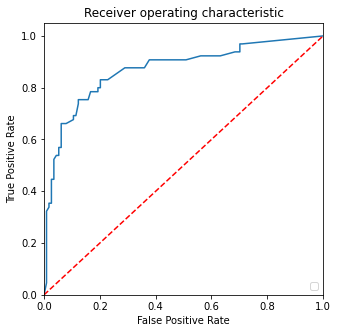

In [55]:
plt.figure()
# plt.plot(fpr, tpr, label='AUC value (area = %0.2f)' % auc(fpr, tpr))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [67]:
y_pred=xg_reg.predict(data_dmatrix_test)

In [73]:
threshold=0.5
pred=[]
for i in range(len(y_pred)):
    if y_pred[i]>threshold:
        p=1
    else:
        p=0
    pred.append(p)
# pred

In [69]:
y_result=pred
X_test["Survived"]=y_result
X_test.head(20)

D:\Anaconda3\envs\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pclass  Sex        Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
172       3    0   1.000000      1      1   11.1333           0           0   
524       3    1  28.318910      0      0    7.2292           1           0   
452       1    1  30.000000      0      0   27.7500           1           0   
170       1    1  61.000000      0      0   33.5000           0           0   
620       3    1  27.000000      1      0   14.4542           1           0   
397       2    1  46.000000      0      0   26.0000           0           0   
161       2    0  40.000000      0      0   15.7500           0           0   
41        2    0  27.000000      1      0   21.0000           0           0   
702       3    0  18.000000      0      1   14.4542           1           0   
567       3    0  29.000000      0      4   21.0750           0           0   
147       3    0   9.000000      2      2   34.3750           0           0   
100       3    0  28.000000      0      0    7.8958           0           0   
820       1    0  52.000000      1      1   93.5000           0           0   
676       3    1  24.500000      0      0    8.0500           0           0   
177       1    0  50.000000      0      0   28.7125           1           0   
644       3    0   0.750000      2      1   19.2583           1           0   
195       1    0  58.000000      0      0  146.5208           1           0   
185       1    1  41.450758      0      0   50.0000           0           0   
167       3    0  45.000000      1      4   27.9000           0           0   
117       2    1  29.000000      1      0   21.0000           0           0   

     Embarked_S  FamilySize  Survived  
172           1           3         1  
524           0           1         0  
452           0           1         0  
170           1           1         0  
620           0           2         0  
397           1           1         0  
161           1           1         1  
41            1           2         1  
702           0           2         1  
567           1           5         0  
147           1           5         0  
100           1           1         0  
820           1           3         1  
676           1           1         0  
177           0           1         1  
644           0           4         1  
195           0           1         1  
185           1           1         0  
167           1           6         0  
117           1           2         0